<a href="https://colab.research.google.com/github/oleksandragolub/Progetto-Machine-Learning/blob/main/progetto_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning**

---
---

Università degli Studi Milano Bicocca \
CdLM Informatica — AA 2024/2025

---
---

#### **Componenti del gruppo:**
— Oleksandra Golub (856706) \
— Giovanni Bishara (869532) \
— Federico Brambilla (886046)

---
---

### **Librerie e strumenti per il preprocessing e la modellazione in ML**



Queste righe di codice importano le librerie necessarie per il preprocessing dei dati, la gestione dei dataset e la loro visualizzazione, oltre a strumenti per il bilanciamento dei dati e l'implementazione di modelli di machine learning:
- **kagglehub** è una libreria per scaricare dataset direttamente da Kaggle (permette di scaricare automaticamente i dati senza doverli caricare manualmente).
- il modulo **os** permette di interagire con il sistema operativo (utile per verificare la posizione di un dataset scaricato).
- **pandas** è una libreria per la gestione e manipolazione dei dataset (permette di leggere, analizzare e trasformare i dati in formato tabellare).
- **matplotlib.pyplot** è una libreria per creare grafici e visualizzazioni (aiuta a visualizzare distribuzioni, istogrammi e grafici di correlazione).
- **seaborn** è una libreria per la visualizzazione avanzata dei dati basata su **matplotlib** (aiuta a creare grafici più leggibili e dettagliati per analizzare le relazioni tra le variabili).
- **numpy** è una libreria per il calcolo numerico e la gestione degli array (utilizzata per manipolare dati numerici, eseguire calcoli e operazioni vettorial).
- **SMOTE** (Synthetic Minority Over-sampling Technique) è una tecnica di oversampling per bilanciare dataset sbilanciati. Genera nuovi esempi sintetici della classe minoritaria (es. se i pazienti diabetici sono meno numerosi, SMOTE genera nuovi dati simili per bilanciare il dataset).
- **StandardScaler** e **PowerTransformer** sono strumenti per trasformare e normalizzare i dati:
  1.   **StandardScaler** ridimensiona i dati in modo che abbiano *media 0* e *deviazione standard 1* (necessario per molti algoritmi di ML).
  2.   **PowerTransformer** applica una trasformazione (es. logaritmica) per rendere più normale la distribuzione dei dati.
- **enable_iterative_imputer** è necessario per abilitare **IterativeImputer**, che è ancora un'API sperimentale in **scikit-learn** (permette di eseguire un'imputazione avanzata dei valori mancanti stimandoli in base alle altre feature).
- **IterativeImputer** è un metodo per riempire i valori mancanti nei dati in modo intelligente (stima i valori basandosi sulle altre feature, anziché usare semplici medie o mediane).
- **PCA** (analisi delle componenti principali) è una tecnica di riduzione della dimensionalità che trasforma le feature di un dataset in nuove variabili (componenti principali), preservando la massima varianza possibile.
- **Axes3D** è un modulo di **Matplotlib** che permette di creare grafici tridimensionali. Viene spesso usato con PCA per rappresentare i dati in uno spazio ridotto a 3 dimensioni.
- **train_test_split** è una funzione di **scikit-learn** per suddividere i dati in training set e test set (permette di addestrare il modello su una parte dei dati e testarlo su un'altra parte per valutarne le prestazioni).

Modelli di Machine Learning:
- **DecisionTreeClassifier** implementa un albero di decisione, un modello che suddivide i dati in base a domande sequenziali per fare previsioni.
- **plot_tree** è una funzione che permette di visualizzare la struttura dell'albero di decisione addestrato. È utile per interpretare il modello, capire quali feature sono state utilizzate per le suddivisioni e come il modello prende le decisioni.
- **LogisticRegression** è un modello statistico di classificazione binaria basato sulla funzione logistica (sigmoide). Stima la probabilità che un'osservazione appartenga a una classe specifica.
- **SVC (Support Vector Classifier)** è un potente modello per la classificazione. Trova un iperpiano ottimale che separa le classi massimizzando la distanza tra loro. Può utilizzare diversi kernel (lineare, polinomiale, RBF, ecc).
- **GaussianNB (Naive Bayes Gaussiano)** è basato sul **Teorema di Bayes**, assume che le feature siano indipendenti tra loro. La variante GaussianNB è utilizzata quando le feature seguono una distribuzione normale (gaussiana). È molto veloce e adatto a dataset di grandi dimensioni.
- **RandomForestClassifier** è un modello ensemble che combina più alberi di decisione per migliorare l'accuratezza e ridurre l'overfitting. Ogni albero riceve un sottoinsieme casuale dei dati (bagging) e fa una previsione. Il risultato finale è dato dalla maggioranza delle previsioni degli alberi. È molto potente, flessibile e meno sensibile ai dati rumorosi.

Metriche di valutazione dei modelli:
- **accuracy_score(y_true, y_pred)** serve per calcolare l'accuratezza, ossia la percentuale di previsioni corrette.
- **precision_score(y_true, y_pred)** serve per indicare la percentuale di predizioni corrette tra quelle che il modello ha classificato come positive. Utile per problemi con classi sbilanciate.
- **recall_score(y_true, y_pred)** serve per misurare quanti dei veri positivi il modello è riuscito a identificare.
- **f1_score(y_true, y_pred)** serve per ottenere la media armonica tra precisione e recall. Utile quando è importante trovare un bilanciamento tra precisione e recall.
- **confusion_matrix(y_true, y_pred)** serve per creare una matrice di confusione, che mostra il numero di predizioni corrette e errate suddivise per classe. Utile per analizzare dove il modello sta sbagliando.
- **roc_curve(y_true, y_score)** misura la capacità di un modello di classificazione binaria nel distinguere tra classi positive e negative. Mostra la relazione tra il True Positive Rate (TPR) e il False Positive Rate (FPR) a diversi livelli di soglia.
- **auc(fpr, tpr)** è una metrica (Area Under Curve) che misura l'area sotto la curva ROC (Receiver Operating Characteristic). Un valore di AUC=1 indica un classificatore perfetto, mentre AUC=0.5 indica un classificatore casuale. Da notare che L'AUC è particolarmente utile quando si confrontano diversi modelli: più è alto, migliore è la capacità predittiva del modello.

In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint, loguniform

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, make_scorer

---
---
### **Dataset**

#### **Caricamento del dataset**


Queste righe di codice servono per scaricare, caricare e verificare il dataset sui pazienti diabetici:
1. Scaricamento del dataset da Kaggle
  - si utilizza `kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")` per scaricare automaticamente il dataset "`diabetes-dataset-using-many-medical-metrics`" da [Kaggle](https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics/data).
  - la variabile `dataset_path` conterrà il percorso della cartella in cui il dataset è stato salvato.
  - il percorso del dataset viene stampato per verificare che l'operazione sia riuscita correttamente.

2. Definizione del percorso locale del dataset
  - `dataset_path` viene definito manualmente per specificare dove è stato scaricato il dataset.
  - normalmente, kagglehub salva i file in una cartella cache, quindi impostiamo manualmente il percorso corretto per evitarne la ricerca.
  - alcune versioni di kagglehub non restituiscono il percorso completo del dataset, quindi questa operazione aiuta a evitare problemi di accesso ai file.

3. Verifica dei file scaricati
  - `os.listdir(dataset_path)` stampa l'elenco dei file presenti nella cartella del dataset.
  - questo permette di verificare quali file sono stati effettivamente scaricati.
  - è utile soprattutto quando non si è sicuri del nome esatto del file CSV nel dataset.

4. Caricamento del dataset in Pandas
  - `pd.read_csv(dataset_path + "/diabetes (1).csv")` legge il file CSV e lo carica in un DataFrame Pandas.

Ora il dataset è pronto per essere esplorato e analizzato con Pandas!

In [2]:
dataset_path = kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")
print("Il dataset è stato scaricato in:", dataset_path)

dataset_path = "/root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1"

print(os.listdir(dataset_path))

df = pd.read_csv(dataset_path + "/diabetes (1).csv")

100%|██████████| 8.92k/8.92k [00:00<00:00, 12.0MB/s]

Extracting files...
Il dataset è stato scaricato in: /root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1
['diabetes (1).csv']


* `df.head()` restituisce le prime 5 righe (di default) del DataFrame Pandas. È utile per verificare se i dati sono stati caricati correttamente e per analizzare un'anteprima del dataset.

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

*  `df` visualizza tutto il dataset presente nel DataFrame Pandas.

In [4]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

#### **Cast delle colonne e label encoding per il target**


È essenziale verificare e, se necessario, effettuare il cast dei tipi delle feature e del target. Questo passaggio garantisce che i dati vengano interpretati correttamente durante le analisi, evitando errori dovuti a una rappresentazione errata o incoerente dei tipi di dati disponibili.

*   `df.dtypes` determina se una colonna contiene numeri interi (int64), numeri decimali (float64), stringhe (object), valori booleani (bool), o categorie (category).
*   `dtype: object` significa che l'elenco dei tipi di dato è memorizzato come un oggetto generico in Pandas.

In [5]:
# Tipi di dato per capire se servono cast
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Da notare che la colonna `Outcome` deve essere castata a `category`, perché rappresenta una variabile categorica (classi 0 e 1).

Per il resto delle colonne non è necessario alcun cast. Le variabili sono già correttamente rappresentate come float64 per valori continui o int64 per valori discreti.

In [6]:
# Cast della colonna Outcome a category
df['Outcome'] = df['Outcome'].astype('category')

# Verifica dei tipi aggiornati
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

#### **Controllo iniziale del dataset**


Questa sezione include una serie di analisi preliminari per comprendere la struttura, la distribuzione e le relazioni tra le feature del dataset prima di qualsiasi preprocessing.

*   `df.shape` mostra il numero di righe e colonne del dataset.


In [7]:
df.shape

(768, 9)

* `df.isnull().sum()` è un comando che consente di verificare la presenza di valori mancanti (nulli) in ogni colonna di un DataFrame.

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Siccome non è necessario eliminare i valori nulli, procediamo con:

* `df.duplicated()` è un comando che permette di identificare il numero di righe duplicate all'interno di un DataFrame.

In [9]:
df.duplicated().sum()

0

Siccome non è necessario eliminare i valori duplicati, procediamo con:
*  `df.info()` fornisce informazioni riassuntive sulla struttura del DataFrame Pandas, dove:
  - `<class 'pandas.core.frame.DataFrame'>` indica che il dataset è un DataFrame Pandas.
  - `RangeIndex: 768 entries, 0 to 767` indica che il dataset ha 768 righe, numerate da 0 a 767.
  - `Data columns (total 9 columns)`indica che il dataset contiene 9 colonne.
  - Dettagli delle colonne includono i nominativi delle colonne, Non-Null Count (si vede che tutte le colonne hanno 768 valori non nulli, quindi non ci sono valori mancanti) e Dtype (per indicare colonne che contengono numeri interi e colonne che contengono numeri decimali)
  - `dtypes: category(1), float64(2), int64(6)`,  indica che nel dataset ci sono 1 colonna con tipo categorico, 2 colonne con tipo float64 (numeri decimali) e 6 colonne con tipo int64 (numeri interi).
  - `memory usage: 54.1 KB`indica che il dataset occupa 49.0 KB di memoria.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


#### **Descrizione del dataset**


Il dataset analizza le caratteristiche cliniche di pazienti per la classificazione binaria della presenza o assenza di diabete. Ogni riga rappresenta un paziente, mentre le colonne contengono misurazioni mediche e dati anamnestici.

##### **Feature del dataset**
Le variabili disponibili nel dataset includono misurazioni fisiologiche, anamnestiche e indici metabolici, espressi come valori numerici continui o interi:

- Pregnancies: numero di gravidanze della paziente (solo per donne, nei dati non è specificato il sesso).
- Glucose (mg/dL): livello di glucosio nel sangue a digiuno.
- BloodPressure (mmHg): pressione arteriosa diastolica.
- SkinThickness (mm): spessore della pelle del tricipite, indicativo del grasso corporeo sottocutaneo.
- Insulin (µU/mL): livello di insulina nel sangue.
- BMI (kg/m²): indice di massa corporea, utile per valutare il peso corporeo rispetto all'altezza.
- DiabetesPedigreeFunction: funzione che stima la probabilità di sviluppare diabete in base alla storia familiare (valori più alti indicano una maggiore predisposizione genetica).
- Age (anni): età del paziente.
- Outcome: variabile target (0 = non diabetico, 1 = diabetico).

##### **Tipologia dei dati**
- Le feature sono numeriche continue e discrete.
- La variabile Outcome è categorica binaria (0/1).

##### **Obiettivo dell’analisi**
L’obiettivo del dataset è costruire un modello di classificazione binaria per predire la presenza di diabete in base ai valori clinici dei pazienti.

#### **Analisi del dataset**


##### **Distribuzione delle classi nel dataset**


L'analisi della distribuzione delle classi nel dataset è essenziale per comprendere eventuali squilibri, perciò procediamo con:

* `df["Outcome"].value_counts()` restituisce il conteggio di ogni valore unico presente nella colonna `Outcome` del DataFrame Pandas. Questo è utile per verificare la distribuzione delle classi nel dataset e **determinare se è bilanciato o meno**.
  - colonna `Outcome` del DataFrame rappresenta l'etichetta target, dove `1` indica la presenza di diabete, mentre `0` indica l'assenza di diabete.
  - `.value_counts()` conta il numero di occorrenze di ciascun valore unico presente nella colonna.


In [11]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

* sns.countplot(x='Outcome', data=df):
  - si usa **seaborn**, una libreria per la visualizzazione dei dati, per creare un grafico a barre che conta la frequenza di ciascun valore nella colonna `Outcome`.
  - `x='Outcome'` specifica che i valori della colonna `Outcome` saranno visualizzati sull'asse x.
  - `data=df` specifica che i dati sono contenuti nel DataFrame `df`.

In altre parole, questo blocco di codice è usato per visualizzare graficamente la distribuzione delle classi nella colonna `Outcome` del dataset. Questa distribuzione rappresenta il bilanciamento tra i valori target, ossia `0` (assenza di diabete) e `1` (presenza di diabete).

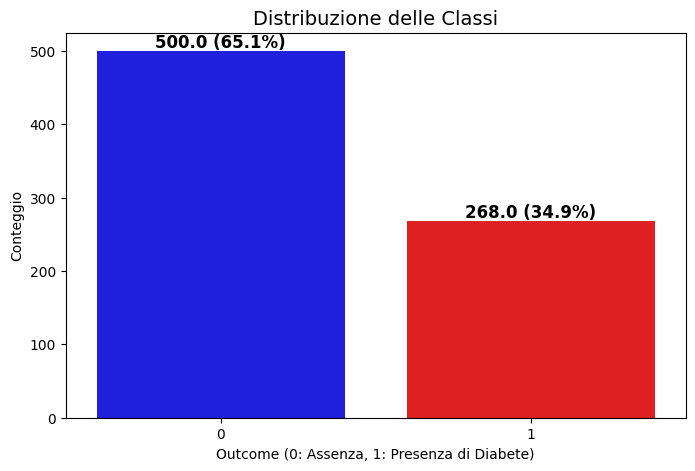

In [12]:
# Creiamo il grafico con conteggio delle classi
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Outcome', data=df, hue='Outcome', palette=['blue', 'red'], legend=False)

# Impostiamo titolo e assi
plt.title("Distribuzione delle Classi", size=14)
plt.xlabel("Outcome (0: Assenza, 1: Presenza di Diabete)")
plt.ylabel("Conteggio")

# Calcoliamo il numero totale di esempi
total = len(df)

# Aggiungiamo le etichette con la percentuale sopra ogni barra
for p in ax.patches:
    height = p.get_height()  # Altezza della barra
    if height > 0:
        percentage = '{:.1f}%'.format(100 * height / total)  # Percentuale
        ax.text(p.get_x() + p.get_width()/2., height + 5,  # Posizione del testo
                f'{height} ({percentage})',
                ha="center", fontsize=12, fontweight="bold", color="black")

# Mostriamo il grafico
plt.show()


Interpretazione:
  - Valore 0 (assenza di diabete): si verifica 500 volte nel dataset.
  - Valore 1 (presenza di diabete): si verifica 268 volte nel dataset. \

Dunque, questo mostra che **il dataset non è bilanciato**, perché la classe 0 (assenza di diabete) è molto più numerosa della classe 1 (presenza di diabete). Questa situazione può influenzare negativamente i modelli di machine learning, rendendoli meno efficaci nel predire la classe meno rappresentata.


##### **Dettagli del dataset**


Andando avanti con l'analisi dei dettagli del dataset, possiamo individuare diverse anomalie nei dati, perciò procediamo con:

- `df.describe()` mostra le statistiche principali di ogni feature numerica:
media, deviazione standard, minimo, massimo, quartili (25%, 50%, 75%).
Aiuta a individuare valori anomali (outlier) o distribuzioni non bilanciate.

In [13]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

Conclusioni:
- I **valori 0** in Glucose, BloodPressure e BMI sono chiaramente **errori** e vanno sostituiti.
- SkinThickness e Insulin **potrebbero contenere** veri **valori nulli**, ma bisogna verificare più dettagliatamente le colonne.
- Gli altri dati **non mostrano anomalie** evidenti.

Per adesso stabiliamo che i **valori 0** in Glucose, BloodPressure e BMI devono essere trattati come **dati mancanti** e **gestiti nel preprocessing**.

Adesso analizziamo le statistiche per **pazienti SENZA diabete**:

In [14]:
# Statistiche per pazienti SENZA diabete
df_no_diabetes = df[df['Outcome'] == 0]
print("Statistiche per pazienti senza diabete:")
print(df_no_diabetes.describe())

Statistiche per pazienti senza diabete:
       Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      68.184000      19.664000   68.792000   
std       3.017185   26.1412      18.063075      14.889947   98.865289   
min       0.000000    0.0000       0.000000       0.000000    0.000000   
25%       1.000000   93.0000      62.000000       0.000000    0.000000   
50%       2.000000  107.0000      70.000000      21.000000   39.000000   
75%       5.000000  125.0000      78.000000      31.000000  105.000000   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  500.000000                500.000000  500.000000  
mean    30.304200                  0.429734   31.190000  
std      7.689855                  0.299085   11.667655  
min      0.000000                  0.078000   21.000000  
25%

Conclusioni:
- L'insulina media è **anormalmente bassa**:
  - La **media è 0**, il che è altamente **improbabile** per individui sani.
  - Il **25° percentile e il minimo sono 0**, il che suggerisce **errori nei dati**.
  - In un paziente sano, l'insulina a digiuno **non dovrebbe mai essere zero**!

- Molti valori di SkinThickness sono **pari a 0**:
  - Il **minimo è 0** e il **25° percentile è 0**, il che significa che **almeno il 25%** dei pazienti sani ha **SkinThickness = 0**.
  - Questo **è anormale**, poiché lo spessore cutaneo **non dovrebbe mai essere esattamente 0** negli individui sani.

- Altri parametri sembrano coerenti:
  - Glucose indica la media di 109.98, nella norma per non diabetici.
  - BloodPressure indica la media di 68.19, valore realistico.
  - BMI indica la media di 30.30, leggermente sopra la norma (sovrappeso).
  - Age indica la media di 31.19, con un intervallo tra 21 e 81 anni.

Questo significa che **i valori 0** di Insulin e SkinThickness **degli individui sani** devono essere trattati come **dati mancanti** e **gestiti nel preprocessing**.

Adesso analizziamo le statistiche per **pazienti CON diabete**:

In [15]:
# Statistiche per pazienti CON diabete
df_diabetes = df[df['Outcome'] == 1]
print("\nStatistiche per pazienti con diabete:")
print(df_diabetes.describe())


Statistiche per pazienti con diabete:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  100.335821   
std       3.741239   31.939622      21.491812      17.679711  138.689125   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.750000  119.000000      66.000000       0.000000    0.000000   
50%       4.000000  140.000000      74.000000      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  268.000000                268.000000  268.000000  
mean    35.142537                  0.550500   37.067164  
std      7.262967                  0.372354   10.968254  
min      0.000000                  0.088000 

Conclusioni:
- Molti valori di Insulin sono 0 per i diabetici:
  - Il **minimo è 0** e il **25° e 50° percentile sono 0**, il che significa che **almeno il 50%** dei pazienti diabetici ha **Insulin = 0**.
  - Questo **è anomalo**, perché nei pazienti diabetici (soprattutto quelli **con diabete di tipo 2**) i livelli di insulina sono generalmente **più alti** a causa dell'insulino-resistenza.
  - Tuttavia, se **la maggior parte dei dati** proviene da pazienti con **diabete di tipo 1**, allora è plausibile, poiché in questi soggetti il pancreas **non produce insulina** o ne **produce quantità minime**.

- Molti valori di SkinThickness sono 0 per i diabetici:
  - Il **minimo è 0** e il **25° percentile è 0**, il che significa che **almeno il 25%** dei pazienti diabetici ha **SkinThickness = 0**.
  - Questo è **potenzialmente un errore** nei dati, perché lo spessore cutaneo **non dovrebbe essere esattamente 0**.
  - Tuttavia, **è possibile** che alcuni pazienti diabetici abbiano effettivamente **un livello di grasso sottocutaneo molto basso**, soprattutto se **soffrono di distrofia lipoatrofica** o **perdita di massa grassa dovuta a diabete scarsamente controllato**.

- Altri parametri sembrano coerenti.

Dunque, scegliemo di **non gestire** i casi di **Insulin = 0** e **SkinThickness = 0** per gli **individui diabetici**.


##### **Statistiche del dataset**


Le statistiche di skewness (asimmetria) e kurtosis (curtosi) ci dicono quali variabili hanno una distribuzione non normale e necessitano di trasformazioni nella fase di preprocessing per migliorare la qualità del modello.

Procediamo con l'analisi della Skewness (Asimmetria):

- `skew()` indica quanto la distribuzione è sbilanciata a destra o a sinistra:
  - **Skewness > 0** significa la distribuzione sbilanciata **a destra** (coda più lunga a destra).
  - **Skewness < 0** significa la distribuzione sbilanciata **a sinistra** (coda più lunga a sinistra).

In [16]:
# Selezioniamo solo le colonne numeriche (escludendo 'Outcome')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calcoliamo la skewness per le feature numeriche
print("Skewness (Asimmetria):")
print(df[numeric_columns].skew())

Skewness (Asimmetria):
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64


Conclusioni:
- Pregnancies e Age sono le variabili più **sbilanciate a destra**, quindi potremmo **applicare trasformazioni logaritmiche o sqrt** per renderle più normali.
- Glucose e BMI hanno una **lieve asimmetria**, quindi sono **quasi normali**.
- BloodPressure, SkinThickness e Insulin sono **quasi simmetriche** e **non necessitano di trasformazioni**.


Andando avanti con l'analisi della Kurtosis (Curtosi):
- `.kurtosis()` indica la forma della distribuzione rispetto alla normale:
  - **Kurtosis > 0** indica la distribuzione leptocurtica (più appuntita, più valori concentrati al centro e più code).
  - **Kurtosis < 0** indica la distribuzione platicurtica (più piatta, meno concentrata al centro).

In [17]:
# Calcoliamo la kurtosis per le feature numeriche
print("\nKurtosis (Curtosi):")
print(df[numeric_columns].kurtosis())


Kurtosis (Curtosi):
Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
dtype: float64


Conclusioni:
- BloodPressure, BMI e Age sono più leptocurtiche (più **concentrate al centro** con code più pronunciate).
- Insulin e DiabetesPedigreeFunction sono molto platicurtiche (distribuzione **molto sparsa e appiattita**).
- SkinThickness e Glucose sono **leggermente** platicurtiche, ma **non in modo estremo**.



Cosa fare nel preprocessing:
- lavorare con le variabili con skewness elevata (fortemente asimmetriche), applicando una trasformazione:
  - Insulin (Skewness = 2.272, Kurtosis = 7.214)
  - DiabetesPedigreeFunction (Skewness = 1.919, Kurtosis = 5.594)

- lavorare con le variabili con kurtosis elevata (leptocurtiche) per controllare e trattare eventuali outlier:
  - BloodPressure (Kurtosis = 5.180) ha code molto lunghe, potrebbe contenere outlier.
  - BMI (Kurtosis = 3.290) ha tendenza leptocurtica, potrebbe contenere outlier.
  - Age (Kurtosis = 0.643) è leggermente leptocurtica, perciò non è necessaria una trasformazione, ma si può normalizzare.

---
---

### **Preprocessing del dataset**

#### **Gestione dei valori mancanti**


  - `columns_to_fix` ontiene un elenco di colonne ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI') dove il valore 0 è considerato un errore o dato mancante.
  - `replace(0, np.nan)` sostituisce tutti i valori 0 con NaN (not a number) nelle colonne specificate.  
  - questo passo **è necessario** perché **un valore 0 non è realistico** in queste variabili (es. pressione sanguigna, glucosio, ecc.).
  - `df.isnull().sum()` conta i valori NaN in ogni colonna, permettendo di verificare quante celle risultano ora vuote dopo la sostituzione.
  - **output atteso** stampa il numero di valori nulli presenti nelle colonne dopo la sostituzione dei valori 0.

In [18]:
# Definiamo le colonne da correggere per TUTTI i pazienti
columns_to_fix = ['Glucose', 'BloodPressure', 'BMI']

# Sostituiamo 0 con NaN nelle colonne critiche
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

# Correggiamo Insulin e SkinThickness SOLO per i pazienti sani (Outcome = 0)
df.loc[df['Outcome'] == 0, 'Insulin'] = df.loc[df['Outcome'] == 0, 'Insulin'].replace(0, np.nan)
df.loc[df['Outcome'] == 0, 'SkinThickness'] = df.loc[df['Outcome'] == 0, 'SkinThickness'].replace(0, np.nan)

# Contiamo i valori nulli dopo la sostituzione
print("Valori nulli dopo aver sostituito 0 con NaN:")
print(df.isnull().sum())

# Contiamo le righe con almeno un valore mancante nelle colonne critiche + Insulin + SkinThickness (solo per sani)
num_righe_con_null = df[columns_to_fix + ['Insulin', 'SkinThickness']].isnull().any(axis=1).sum()

print(f"Numero totale di righe con almeno un valore mancante: {num_righe_con_null}")

Valori nulli dopo aver sostituito 0 con NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               139
Insulin                     236
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Numero totale di righe con almeno un valore mancante: 257


Abbiamo sostituito i valori 0 con NaN solo per:
 - **Glucose**:
  - Il glucosio nel sangue non può essere 0 in una persona viva. Un valore pari a 0 è un errore o un dato mancante.
 - **BloodPressure**:
  - Una pressione sanguigna di 0 mmHg significherebbe assenza di circolazione, quindi è un valore errato.
 - **BMI**:
  - Un BMI pari a 0 è irrealistico (implica un peso nullo), quindi è un errore nei dati.
 - **Insulin (solo per i pazienti sani)**:
  - Nei pazienti sani, un livello di insulina pari a 0 è altamente improbabile, poiché l'insulina è sempre presente nel sangue, anche in concentrazioni minime.
  - È probabile che i valori 0 rappresentino misurazioni mancanti e siano stati registrati erroneamente.
  - Per i pazienti diabetici, invece, 0 potrebbe essere un valore clinicamente plausibile in caso di diabete di tipo 1.
 - **SkinThickness (solo per i pazienti sani)**:
  - Lo spessore cutaneo non dovrebbe mai essere 0, a meno che non sia una misurazione non effettuata e registrata erroneamente.
  - Alcuni pazienti sani potrebbero avere livelli di grasso sottocutaneo molto bassi, ma 0 è poco realistico.
  - Per questo motivo, i valori 0 sono stati trattati come dati mancanti e saranno imputati nel preprocessing.


Una volta gestita la scelta delle colonne, si procede con l'imputazione dei valori mancanti (NaN) utilizzando un metodo avanzato, `IterativeImputer`, e verifica che tutti i valori mancanti siano stati gestiti.
  - IterativeImputer:
    - si tratta di un'imputazione avanzata in cui i valori mancanti vengono stimati in base ai valori delle altre feature nel dataset.
    - l'imputer utilizza un algoritmo iterativo per stimare i valori mancanti di ciascuna feature come una funzione lineare delle altre feature.
    - parametri utilizzati sono `max_iter=10` (specifica il numero massimo di iterazioni per stimare i valori) e `random_state=42` (garantisce la riproducibilità dei risultati).

  - Imputazione dei valori mancanti:
    - `fit_transform()` calcola i valori stimati per i NaN in base alle altre feature e li sostituisce nei dati originali.
    - i valori mancanti nelle colonne specificate in `columns_to_fix` vengono quindi riempiti con i valori stimati.

  - Controllo post-imputazione:
    - `df.isnull().sum()` conta i valori mancanti in ogni colonna dopo l'imputazione per assicurarsi che tutte le celle siano state correttamente riempite.
    - **output atteso** stampa del conteggio dei valori nulli dopo l'imputazione (sovrebbe risultare 0 valori nulli per tutte le colonne in columns_to_fix, indicando che tutti i valori mancanti sono stati sostituiti con stime).

In [19]:
# Creiamo un IterativeImputer con limiti sui valori minimi
imputer = IterativeImputer(max_iter=10, random_state=42, min_value=0)  # min_value=0 impedisce valori negativi

# Applichiamo l'imputazione su tutte le colonne modificate
df[columns_to_fix + ['Insulin', 'SkinThickness']] = imputer.fit_transform(df[columns_to_fix + ['Insulin', 'SkinThickness']])

# Controllo post-imputazione
print("Valori nulli dopo IterativeImputer:")
print(df.isnull().sum())

Valori nulli dopo IterativeImputer:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Successivamente, verifichiamo di nuovo i dettagli del dataset per controllare che IterativeImputer abbia modificato correttamente i dati:

In [20]:
# Statistiche per pazienti sia SENZA diabete che CON diabete
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.612547      72.434965      24.611359  109.476318   
std       3.369578   30.453089      12.150487      12.921637  104.379368   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000   99.750000      64.000000      18.000000   50.000000   
50%       3.000000  117.000000      72.000000      25.000000   92.000000   
75%       6.000000  140.250000      80.000000      33.000000  140.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    32.435347                  0.471876   33.240885  
std      6.880494                  0.331329   11.760232  
min     18.200000                  0.078000   21.000000  
25%     27.500000                  0.243750   24.000000  
50%     32.021014                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

In [21]:
# Statistiche per pazienti SENZA diabete
df_no_diabetes = df[df['Outcome'] == 0]
print("Statistiche per pazienti senza diabete:")
print(df_no_diabetes.describe())

Statistiche per pazienti senza diabete:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.000000     500.000000     500.000000  500.000000   
mean      3.298000  110.644242      70.814448      25.923047  114.375625   
std       3.017185   24.705049      11.942228       9.189934   79.910456   
min       0.000000   44.000000      24.000000       7.000000    1.902988   
25%       1.000000   93.000000      63.500000      19.000000   69.740667   
50%       2.000000  107.000000      70.000000      25.000000   95.045366   
75%       5.000000  125.000000      78.000000      31.250000  132.002979   
max      13.000000  197.000000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  500.000000                500.000000  500.000000  
mean    30.868812                  0.429734   31.190000  
std      6.503771                  0.299085   11.667655  
min     18.200000                  0.078000

In [22]:
# Statistiche per pazienti CON diabete
df_diabetes = df[df['Outcome'] == 1]
print("\nStatistiche per pazienti con diabete:")
print(df_diabetes.describe())


Statistiche per pazienti con diabete:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  142.075803      75.458318      22.164179  100.335821   
std       3.741239   29.627764      11.977978      17.679711  138.689125   
min       0.000000   78.000000      30.000000       0.000000    0.000000   
25%       1.750000  119.000000      68.000000       0.000000    0.000000   
50%       4.000000  140.000000      75.880097      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  268.000000                268.000000  268.000000  
mean    35.357987                  0.550500   37.067164  
std      6.616077                  0.372354   10.968254  
min     22.900000                  0.088000 

#### **Gestione degli outlier**


 Questo pezzo di codice applica un PowerTransformer per trasformare le variabili asimmetriche (con distribuzioni non normali) in distribuzioni più vicine a una normale (gaussiane). Questo passaggio è utile per migliorare le prestazioni di molti algoritmi di machine learning che assumono dati con distribuzioni normali.

 Tuttavia, prima di applicare la trasformazione, mettiamo un'esempio delle distribuzioni delle variabili Insulin e DiabetesPedigreeFunction che mostrano una forte asimmetria:

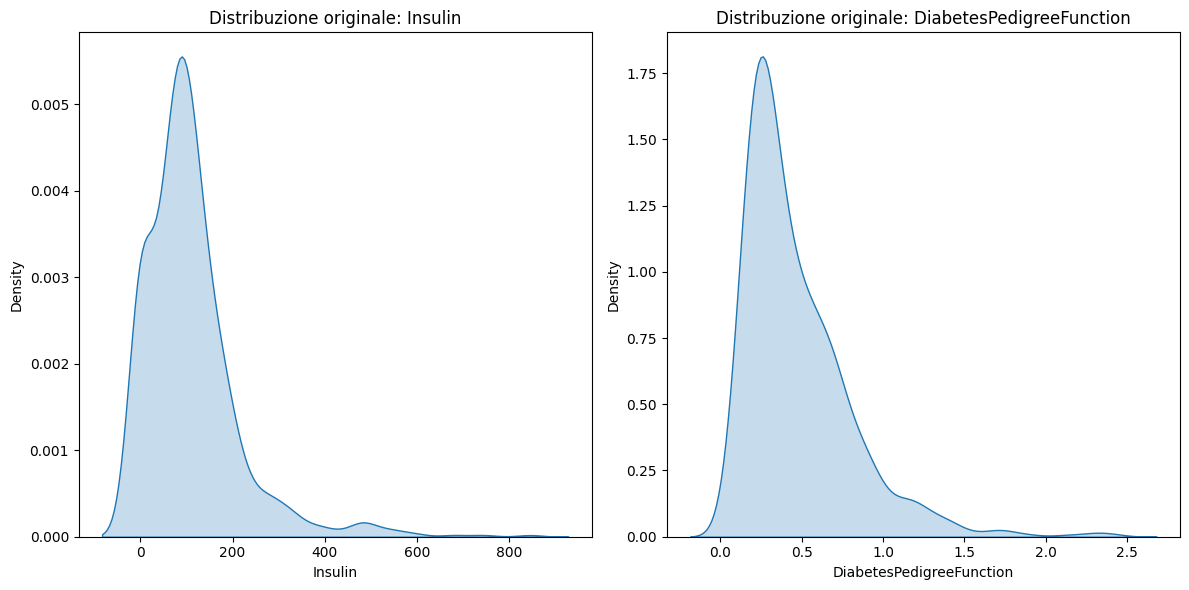

In [23]:
# Visualizzazione delle distribuzioni originali (prima della trasformazione)
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Insulin', 'DiabetesPedigreeFunction']):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f"Distribuzione originale: {col}")
plt.tight_layout()
plt.show()

Adesso applichiamo la trasformazione:
  - `PowerTransformer()`:
    - è uno strumento di preprocessing di scikit-learn che applica trasformazioni non lineari.
    - serve per stabilizzare la varianza, rendere la distribuzione dei dati più simmetrica, migliorare le prestazioni degli algoritmi sensibili alla distribuzione dei dati, come la regressione lineare o i modelli basati su distanza (es. SVM).
  - `fit_transform()`:
    - calcola i parametri della trasformazione in base ai dati forniti, poi applica la trasformazione ai dati.
    - di default utilizza il metodo Yeo-Johnson, che supporta dati sia positivi che negativi (al contrario del Box-Cox che funziona solo con valori positivi).

In [24]:
# Applicazione di PowerTransformer per variabili asimmetriche
power_transformer = PowerTransformer()
df[['Insulin', 'DiabetesPedigreeFunction']] = power_transformer.fit_transform(df[['Insulin', 'DiabetesPedigreeFunction']])

Infatti, dopo l'applicazione del `PowerTransformer` si vede che la distribuzione si è stabilizzata:
- Insulin:
    - la distribuzione si avvicina a una forma simmetrica e centrata, migliorando la normalità.
- DiabetesPedigreeFunction:
    - anche questa distribuzione diventa più simmetrica e più vicina a una distribuzione normale.


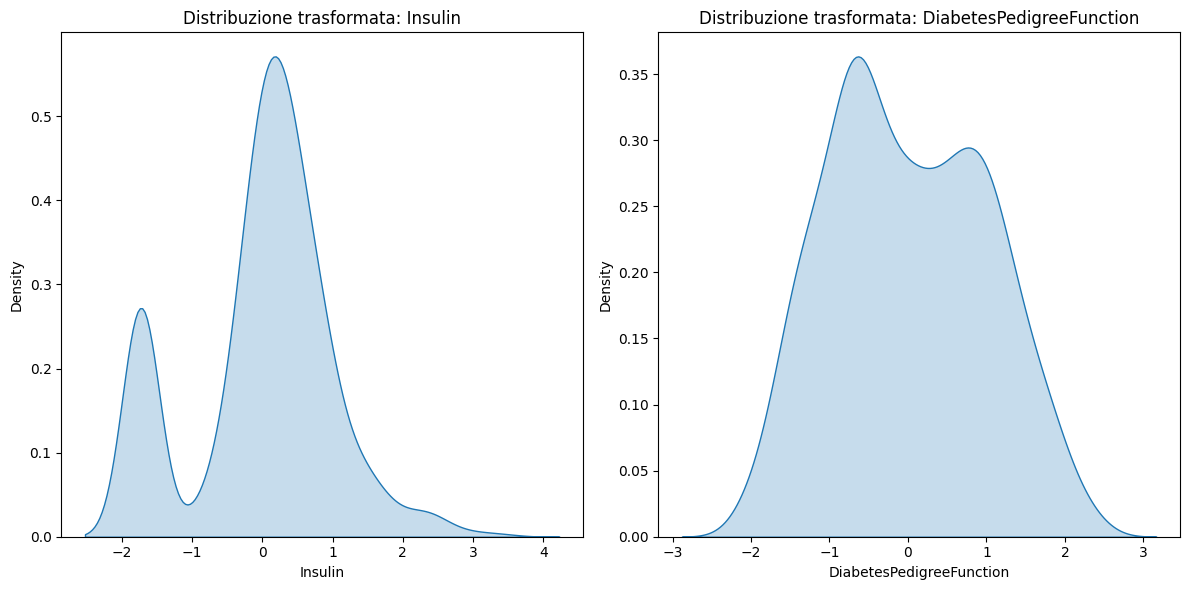

In [25]:
# Visualizzazione delle distribuzioni trasformate (dopo PowerTransformer)
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Insulin', 'DiabetesPedigreeFunction']):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f"Distribuzione trasformata: {col}")
plt.tight_layout()
plt.show()

Questa trasformazione implica:
1. Rimozione dell'asimmetria:
  - algoritmi come la regressione lineare, le reti neurali o i modelli basati su distanze funzionano meglio con dati normalizzati.

2. Stabilità numerica:
  - valori estremi vengono ridotti, diminuendo il rischio di influenze sproporzionate da outlier.

3. Miglioramento dell'accuratezza del modello:
  - molti modelli producono risultati più stabili e interpretabili con dati normalizzati.

Adesso proviamo di individuare outlier con boxplot per le variabili di BloodPressure, BMI (Kurtosis = 3.290) e Age (Kurtosis = 0.643):

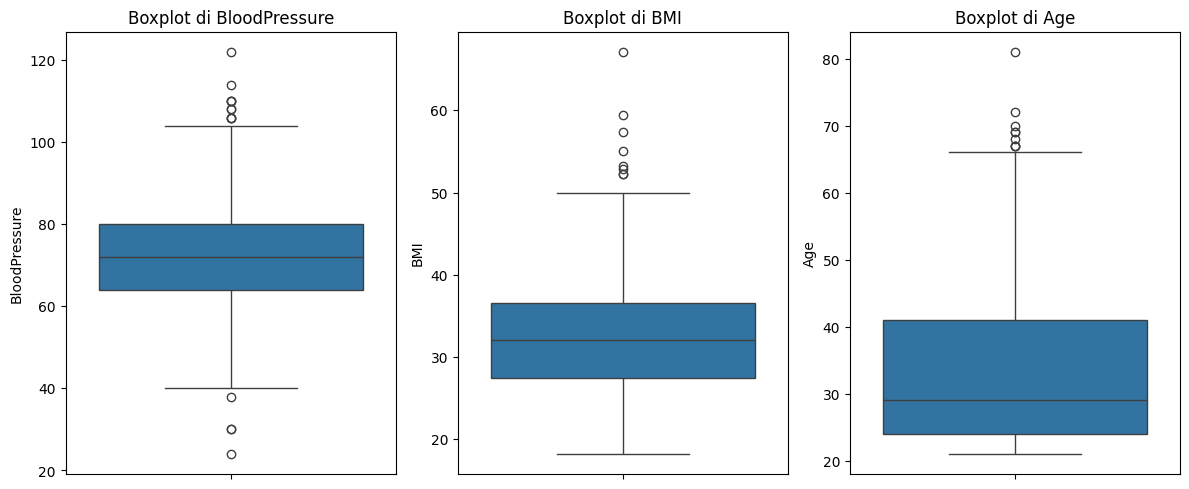

In [26]:
# Creazione boxplot per individuare gli outlier
plt.figure(figsize=(12, 5))
columns_to_check = ['BloodPressure', 'BMI', 'Age']
for i, col in enumerate(columns_to_check):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot di {col}')

plt.tight_layout()
plt.show()

Osservazioni:
- BloodPressure:
  - Ci sono alcuni outlier nella parte inferiore (valori inferiori a 40 mmHg).
  - La maggior parte dei valori si concentra tra 60 e 80 mmHg, con una distribuzione abbastanza concentrata.
  - I valori estremamente bassi potrebbero rappresentare **errori di inserimento** o **casi rari** (es. ipotensione grave)..

- BMI:
  - Ci sono outlier nella parte superiore (valori sopra 50).
  - La maggior parte dei valori è concentrata tra 25 e 40, che è comune in un dataset che include pazienti diabetici (sovrappeso o obesi).
  - I valori molto alti (> 50) potrebbero rappresentare **errori di inserimento** o **casi rari**.

- Age:
  - Gli outlier sono nella parte superiore, con alcuni valori sopra i 70 anni.
  - La maggior parte dei valori è distribuita tra 20 e 50 anni, che è tipico di un dataset clinico.
  - **Non è necessario rimuovere gli outlier** se sono plausibili, poiché un'età elevata è coerente con il rischio di diabete.

Quindi, procediamo con:
- Calcolo dell'IQR (Interquartile Range):
  - L'IQR misura la dispersione dei dati tra il 25° e il 75° percentile, che rappresenta il range intermedio della distribuzione.
- Identificazione degli outlier:
  - I valori al di sotto di `Q1 - 1.5 * IQR` o al di sopra di `Q3 + 1.5 * IQR` sono considerati anomalie (outlier).
- Filtraggio del dataset:
  - Vengono mantenuti solo i valori che rientrano nel range accettabile.
  - Gli outlier vengono rimossi dal dataset, lasciando solo i valori compresi tra i limiti calcolati.


In [27]:
# Lista delle colonne da trattare
columns_to_fix = ['BloodPressure', 'BMI']

for col in columns_to_fix:
    # Calcolo IQR per ogni colonna
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Rimuoviamo gli outlier per la colonna corrente
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


Adesso possiamo verificare cosa è stato effettivamente cambiato:

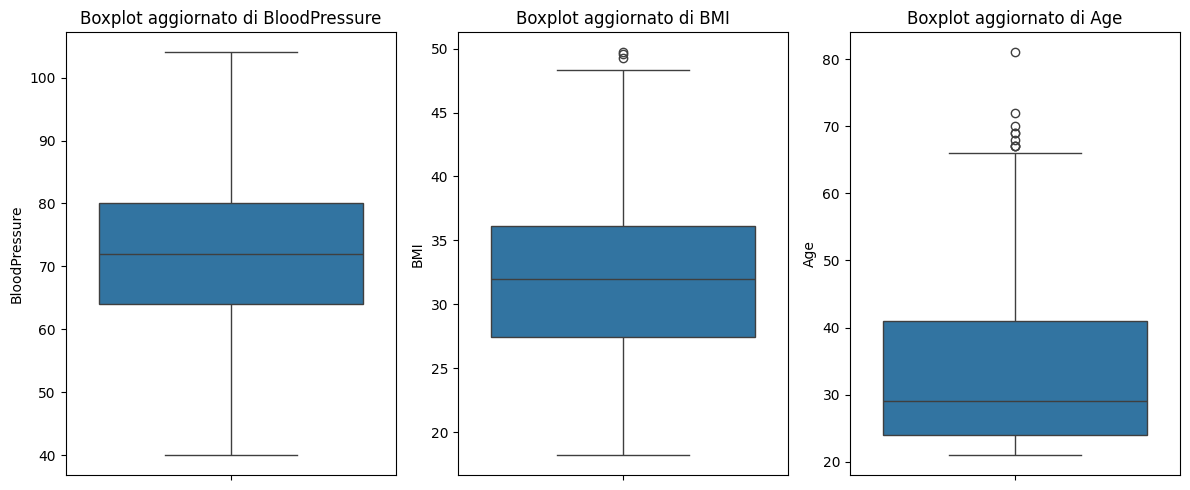

In [28]:
# Creazione boxplot aggiornati
plt.figure(figsize=(12, 5))
columns_to_check = ['BloodPressure', 'BMI', 'Age']
for i, col in enumerate(columns_to_check):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot aggiornato di {col}')

plt.tight_layout()
plt.show()

Conclusione:
- BloodPressure e BMI:
  - Gli outlier sono stati trattati correttamente e le distribuzioni ora appaiono più pulite e rappresentative.

- Age:
  - Gli outlier plausibili sono stati mantenuti e la distribuzione non è stata alterata.

#### **Standardizzazione delle feature**


  Questo pezzo di codice esegue la standardizzazione delle feature, un passaggio fondamentale del preprocessing per i modelli di machine learning.
  Tuttavia, prima di applicare la standardizzazione, mettiamo un'esempio delle distribuzioni attuali:


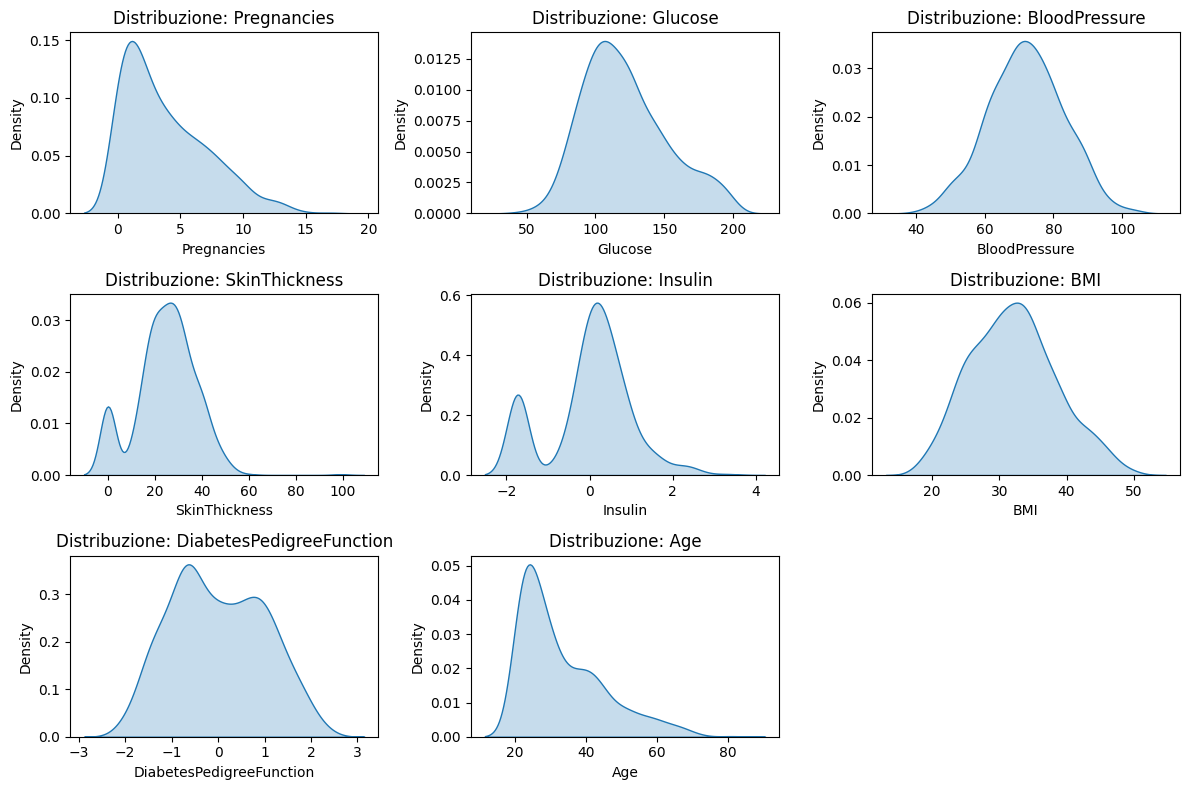

In [29]:
# Escludiamo solo il target, mantenendo tutte le feature originali
X_original = df.drop(columns=["Outcome"])

# Calcolo dinamico delle righe necessarie per la disposizione dei subplot
n_cols = 3  # Numero di colonne nei subplot
n_rows = int(np.ceil(len(X_original.columns) / n_cols))  # Calcolo del numero di righe necessario

# Visualizzazione delle distribuzioni delle feature originali
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_original.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=X_original, x=col, fill=True)
    plt.title(f"Distribuzione: {col}")

plt.tight_layout()
plt.show()

Adesso applichiamo la standardizzazione e vediamo cosa succede nel dettaglio:
  - `StandardScaler` trasforma i dati in modo che ogni feature abbia **media 0** e **deviazione standard 1**.
  - `X = df.drop(columns=["Outcome"])` esclude la variabile target (Outcome) dal dataset, poiché questa non deve essere standardizzata (è il valore da prevedere, non da trasformare).
  - `fit_transform(X)` calcola la media e la deviazione standard di ciascuna colonna nel dataset X, poi utilizza questi parametri per trasformare ogni valore di ciascuna feature secondo la formula della standardizzazione.
  - output atteso è un array numpy in cui tutte le feature sono standardizzate (media 0 e deviazione standard 1).

E' importante standardizzare le feature, perchè le feature nel dataset spesso hanno scale diverse (es. Glucose varia da 50 a 200, mentre Age varia da 20 a 80). Standardizzare elimina il problema delle scale diverse.
  
Tra altro, esistono anche modelli sensibili alla scala, come SVM, k-NN, regressione logistica, reti neurali e ecc. Questi algoritmi calcolano distanze o ottimizzano con gradienti e richiedono che le feature abbiano valori comparabili.

In [30]:
# Standardizzazione di tutte le feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

Dopo aver applicato la standardizzazione con StandardScaler, che centra i dati a una media di 0 e una deviazione standard di 1, il codice visualizza le distribuzioni delle feature standardizzate.

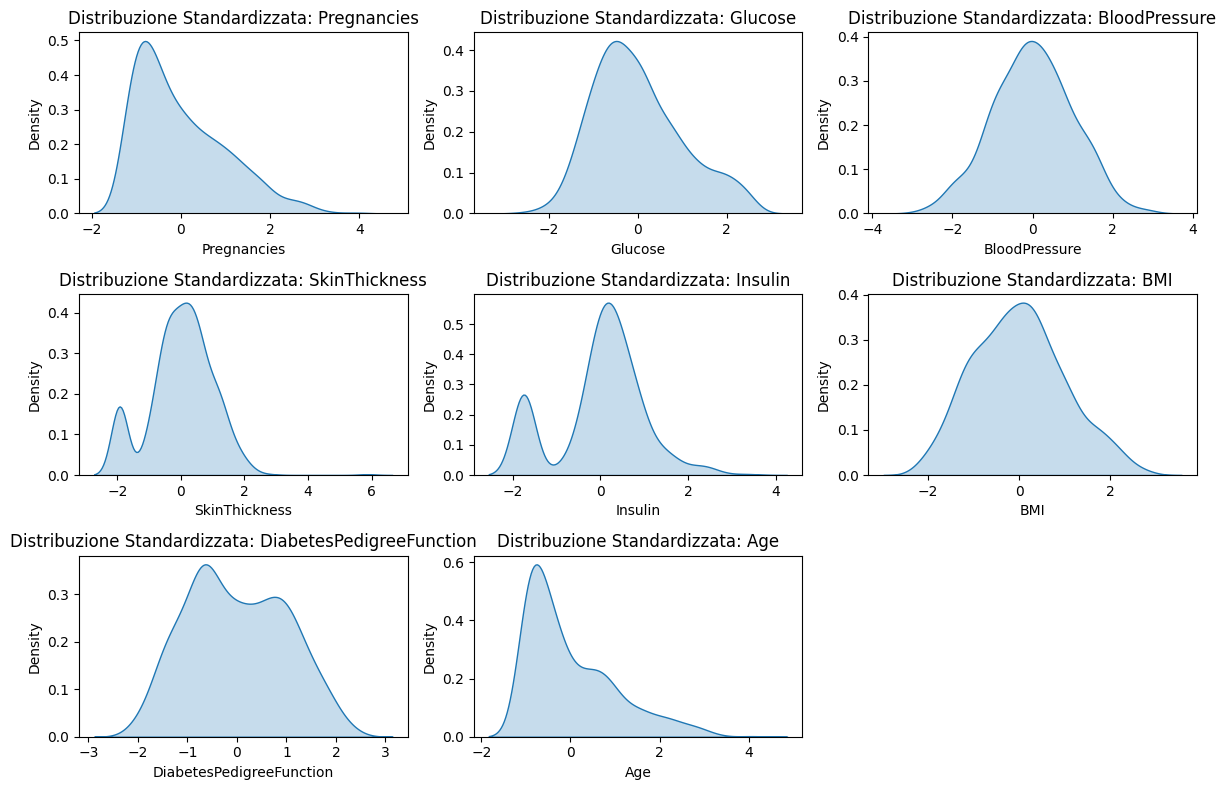

In [31]:
# Creiamo un nuovo DataFrame standardizzato solo con le feature originali
X_scaled_df = pd.DataFrame(X_scaled, columns=X_original.columns)

# Calcolo dinamico delle righe necessarie per la visualizzazione
n_cols = 3  # Numero di colonne nei subplot
n_rows = int(np.ceil(len(X_scaled_df.columns) / n_cols))  # Calcola il numero di righe necessarie

# Visualizzazione delle distribuzioni standardizzate delle feature originali
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_scaled_df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=X_scaled_df, x=col, fill=True)
    plt.title(f"Distribuzione Standardizzata: {col}")

plt.tight_layout()
plt.show()

Dai grafici si vede come le distribuzioni siano state ridimensionate e centrate, garantendo che tutte le variabili siano sulla stessa scala, essenziale per il corretto funzionamento di molti algoritmi di machine learning.

#### **Bilanciamento del dataset con SMOTE**


Questo pezzo di codice applica una tecnica per bilanciare i dataset sbilanciati.
- genera campioni sintetici per la classe minoritaria (nel nostro caso, Outcome=1, ovvero i pazienti diabetici) anziché duplicare semplicemente i dati esistenti.
- questo approccio aiuta a evitare problemi di overfitting che possono verificarsi quando si duplicano i dati reali.

In [32]:
# Creazione del target y
y = df["Outcome"]

# Controlliamo che X_scaled_df e y abbiano le stesse dimensioni
print(f"Dimensioni di X_scaled_df: {X_scaled_df.shape}")
print(f"Dimensioni di y: {y.shape}")

# Applicazione di SMOTE per bilanciare il dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)

# Controlliamo la nuova distribuzione delle classi dopo SMOTE
print("Distribuzione delle classi dopo SMOTE:")
print(y_resampled.value_counts())

Dimensioni di X_scaled_df: (747, 8)
Dimensioni di y: (747,)
Distribuzione delle classi dopo SMOTE:
Outcome
0    490
1    490
Name: count, dtype: int64


Una volta abbiamo utilizzato la funziona SMOTE, procediamo con:
* `y_resampled.value_counts()` restituisce il conteggio di ogni valore unico presente nella colonna `Outcome` del DataFrame Pandas. Questo è utile per verificare la distribuzione delle classi nel dataset e **determinare se è bilanciato o meno**.
  - colonna `Outcome` del DataFrame rappresenta l'etichetta target, dove `1` indica la presenza di diabete, mentre `0` indica l'assenza di diabete.
  - `.value_counts()` conta il numero di occorrenze di ciascun valore unico presente nella colonna.


In [33]:
y_resampled.value_counts()

Outcome
0    490
1    490
Name: count, dtype: int64

Interpretazione:
  - Valore 0 (assenza di diabete): si verifica 500 volte nel dataset.
  - Valore 1 (presenza di diabete): si verifica 500 volte nel dataset. \

Dunque, questo mostra che il dataset è bilanciato, perché la classe 0 (assenza di diabete) ha lo stesso numero di casi della classe 1 (presenza di diabete).

* sns.countplot(x='Outcome', data=df):
  - si usa **seaborn**, una libreria per la visualizzazione dei dati, per creare un grafico a barre che conta la frequenza di ciascun valore nella colonna `Outcome`.
  - `x='Outcome'` specifica che i valori della colonna `Outcome` saranno visualizzati sull'asse x.
  - `data=df` specifica che i dati sono contenuti nel DataFrame `df`.

In altre parole, questo blocco di codice è usato per visualizzare graficamente la distribuzione delle classi nella colonna `Outcome` del dataset. Questa distribuzione rappresenta il bilanciamento tra i valori target, ossia `0` (assenza di diabete) e `1` (presenza di diabete).

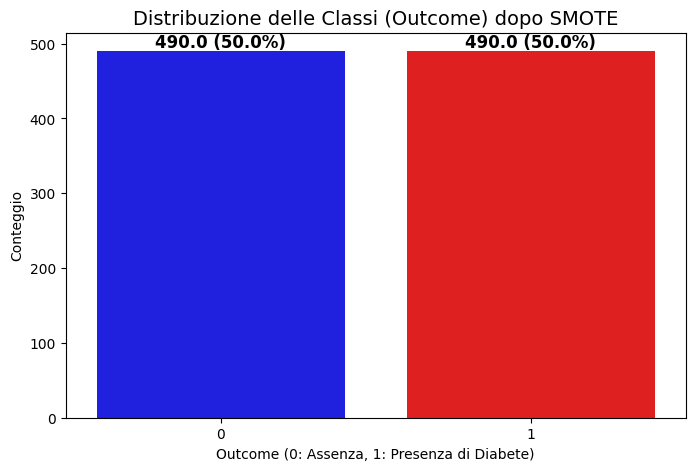

In [34]:
# Convertiamo y_resampled in un DataFrame per compatibilità con seaborn
y_resampled_df = pd.DataFrame({'Outcome': y_resampled})

# Creiamo il grafico con conteggio delle classi
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Outcome', data=y_resampled_df, hue='Outcome', palette=['blue', 'red'], legend=False)

# Impostiamo titolo e assi
plt.title("Distribuzione delle Classi (Outcome) dopo SMOTE", size=14)
plt.xlabel("Outcome (0: Assenza, 1: Presenza di Diabete)")
plt.ylabel("Conteggio")

# Calcoliamo il numero totale di esempi dopo SMOTE
total = len(y_resampled_df)

# Aggiungiamo le etichette con la percentuale sopra ogni barra
for p in ax.patches:
    height = p.get_height()  # Altezza della barra
    if height > 0:
        percentage = '{:.1f}%'.format(100 * height / total)  # Percentuale
        ax.text(p.get_x() + p.get_width()/2., height + 5,  # Posizione del testo
                f'{height} ({percentage})',
                ha="center", fontsize=12, fontweight="bold", color="black")

# Mostriamo il grafico
plt.show()

---
---

### **Istogrammi, grafici e matrice di correlazione**

#### **Istogrammi**

Questo pezzo di codice genera istogrammi per visualizzare la distribuzione di tutte le variabili numeriche nel dataset, escludendo la colonna Outcome:

- `.hist()` genera istogrammi per tutte le colonne numeriche rimanenti.

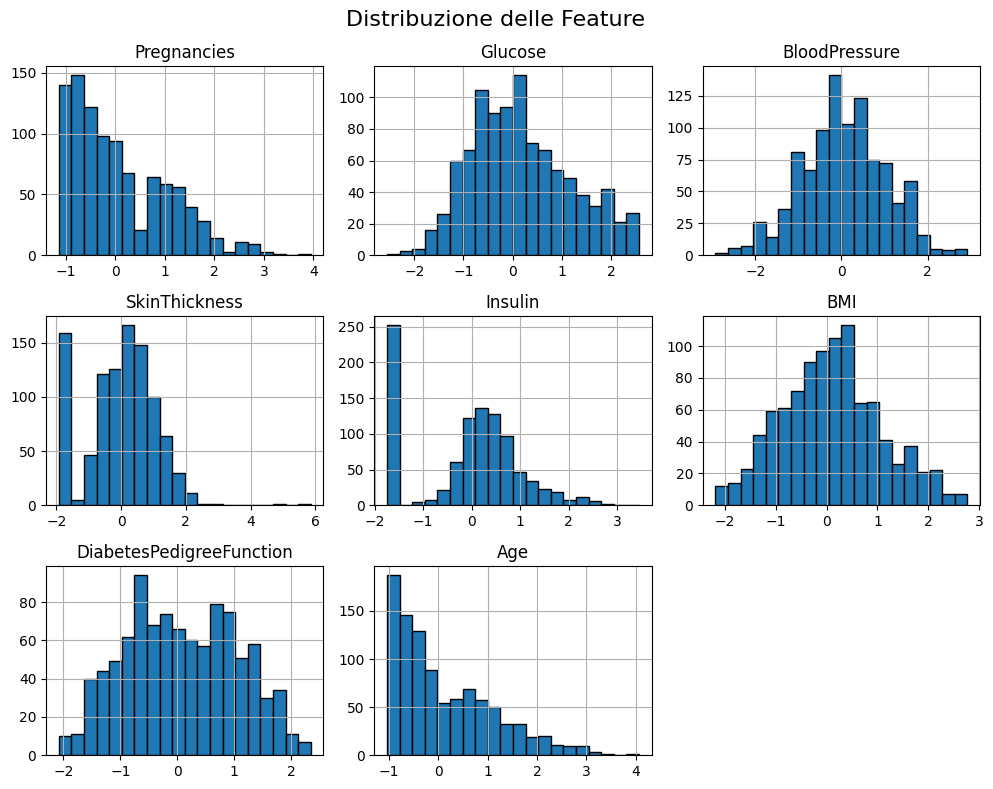

In [35]:
# Creiamo un DataFrame con solo le feature originali dopo preprocessing
X_resampled_original = pd.DataFrame(X_resampled, columns=X_original.columns)

# Istogrammi delle feature originali dopo preprocessing
X_resampled_original.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribuzione delle Feature', fontsize=16)
plt.tight_layout()
plt.show()

#### **Grafici**

Questo pezzo di codice crea dei grafici di densità (KDE - Kernel Density Estimation) per ogni feature del dataset. I grafici mostrano la distribuzione probabilistica delle variabili, aiutando a visualizzare la forma dei dati e la loro variazione.

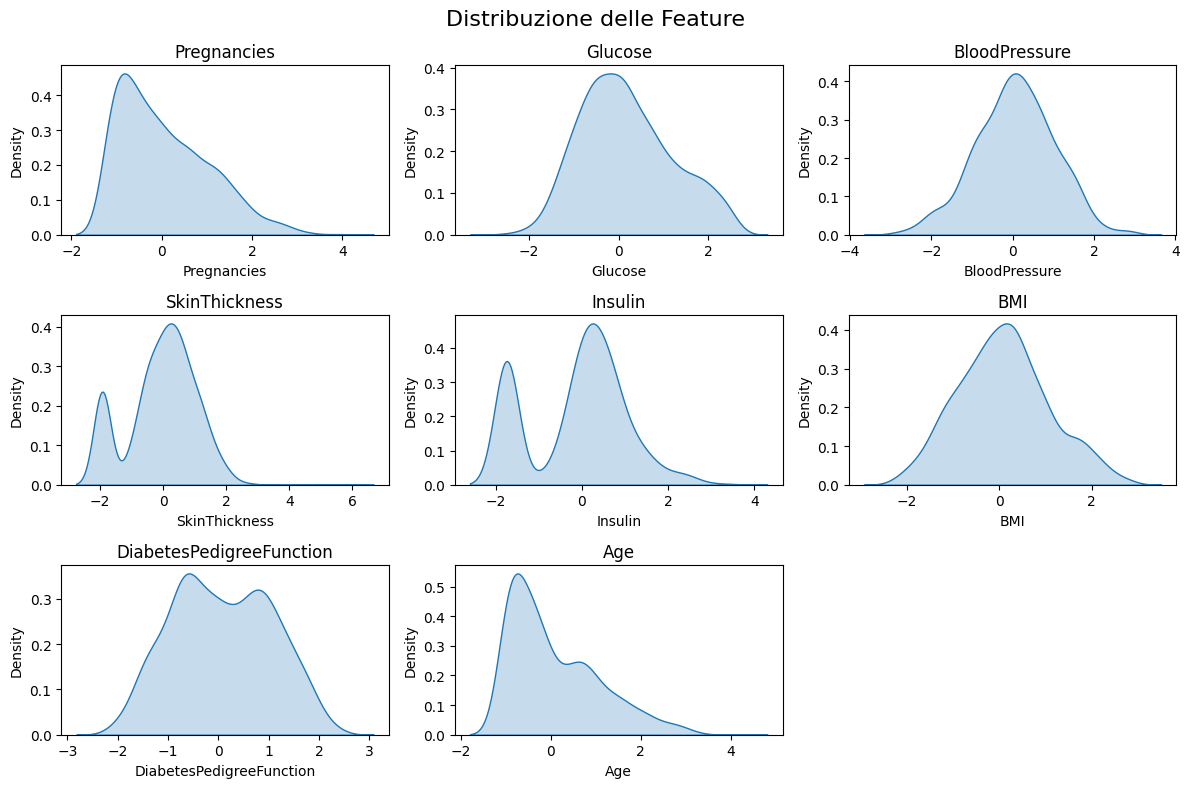

In [36]:
# KDE per il dataset con solo le feature originali dopo preprocessing con più spazio tra i grafici
plt.figure(figsize=(12, 8))

for i, col in enumerate(X_resampled_original.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=X_resampled_original, x=col, fill=True)
    plt.title(col)

plt.suptitle('Distribuzione delle Feature', fontsize=16)
plt.tight_layout()
plt.show()

#### **Matrice di correlazione**

Questo pezzo di codice visualizza una matrice di correlazione tra le feature numeriche nel dataset, rappresentata visivamente come una heatmap:
- ogni cella rappresenta la correlazione tra due variabili.
- colori diversi indicano l'intensità della correlazione.

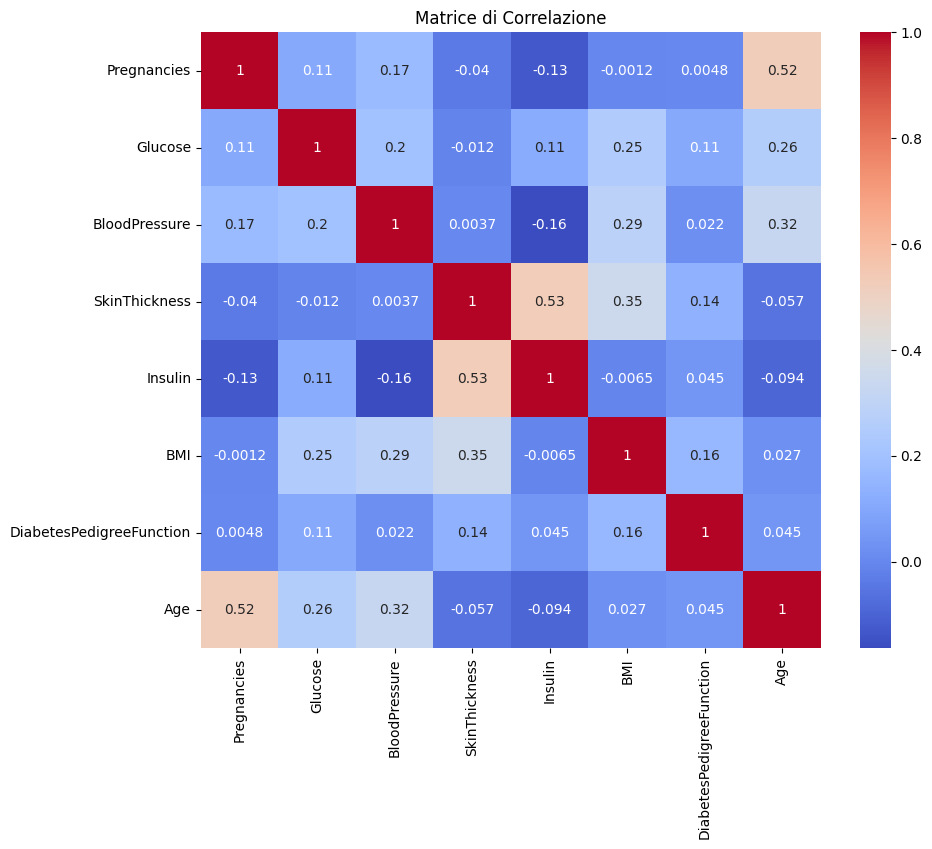

In [37]:
# Matrice di correlazione con le feature originali
plt.figure(figsize=(10, 8))
sns.heatmap(X_resampled_original.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

Osservazioni generali:
1. Colore e valore della correlazione:
  - **blu scuro** indica correlazioni **deboli** o **negative**.
  - **rosso** più intenso indica correlazioni **forti** e **positive**.
  - valori **vicini a 1 o -1** indicano una correlazione **forte**.
  - valori **vicini a 0** indicano una correlazione **debole** o **assente**.

2. La diagonale principale (valore 1):
  - rappresenta la correlazione di ogni variabile **con se stessa** (sempre 1).

Relazioni chiave tra le variabili:
  - SkinThickness e Insulin (0.53):
    - Esiste una correlazione moderata positiva, suggerendo che **un aumento dello spessore della pelle** (SkinThickness) **è associato a un aumento dei livelli di insulina**. Questo è coerente con la fisiologia, in quanto livelli elevati di insulina sono spesso legati a un maggiore accumulo di grasso sottocutaneo.

  - BMI e SkinThickness (0.35):
    - Esiste una correlazione moderata positiva, che riflette **la relazione tra l'indice di massa corporea e il grasso corporeo** misurato dal "SkinThickness".

  - Pregnancies e Age (0.52):
    - Esiste una correlazione positiva significativa, che indica che **le donne con un'età maggiore tendono ad avere più gravidanze**, un **risultato atteso**.

  - Glucose e BMI (0.25):
    - Esiste una correlazione debole positiva, suggerendo che un **maggiore livello di glucosio è leggermente associato a un BMI più alto**.

  - BloodPressure e BMI (0.29):
    - Esiste una correlazione debole positiva, che potrebbe indicare che **un aumento del BMI è associato a un lieve aumento della pressione sanguigna**.

Di conseguenza possiamo tratte che variabili come **Glucose**, **BMI** e **Insulin**, che mostrano **correlazioni significative con altre variabili**, potrebbero avere **un impatto maggiore sulla classificazione del diabete**.

---
---

### **Analisi delle Componenti Principali (PCA)**

Questo codice applica l'analisi delle componenti principali (PCA) per ridurre la dimensionalità dei dati mantenendo la maggior parte dell'informazione possibile. Generalmente serve per:
- Ridurre la complessità del modello:
  - Dataset con molte feature possono aumentare la complessità computazionale e introdurre problemi come l'overfitting.
  - PCA riduce il numero di feature trasformandole in componenti principali che sono combinazioni lineari delle feature originali, semplificando il modello.
- Eliminare la ridondanza nei dati:
  - In molti dataset, alcune feature possono essere altamente correlate tra loro, il che introduce ridondanza.
  - PCA identifica le direzioni di massima varianza, combinando le feature correlate in singole componenti principali.
- Mantenere la maggior parte dell'informazione:
  - Non tutte le feature contribuiscono in modo significativo alla varianza totale del dataset.
  - PCA ordina le componenti principali in base alla loro capacità di spiegare la varianza, permettendo di selezionare solo quelle che contengono la maggior parte dell'informazione.
- Migliorare le performance dei modelli:
  -  Alcuni modelli di machine learning funzionano meglio con un numero ridotto di feature e quando le feature non sono troppo correlate.
  - PCA trasforma le feature originali in componenti ortogonali (non correlate), migliorando la qualità dei dati per i modelli che assumono indipendenza delle variabili.



Funzionamento del codice:
1. Applicazione di PCA:
  - Il dataset originale viene trasformato in un nuovo spazio definito dalle componenti principali, che sono combinazioni lineari delle feature originali.
  - `X_pca` è il dataset trasformato nello spazio delle componenti principali.

2. Varianza spiegata:
  - Viene calcolata la proporzione di varianza spiegata da ciascuna componente principale rispetto alla varianza totale.
  - `explained_variance` è un array che mostra quanto ogni componente contribuisce alla spiegazione della varianza.

3. Varianza spiegata cumulativa:
  - Viene calcolata la somma cumulativa della varianza spiegata dalle componenti principali.
  - `cumulative_variance` permette di capire quante componenti principali sono necessarie per spiegare una certa percentuale della varianza totale.

4. Creazione dei grafici:
  - Grafico della varianza spiegata per ogni componente:
    - Viene creato un grafico a linee che mostra la varianza spiegata da ciascuna componente.
    - Lo scopo è **identificare quali componenti contribuiscono maggiormente alla spiegazione della varianza**.

  - Scree Plot (varianza cumulativa e varianza spiegata):
    - Viene combinata un **istogramma** (scree plot) che mostra la varianza spiegata da ciascuna componente e una **curva** che rappresenta la varianza spiegata cumulativa.

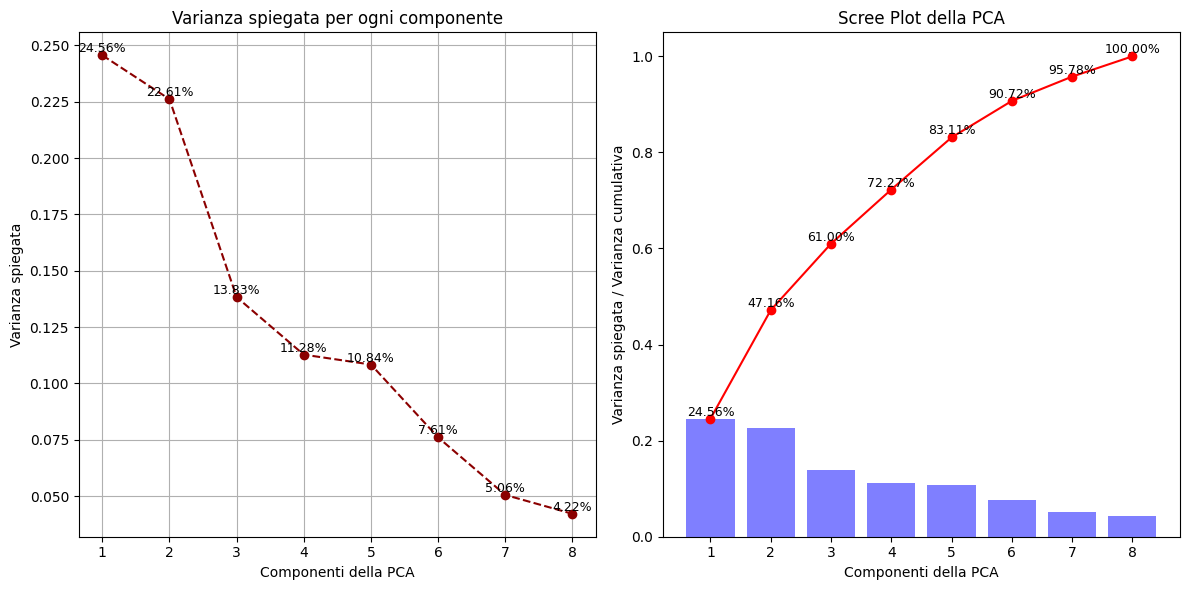

In [38]:
# Applicare PCA mantenendo tutte le componenti principali
pca = PCA(n_components=len(X_resampled.columns))
X_pca = pca.fit_transform(X_resampled)

# Ottenere la varianza spiegata da ogni componente
explained_variance = pca.explained_variance_ratio_

# Calcolare la varianza spiegata cumulativa
cumulative_variance = np.cumsum(explained_variance)

# Creazione dei due grafici: Varianza spiegata e Scree Plot
plt.figure(figsize=(12, 6))

# Grafico della varianza spiegata per ogni componente
plt.subplot(1, 2, 1)
plt.plot(range(1, pca.n_components_ + 1), explained_variance, marker='o', linestyle='--', color='darkred')

# Aggiungere annotazioni sopra ogni punto
for i, value in enumerate(explained_variance):
    plt.text(i + 1, value, f'{value * 100:.2f}%', ha='center', va='bottom', fontsize=9)

plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Varianza spiegata per ogni componente")
plt.grid()

# Scree Plot con varianza cumulativa
plt.subplot(1, 2, 2)
plt.bar(range(1, pca.n_components_ + 1), explained_variance, color='blue', alpha=0.5, align='center')
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance, marker='o', color='red')

# Annotazioni delle percentuali cumulative
for i, value in enumerate(cumulative_variance):
    plt.text(i + 1, value, f'{value * 100:.2f}%', ha='center', va='bottom', fontsize=9)

plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata / Varianza cumulativa')
plt.title("Scree Plot della PCA")

plt.tight_layout()
plt.show()

Conclusioni:
- Contributo delle componenti principali:
  - La prima componente spiega il 24.56% della varianza nei dati.
  - Le prime due componenti insieme spiegano circa il 47.16% della varianza.
  - Le prime cinque componenti spiegano cumulativamente circa l'83.11% della varianza totale, un valore sufficiente per rappresentare la maggior parte delle informazioni originali.

- Scree Plot:
  - La curva della varianza cumulativa si appiattisce significativamente dopo la quinta componente, indicando che le componenti successive aggiungono un contributo limitato in termini di varianza spiegata.
  - È possibile ridurre la dimensionalità del dataset mantenendo 5 componenti principali, preservando così la maggior parte delle informazioni.

- Varianza spiegata:
  - Le componenti successive alla quinta contribuiscono poco alla varianza (meno del 10% ciascuna).
  - Le ultime componenti (ad esempio la settima e l'ottava) sono quasi trascurabili in termini di varianza spiegata.

Queste conclusioni supportano la scelta di **ridurre le dimensioni del dataset** considerando **solo le prime 5 componenti principali**, ottimizzando il bilanciamento tra semplicità del modello e conservazione delle informazioni.

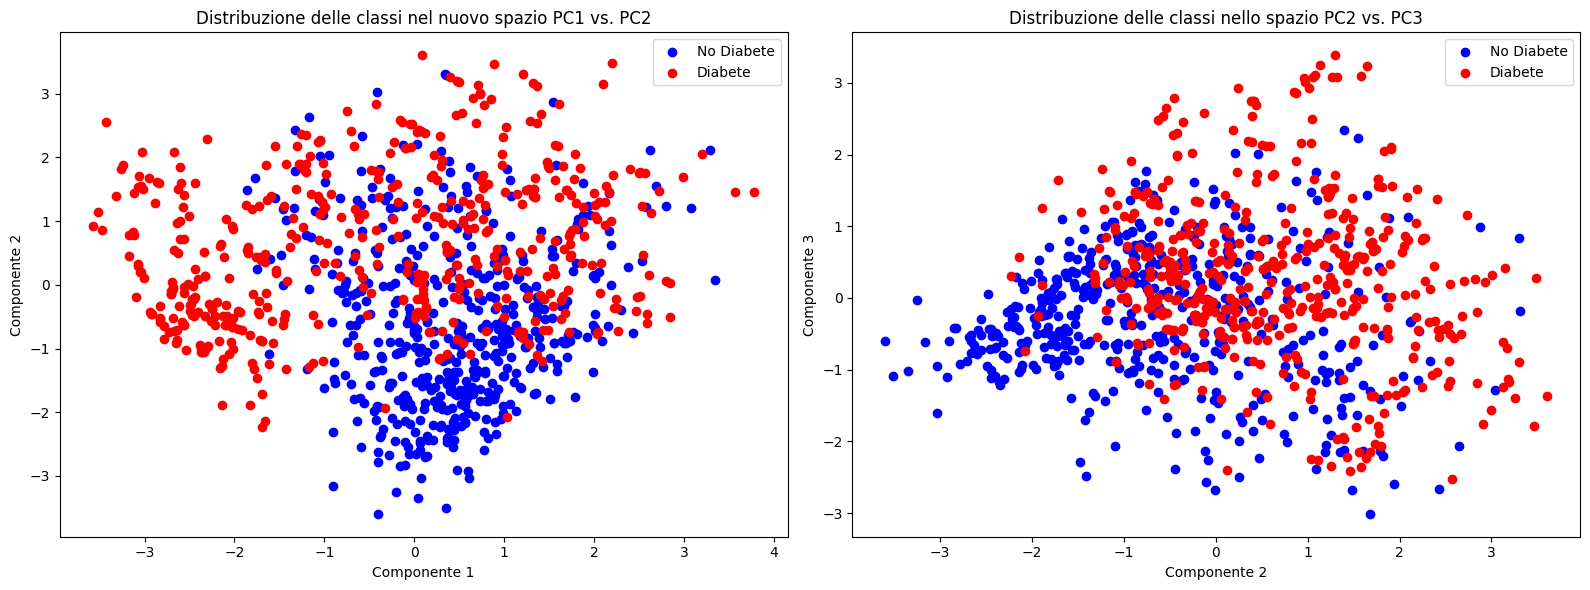

In [39]:
# Creazione di una figura con due sottotrame orizzontali
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
unique_labels = np.unique(y_resampled)  # Trova le classi uniche (0 e 1)

# Scatter plot delle prime due componenti principali (PC1 e PC2)
for label in unique_labels:
    mask = (y_resampled == label).values  # Seleziona i punti della classe specifica
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1],
                    color='blue' if label == 0 else 'red',
                    label='No Diabete' if label == 0 else 'Diabete')

# Configurazione del primo grafico
axes[0].set_xlabel('Componente 1')
axes[0].set_ylabel('Componente 2')
axes[0].set_title("Distribuzione delle classi nel nuovo spazio PC1 vs. PC2")
axes[0].legend()

# Scatter plot delle componenti PC2 e PC3
for label in unique_labels:
    mask = (y_resampled == label).values  # Seleziona i punti della classe specifica
    axes[1].scatter(X_pca[mask, 1], X_pca[mask, 2],
                    color='blue' if label == 0 else 'red',
                    label='No Diabete' if label == 0 else 'Diabete')

# Configurazione del secondo grafico
axes[1].set_xlabel('Componente 2')
axes[1].set_ylabel('Componente 3')
axes[1].set_title("Distribuzione delle classi nello spazio PC2 vs. PC3")
axes[1].legend()

# Mostra la figura con entrambe le sottotrame
plt.tight_layout()
plt.show()


Si nota una sovrapposizione tra le classi:
  - La sovrapposizione tra le classi in entrambi i grafici indica che le componenti principali **catturano la varianza dei dati**, ma la **separabilità** tra le classi "No Diabete" e "Diabete" **non è ancora ottimale**.
  - È possibile che l'informazione utile per separare le classi **sia distribuita tra tutte le componenti principali** e non concentrata solo nelle prime tre.

In sintesi, i grafici mostrano che, sebbene la PCA riduca la dimensionalità e catturi una parte significativa della varianza, è necessario utilizzare **più di due componenti** per una rappresentazione più **accurata e separabile** delle classi.

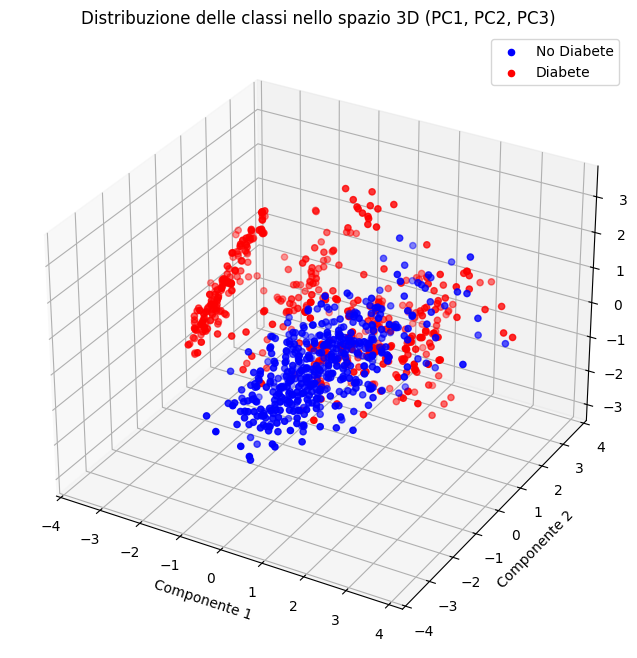

In [40]:
# Scatter plot 3D con PC1, PC2 e PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot per le classi
for label in unique_labels:
    mask = (y_resampled == label).values
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2],  # PC1, PC2, PC3
               color='blue' if label == 0 else 'red',
               label='No Diabete' if label == 0 else 'Diabete')

# Etichette degli assi
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Legenda
ax.legend()

plt.title("Distribuzione delle classi nello spazio 3D (PC1, PC2, PC3)")
plt.show()


Si nota che anche nello spazio tridimensionale formato dalle **prime tre componenti principali** (PC1, PC2, PC3), si osserva una **sovrapposizione significativa** tra le classi "No Diabete" (verde) e "Diabete" (rosso).

Nonostante la rappresentazione in 3D aggiunga un'ulteriore dimensione rispetto ai grafici 2D precedenti, la separazione tra le due classi rimane parzialmente indistinta.

Le prime tre componenti principali spiegano circa il 61% della varianza totale (come dedotto dalla precedente analisi di PCA). Tuttavia, ciò potrebbe non essere sufficiente per una separazione netta tra le classi nel contesto di classificazione, il che potrebbe indicare che altre componenti principali (PC4, PC5, ecc.) potrebbero contenere informazioni utili per la classificazione.

Di conseguenza si può supporre che l'uso di tecniche di classificazione avanzate, come modelli non lineari (es. SVM con kernel non lineare o reti neurali), potrebbe essere necessario per ottenere una migliore separazione tra le classi.


---
---

### **Modelli di classificazione**

#### **Divisione del dataset in Training, Validation e Test Set**

Una volta finita la fase di preprocessing, è necessario dividere i dati in training set, validation set e test set per addestrare e valutare i modelli di Machine Learning.

Utilizziamo la funzione `train_test_split()` per suddividere il dataset in:
- 70% Training – 15% Validation – 15% Test:
  - Questa suddivisione consente di **mantenere un validation set separato** per ottimizzare il modello **prima del test** finale.
  - Il training set viene usato per **l’addestramento del modello**, il validation set per **la selezione dell’ipermodello** e il test set per **la valutazione finale**.
  
In questo caso, il modello viene addestrato con una percentuale equilibrata di dati per training e validazione, garantendo una valutazione finale accurata sul test set.

In [41]:
# Prima suddivisione: Training (70%) e temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Seconda suddivisione: Validation (15%) e Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Controllo delle dimensioni
print(f"Train Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")

Train Set: (686, 8), Validation Set: (147, 8), Test Set: (147, 8)


#### **Valutazione delle performance e della generalizzazione del modello**

Durante l’addestramento dei modelli, utilizzeremo le **metriche standard** per il classification report:
- Accuracy:
  - visualizza **il percentuale** di predizioni corrette.
- Precision:
  - misura **la qualità** delle predizioni positive.
- Recall:
  - valuta **la capacità del modello di catturare** tutte le istanze positive.
- F1-score:
  - visualizza **la media armonica tra Precision e Recall**, utile per dataset sbilanciati.

Tuttavia, valutare un modello esclusivamente su un singolo training, validation e test set potrebbe non essere sufficiente per garantirne la robustezza. Per questo motivo, viene introdotta **la cross-validation** come strumento fondamentale per stimare in modo più approfondito e affidabile **le performance medie** del modello **su dati non visti**.



##### **Cross-validation per una valutazione avanzata**

1.  Si definisce un dizionario `scoring` che contiene le metriche di performance (accuracy, precision, recall e f1_score) per valutare il modello.   Queste metriche vengono calcolate con la media "macro" per tener conto della media dei punteggi per ogni classe in modo equilibrato.

2. Si definisce una funzione per eseguire la cross-validation:
  - Prende in input il **modello** da addestrare, le **caratteristiche** (`X`), le **etichettature** (`y`) e un parametro opzionale per **il numero di fold** di cross-validation.
  - La **StratifiedKFold** viene utilizzata per suddividere il dataset **in 10 fold**.
  - Per ogni fold, vengono calcolate le metriche definite in `scoring`.
  - I punteggi per ciascuna metrica vengono salvati in un dizionario `results`.
  - Alla fine, vengono **stampati i valori** per ciascun fold, insieme alla **media** e all'**intervallo di confidenza al 95%** per ogni metrica.

3. Si definisce una funzione per calcolare l'intervallo di confidenza al 95% per i valori di ciascuna metrica:
  - Viene utilizza la distribuzione **t di Student** per calcolare l'intervallo, che è appropriato quando si ha una **distribuzione di campioni limitata**, come nel caso dei fold di cross-validation.
  - La funzione riceve **un array di punteggi** e restituisce **l'intervallo di confidenza arrotondato a 6 decimali**.

In [42]:
# Preparazione per la cross-validation avanzata con metriche multiple
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

print("Misure utilizzate durante cross validation:", ' '.join(scoring.keys()))

# Funzione per eseguire la cross-validation con metriche avanzate
def my_cross_validation(model, X, y, cv):
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)

    results = {
        'accuracy': scores['test_accuracy'],
        'precision': scores['test_precision'],
        'recall': scores['test_recall'],
        'f1-score': scores['test_f1_score']
    }

    print("Cross-validation eseguita con 10 fold:")
    # Stampa dei risultati per ogni metrica
    for metric, values in results.items():
        print(f"--- {metric.capitalize()} di ogni fold, con media pari a {np.mean(values):.8f} ---\n")
        print(values)
        conf_interval = confidence_interval(values)
        print(f"\nIntervallo di confidenza 95%: {conf_interval}\n")

    return results

print("Funzione my_cross_validation ora disponibile.")


# Funzione per calcolare gli intervalli di confidenza con 6 decimali
def confidence_interval(scores):
    # Calcola la media e l'errore standard dei punteggi
    mean_val = np.mean(scores)
    ci_low, ci_high = st.t.interval(0.95, len(scores) - 1, loc=mean_val, scale=st.sem(scores))
    # Restituisce l'intervallo di confidenza formattato
    return f"({round(ci_low, 6)}, {round(ci_high, 6)})"

print("Funzione confidence_interval ora disponibile.")

Misure utilizzate durante cross validation: accuracy precision recall f1_score
Funzione my_cross_validation ora disponibile.
Funzione confidence_interval ora disponibile.


##### **Modello baseline**



Nel nostro progetto, il target è **binario**, rappresentato da due classi: "assenza di diabete" e "presenza di diabete".

Inizialmente, il dataset poteva essere sbilanciato, con un numero maggiore di pazienti senza diabete rispetto a quelli con diabete. Tuttavia, per bilanciare il dataset e trattare il problema della distribuzione sbilanciata delle classi, abbiamo applicato SMOTE (Synthetic Minority Over-sampling Technique), che ha generato esempi sintetici per la classe meno rappresentata, portando le classi a un numero simile di esempi.

Anche se il dataset è stato bilanciato tramite SMOTE, è comunque utile avere un modello baseline che predice la classe più comune nel caso di un dataset sbilanciato. Per questo motivo, il modello baseline predice sempre "presenza di diabete" (classe 1), senza prendere in considerazione le caratteristiche dei pazienti.

La logica del modello baseline è che, in un contesto di classi bilanciate, predire sempre la classe 1 può ancora dare un riferimento per l'accuratezza di altri modelli di machine learning. Infatti, lo scopo del modello baseline è fornire un **valore di accuratezza minima** da usare come **punto di riferimento** per confrontare altri modelli.

Se un modello di machine learning non riesce a superare l'accuratezza del modello baseline, ciò indicherebbe che il modello non ha apportato alcun valore aggiunto rispetto a un semplice modello che predice sempre la classe più frequente, con conseguente aumento dei costi computazionali senza miglioramenti effettivi.

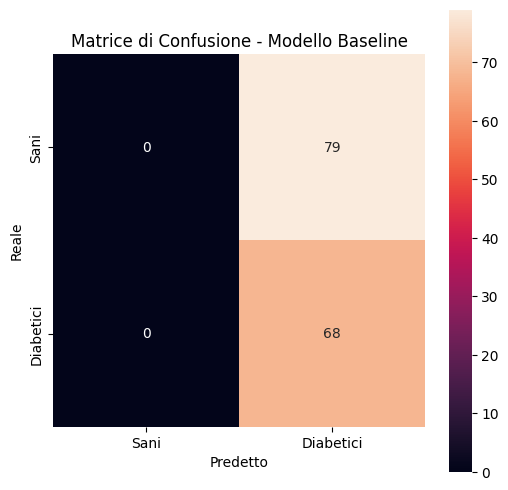

Accuracy del modello baseline: 0.46258503401360546


In [43]:
# Predizioni target sempre uguali a True (Presenza di Diabete)
y_pred_baseline = np.ones(len(y_test), dtype=bool)  # Predizione sempre 1 (Presenza)

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred_baseline)

# Plottare la matrice di confusione
plt.figure(figsize=(6, 6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=['Sani', 'Diabetici'],
            yticklabels=['Sani', 'Diabetici'])
plt.ylabel('Reale')
plt.xlabel('Predetto')
plt.title('Matrice di Confusione - Modello Baseline')

# Mostrare il grafico
plt.show()

# Calcolare l'accuracy del modello baseline
baseline_test_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Accuracy del modello baseline:", baseline_test_accuracy)

Interpretazione della Matrice di Confusione:
- Veri Positivi (TP):
  - 68 (predizione dei diabetici corretta per pazienti effettivamente diabetici)
- Falsi Positivi (FP):
  - 79 (predizione dei diabetici errata per pazienti effettivamente sani)
- Veri Negativi (TN):
  - 0 (non sono stati predetti sani per i pazienti effettivamente sani)
- Falsi Negativi (FN):
  - 0 (non sono stati predetti sani per i pazienti effettivamente diabetici)

Conclusione:
- Poiché il modello baseline predice sempre la classe "Diabetici" (classe 1), il modello ha fatto **68 previsioni corrette** (veri positivi, TP) per i pazienti diabetici. Tuttavia, ha **79 falsi positivi** (FP), ossia ha predetto che pazienti sani fossero diabetici.
- Il modello baseline **non distingue** affatto **i pazienti sani** (classe 0) e **predice solo i pazienti diabetici**. Questo porta a **un alto numero di falsi positivi**. La bassa accuratezza (46.26%) riflette che **il modello non è utile** in quanto **non riesce a fare predizioni corrette** per **la classe più rara** (ovvero i pazienti sani).

##### **Decision Tree Classifier**


Il Decision Tree Classifier è un modello di machine learning **supervisionato** utilizzato per la classificazione dei dati. Si basa su una **struttura ad albero** in cui ogni nodo rappresenta una **decisione basata su una caratteristica**.

###### **Addestramento dei modelli**


Per ottenere i risultati migliori, abbiamo ottimizzato il modello impostando i seguenti **iperparametri**:
- `criterion` (funzione di valutazione dell'albero),
- `splitter` (tipo di divisione per i nodi),
- `max_depth` (profondità massima dell'albero),
- `min_samples_split` (numero minimo di campioni per dividere un nodo),
- `ccp_alpha` (parametro di potatura per evitare overfitting).

In [66]:
# Addestramento del modello sul training set (70/15/15)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=20, ccp_alpha=0.01, splitter='best', criterion='gini')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=15, min_samples_split=20,
                       random_state=42)

Questa parte di codice esegue un'ottimizzazione dei parametri del modello DecisionTreeClassifier utilizzando **RandomizedSearchCV**, che cerca combinazioni casuali di parametri, tra cui:
- `dt_model` (il modello da ottimizzare).
- `n_iter=10` (il numero di combinazioni casuali da testare).
- `scoring='accuracy'` (la metrica di valutazione).
- `cv=10` (la validazione incrociata a 10 fold).

In [67]:
# Definizione del grid dei parametri da esplorare
param_dist_dt = {
    'criterion': ['gini', 'entropy'],  # Funzione di valutazione
    'splitter': ['best', 'random'],  # Tipo di divisione
    'max_depth': [None, 5, 10, 15, 20],  # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10, 20],  # Numero minimo di campioni per dividere un nodo
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2],  # Parametro di potatura
}

# Creazione del RandomizedSearchCV per il modello (70/15/15)
random_search_dt_70 = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist_dt,
    n_iter=10,  # Numero di combinazioni casuali da testare
    scoring='accuracy',  # Puoi scegliere un altro parametro come precision, recall, etc.
    cv=10,  # 10-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Addestramento del modello con RandomizedSearchCV sul training set (70/15/15)
random_search_dt_70.fit(X_train, y_train)

# Creazione del modello con i migliori parametri
best_dt_model_70 = random_search_dt_70.best_estimator_

# Mostra i migliori parametri trovati per ogni set
print("Migliori parametri per il modello (70/15/15):")
print(random_search_dt_70.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Migliori parametri per il modello (70/15/15):
{'splitter': 'best', 'min_samples_split': 20, 'max_depth': 15, 'criterion': 'gini', 'ccp_alpha': 0.01}


###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento.

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [68]:
# Creazione della cross-validation con StratifiedKFold (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation su training set (70/15/15)
cv_scores_70 = my_cross_validation(dt_model, X_train, y_train, cv=kfold)

# Creazione di un DataFrame per mostrare i risultati della cross-validation
cv_summary_df = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (70/15/15)': [round(np.mean(cv_scores_70['accuracy']), 6),
                         round(np.mean(cv_scores_70['precision']), 6),
                         round(np.mean(cv_scores_70['recall']), 6),
                         round(np.mean(cv_scores_70['f1-score']), 6)],
    '95% CI (70/15/15)': [confidence_interval(cv_scores_70['accuracy']),
                           confidence_interval(cv_scores_70['precision']),
                           confidence_interval(cv_scores_70['recall']),
                           confidence_interval(cv_scores_70['f1-score'])]
})

cv_summary_df.set_index('Metrica', inplace=True)
cv_summary_df.index.name = None
cv_summary_df

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni fold, con media pari a 0.84247656 ---

[0.89855072 0.7826087  0.86956522 0.88405797 0.86956522 0.8115942
 0.86764706 0.82352941 0.86764706 0.75      ]

Intervallo di confidenza 95%: (0.807875, 0.877078)

--- Precision di ogni fold, con media pari a 0.84688257 ---

[0.8989899  0.7887931  0.8697479  0.88879457 0.87801724 0.81409168
 0.87105263 0.82337662 0.86764706 0.76831502]

Intervallo di confidenza 95%: (0.814754, 0.879011)

--- Recall di ogni fold, con media pari a 0.84251210 ---

[0.89831933 0.78151261 0.8697479  0.88487395 0.86848739 0.81092437
 0.86623377 0.82337662 0.86796537 0.75367965]

Intervallo di confidenza 95%: (0.808361, 0.876663)

--- F1-score di ogni fold, con media pari a 0.84175968 ---

[0.89846542 0.78095238 0.86956522 0.88383838 0.86857143 0.8109589
 0.86692759 0.82337662 0.86761843 0.7473224 ]

Intervallo di confidenza 95%: (0.806647, 0.876872)



Media (70/15/15)     95% CI (70/15/15)
Accuracy           0.842477  (0.807875, 0.877078)
Precision          0.846883  (0.814754, 0.879011)
Recall             0.842512  (0.808361, 0.876663)
F1 Score           0.841760  (0.806647, 0.876872)

Conclusioni:
- Il modello ha prestazioni elevate, con **metriche oltre l'80% in media**. Questo indica che il modello sta **generalizzando bene**, riuscendo a fare previsioni accurate sui dati di test senza sovradimensionare i dati di training.
- L'intervallo di confidenza relativamente stretto per tutte le metriche suggerisce una **performance stabile** su diverse suddivisioni dei dati.
- Il modello mostra un **buon equilibrio tra precisione e recall**, come evidenziato **dall'F1 score**.


###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Decision Tree sui set di training, validation e test.

Per il miglior controllo di overfitting, si calcola **la differenza tra Training e Test** per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.

In [69]:
# Predizioni sui diversi set per verificare l'overfitting (solo 70/15/15)
y_pred_train_dt = dt_model.predict(X_train)
y_pred_val_dt = dt_model.predict(X_val)
y_pred_test_dt = dt_model.predict(X_test)

# Creazione del DataFrame con le metriche per visualizzare l'overfitting
performance_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy (70/15/15)': [accuracy_score(y_train, y_pred_train_dt), accuracy_score(y_val, y_pred_val_dt), accuracy_score(y_test, y_pred_test_dt)],
    'Precision (70/15/15)': [precision_score(y_train, y_pred_train_dt, average='macro'), precision_score(y_val, y_pred_val_dt, average='macro'), precision_score(y_test, y_pred_test_dt, average='macro')],
    'Recall (70/15/15)': [recall_score(y_train, y_pred_train_dt, average='macro'), recall_score(y_val, y_pred_val_dt, average='macro'), recall_score(y_test, y_pred_test_dt, average='macro')],
    'F1 Score (70/15/15)': [f1_score(y_train, y_pred_train_dt, average='macro'), f1_score(y_val, y_pred_val_dt, average='macro'), f1_score(y_test, y_pred_test_dt, average='macro')]
})

# Calcolo della differenza tra Train e Test per ogni metrica
performance_df["Accuracy Gap (Train - Test)"] = performance_df["Accuracy (70/15/15)"][0] - performance_df["Accuracy (70/15/15)"][2]
performance_df["F1 Score Gap (Train - Test)"] = performance_df["F1 Score (70/15/15)"][0] - performance_df["F1 Score (70/15/15)"][2]


# Visualizza il risultato
print("Decision Tree Performance Overfitting Check with Gaps")
performance_df.set_index('Set', inplace=True)
performance_df.index.name = None
performance_df


Decision Tree Performance Overfitting Check with Gaps


Accuracy (70/15/15)  Precision (70/15/15)  Recall (70/15/15)  \
Train                  0.890671              0.893526           0.889821   
Validation             0.897959              0.903199           0.899167   
Test                   0.904762              0.904167           0.906273   

            F1 Score (70/15/15)  Accuracy Gap (Train - Test)  \
Train                  0.890279                    -0.014091   
Validation             0.897789                    -0.014091   
Test                   0.904545                    -0.014091   

            F1 Score Gap (Train - Test)  
Train                         -0.014267  
Validation                    -0.014267  
Test                          -0.014267

Conclusioni:
- **Le differenze** tra training, validation e test sono **minime**, il che è un **segno positivo**. Un modello che generalizza bene tende a non avere grandi differenze tra queste metriche, mentre un modello che soffre di overfitting avrebbe una prestazione significativamente migliore sui dati di training rispetto ai dati di test.
- Accuracy Gap (Train - Test) e F1 Score Gap (Train - Test) sono **entrambi negativi** (circa -0.014), il che indica che la performance del modello sui dati di test è leggermente migliore di quella sui dati di training e validation. Questo potrebbe suggerire che il modello **non è affatto sovradimensionato** e si sta **generalizzando molto bene**.

###### **Alberi, matrici di correlazione e grafici**

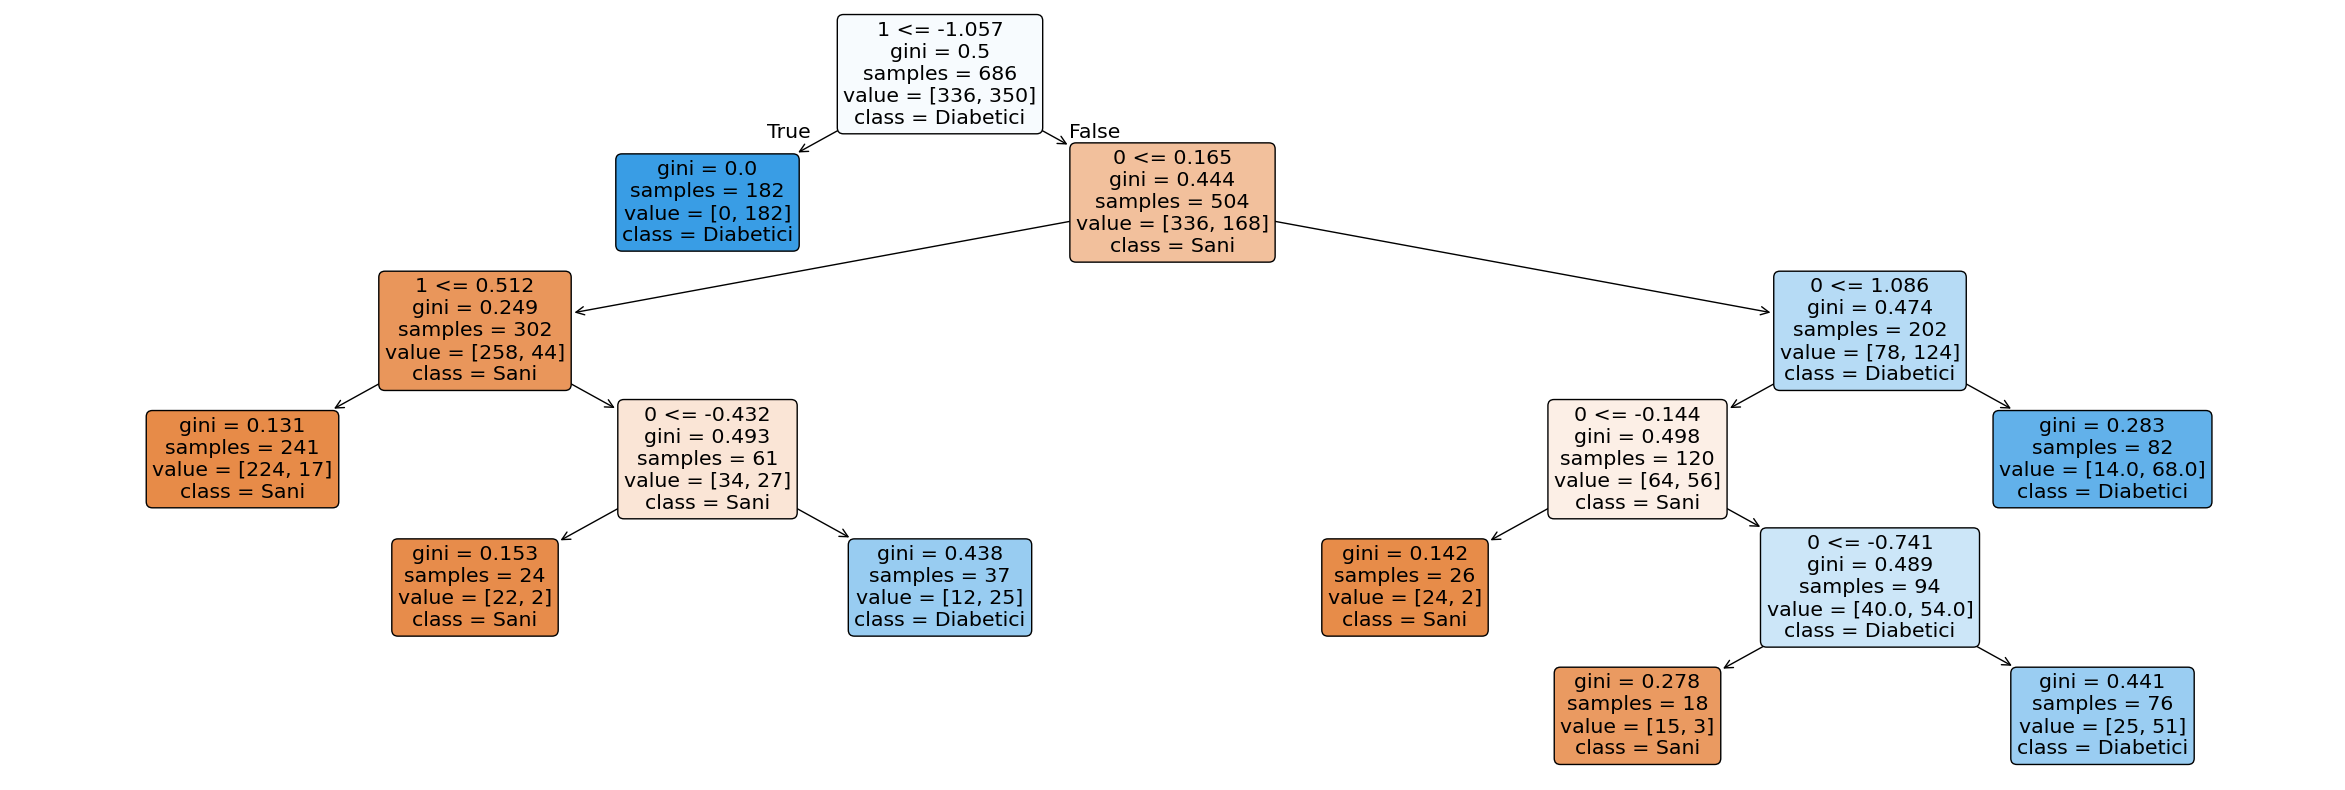

In [70]:
plt.figure(figsize=(30, 10))
plot_tree(dt_model, filled=True, rounded=True, class_names=['Sani', 'Diabetici'], feature_names=y)
plt.show()

Conclusioni:
- L'albero decisionale sta cercando di classificare i dati in due classi principali: Sani e Diabetici.
- L'algoritmo ha costruito vari nodi basandosi sulle caratteristiche del dataset, tentando di minimizzare l'impurità Gini in ciascun ramo per ottenere una classificazione più accurata.
- L'albero sembra ben strutturato, con valori Gini relativamente bassi, il che indica che le suddivisioni fatte per ogni nodo sono efficaci nel separare le classi.

In sintesi, questa è una visualizzazione di come un albero decisionale ha suddiviso il dataset per classificare le persone in due categorie, cercando di ottimizzare la separazione delle classi (Sani e Diabetici) in base alle caratteristiche del dataset.

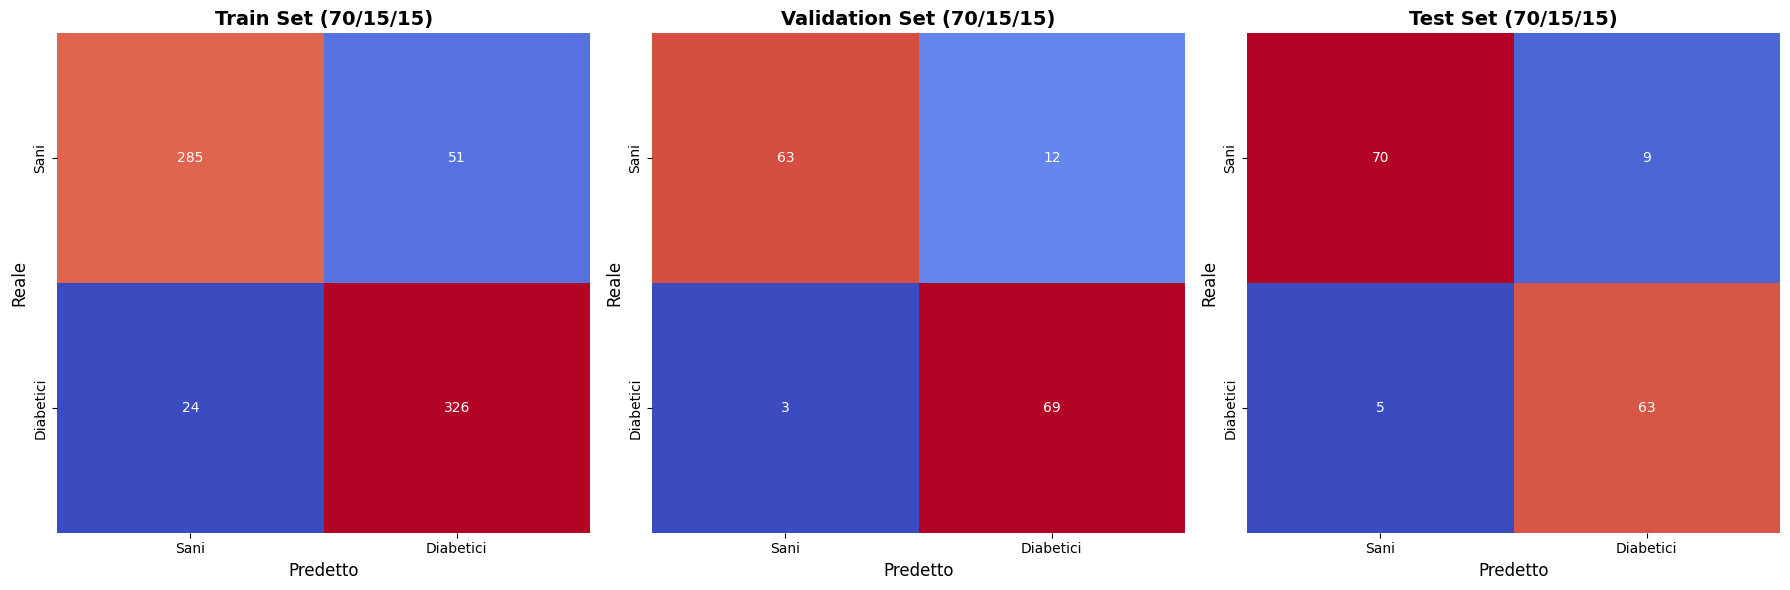

In [71]:
# Definizione delle etichette delle classi
class_labels = ["Sani", "Diabetici"]

# Creazione della figura per le confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Solo 3 grafici ora

# Titoli per i grafici (solo 70/15/15)
titles = [
    "Train Set (70/15/15)", "Validation Set (70/15/15)", "Test Set (70/15/15)"
]

# Liste delle confusion matrix per ogni set di dati (solo 70/15/15)
cm_data = [
    confusion_matrix(y_train, y_pred_train_dt),
    confusion_matrix(y_val, y_pred_val_dt),
    confusion_matrix(y_test, y_pred_test_dt)
]

# Loop per creare ogni subplot con la rispettiva matrice di confusione
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_data[i], annot=True, fmt='d', cmap='coolwarm', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

# Miglioramento della disposizione dei grafici
plt.tight_layout()
plt.show()


Conclusioni:
- **Train Set** ha una **buona** capacità di **distinguere le classi** nel set di addestramento.
- **Validation Set** sta generalizzando abbastanza bene anche **sui dati di validazione**, senza evidenti segni di overfitting.
- **Test Set** indica che la performance è simile a quella nel set di validazione, indicando che il modello è riuscito a mantenere una buona precisione anche **sui dati mai visti prima**.


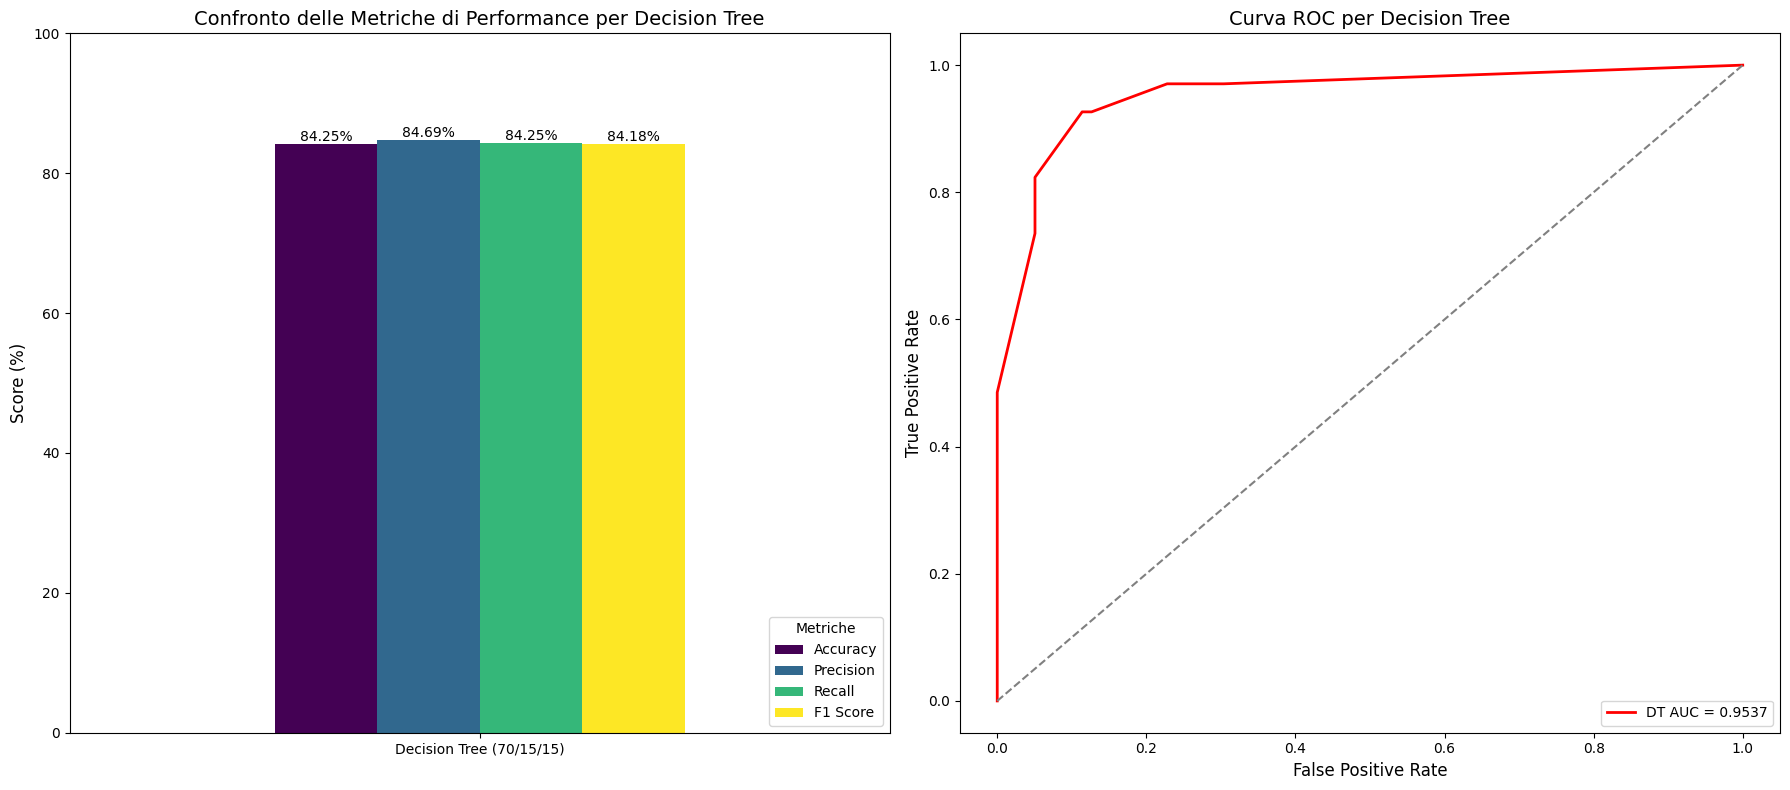

In [72]:
# Risultati della Cross-Validation (solo per 70/15/15)
accuracy_dt = round(np.mean(cv_scores_70['accuracy']), 6)
precision_dt = round(np.mean(cv_scores_70['precision']), 6)
recall_dt = round(np.mean(cv_scores_70['recall']), 6)
f1_dt = round(np.mean(cv_scores_70['f1-score']), 6)

# DataFrame con le Metriche di Performance (solo per 70/15/15)
performance_dt_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree (70/15/15)': [accuracy_dt * 100, precision_dt * 100, recall_dt * 100, f1_dt * 100]
}).set_index('Metric').T

# Curva ROC (solo per 70/15/15)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])  # ROC per Decision Tree (70/15/15)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Creazione della figura
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### Grafico delle metriche di performance
performance_dt_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per Decision Tree", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni sopra le barre
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### Grafico della Curva ROC (solo per 70/15/15)
axes[1].plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'DT AUC = {roc_auc_dt:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per Decision Tree", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

# Miglioramento del layout
plt.tight_layout()
plt.show()


Conclusioni dalle Metriche di Performance:
- Accuracy: 84.25%
  - Il modello ha una buona accuratezza, indicando che il 84.25% delle predizioni sono corrette. Questa è una metrica generale che rappresenta la percentuale di predizioni giuste.

- Precision: 84.69%
  - La precisione è molto simile all'accuracy e indica che quando il modello predice la classe "Sani" o "Diabetici", la previsione è corretta nel 84.69% dei casi. Questo è un buon risultato, che indica che il modello è abbastanza preciso nell'evitare falsi positivi.

- Recall: 84.25%
  - Il recall misura quanto bene il modello riesce a rilevare tutte le istanze delle classi "Sani" e "Diabetici". Il valore di 84.25% è molto simile a quello dell'accuracy, suggerendo che il modello è equilibrato nel rilevare entrambe le classi senza tralasciarne troppe.

- F1 Score: 84.18%
  - L'F1 score è una misura combinata che tiene conto sia della precisione che del recall. Un valore di 84.18% indica che il modello ha un buon equilibrio tra precisione e recall, senza favorire una classe rispetto all'altra.


Conclusioni:
- Il modello Decision Tree ha ottime performance con una precisione e recall simili (entrambi intorno all'84%), indicando che non favorisce né la classe "Sani" né la classe "Diabetici" in modo sbagliato.
- La curva ROC e l'AUC indicano che il modello è altamente competente nel separare le classi, facendo pochissimi errori.
- Nel complesso, possiamo dire che il Decision Tree è un modello solido per la classificazione tra Sani e Diabetici.

##### **Random Forest Classifier**

Il Random Forest Classifier è un modello di machine learning **supervisionato** utilizzato per la classificazione dei dati. Si basa su **un insieme di alberi decisionali** (decision trees) che lavorano in modo collaborativo per migliorare le prestazioni complessive del modello.

**Ogni albero** nella foresta è costruito su **un sottoinsieme casuale dei dati e delle caratteristiche** (tecnica di bagging). La predizione finale viene determinata attraverso un processo di **voto di maggioranza tra gli alberi**, il che rende il modello **robusto contro l’overfitting** e adatto per gestire dataset complessi e sbilanciati.

###### **Addestramento dei modelli**


Per ottenere i risultati migliori, abbiamo ottimizzato il modello impostando i seguenti **iperparametri**:
- `n_estimators` (numero di alberi nel Random Forest)
- `max_depth` (la profondità massima dell'albero, che limita la crescita dell'albero per evitare l'overfitting)
- `min_samples_split` (numero minimo di campioni richiesti per dividere un nodo)
- `min_samples_leaf` (numero minimo di campioni per essere una foglia)
- `max_features` (percentuale del numero di caratteristiche da considerare per ciascuna divisione)
- `bootstrap` (utilizza il campionamento bootstrap per migliorare l'affidabilità del modello)
- `oob_score` (out-of-bag score, utilizzato per la valutazione del modello durante l'addestramento)
- `n_jobs` (numero di CPU da usare per il calcolo parallelo, impostato su -1 per utilizzare tutte le CPU disponibili)
- `class_weight` (pesatura delle classi)
- `criterion` (funzione di valutazione dei nodi dell'albero)

In [45]:
# Addestramento del modello sul training set (70/15/15)
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=0.8,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    class_weight='balanced',
    criterion='entropy'
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=0.8, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, n_jobs=-1,
                       oob_score=True, random_state=42)

Questa parte di codice esegue un'ottimizzazione dei parametri del modello RandomForestClassifier utilizzando RandomizedSearchCV, che esplora combinazioni casuali di parametri, tra cui:
  - `rf_model` (il modello da ottimizzare).
  - `n_iter=10` (il numero di combinazioni casuali da testare).
  - `scoring='accuracy'` (la metrica di valutazione, che puoi cambiare in precision, recall, ecc.).
  - `cv=10` (la validazione incrociata a 10 fold).

In [46]:
# Definizione dei parametri con controllo su bootstrap e oob_score
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Numero di alberi nel Random Forest
    'max_depth': [5, 10, 15, None],  # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10, 20],  # Numero minimo di campioni per dividere un nodo
    'min_samples_leaf': [1, 2, 4],  # Numero minimo di campioni per una foglia
    'max_features': ['sqrt', 'log2', 0.5, 0.8],  # Percentuale di caratteristiche da considerare per ogni split
    'bootstrap': [True, False],  # Se abilitato, utilizza il campionamento bootstrap
    'oob_score': [True, False],  # Può essere True solo quando bootstrap è True
    'n_jobs': [-1],  # Usa tutti i core disponibili per il calcolo parallelo
    'random_state': [42],  # Fisso per ripetibilità dei risultati
    'class_weight': [None, 'balanced'],  # Gestione delle classi sbilanciate
    'criterion': ['gini', 'entropy']  # Criterio di valutazione per la divisione
}


# Correzione: Impostiamo che oob_score è True solo quando bootstrap è True
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5, 0.8],
    'bootstrap': [True],  # Solo quando bootstrap=True
    'oob_score': [True],  # oob_score=True solo quando bootstrap=True
    'n_jobs': [-1],  # Usa tutti i core disponibili
    'random_state': [42],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

# Creazione del RandomizedSearchCV
random_search_70 = RandomizedSearchCV(
    estimator=rf_model,  # Il modello Random Forest da ottimizzare
    param_distributions=param_dist,  # Grid dei parametri da esplorare
    n_iter=10,  # Numero di combinazioni casuali da testare
    scoring='accuracy',  # Metrica di valutazione
    cv=10,  # Validazione incrociata a 10 fold
    verbose=1,  # Dettagli durante l'esecuzione
    random_state=42,  # Per garantire la ripetibilità dei risultati
    n_jobs=-1  # Usa tutti i core disponibili per il calcolo parallelo
)

# Addestramento del modello con RandomizedSearchCV sul training set (70/15/15)
random_search_70.fit(X_train, y_train)

# Creazione del modello con i migliori parametri
best_rf_model_70 = random_search_70.best_estimator_

# Mostra i migliori parametri trovati
print("Migliori parametri per il modello (70/15/15):")
print(random_search_70.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Migliori parametri per il modello (70/15/15):
{'random_state': 42, 'oob_score': True, 'n_jobs': -1, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.8, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}


###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento.

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [47]:
# Creazione della cross-validation con StratifiedKFold (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation su training set (70/15/15)
cv_scores_rf_70 = my_cross_validation(rf_model, X_train, y_train, cv=kfold)

# Creazione di un DataFrame per mostrare i risultati della cross-validation
cv_summary_rf_df = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (70/15/15)': [round(np.mean(cv_scores_rf_70['accuracy']), 6),
                         round(np.mean(cv_scores_rf_70['precision']), 6),
                         round(np.mean(cv_scores_rf_70['recall']), 6),
                         round(np.mean(cv_scores_rf_70['f1-score']), 6)],
    '95% CI (70/15/15)': [confidence_interval(cv_scores_rf_70['accuracy']),
                           confidence_interval(cv_scores_rf_70['precision']),
                           confidence_interval(cv_scores_rf_70['recall']),
                           confidence_interval(cv_scores_rf_70['f1-score'])],
})

cv_summary_rf_df.set_index('Metrica', inplace=True)
cv_summary_rf_df.index.name = None
cv_summary_rf_df

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni fold, con media pari a 0.88190537 ---

[0.92753623 0.88405797 0.85507246 0.91304348 0.89855072 0.82608696
 0.85294118 0.89705882 0.91176471 0.85294118]

Intervallo di confidenza 95%: (0.858098, 0.905713)

--- Precision di ogni fold, con media pari a 0.88575497 ---

[0.92773109 0.89525862 0.85950764 0.91414141 0.90195246 0.82728041
 0.86540199 0.89756944 0.91168831 0.85701831]

Intervallo di confidenza 95%: (0.863032, 0.908478)

--- Recall di ogni fold, con media pari a 0.88188694 ---

[0.92773109 0.88529412 0.85588235 0.91344538 0.89789916 0.82563025
 0.85021645 0.8965368  0.91168831 0.85454545]

Intervallo di confidenza 95%: (0.85797, 0.905804)

--- F1-score di ogni fold, con media pari a 0.88150090 ---

[0.92753623 0.88344595 0.85479798 0.91302521 0.89820864 0.82575758
 0.85087719 0.89685807 0.91168831 0.85281385]

Intervallo di confidenza 95%: (0.857508, 0.905494)



Media (70/15/15)     95% CI (70/15/15)
Accuracy           0.881905  (0.858098, 0.905713)
Precision          0.885755  (0.863032, 0.908478)
Recall             0.881887   (0.85797, 0.905804)
F1 Score           0.881501  (0.857508, 0.905494)

Conclusioni:
- Il modello Random Forest ha ottenuto valori superiori all'80% per tutte le metriche, con una media dell'accuracy di 88.19%. Questo indica che il modello sta facendo un buon lavoro nel fare previsioni accurate sui dati di test senza sovradimensionare i dati di training.
- L'intervallo di confidenza relativamente stretto per tutte le metriche (con intervalli tra 0.858 e 0.905) suggerisce che il modello ha prestazioni stabili su diverse suddivisioni dei dati. Questo è un segno positivo di generalizzazione, indicando che il modello è robusto.
-  Il modello ha ottenuto un F1 Score di 88.15%, che evidenzia un buon equilibrio tra precisione e recall. Questo significa che il modello è capace di rilevare correttamente sia le istanze di "Sani" che quelle di "Diabetici", riducendo sia i falsi positivi che i falsi negativi.


Da notare che **rispetto al modello Decision Tree**, **il modello Random Forest** ha mostrato **prestazioni superiori in tutte le metriche**.

Questo suggerisce che Random Forest **offre un modello più potente e robusto** per questa classificazione, probabilmente grazie alla sua natura di **ensemble learning**, che **riduce la varianza** e **migliora la stabilità rispetto ai singoli alberi decisionali**.


###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Decision Tree sui set di training, validation e test.

Per il miglior controllo di overfitting, si calcola **la differenza tra Training e Test** per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.

In [48]:
# Predizioni sui diversi set per verificare l'overfitting con Random Forest
y_pred_train_rf = rf_model.predict(X_train)
y_pred_val_rf = rf_model.predict(X_val)
y_pred_test_rf = rf_model.predict(X_test)

# Creazione del DataFrame con le metriche per visualizzare l'overfitting (solo per 70/15/15)
performance_rf_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy (70/15/15)': [accuracy_score(y_train, y_pred_train_rf), accuracy_score(y_val, y_pred_val_rf), accuracy_score(y_test, y_pred_test_rf)],
    'Precision (70/15/15)': [precision_score(y_train, y_pred_train_rf, average='macro'), precision_score(y_val, y_pred_val_rf, average='macro'), precision_score(y_test, y_pred_test_rf, average='macro')],
    'Recall (70/15/15)': [recall_score(y_train, y_pred_train_rf, average='macro'), recall_score(y_val, y_pred_val_rf, average='macro'), recall_score(y_test, y_pred_test_rf, average='macro')],
    'F1 Score (70/15/15)': [f1_score(y_train, y_pred_train_rf, average='macro'), f1_score(y_val, y_pred_val_rf, average='macro'), f1_score(y_test, y_pred_test_rf, average='macro')]
})

# Calcolo della differenza tra Train e Test per ogni metrica
performance_rf_df["Accuracy Gap (Train - Test)"] = performance_rf_df["Accuracy (70/15/15)"][0] - performance_rf_df["Accuracy (70/15/15)"][2]
performance_rf_df["F1 Score Gap (Train - Test)"] = performance_rf_df["F1 Score (70/15/15)"][0] - performance_rf_df["F1 Score (70/15/15)"][2]

# Mostra le performance e l'overfitting
print("Random Forest Performance Overfitting Check with Gaps")
performance_rf_df.set_index('Set', inplace=True)
performance_rf_df.index.name = None
performance_rf_df


Random Forest Performance Overfitting Check with Gaps


Accuracy (70/15/15)  Precision (70/15/15)  Recall (70/15/15)  \
Train                  0.972303              0.972269           0.972321   
Validation             0.925170              0.926623           0.925833   
Test                   0.891156              0.890544           0.890544   

            F1 Score (70/15/15)  Accuracy Gap (Train - Test)  \
Train                  0.972293                     0.081147   
Validation             0.925156                     0.081147   
Test                   0.890544                     0.081147   

            F1 Score Gap (Train - Test)  
Train                           0.08175  
Validation                      0.08175  
Test                            0.08175

Conclusioni:
  - Il gap tra l'accuratezza del training e quella del test è 0.081 per entrambe le metriche (Accuracy e F1 score). Questo valore suggerisce che il modello **non è completamente sovradimensionato** (overfitting), poiché il gap tra i dati di addestramento e quelli di test **è relativamente stabile**, e **non c'è una grande differenza di performance**.
  - Tuttavia, il gap esiste ancora, il che indica che il modello **potrebbe aver appreso troppo bene** le caratteristiche del training set, ma è comunque in grado di generalizzare bene.
  - Il valore di F1 score per training, validation e test è molto simile (0.972 per il training e 0.925 per validation/test), suggerendo che il modello mantiene **un buon equilibrio tra precisione e recall** su tutti i set, senza favorire troppo una classe rispetto all'altra.

Dunque, il modello Random Forest mostra prestazioni eccellenti in tutte le metriche (accuracy, precision, recall, F1 score) con valori superiori all'80% e un buon equilibrio tra precisione e recall. Il gap tra il set di training e il set di test è minimo, indicando una buona generalizzazione. Tuttavia, un piccolo gap suggerisce che potrebbe esserci ancora una certa tendenza al leggero overfitting. Complessivamente, il modello è molto robusto e ben adatto alla classificazione.

###### **Matrici di correlazione e grafici**

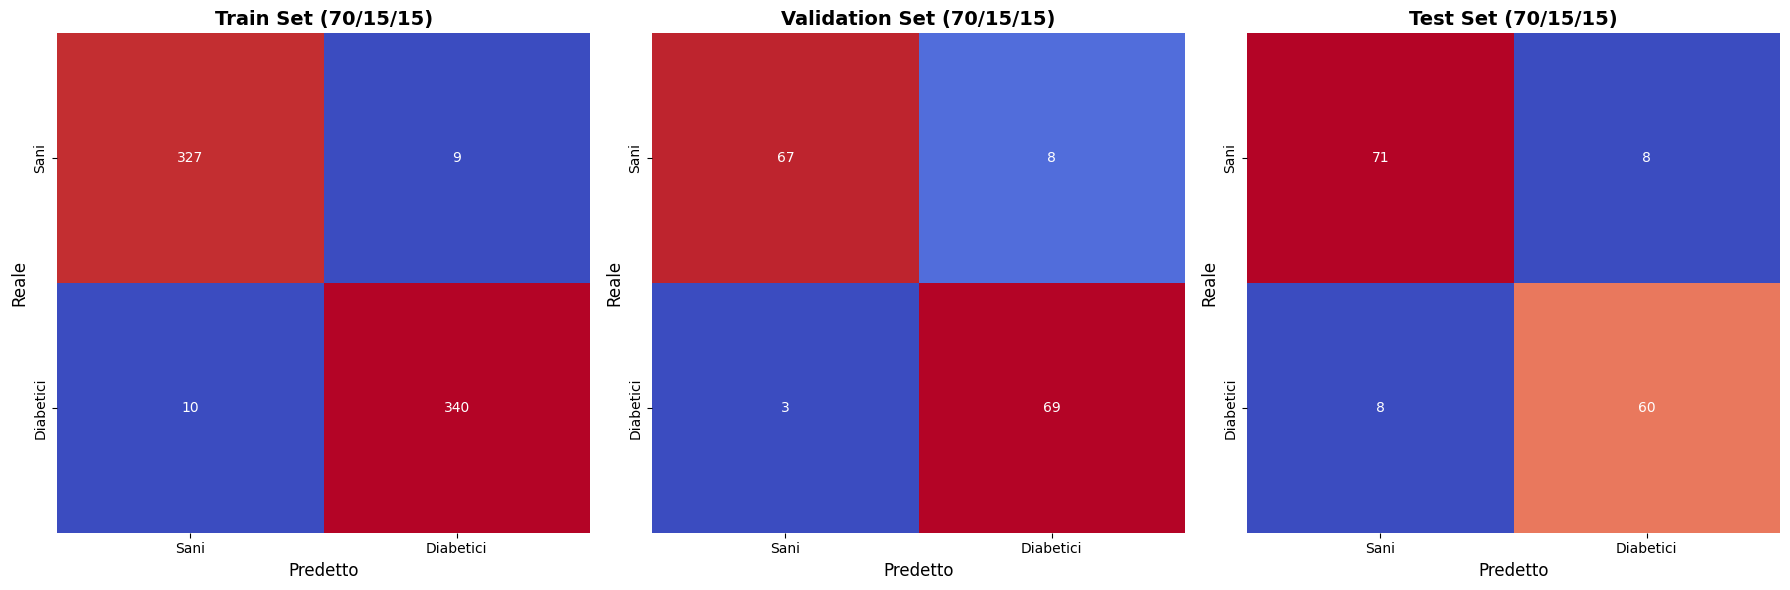

In [49]:
# Definizione delle etichette delle classi
class_labels = ["Sani", "Diabetici"]

# Creazione della figura per le confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Solo 3 grafici ora

# Titoli per i grafici (solo 70/15/15)
titles = [
    "Train Set (70/15/15)", "Validation Set (70/15/15)", "Test Set (70/15/15)"
]

# Liste delle confusion matrix per ogni set di dati con Random Forest (solo 70/15/15)
cm_rf_data = [
    confusion_matrix(y_train, y_pred_train_rf),
    confusion_matrix(y_val, y_pred_val_rf),
    confusion_matrix(y_test, y_pred_test_rf)
]

# Loop per creare ogni subplot con la rispettiva matrice di confusione
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_rf_data[i], annot=True, fmt='d', cmap='coolwarm', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

# Miglioramento della disposizione dei grafici
plt.tight_layout()
plt.show()


Conclusioni:
  - Il modello Random Forest ha ottime prestazioni in tutti i set di dati, con una bassa incidenza di errori e una buona capacità di generalizzazione, mostrando risultati coerenti su training, validation e test. Non ci sono evidenti segnali di overfitting, con performance solide anche sui dati non visti.

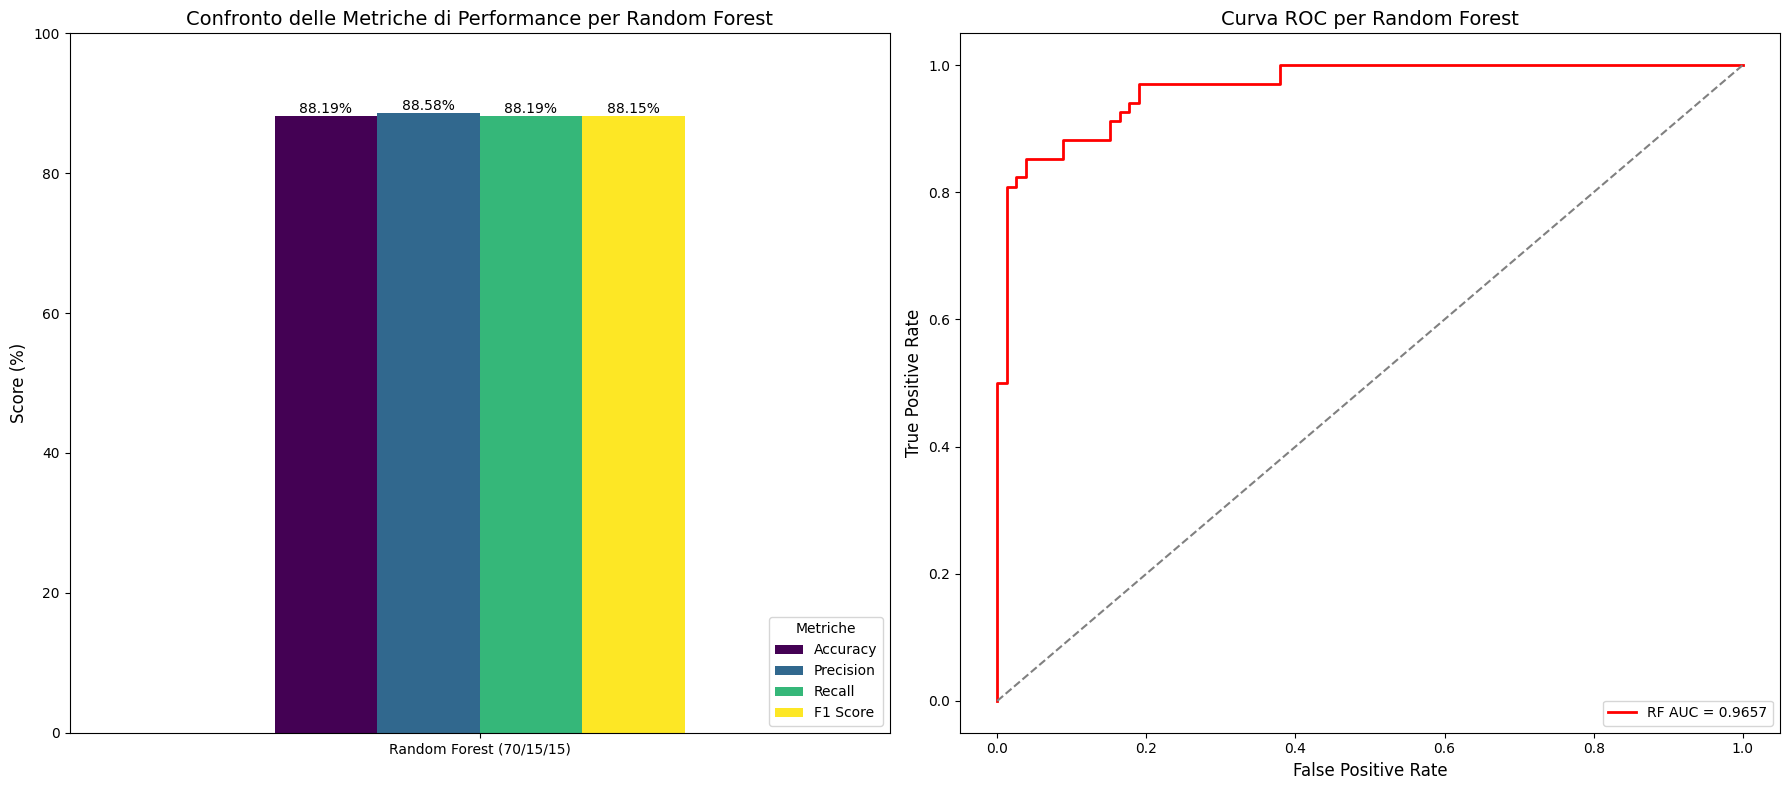

In [50]:
# Risultati della Cross-Validation per Random Forest (solo per 70/15/15)
accuracy_rf = round(np.mean(cv_scores_rf_70['accuracy']), 6)
precision_rf = round(np.mean(cv_scores_rf_70['precision']), 6)
recall_rf = round(np.mean(cv_scores_rf_70['recall']), 6)
f1_rf = round(np.mean(cv_scores_rf_70['f1-score']), 6)

# DataFrame con le Metriche di Performance per Random Forest (solo per 70/15/15)
performance_rf_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest (70/15/15)': [accuracy_rf * 100, precision_rf * 100, recall_rf * 100, f1_rf * 100]
}).set_index('Metric').T

# Curva ROC per Random Forest (solo per 70/15/15)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])  # ROC per Random Forest (70/15/15)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Creazione della figura
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### Grafico delle metriche di performance per Random Forest
performance_rf_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per Random Forest", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### Grafico della Curva ROC per Random Forest
axes[1].plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'RF AUC = {roc_auc_rf:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per Random Forest", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

# Miglioramento del layout
plt.tight_layout()
plt.show()


Conclusioni:
- Il modello ha ottenuto prestazioni molto elevate in tutte le metriche, con valori di accuracy, precision, recall, e F1 score attorno all'88%. Questo indica che il modello è equilibrato e riesce a classificare correttamente sia le classi "Sani" che "Diabetici", con prestazioni molto simili su tutte le metriche, suggerendo una buona generalizzazione.
- La curva ROC (Receiver Operating Characteristic) mostra un comportamento eccellente con un AUC di 0.9657, che indica una ottima capacità del modello di discriminare tra le classi. Un AUC vicino a 1 suggerisce che il modello è in grado di classificare correttamente le istanze in modo affidabile.

##### **Support Vector Machine Classifier**

Il Support Vector Machine (SVM) è un modello di machine learning **supervisionato** utilizzato per la classificazione dei dati. Si basa sul concetto di **iperpiano ottimale**, che **separa le classi massimizzando il margine tra i punti dati più vicini** (support vectors).

L'SVM può essere utilizzato con diverse **funzioni di kernel** per adattarsi a distribuzioni di **dati non lineari**:

- Linear Kernel: utile per dati separabili linearmente.

- Polynomial Kernel: applica una trasformazione polinomiale ai dati.

- RBF (Radial Basis Function) Kernel: il più comune, adatto a problemi complessi con separabilità non lineare.

- Sigmoid Kernel: utilizzato in scenari specifici, come il riconoscimento di pattern.

L'SVM è particolarmente efficace nei problemi di **classificazione binaria** ed è noto per la sua **robustezza rispetto agli outlier** e alla **capacità di generalizzazione**.

###### **Addestramento dei modelli**


Per ottenere i risultati migliori, abbiamo ottimizzato il modello impostando i seguenti iperparametri:

- `C` (parametro di regolarizzazione, controlla quanto il modello penalizza gli errori)
- `kernel` (tipo di kernel da utilizzare per il calcolo del margine)
- `gamma` (parametro che determina la forma della funzione del kernel, come la "larghezza" del margine)
- `probability` (abilita la probabilità per la curva ROC)

Da notare che il modello SVM con **kernel RBF** è stato scelto perché offre una buona capacità di generalizzazione anche in scenari con dati non linearmente separabili.

In [51]:
# Addestramento del modello sul training set (70/15/15)
svm_model = SVC(
    kernel='rbf',                       # Kernel Radial Basis Function (RBF)
    C=1.4391207615728072,               # Parametro di regolarizzazione
    gamma='scale',                      # Parametro gamma per il kernel
    probability=True,                   # Permette di ottenere probabilità per la curva ROC
    random_state=42
)

svm_model.fit(X_train, y_train)

SVC(C=1.4391207615728072, probability=True, random_state=42)

Questa parte di codice esegue un'ottimizzazione dei parametri del modello SVC utilizzando RandomizedSearchCV, che esplora combinazioni casuali di parametri, tra cui:
  - `svm_model` (il modello da ottimizzare).
  - `n_iter=50` (il numero di combinazioni casuali da testare).
  - `scoring='accuracy'` (la metrica di valutazione, che puoi cambiare in precision, recall, ecc.).
  - `cv=10` (la validazione incrociata a 10 fold).

In [52]:
# Parametri da esplorare
param_dist = {
    'C': loguniform(1e-6, 1e3),
    'gamma': ['scale'],
    'kernel': ['rbf'],
}

# Esegui RandomizedSearchCV con i parametri definiti
random_search_svm = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=50,    # Numero di iterazioni
    cv=10,        # 10-fold cross-validation
    n_jobs=-1,    # Usa tutti i core
    verbose=2,    # Mostra il progresso
    random_state=42,
    scoring='accuracy'
)

# Esegui la ricerca
random_search_svm.fit(X_train, y_train)

# Risultati migliori
print("Migliori parametri trovati:", random_search_svm.best_params_)

# Accedi al miglior modello
best_model_svm = random_search_svm.best_estimator_

# Valutazione finale sul test set
score_svm = best_model_svm.score(X_test, y_test)
print(f"Accuratezza del miglior modello (random search): {score_svm}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Migliori parametri trovati: {'C': 1.4391207615728072, 'gamma': 'scale', 'kernel': 'rbf'}
Accuratezza del miglior modello (random search): 0.8843537414965986


###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento.

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [53]:
# Creazione della cross-validation con StratifiedKFold (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation su training set (70/15/15)
cv_scores_svm_70 = my_cross_validation(svm_model, X_train, y_train, cv=kfold)

# Creazione di un DataFrame per mostrare i risultati della cross-validation
cv_summary_svm_df = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (70/15/15)': [round(np.mean(cv_scores_svm_70['accuracy']), 6),
                         round(np.mean(cv_scores_svm_70['precision']), 6),
                         round(np.mean(cv_scores_svm_70['recall']), 6),
                         round(np.mean(cv_scores_svm_70['f1-score']), 6)],
    '95% CI (70/15/15)': [confidence_interval(cv_scores_svm_70['accuracy']),
                           confidence_interval(cv_scores_svm_70['precision']),
                           confidence_interval(cv_scores_svm_70['recall']),
                           confidence_interval(cv_scores_svm_70['f1-score'])],
})

cv_summary_svm_df.set_index('Metrica', inplace=True)
cv_summary_svm_df.index.name = None
cv_summary_svm_df

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni fold, con media pari a 0.84398977 ---

[0.89855072 0.82608696 0.86956522 0.84057971 0.88405797 0.76811594
 0.85294118 0.85294118 0.86764706 0.77941176]

Intervallo di confidenza 95%: (0.813625, 0.874354)

--- Precision di ogni fold, con media pari a 0.84734043 ---

[0.8989899  0.83577586 0.87204392 0.8407563  0.88974359 0.76900338
 0.85853227 0.85367965 0.86979167 0.78508772]

Intervallo di confidenza 95%: (0.81724, 0.877441)

--- Recall di ogni fold, con media pari a 0.84423733 ---

[0.89831933 0.82731092 0.87016807 0.8407563  0.88319328 0.76764706
 0.85108225 0.85367965 0.86883117 0.78138528]

Intervallo di confidenza 95%: (0.814103, 0.874372)

--- F1-score di ogni fold, con media pari a 0.84361208 ---

[0.89846542 0.82516892 0.86945554 0.84057971 0.88344595 0.76767677
 0.85178727 0.85294118 0.86761843 0.77898158]

Intervallo di confidenza 95%: (0.813181, 0.874043)



Media (70/15/15)     95% CI (70/15/15)
Accuracy           0.843990  (0.813625, 0.874354)
Precision          0.847340   (0.81724, 0.877441)
Recall             0.844237  (0.814103, 0.874372)
F1 Score           0.843612  (0.813181, 0.874043)

Conclusioni:
  - Le metriche di accuracy (84.40%), precision (84.73%), recall (84.42%), e F1 score (84.36%) sono tutte molto alte, indicando che il modello è in grado di fare previsioni accurate, sia per la classe "Sani" che per la classe "Diabetici".
  - L'intervallo di confidenza (CI) per ciascuna metrica è relativamente stretto, il che suggerisce che il modello ha prestazioni stabili attraverso i vari fold di validazione.
  - Le metriche di precision e recall sono molto simili, il che indica un buon equilibrio tra l'identificazione corretta delle classi e la riduzione dei falsi positivi e negativi. L'F1 score, che bilancia precisione e recall, è anch'esso molto alto, suggerendo che il modello è ben bilanciato e non favorisce una classe rispetto all'altra.
  - La performance di accuracy e F1 score che supera l'84% suggerisce che il modello è in grado di generalizzare bene sui dati di test non visti, il che è un segno positivo in termini di prevenzione dell'overfitting.

###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello SVM sui set di training, validation e test.

Per il miglior controllo di overfitting, si calcola **la differenza tra Training e Test** per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.

In [54]:
# Predizioni sui diversi set per verificare l'overfitting con SVM (solo 70/15/15)
y_pred_train_svm = svm_model.predict(X_train)
y_pred_val_svm = svm_model.predict(X_val)
y_pred_test_svm = svm_model.predict(X_test)

# Creazione del DataFrame con le metriche per visualizzare l'overfitting (solo per 70/15/15)
performance_svm_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy (70/15/15)': [accuracy_score(y_train, y_pred_train_svm), accuracy_score(y_val, y_pred_val_svm), accuracy_score(y_test, y_pred_test_svm)],
    'Precision (70/15/15)': [precision_score(y_train, y_pred_train_svm, average='macro'), precision_score(y_val, y_pred_val_svm, average='macro'), precision_score(y_test, y_pred_test_svm, average='macro')],
    'Recall (70/15/15)': [recall_score(y_train, y_pred_train_svm, average='macro'), recall_score(y_val, y_pred_val_svm, average='macro'), recall_score(y_test, y_pred_test_svm, average='macro')],
    'F1 Score (70/15/15)': [f1_score(y_train, y_pred_train_svm, average='macro'), f1_score(y_val, y_pred_val_svm, average='macro'), f1_score(y_test, y_pred_test_svm, average='macro')]
})

# Calcolo della differenza tra Train e Test per ogni metrica
performance_svm_df["Accuracy Gap (Train - Test)"] = performance_svm_df["Accuracy (70/15/15)"][0] - performance_svm_df["Accuracy (70/15/15)"][2]
performance_svm_df["F1 Score Gap (Train - Test)"] = performance_svm_df["F1 Score (70/15/15)"][0] - performance_svm_df["F1 Score (70/15/15)"][2]

# Mostra le performance e l'overfitting
print("SVM Performance Overfitting Check with Gaps")
performance_svm_df.set_index('Set', inplace=True)
performance_svm_df.index.name = None
performance_svm_df


SVM Performance Overfitting Check with Gaps


Accuracy (70/15/15)  Precision (70/15/15)  Recall (70/15/15)  \
Train                  0.902332              0.903687           0.902976   
Validation             0.918367              0.919199           0.918889   
Test                   0.884354              0.884049           0.883191   

            F1 Score (70/15/15)  Accuracy Gap (Train - Test)  \
Train                  0.902316                     0.017979   
Validation             0.918364                     0.017979   
Test                   0.883578                     0.017979   

            F1 Score Gap (Train - Test)  
Train                          0.018738  
Validation                     0.018738  
Test                           0.018738

Conclusioni:
  - L'accuratezza e le altre metriche di performance (precisione, recall e F1 score) sui set di training e validation sono molto elevate, con valori superiori all'90%.
  - La precisione e recall sono anche molto simili sui set di training e validazione, indicando che il modello sta classificando correttamente entrambe le classi senza favorire una rispetto all'altra.
  - Il gap tra il set di training e il test (circa 1.7% per l'accuratezza e l'F1 score) è relativamente piccolo, il che suggerisce che il modello **non sta soffrendo di overfitting**.
  - Un gap simile tra training e validation implica che il modello **è in grado di generalizzare bene** anche sui dati di validation, senza sovradimensionare troppo i dati di training.

###### **Matrici di correlazione e grafici**

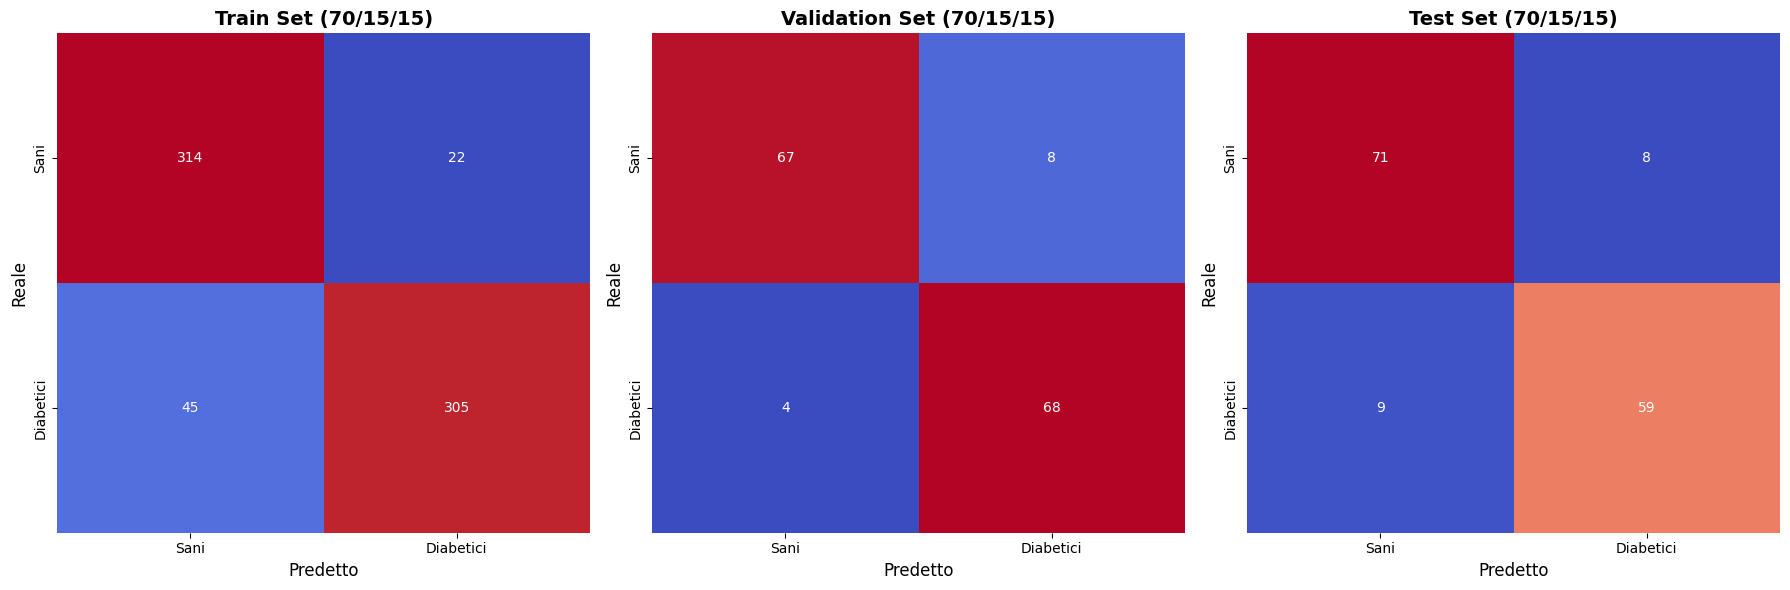

In [55]:
# Definizione delle etichette delle classi
class_labels = ["Sani", "Diabetici"]

# Creazione della figura per le confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Titoli per i grafici
titles = [
    "Train Set (70/15/15)", "Validation Set (70/15/15)", "Test Set (70/15/15)"
]

# Liste delle confusion matrix per ogni set di dati con SVM (solo 70/15/15)
cm_svm_data = [
    confusion_matrix(y_train, y_pred_train_svm),
    confusion_matrix(y_val, y_pred_val_svm),
    confusion_matrix(y_test, y_pred_test_svm)
]

# Loop per creare ogni subplot con la rispettiva matrice di confusione
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_svm_data[i], annot=True, fmt='d', cmap='coolwarm', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

# Miglioramento della disposizione dei grafici
plt.tight_layout()
plt.show()


Conclusioni:
  - Sebbene il modello continui a performare bene sui dati di test, c'è una leggera diminuzione nei falsi negativi (71 per "Sani") e nei falsi positivi (59 per "Diabetici"). Questo è un comportamento comune in qualsiasi modello che si applica a nuovi dati, ma le metriche rimangono elevate, indicanti una buona capacità di generalizzazione.

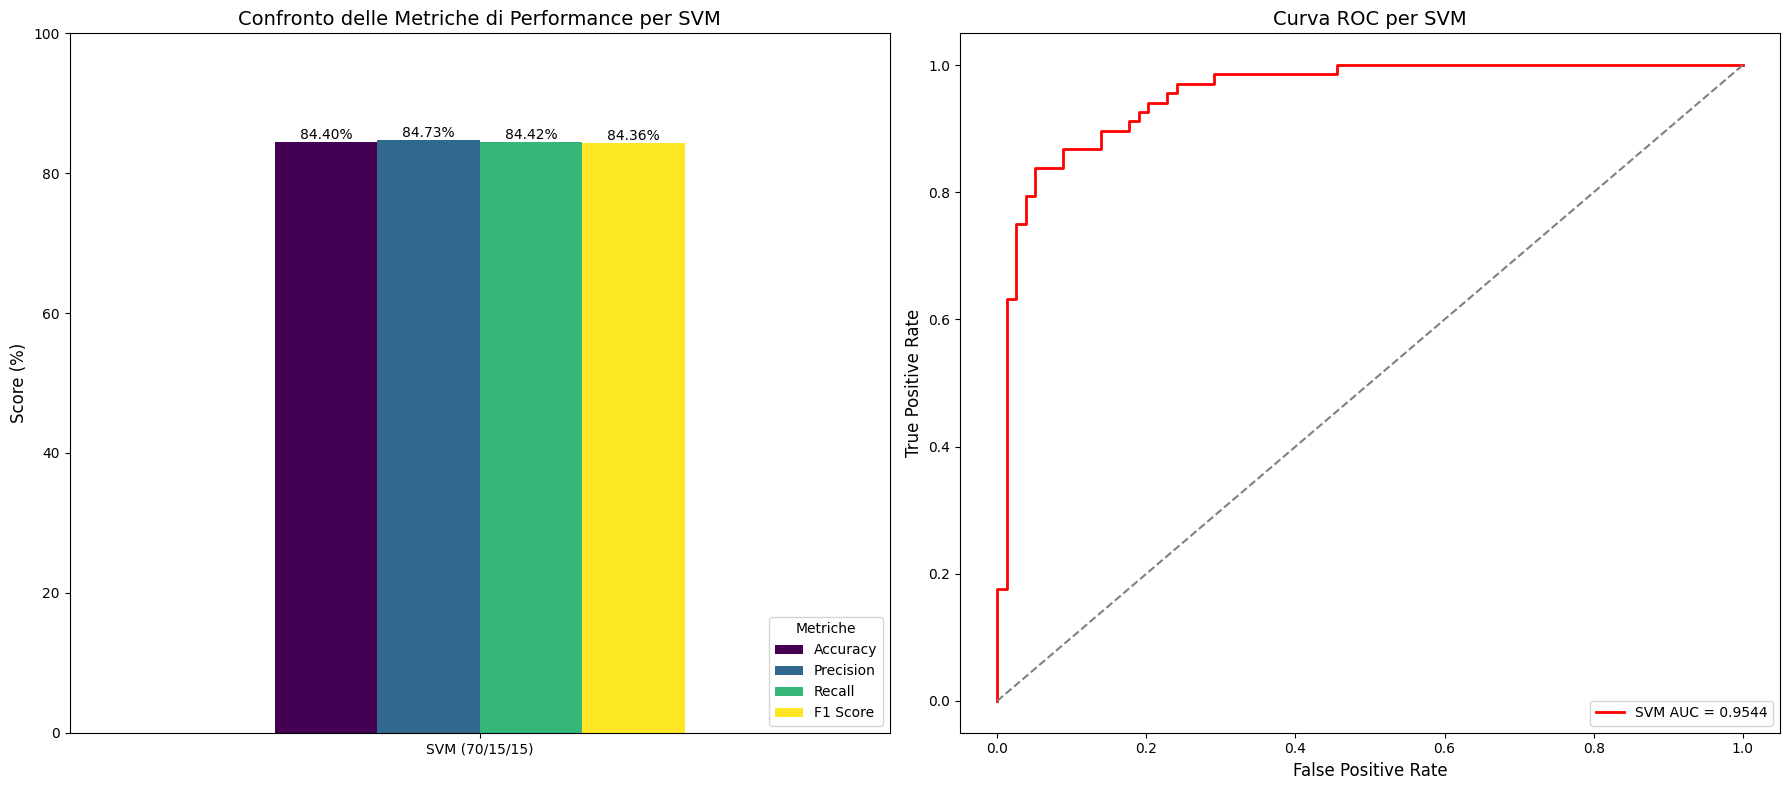

In [56]:
# Risultati della Cross-Validation per SVM (solo 70/15/15)
accuracy_svm = round(np.mean(cv_scores_svm_70['accuracy']), 6)
precision_svm = round(np.mean(cv_scores_svm_70['precision']), 6)
recall_svm = round(np.mean(cv_scores_svm_70['recall']), 6)
f1_svm = round(np.mean(cv_scores_svm_70['f1-score']), 6)

# DataFrame con le Metriche di Performance per SVM (solo 70/15/15)
performance_svm_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'SVM (70/15/15)': [accuracy_svm * 100, precision_svm * 100, recall_svm * 100, f1_svm * 100]
}).set_index('Metric').T

# Curva ROC per SVM (70/15/15)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))  # ROC per SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Creazione della figura
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### Grafico delle metriche di performance per SVM
performance_svm_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per SVM", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### Grafico della Curva ROC per SVM
axes[1].plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM AUC = {roc_auc_svm:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per SVM", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

# Miglioramento del layout
plt.tight_layout()
plt.show()


Conclusioni:
  - La curva ROC mostra un buon tasso di True Positive Rate (TPR) rispetto al False Positive Rate (FPR), con un AUC di 0.9544, che conferma la buona capacità discriminante del modello.
  - Il modello sembra generalizzare bene, con un'elevata performance che non è solo limitata ai dati di training ma si riflette anche su test set.

##### **Reti Neurali Classifier**

Le Reti Neurali Classifier sono **modelli di machine learning** ispirati al funzionamento del cervello umano, composti da **strati di nodi** (o "neuroni") **interconnessi**. Ogni nodo elabora i dati in ingresso, li trasforma attraverso funzioni di attivazione non lineari e li passa ai nodi successivi, creando **una rete di trasformazioni** che permette al modello di apprendere pattern complessi nei dati.

###### **Addestramento dei modelli**


Il modello di rete neurale Multi-Layer Perceptron (MLP) è un tipo di rete neurale profonda che consiste in più strati di nodi (o neuroni) interconnessi. Per ottimizzare le prestazioni di questo modello sui nostri dataset, abbiamo scelto i seguenti iperparametri:

- `hidden_layer_sizes`: definisce la struttura della rete, cioè il numero e la dimensione degli strati nascosti. In questo caso, la rete ha tre strati con 100, 100 e 50 neuroni rispettivamente.

- `alpha`: parametro di regolarizzazione L2, che aiuta a prevenire l'overfitting. Maggiore è il valore di alpha, maggiore è la regolarizzazione.

- `batch_size`: determina la dimensione del batch per l'aggiornamento dei pesi durante l'addestramento. In questo caso, è impostato a 64.

- `early_stopping`: se attivato, interrompe l'addestramento se non si osservano miglioramenti nelle performance del modello per un numero definito di iterazioni, evitando il sovra-addestramento.

- `n_iter_no_change`: specifica il numero di iterazioni senza miglioramento durante le quali l'addestramento continuerà prima di fermarsi.

- `learning_rate`: metodo di adattamento del tasso di apprendimento durante l'addestramento. Con adaptive, il tasso di apprendimento si adatta automaticamente.

- `learning_rate_init`: definisce il valore iniziale del tasso di apprendimento, che in questo caso è 0.0057.

- `activation`: funzione di attivazione usata per i neuroni, in questo caso relu (Rectified Linear Unit), che aiuta nella non linearità del modello.

- `solver`: metodo utilizzato per ottimizzare i pesi durante l'addestramento. Il solver sgd (Stochastic Gradient Descent) è scelto per il suo equilibrio tra prestazioni e velocità di addestramento.

- `shuffle`: se abilitato, mescola i dati prima di ogni epoca per garantire un addestramento più robusto.

- `max_iter`: il numero massimo di iterazioni per il processo di addestramento, impostato a 2000 per migliorare la convergenza del modello.

- `momentum`: parametro che aiuta a velocizzare la discesa del gradiente, evitando i minimi locali. Il valore scelto è 0.91.

- `nesterovs_momentum`: se disabilitato, non utilizza il momentum di Nesterov.

- `tol`: tolleranza per la convergenza. Se la variazione del loss è inferiore a questo valore, l'addestramento si ferma.

- `validation_fraction`: percentuale dei dati di addestramento utilizzata per la validazione, impostata a circa il 14.83% per monitorare il processo di apprendimento.

Questi parametri sono stati scelti per bilanciare la capacità del modello di imparare dai dati e la prevenzione dell'overfitting, migliorando le prestazioni generali e la capacità di generalizzazione su dati non visti.

In [57]:
# Creazione del modello di rete neurale (MLP) con la configurazione dei parametri personalizzati
mlp_model = MLPClassifier(
    random_state=42,
    hidden_layer_sizes=(100, 100, 50),
    alpha=0.06247746602583892,
    batch_size=64,
    early_stopping=True,
    n_iter_no_change=15,  # Numero di iterazioni senza miglioramenti per fermarsi
    learning_rate='adaptive',
    learning_rate_init=0.005666566321361543,
    activation='relu',
    solver='sgd',
    shuffle=True,
    max_iter=2000,  # Aumentato max_iter per migliorare la convergenza
    momentum=0.9104629857953324,
    nesterovs_momentum=False,
    tol=0.0003924619912671628,
    validation_fraction=0.14832308858067883
)
mlp_model.fit(X_train, y_train)

# Creazione del modello di rete neurale (MLP) con la configurazione dei parametri suggeriti da RandomizedSearchCV
mlp_model2 = MLPClassifier(
    random_state=42,
    hidden_layer_sizes=(200, 100),  # Nuova configurazione per i layer nascosti
    alpha=0.0330893825622149,  # Nuovo valore per alpha
    batch_size=64,  # Nuovo valore per batch_size
    early_stopping=True,  # Rimane True
    n_iter_no_change=15,  # Nuovo numero di iterazioni senza miglioramenti
    learning_rate_init=0.013203823484477885,  # Nuovo valore per learning_rate_init
    activation='relu',  # Nuova funzione di attivazione
    solver='lbfgs',  # Nuovo solver
    shuffle=True,  # Rimane True
    max_iter=1000,  # Nuovo numero massimo di iterazioni
    momentum=0.8331949117361643,  # Nuovo valore per momentum
    nesterovs_momentum=False,  # Rimane False
    tol=0.00026877998160001695,  # Nuovo valore per tol
    validation_fraction=0.1162522284353982  # Nuovo valore per validation_fraction
)

# Addestra il modello con i nuovi parametri
mlp_model2.fit(X_train, y_train)



MLPClassifier(alpha=0.0330893825622149, batch_size=64, early_stopping=True,
              hidden_layer_sizes=(200, 100),
              learning_rate_init=0.013203823484477885, max_iter=1000,
              momentum=0.8331949117361643, n_iter_no_change=15,
              nesterovs_momentum=False, random_state=42, solver='lbfgs',
              tol=0.00026877998160001695,
              validation_fraction=0.1162522284353982)

Anche se **RandomizedSearchCV** ha suggerito alcune configurazioni di parametri per il modello, abbiamo deciso di apportare alcune modifiche al fine di migliorare ulteriormente le prestazioni. I risultati ottenuti con le nuove configurazioni sono stati migliori in termini di accuracy, precision, recall e F1 score.

Di seguito sono riportate le principali differenze tra la configurazione suggerita da RandomizedSearchCV e quella personalizzata:

- alpha:
  - RandomizedSearchCV ha suggerito un valore di alpha=0.0331, mentre abbiamo deciso di utilizzare un valore alpha=0.0624, riducendo così la regolarizzazione. Questo ha aiutato a ottenere una migliore adattabilità del modello senza compromettere la generalizzazione.

- batch_size:
  - RandomizedSearchCV suggeriva un batch_size=64 per migliorare la stabilità durante l'allenamento, riducendo il rumore nelle stime del gradiente. Abbiamo approvato.
  
- n_iter_no_change:
  - RandomizedSearchCV suggeriva n_iter_no_change=15. Questo ha permesso al modello di continuare l'allenamento per un numero maggiore di epoche senza fermarsi troppo presto. Abbiamo approvato.

- learning_rate_init:
  - RandomizedSearchCV suggeriva il valore di learning_rate_init=0.0132, ma abbiamo deciso di ridurlo a 0.0057 per evitare aggiornamenti troppo rapidi dei pesi e migliorare la stabilità del modello.

- Funzione di attivazione:
  - RandomizedSearchCV suggeriva activation='relu', che è generalmente più efficace per reti neurali profonde e ha contribuito a migliorare le prestazioni sui dati di test. Abbiamo approvato.

- Solver:
  - RandomizedSearchCV suggeriva l'uso di solver='lbfgs', ma abbiamo deciso di utilizzare solver='sgd', che permette l'uso di momentum e può accelerare la convergenza in contesti di ottimizzazione su grandi set di dati.

- Parametro momentum:
  - RandomizedSearchCV suggeriva il valore di momentum=0.8332, ma l'abbiamo messo a 0.91 per evitare oscillazioni troppo ampie durante l'allenamento e ottenere una convergenza più stabile.

- Numero massimo di iterazioni:
  - RandomizedSearchCV suggeriva max_iter=1000, ma abbiamo aumentato questo valore a 2000 per dare al modello più tempo per convergere, evitando che si interrompesse prematuramente.

- hidden_layer_sizes:
  -  Questo parametro determina la struttura della rete neurale, cioè il numero e la dimensione dei layer nascosti. Il mostro modello ha più strati nascosti (3 contro 2) e uno strato più piccolo rispetto al modello suggerito da RandomizedSearchCV.

In [58]:
param_dist = {
    'hidden_layer_sizes': [(300, 150, 50), (100, 100, 50), (500, 250, 100), (200, 100)],  # Possibili configurazioni di layer nascosti
    'alpha': uniform(0.01, 0.1),  # Regolarizzazione con distribuzione continua
    'learning_rate_init': uniform(0.001, 0.1),  # Tasso di apprendimento iniziale
    'max_iter': [1000, 1500, 2000],  # Numero di iterazioni massime
    'activation': ['relu', 'tanh', 'logistic'],  # Funzione di attivazione nei layer nascosti
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers da testare
    'batch_size': ['auto', 32, 64],  # Dimensioni del batch da testare
    'momentum': uniform(0.0, 1.0),  # Corretta la distribuzione del momentum
    'nesterovs_momentum': [True, False],  # Usa momentum di Nesterov per 'sgd'
    'tol': uniform(1e-5, 1e-3),  # Tolleranza per fermarsi
    'early_stopping': [True],  # Puoi confermare l'uso di early stopping
    'n_iter_no_change': [5, 10, 15],  # Numero di epoche senza miglioramenti prima di fermarsi
    'validation_fraction': uniform(0.05, 0.1)  # Percentuale di dati per la validazione
}

# Crea il RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=mlp_model2, param_distributions=param_dist, n_iter=10, cv=10, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Esegui la ricerca casuale sugli iperparametri
random_search.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print("Migliori parametri trovati:", random_search.best_params_)

# Accedi al miglior modello
best_model_random = random_search.best_estimator_

# Valutazione finale
score_random = best_model_random.score(X_test, y_test)
print(f"Accuratezza del miglior modello (random search): {score_random}")


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Migliori parametri trovati: {'activation': 'relu', 'alpha': 0.0330893825622149, 'batch_size': 64, 'early_stopping': True, 'hidden_layer_sizes': (200, 100), 'learning_rate_init': 0.013203823484477885, 'max_iter': 1000, 'momentum': 0.8331949117361643, 'n_iter_no_change': 15, 'nesterovs_momentum': False, 'solver': 'lbfgs', 'tol': 0.00026877998160001695, 'validation_fraction': 0.1162522284353982}
Accuratezza del miglior modello (random search): 0.8639455782312925


###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento.

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [59]:
# Creazione della cross-validation con StratifiedKFold (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation su training set (70/15/15)
cv_scores_70 = my_cross_validation(mlp_model, X_train, y_train, cv=kfold)

# Esecuzione della cross-validation su training set (80/10/10)
cv_scores_80 = my_cross_validation(mlp_model2, X_train, y_train, cv=kfold)

# Creazione di un DataFrame per mostrare i risultati della cross-validation
cv_summary_df = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (70/15/15)': [round(np.mean(cv_scores_70['accuracy']), 6),
                         round(np.mean(cv_scores_70['precision']), 6),
                         round(np.mean(cv_scores_70['recall']), 6),
                         round(np.mean(cv_scores_70['f1-score']), 6)],
    '95% CI (70/15/15)': [confidence_interval(cv_scores_70['accuracy']),
                           confidence_interval(cv_scores_70['precision']),
                           confidence_interval(cv_scores_70['recall']),
                           confidence_interval(cv_scores_70['f1-score'])],
    'Media (70/15/15) 2': [round(np.mean(cv_scores_80['accuracy']), 6),
                         round(np.mean(cv_scores_80['precision']), 6),
                         round(np.mean(cv_scores_80['recall']), 6),
                         round(np.mean(cv_scores_80['f1-score']), 6)],
    '95% CI (70/15/15) 2': [confidence_interval(cv_scores_80['accuracy']),
                           confidence_interval(cv_scores_80['precision']),
                           confidence_interval(cv_scores_80['recall']),
                           confidence_interval(cv_scores_80['f1-score'])],
})

# Impostare l'indice come 'Metrica' e rimuovere il nome dell'indice
cv_summary_df.set_index('Metrica', inplace=True)
cv_summary_df.index.name = None
cv_summary_df

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni fold, con media pari a 0.84104859 ---

[0.88405797 0.84057971 0.85507246 0.88405797 0.8115942  0.8115942
 0.83823529 0.83823529 0.82352941 0.82352941]

Intervallo di confidenza 95%: (0.82218, 0.859917)

--- Precision di ogni fold, con media pari a 0.84449111 ---

[0.88510101 0.84290541 0.85950764 0.89525862 0.81176471 0.81409168
 0.84642857 0.83823529 0.82737576 0.82424242]

Intervallo di confidenza 95%: (0.824264, 0.864718)

--- Recall di ogni fold, con media pari a 0.84133053 ---

[0.88445378 0.84117647 0.85588235 0.88529412 0.81176471 0.81092437
 0.83593074 0.83852814 0.82510823 0.82424242]

Intervallo di confidenza 95%: (0.822262, 0.860399)

--- F1-score di ogni fold, con media pari a 0.84068854 ---

[0.88403361 0.84044566 0.85479798 0.88344595 0.8115942  0.8109589
 0.83650273 0.8382003  0.82337662 0.82352941]

Intervallo di confidenza 95%: (0.821831, 0.859546)

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni f

Media (70/15/15)     95% CI (70/15/15)  Media (70/15/15) 2  \
Accuracy           0.841049   (0.82218, 0.859917)            0.886275   
Precision          0.844491  (0.824264, 0.864718)            0.890330   
Recall             0.841331  (0.822262, 0.860399)            0.885708   
F1 Score           0.840689  (0.821831, 0.859546)            0.885804   

            95% CI (70/15/15) 2  
Accuracy   (0.869261, 0.903288)  
Precision  (0.873383, 0.907276)  
Recall      (0.86855, 0.902866)  
F1 Score   (0.868614, 0.902995)

Conclusioni:
  - Il modello ottimizzato da RandomizedSearchCV supera il modello personalizzato in tutte le metriche principali, con un miglioramento significativo in termini di accuratezza, precisione, recall e F1 score. Questi risultati suggeriscono che la configurazione ottimizzata offre una performance superiore, probabilmente grazie alla scelta dei parametri più adatti per il problema specifico.

###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Reti Neurali sui set di training, validation e test, per due diverse suddivisioni dei dati.

Per il miglior controllo di overfitting, si calcola la differenza tra Training e Test per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.

In [60]:
# Predizioni sui diversi set per verificare l'overfitting con MLPClassifier
y_pred_train_mlp = mlp_model.predict(X_train)
y_pred_val_mlp = mlp_model.predict(X_val)
y_pred_test_mlp = mlp_model.predict(X_test)

y_pred_train_mlp2 = mlp_model2.predict(X_train)
y_pred_val_mlp2 = mlp_model2.predict(X_val)
y_pred_test_mlp2 = mlp_model2.predict(X_test)


# Creazione del DataFrame con le metriche per visualizzare l'overfitting
performance_mlp_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy (70/15/15)': [accuracy_score(y_train, y_pred_train_mlp), accuracy_score(y_val, y_pred_val_mlp), accuracy_score(y_test, y_pred_test_mlp)],
    'Precision (70/15/15)': [precision_score(y_train, y_pred_train_mlp, average='macro'), precision_score(y_val, y_pred_val_mlp, average='macro'), precision_score(y_test, y_pred_test_mlp, average='macro')],
    'Recall (70/15/15)': [recall_score(y_train, y_pred_train_mlp, average='macro'), recall_score(y_val, y_pred_val_mlp, average='macro'), recall_score(y_test, y_pred_test_mlp, average='macro')],
    'F1 Score (70/15/15)': [f1_score(y_train, y_pred_train_mlp, average='macro'), f1_score(y_val, y_pred_val_mlp, average='macro'), f1_score(y_test, y_pred_test_mlp, average='macro')],
    'Accuracy (70/15/15) 2': [accuracy_score(y_train, y_pred_train_mlp2), accuracy_score(y_val, y_pred_val_mlp2), accuracy_score(y_test, y_pred_test_mlp2)],
    'Precision (70/15/15) 2': [precision_score(y_train, y_pred_train_mlp2, average='macro'), precision_score(y_val, y_pred_val_mlp2, average='macro'), precision_score(y_test, y_pred_test_mlp2, average='macro')],
    'Recall (70/15/15) 2': [recall_score(y_train, y_pred_train_mlp2, average='macro'), recall_score(y_val, y_pred_val_mlp2, average='macro'), recall_score(y_test, y_pred_test_mlp2, average='macro')],
    'F1 Score (70/15/15) 2': [f1_score(y_train, y_pred_train_mlp2, average='macro'), f1_score(y_val, y_pred_val_mlp2, average='macro'), f1_score(y_test, y_pred_test_mlp2, average='macro')]
})

# Calcolo della differenza tra Train e Test per ogni metrica
performance_mlp_df["Accuracy Gap (Train - Test)"] = performance_mlp_df["Accuracy (70/15/15)"][0] - performance_mlp_df["Accuracy (70/15/15)"][2]
performance_mlp_df["F1 Score Gap (Train - Test)"] = performance_mlp_df["F1 Score (70/15/15)"][0] - performance_mlp_df["F1 Score (70/15/15)"][2]
# Calcolo della differenza tra Train e Test per ogni metrica
performance_mlp_df["Accuracy Gap (Train - Test) 2"] = performance_mlp_df["Accuracy (70/15/15) 2"][0] - performance_mlp_df["Accuracy (70/15/15) 2"][2]
performance_mlp_df["F1 Score Gap (Train - Test) 2"] = performance_mlp_df["F1 Score (70/15/15) 2"][0] - performance_mlp_df["F1 Score (70/15/15) 2"][2]

# Visualizza le performance e l'overfitting
print("MLP Classifier Performance Overfitting Check with Gaps")
performance_mlp_df.set_index('Set', inplace=True)
performance_mlp_df.index.name = None
performance_mlp_df


MLP Classifier Performance Overfitting Check with Gaps


Accuracy (70/15/15)  Precision (70/15/15)  Recall (70/15/15)  \
Train                  0.919825              0.919884           0.919702   
Validation             0.931973              0.932821           0.932500   
Test                   0.904762              0.903896           0.905249   

            F1 Score (70/15/15)  Accuracy (70/15/15) 2  \
Train                  0.919776               1.000000   
Validation             0.931970               0.891156   
Test                   0.904404               0.863946   

            Precision (70/15/15) 2  Recall (70/15/15) 2  \
Train                     1.000000             1.000000   
Validation                0.895149             0.892222   
Test                      0.863333             0.865227   

            F1 Score (70/15/15) 2  Accuracy Gap (Train - Test)  \
Train                    1.000000                     0.015063   
Validation               0.891030                     0.015063   
Test                     0.863636                     0.015063   

            F1 Score Gap (Train - Test)  Accuracy Gap (Train - Test) 2  \
Train                          0.015372                       0.136054   
Validation                     0.015372                       0.136054   
Test                           0.015372                       0.136054   

            F1 Score Gap (Train - Test) 2  
Train                            0.136364  
Validation                       0.136364  
Test                             0.136364

Conclusioni:
  - I gap per il modello ottimizzato sono significativamente più ampi (0.136054 sia per Accuracy che per F1 Score), indicando una tendenza al sovradattamento (overfitting), poiché il modello ottiene prestazioni molto migliori sul set di addestramento rispetto al set di test.
  - Al contrario, il modello personalizzato (con gap più piccoli di 0.015063 per Accuracy e 0.015372 per F1 Score) mostra che il modello generalizza bene ai dati non visti, con una differenza minima tra le prestazioni sul training e sul test. Questo suggerisce che il modello personalizzato ha un miglior equilibrio tra l'adattamento ai dati di addestramento e la generalizzazione ai nuovi dati, segnalando un miglioramento nelle prestazioni e una riduzione del sovradattamento.

###### **Matrici di correlazione e grafici**

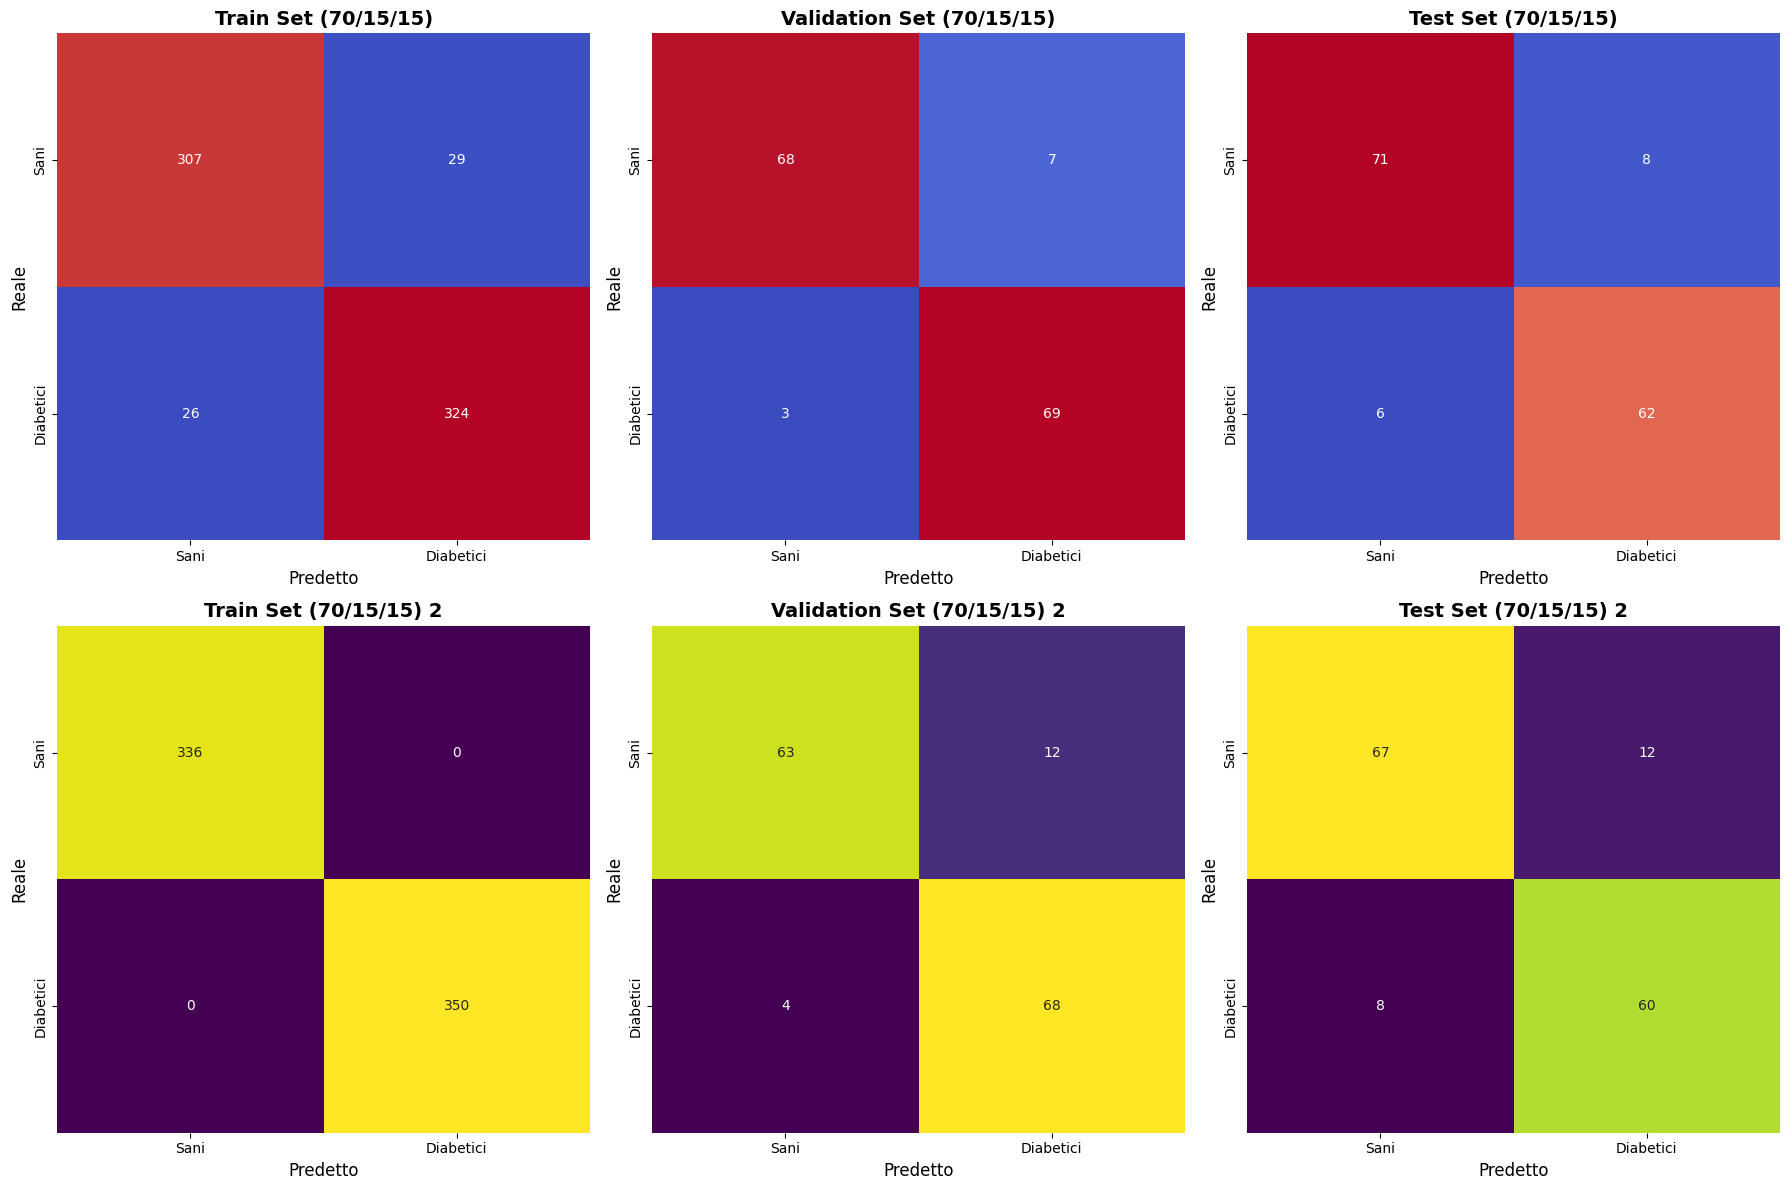

In [61]:
# Creazione della figura per le confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# Definizione delle etichette delle classi
class_labels = ["Sani", "Diabetici"]

# Titoli per i grafici
titles = [
    "Train Set (70/15/15)", "Validation Set (70/15/15)", "Test Set (70/15/15)",
    "Train Set (70/15/15) 2", "Validation Set (70/15/15) 2", "Test Set (70/15/15) 2"
]

# Liste delle confusion matrix per ogni set di dati con MLPClassifier
cm_mlp_data = [
    confusion_matrix(y_train, y_pred_train_mlp),
    confusion_matrix(y_val, y_pred_val_mlp),
    confusion_matrix(y_test, y_pred_test_mlp),
    confusion_matrix(y_train, y_pred_train_mlp2),
    confusion_matrix(y_val, y_pred_val_mlp2),
    confusion_matrix(y_test, y_pred_test_mlp2)
]

# Loop per creare ogni subplot con la rispettiva matrice di confusione
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_mlp_data[i], annot=True, fmt='d', cmap='coolwarm' if i < 3 else 'viridis', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

# Miglioramento della disposizione dei grafici
plt.tight_layout()
plt.show()


Conclusioni:
  - Il modello ottimizzato ha performance migliori sui dati di test, ma la sua eccellente performance sui dati di addestramento potrebbe indicare overfitting.
  - Il modello personalizzato, pur avendo performance più basse, potrebbe generalizzare meglio, indicando un bilanciamento tra adattamento ai dati di addestramento e capacità di generalizzare.

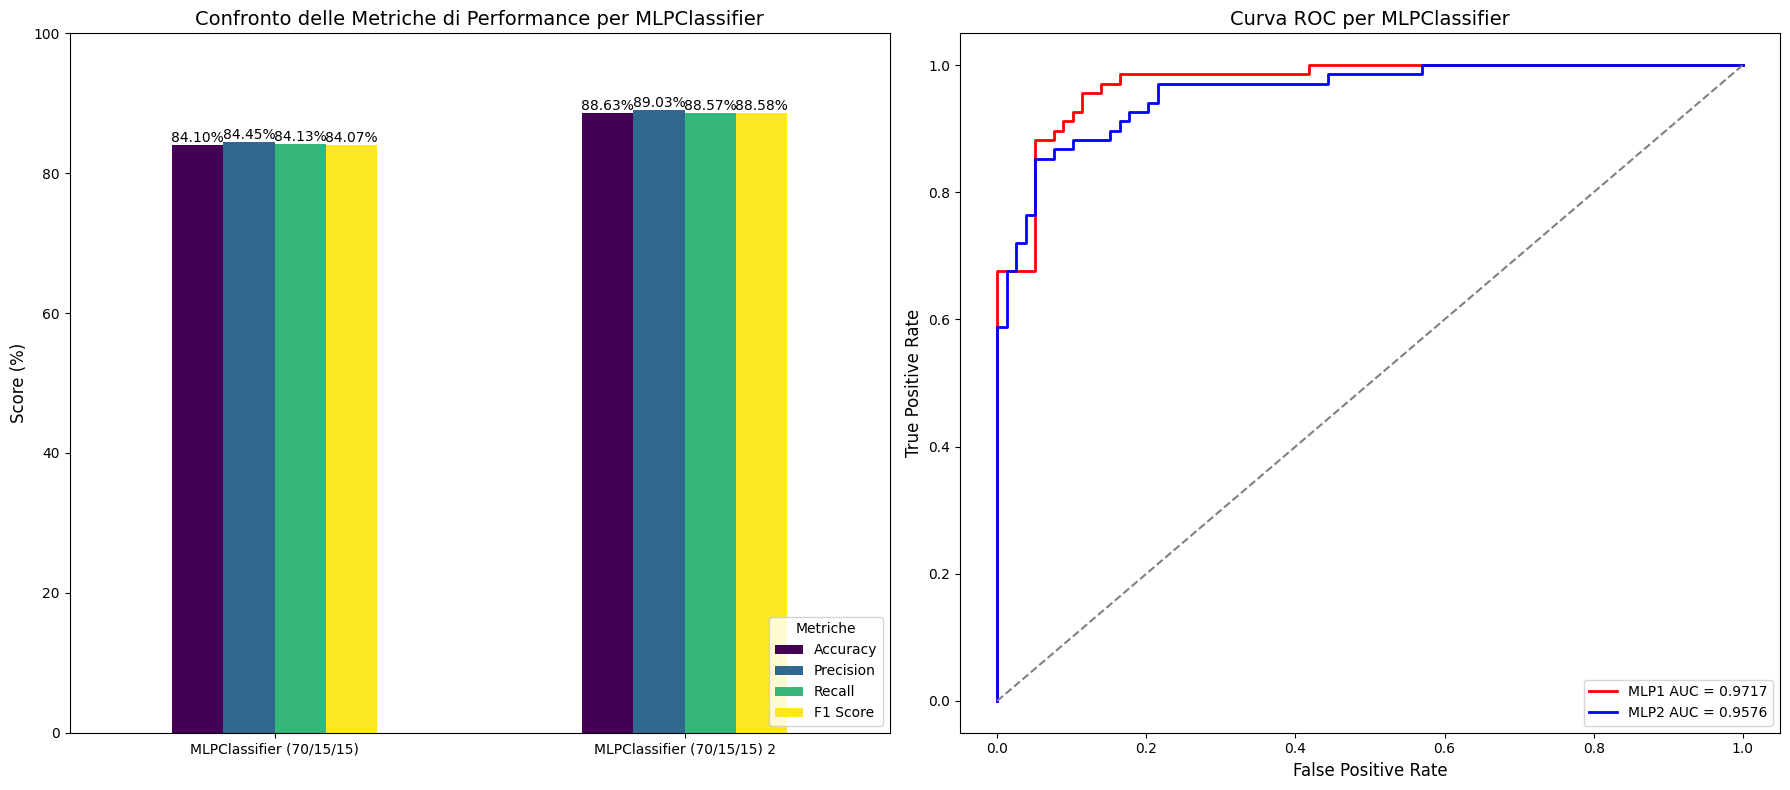

In [62]:
# Risultati della Cross-Validation per MLPClassifier
accuracy_mlp = round(np.mean(cv_scores_70['accuracy']), 6)
precision_mlp = round(np.mean(cv_scores_70['precision']), 6)
recall_mlp = round(np.mean(cv_scores_70['recall']), 6)
f1_mlp = round(np.mean(cv_scores_70['f1-score']), 6)

accuracy_mlp2 = round(np.mean(cv_scores_80['accuracy']), 6)
precision_mlp2 = round(np.mean(cv_scores_80['precision']), 6)
recall_mlp2 = round(np.mean(cv_scores_80['recall']), 6)
f1_mlp2 = round(np.mean(cv_scores_80['f1-score']), 6)

# DataFrame con le Metriche di Performance per MLPClassifier
performance_mlp_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'MLPClassifier (70/15/15)': [accuracy_mlp * 100, precision_mlp * 100, recall_mlp * 100, f1_mlp * 100],
    'MLPClassifier (70/15/15) 2': [accuracy_mlp2 * 100, precision_mlp2 * 100, recall_mlp2 * 100, f1_mlp2 * 100]
}).set_index('Metric').T

# Curva ROC per MLPClassifier
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:, 1])  # ROC per MLP (70/15/15)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

fpr_mlp2, tpr_mlp2, _ = roc_curve(y_test, mlp_model2.predict_proba(X_test)[:, 1])  # ROC per MLP (70/15/15) 2
roc_auc_mlp2 = auc(fpr_mlp2, tpr_mlp2)

# Creazione della figura per il grafico delle metriche e la curva ROC
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### **Grafico delle metriche di performance per MLPClassifier**
performance_mlp_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per MLPClassifier", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### **Grafico della Curva ROC per MLPClassifier**
axes[1].plot(fpr_mlp, tpr_mlp, color='red', lw=2, label=f'MLP1 AUC = {roc_auc_mlp:.4f}')
axes[1].plot(fpr_mlp2, tpr_mlp2, color='blue', lw=2, label=f'MLP2 AUC = {roc_auc_mlp2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per MLPClassifier", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

# Miglioramento del layout
plt.tight_layout()
plt.show()


Conclusioni:
  - Il modello personalizzato ha AUC = 0.9717, il che indica una migliore capacità di discriminazione tra le classi rispetto al modello ottimizzato. Un AUC più alto suggerisce che il modello personalizzato è più preciso nel separare le classi (Sani vs. Diabetici).
  - Anche se le metriche di performance sono migliori per il modello ottimizzato, altri controlli fatti in precedenza dimostrano che esso soffre di overfitting, non generalizzando bene sui dati nuovi.
  - Pertanto, è preferibile usare il modello personalizzato che, al contrario, generalizza bene sui dati nuovi e ha un AUC maggiore, pari a 0.9717.

#### **Confronto delle metriche di performance e delle curve ROC dei modelli**

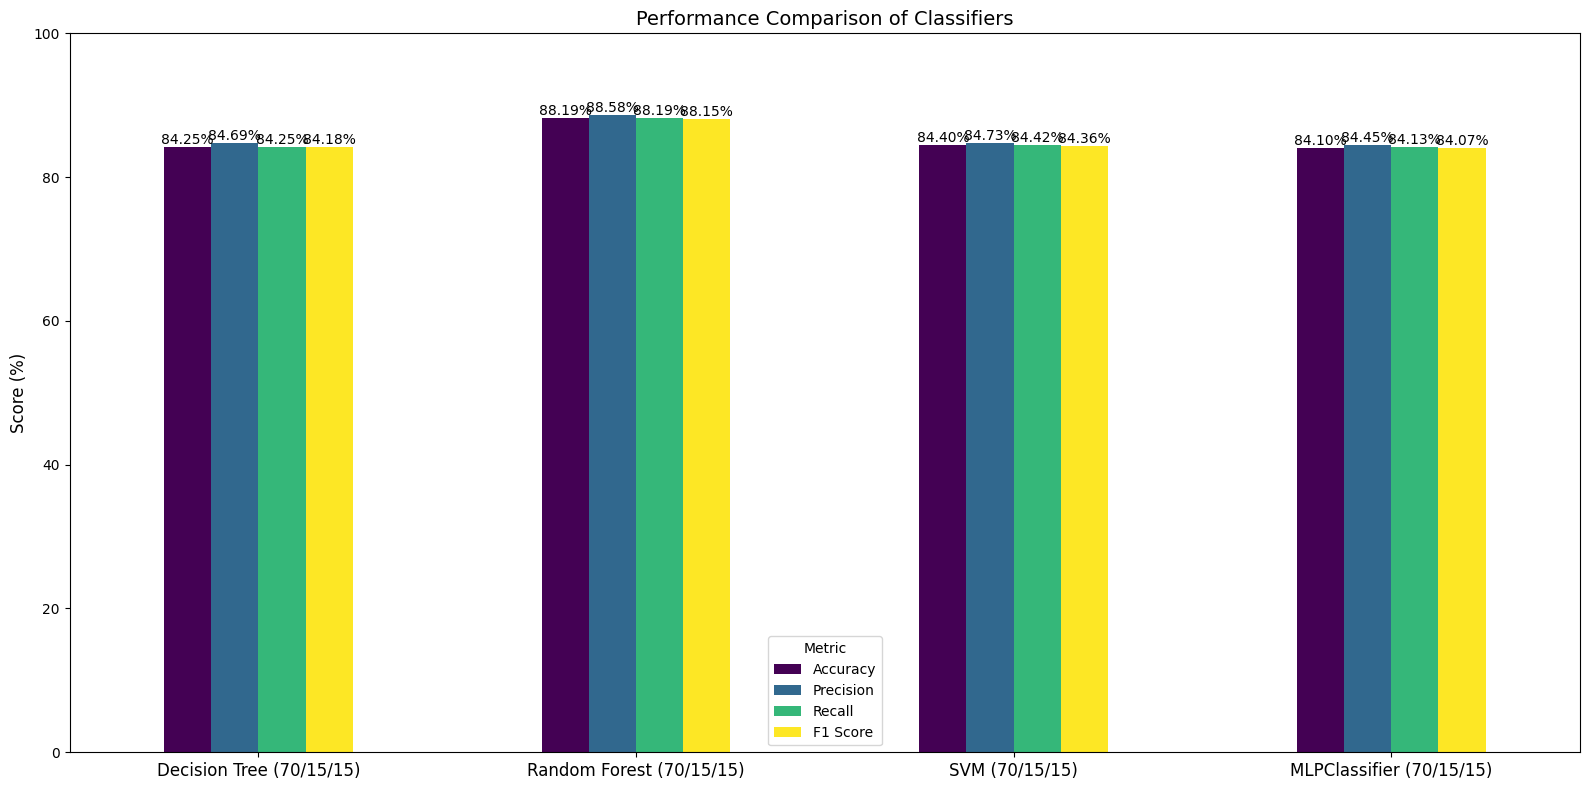

In [73]:
# Combine the performance metrics for all models into one DataFrame
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree (70/15/15)': [accuracy_dt * 100, precision_dt * 100, recall_dt * 100, f1_dt * 100],
    'Random Forest (70/15/15)': [accuracy_rf * 100, precision_rf * 100, recall_rf * 100, f1_rf * 100],
    'SVM (70/15/15)': [accuracy_svm * 100, precision_svm * 100, recall_svm * 100, f1_svm * 100],
    'MLPClassifier (70/15/15)': [accuracy_mlp * 100, precision_mlp * 100, recall_mlp * 100, f1_mlp * 100]
}).set_index('Metric').T

# Create the figure for the performance metric chart
fig, axes = plt.subplots(1, 1, figsize=(16, 8))  # Use a single axis for the bar chart

# Plot the bar chart for all models
performance_df.plot(kind='bar', ax=axes, colormap='viridis')

# Set the title and labels
axes.set_title("Performance Comparison of Classifiers", fontsize=14)
axes.set_ylabel("Score (%)", fontsize=12)
axes.set_ylim(0, 100)  # Scale 0-100%
axes.tick_params(axis='x', labelrotation=0, labelsize=12)

# Add annotations above each bar in percentage
for container in axes.containers:
    axes.bar_label(container, fmt='%.2f%%', fontsize=10)

# Improved layout
plt.tight_layout()
plt.show()


In [ ]:
# For Decision Tree Classifier
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])  # Positive class probabilities
roc_auc_dt = auc(fpr_dt, tpr_dt)

# For Random Forest Classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])  # Positive class probabilities
roc_auc_rf = auc(fpr_rf, tpr_rf)

# For SVM Classifier
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))  # For SVM, we use decision_function
roc_auc_svm = auc(fpr_svm, tpr_svm)

# For MLP Classifier
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:, 1])  # Positive class probabilities
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Create figure for ROC curves
fig, ax = plt.subplots(figsize=(16, 8))

# Plot ROC for all models
ax.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'DT AUC = {roc_auc_dt:.4f}')
ax.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'RF AUC = {roc_auc_rf:.4f}')
ax.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM AUC = {roc_auc_svm:.4f}')
ax.plot(fpr_mlp, tpr_mlp, color='purple', lw=2, label=f'MLP AUC = {roc_auc_mlp:.4f}')

# Line for random guessing (diagonal line)
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

# Labels and title
ax.set_xlabel("False Positive Rate", fontsize=12)
ax.set_ylabel("True Positive Rate", fontsize=12)
ax.set_title("ROC Curve for Models", fontsize=14)
ax.legend(loc="lower right", fontsize=10)

# Improved layout
plt.tight_layout()
plt.show()

AUC (Area Under the Curve):

- Il MLPClassifier ha il miglior AUC di 0.9717, indicando che è il modello con la migliore capacità di discriminazione tra le due classi (Sani vs Diabetici).

- Il Random Forest segue con un AUC di 0.9657, che è anch'esso un valore elevato e suggerisce buone prestazioni.

- Il Decision Tree ha un AUC di 0.9537, che, pur essendo buono, è inferiore rispetto a Random Forest e MLP.

- L'SVM ha un AUC di 0.9544, che è anch'esso abbastanza buono, ma comunque inferiore agli altri due modelli.

Conclusioni:
- MLPClassifier è il modello con il miglior AUC, quindi è il più efficace nella discriminazione delle classi.
- Random Forest è anch'esso molto performante, mentre SVM e Decision Tree presentano prestazioni simili, ma inferiori rispetto agli altri modelli.
- Considerando sia le metriche di performance che la curva ROC, il MLPClassifier sembra essere la scelta migliore se l'obiettivo è massimizzare la capacità di discriminazione tra le classi.

---
---

### **Modelli di classificazione** (con 80% da togliere dopo)

#### **Divisione del dataset in Training, Validation e Test Set**

Una volta finita la fase di preprocessing, è necessario dividere i dati in training set, validation set e test set per addestrare e valutare i modelli di Machine Learning.

Utilizziamo la funzione `train_test_split()` per suddividere il dataset in due diverse proporzioni:
- 70% Training – 15% Validation – 15% Test:
  - Questa suddivisione consente di **mantenere un validation set separato** per ottimizzare il modello **prima del test** finale.
  - Il training set viene usato per **l’addestramento del modello**, il validation set per **la selezione dell’ipermodello** e il test set per **la valutazione finale**.
- 80% Training – 10% Validation – 10% Test:
  - In questo caso, il modello viene **addestrato con più dati**, lasciando **meno spazio** per la validazione e il test.
  - Questo può essere utile quando si vuole **massimizzare l’apprendimento del modello** con **il maggior numero di esempi**.


In [42]:
# Prima suddivisione: Training (70%) e temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Seconda suddivisione: Validation (15%) e Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Controllo delle dimensioni
print(f"Train Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")

###

# Prima divisione: Training (80%) e temp (20%)
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Seconda divisione: Validation (10%) e Test (10%)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)

# Controllo delle dimensioni
print(f"Train Set: {X_train2.shape}, Validation Set: {X_val2.shape}, Test Set: {X_test2.shape}")

Train Set: (686, 8), Validation Set: (147, 8), Test Set: (147, 8)
Train Set: (784, 8), Validation Set: (98, 8), Test Set: (98, 8)


#### **Valutazione delle performance e della generalizzazione del modello**

Durante l’addestramento dei modelli, utilizzeremo le **metriche standard** per il classification report:
- Accuracy:
  - visualizza **il percentuale** di predizioni corrette.
- Precision:
  - misura **la qualità** delle predizioni positive.
- Recall:
  - valuta **la capacità del modello di catturare** tutte le istanze positive.
- F1-score:
  - visualizza **la media armonica tra Precision e Recall**, utile per dataset sbilanciati.

Tuttavia, valutare un modello esclusivamente su un singolo training, validation e test set potrebbe non essere sufficiente per garantirne la robustezza. Per questo motivo, viene introdotta **la cross-validation** come strumento fondamentale per stimare in modo più approfondito e affidabile **le performance medie** del modello **su dati non visti**.



##### **Cross-validation per una valutazione avanzata**

1.  Si definisce un dizionario `scoring` che contiene le metriche di performance (accuracy, precision, recall e f1_score) per valutare il modello.   Queste metriche vengono calcolate con la media "macro" per tener conto della media dei punteggi per ogni classe in modo equilibrato.

2. Si definisce una funzione per eseguire la cross-validation:
  - Prende in input il **modello** da addestrare, le **caratteristiche** (`X`), le **etichettature** (`y`) e un parametro opzionale per **il numero di fold** di cross-validation.
  - La **StratifiedKFold** viene utilizzata per suddividere il dataset **in 10 fold**.
  - Per ogni fold, vengono calcolate le metriche definite in `scoring`.
  - I punteggi per ciascuna metrica vengono salvati in un dizionario `results`.
  - Alla fine, vengono **stampati i valori** per ciascun fold, insieme alla **media** e all'**intervallo di confidenza al 95%** per ogni metrica.

3. Si definisce una funzione per calcolare l'intervallo di confidenza al 95% per i valori di ciascuna metrica:
  - Viene utilizza la distribuzione **t di Student** per calcolare l'intervallo, che è appropriato quando si ha una **distribuzione di campioni limitata**, come nel caso dei fold di cross-validation.
  - La funzione riceve **un array di punteggi** e restituisce **l'intervallo di confidenza arrotondato a 6 decimali**.

In [43]:
# Preparazione per la cross-validation avanzata con metriche multiple
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

print("Misure utilizzate durante cross validation:", ' '.join(scoring.keys()))

# Funzione per eseguire la cross-validation con metriche avanzate
def my_cross_validation(model, X, y, cv):
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)

    results = {
        'accuracy': scores['test_accuracy'],
        'precision': scores['test_precision'],
        'recall': scores['test_recall'],
        'f1-score': scores['test_f1_score']
    }

    print("Cross-validation eseguita con 10 fold:")
    # Stampa dei risultati per ogni metrica
    for metric, values in results.items():
        print(f"--- {metric.capitalize()} di ogni fold, con media pari a {np.mean(values):.8f} ---\n")
        print(values)
        conf_interval = confidence_interval(values)
        print(f"\nIntervallo di confidenza 95%: {conf_interval}\n")

    return results

print("Funzione my_cross_validation ora disponibile.")


# Funzione per calcolare gli intervalli di confidenza con 6 decimali
def confidence_interval(scores):
    # Calcola la media e l'errore standard dei punteggi
    mean_val = np.mean(scores)
    ci_low, ci_high = st.t.interval(0.95, len(scores) - 1, loc=mean_val, scale=st.sem(scores))
    # Restituisce l'intervallo di confidenza formattato
    return f"({round(ci_low, 6)}, {round(ci_high, 6)})"

print("Funzione confidence_interval ora disponibile.")

Misure utilizzate durante cross validation: accuracy precision recall f1_score
Funzione my_cross_validation ora disponibile.
Funzione confidence_interval ora disponibile.


##### **Modello baseline**



Nel nostro progetto, il target è **binario**, rappresentato da due classi: "assenza di diabete" e "presenza di diabete".

Inizialmente, il dataset poteva essere sbilanciato, con un numero maggiore di pazienti senza diabete rispetto a quelli con diabete. Tuttavia, per bilanciare il dataset e trattare il problema della distribuzione sbilanciata delle classi, abbiamo applicato SMOTE (Synthetic Minority Over-sampling Technique), che ha generato esempi sintetici per la classe meno rappresentata, portando le classi a un numero simile di esempi.

Anche se il dataset è stato bilanciato tramite SMOTE, è comunque utile avere un modello baseline che predice la classe più comune nel caso di un dataset sbilanciato. Per questo motivo, il modello baseline predice sempre "presenza di diabete" (classe 1), senza prendere in considerazione le caratteristiche dei pazienti.

La logica del modello baseline è che, in un contesto di classi bilanciate, predire sempre la classe 1 può ancora dare un riferimento per l'accuratezza di altri modelli di machine learning. Infatti, lo scopo del modello baseline è fornire un **valore di accuratezza minima** da usare come **punto di riferimento** per confrontare altri modelli.

Se un modello di machine learning non riesce a superare l'accuratezza del modello baseline, ciò indicherebbe che il modello non ha apportato alcun valore aggiunto rispetto a un semplice modello che predice sempre la classe più frequente, con conseguente aumento dei costi computazionali senza miglioramenti effettivi.

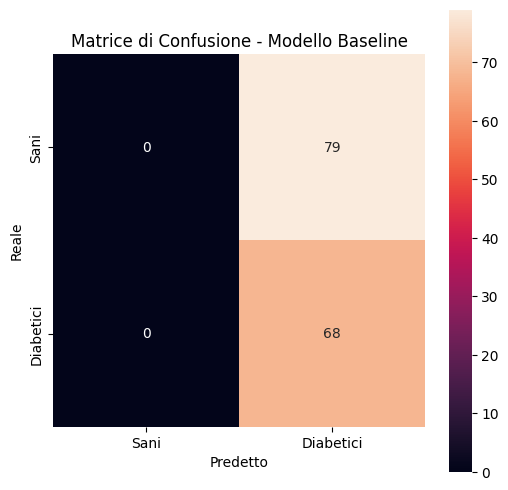

Accuracy del modello baseline: 0.46258503401360546


In [44]:
# Predizioni target sempre uguali a True (Presenza di Diabete)
y_pred_baseline = np.ones(len(y_test), dtype=bool)  # Predizione sempre 1 (Presenza)

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred_baseline)

# Plottare la matrice di confusione
plt.figure(figsize=(6, 6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=['Sani', 'Diabetici'],
            yticklabels=['Sani', 'Diabetici'])
plt.ylabel('Reale')
plt.xlabel('Predetto')
plt.title('Matrice di Confusione - Modello Baseline')

# Mostrare il grafico
plt.show()

# Calcolare l'accuracy del modello baseline
baseline_test_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Accuracy del modello baseline:", baseline_test_accuracy)

Interpretazione della Matrice di Confusione:
- Veri Positivi (TP):
  - 68 (predizione dei diabetici corretta per pazienti effettivamente diabetici)
- Falsi Positivi (FP):
  - 79 (predizione dei diabetici errata per pazienti effettivamente sani)
- Veri Negativi (TN):
  - 0 (non sono stati predetti sani per i pazienti effettivamente sani)
- Falsi Negativi (FN):
  - 0 (non sono stati predetti sani per i pazienti effettivamente diabetici)

Conclusione:
- Poiché il modello baseline predice sempre la classe "Diabetici" (classe 1), il modello ha fatto **68 previsioni corrette** (veri positivi, TP) per i pazienti diabetici. Tuttavia, ha **79 falsi positivi** (FP), ossia ha predetto che pazienti sani fossero diabetici.
- Il modello baseline **non distingue** affatto **i pazienti sani** (classe 0) e **predice solo i pazienti diabetici**. Questo porta a **un alto numero di falsi positivi**. La bassa accuratezza (46.26%) riflette che **il modello non è utile** in quanto **non riesce a fare predizioni corrette** per **la classe più rara** (ovvero i pazienti sani).

##### **Decision Tree Classifier**


Il Decision Tree Classifier è un modello di machine learning **supervisionato** utilizzato per la classificazione dei dati. Si basa su una **struttura ad albero** in cui ogni nodo rappresenta una **decisione basata su una caratteristica**.

###### **Addestramento dei modelli**


Si addestrano due Decision Tree sui **due differenti split** (70/15/15 e 80/10/10).

Per ottenere i risultati migliori, abbiamo ottimizzato il modello impostando i seguenti **iperparametri**:
- `criterion` (funzione di valutazione dell'albero),
- `splitter` (tipo di divisione per i nodi),
- `max_depth` (profondità massima dell'albero),
- `min_samples_split` (numero minimo di campioni per dividere un nodo),
- `ccp_alpha` (parametro di potatura per evitare overfitting).

In [409]:
# Addestramento del modello sul training set (70/15/15)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=20, ccp_alpha=0.01, splitter='best', criterion='gini')
dt_model.fit(X_train, y_train)

# Addestramento del modello sul training set (80/10/10)
dt_model2 = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=20, ccp_alpha=0.01, splitter='best', criterion='gini')
dt_model2.fit(X_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=15, min_samples_split=20,
                       random_state=42)

Questa parte di codice esegue un'ottimizzazione dei parametri del modello DecisionTreeClassifier utilizzando **RandomizedSearchCV**, che cerca combinazioni casuali di parametri, tra cui:
- `dt_model` (il modello da ottimizzare).
- `n_iter=10` (il numero di combinazioni casuali da testare).
- `scoring='accuracy'` (la metrica di valutazione).
- `cv=10` (la validazione incrociata a 10 fold).

In [410]:
# Definizione del grid dei parametri da esplorare
param_dist_dt = {
    'criterion': ['gini', 'entropy'],  # Funzione di valutazione
    'splitter': ['best', 'random'],  # Tipo di divisione
    'max_depth': [None, 5, 10, 15, 20],  # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10, 20],  # Numero minimo di campioni per dividere un nodo
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2],  # Parametro di potatura
}

# Creazione del RandomizedSearchCV per il modello (70/15/15)
random_search_dt_70 = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist_dt,
    n_iter=10,  # Numero di combinazioni casuali da testare
    scoring='accuracy',  # Puoi scegliere un altro parametro come precision, recall, etc.
    cv=10,  # 10-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Addestramento del modello con RandomizedSearchCV sul training set (70/15/15)
random_search_dt_70.fit(X_train, y_train)

# Creazione del modello con i migliori parametri
best_dt_model_70 = random_search_dt_70.best_estimator_

# Mostra i migliori parametri trovati per ogni set
print("Migliori parametri per il modello (70/15/15):")
print(random_search_dt_70.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Migliori parametri per il modello (70/15/15):
{'splitter': 'best', 'min_samples_split': 20, 'max_depth': 15, 'criterion': 'gini', 'ccp_alpha': 0.01}


###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento (sia per il 70/15/15 che per l'80/10/10).

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [411]:
# Creazione della cross-validation con StratifiedKFold (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation su training set (70/15/15)
cv_scores_70 = my_cross_validation(dt_model, X_train, y_train, cv=kfold)

# Esecuzione della cross-validation su training set (80/10/10)
cv_scores_80 = my_cross_validation(dt_model2, X_train2, y_train2, cv=kfold)

# Creazione di un DataFrame per mostrare i risultati della cross-validation
cv_summary_df = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (70/15/15)': [round(np.mean(cv_scores_70['accuracy']), 6),
                         round(np.mean(cv_scores_70['precision']), 6),
                         round(np.mean(cv_scores_70['recall']), 6),
                         round(np.mean(cv_scores_70['f1-score']), 6)],
    '95% CI (70/15/15)': [confidence_interval(cv_scores_70['accuracy']),
                           confidence_interval(cv_scores_70['precision']),
                           confidence_interval(cv_scores_70['recall']),
                           confidence_interval(cv_scores_70['f1-score'])],
    'Media (80/10/10)': [round(np.mean(cv_scores_80['accuracy']), 6),
                         round(np.mean(cv_scores_80['precision']), 6),
                         round(np.mean(cv_scores_80['recall']), 6),
                         round(np.mean(cv_scores_80['f1-score']), 6)],
    '95% CI (80/10/10)': [confidence_interval(cv_scores_80['accuracy']),
                           confidence_interval(cv_scores_80['precision']),
                           confidence_interval(cv_scores_80['recall']),
                           confidence_interval(cv_scores_80['f1-score'])]
})

cv_summary_df.set_index('Metrica', inplace=True)
cv_summary_df.index.name = None
cv_summary_df

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni fold, con media pari a 0.84247656 ---

[0.89855072 0.7826087  0.86956522 0.88405797 0.86956522 0.8115942
 0.86764706 0.82352941 0.86764706 0.75      ]

Intervallo di confidenza 95%: (0.807875, 0.877078)

--- Precision di ogni fold, con media pari a 0.84688257 ---

[0.8989899  0.7887931  0.8697479  0.88879457 0.87801724 0.81409168
 0.87105263 0.82337662 0.86764706 0.76831502]

Intervallo di confidenza 95%: (0.814754, 0.879011)

--- Recall di ogni fold, con media pari a 0.84251210 ---

[0.89831933 0.78151261 0.8697479  0.88487395 0.86848739 0.81092437
 0.86623377 0.82337662 0.86796537 0.75367965]

Intervallo di confidenza 95%: (0.808361, 0.876663)

--- F1-score di ogni fold, con media pari a 0.84175968 ---

[0.89846542 0.78095238 0.86956522 0.88383838 0.86857143 0.8109589
 0.86692759 0.82337662 0.86761843 0.7473224 ]

Intervallo di confidenza 95%: (0.806647, 0.876872)

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni 

Media (70/15/15)     95% CI (70/15/15)  Media (80/10/10)  \
Accuracy           0.842477  (0.807875, 0.877078)          0.855956   
Precision          0.846883  (0.814754, 0.879011)          0.861906   
Recall             0.842512  (0.808361, 0.876663)          0.855333   
F1 Score           0.841760  (0.806647, 0.876872)          0.855037   

              95% CI (80/10/10)  
Accuracy   (0.829345, 0.882566)  
Precision   (0.836671, 0.88714)  
Recall     (0.828628, 0.882038)  
F1 Score   (0.828073, 0.882002)

Conclusioni:
- Il modello 70/15/15 mostra una stabilità leggermente superiore grazie agli intervalli di confidenza più stretti per Precision, Recall, e F1 Score. Questo significa che l'aumento di dati all'80% **non ha avuto un impatto** drastico sulle prestazioni.
- L'intervallo di confidenza è più ampio nel modello 80/10/10, il che indica una **maggiore variabilità** dei risultati, dovuta alla **riduzione del set** di validazione/test.

Dunque, se **la stabilità è un obiettivo** chiave, allora **70/15/15** potrebbe essere **preferibile**, poiché presenta **intervalli di confidenza più stretti**.

###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Decision Tree sui set di training, validation e test, per due diverse suddivisioni dei dati (70/15/15 e 80/10/10).

Per il miglior controllo di overfitting, si calcola la differenza tra Training e Test per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.





In [412]:
# Predizioni sui diversi set per verificare l'overfitting
y_pred_train_dt = dt_model.predict(X_train)
y_pred_val_dt = dt_model.predict(X_val)
y_pred_test_dt = dt_model.predict(X_test)

y_pred_train_dt2 = dt_model2.predict(X_train2)
y_pred_val_dt2 = dt_model2.predict(X_val2)
y_pred_test_dt2 = dt_model2.predict(X_test2)

# Creazione del DataFrame con le metriche per visualizzare l'overfitting
performance_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy (70/15/15)': [accuracy_score(y_train, y_pred_train_dt), accuracy_score(y_val, y_pred_val_dt), accuracy_score(y_test, y_pred_test_dt)],
    'Precision (70/15/15)': [precision_score(y_train, y_pred_train_dt, average='macro'), precision_score(y_val, y_pred_val_dt, average='macro'), precision_score(y_test, y_pred_test_dt, average='macro')],
    'Recall (70/15/15)': [recall_score(y_train, y_pred_train_dt, average='macro'), recall_score(y_val, y_pred_val_dt, average='macro'), recall_score(y_test, y_pred_test_dt, average='macro')],
    'F1 Score (70/15/15)': [f1_score(y_train, y_pred_train_dt, average='macro'), f1_score(y_val, y_pred_val_dt, average='macro'), f1_score(y_test, y_pred_test_dt, average='macro')],
    'Accuracy (80/10/10)': [accuracy_score(y_train2, y_pred_train_dt2), accuracy_score(y_val2, y_pred_val_dt2), accuracy_score(y_test2, y_pred_test_dt2)],
    'Precision (80/10/10)': [precision_score(y_train2, y_pred_train_dt2, average='macro'), precision_score(y_val2, y_pred_val_dt2, average='macro'), precision_score(y_test2, y_pred_test_dt2, average='macro')],
    'Recall (80/10/10)': [recall_score(y_train2, y_pred_train_dt2, average='macro'), recall_score(y_val2, y_pred_val_dt2, average='macro'), recall_score(y_test2, y_pred_test_dt2, average='macro')],
    'F1 Score (80/10/10)': [f1_score(y_train2, y_pred_train_dt2, average='macro'), f1_score(y_val2, y_pred_val_dt2, average='macro'), f1_score(y_test2, y_pred_test_dt2, average='macro')]
})

# Calcolo della differenza tra Train e Test per ogni metrica
performance_df["Accuracy Gap (Train - Test)"] = performance_df["Accuracy (70/15/15)"] - performance_df["Accuracy (80/10/10)"]
performance_df["F1 Score Gap (Train - Test)"] = performance_df["F1 Score (70/15/15)"] - performance_df["F1 Score (80/10/10)"]

print("Decision Tree Performance Overfitting Check with Gaps")
performance_df.set_index('Set', inplace=True)
performance_df.index.name = None
performance_df


Decision Tree Performance Overfitting Check with Gaps


Accuracy (70/15/15)  Precision (70/15/15)  Recall (70/15/15)  \
Train                  0.890671              0.893526           0.889821   
Validation             0.897959              0.903199           0.899167   
Test                   0.904762              0.904167           0.906273   

            F1 Score (70/15/15)  Accuracy (80/10/10)  Precision (80/10/10)  \
Train                  0.890279             0.880102              0.886607   
Validation             0.897789             0.908163              0.909583   
Test                   0.904545             0.867347              0.872327   

            Recall (80/10/10)  F1 Score (80/10/10)  \
Train                0.878632             0.879246   
Validation           0.915645             0.907924   
Test                 0.871237             0.867333   

            Accuracy Gap (Train - Test)  F1 Score Gap (Train - Test)  
Train                          0.010569                     0.011032  
Validation                    -0.010204                    -0.010135  
Test                           0.037415                     0.037212

Conclusioni:
- Il modello **generalizza bene**, senza segni evidenti di overfitting, anche se il modello 80/10/10 mostra un leggero calo tra training e test.
- Le suddivisioni 70/15/15 e 80/10/10 danno **risultati simili**, suggerendo che **la riduzione del test set non ha avuto un impatto** significativo sulle prestazioni.
- Il validation set ha prestazioni **leggermente migliori** rispetto al test set, il che potrebbe indicare una **piccola variazione nella distribuzione dei dati** di test.

###### **Alberi, matrici di correlazione e grafici**

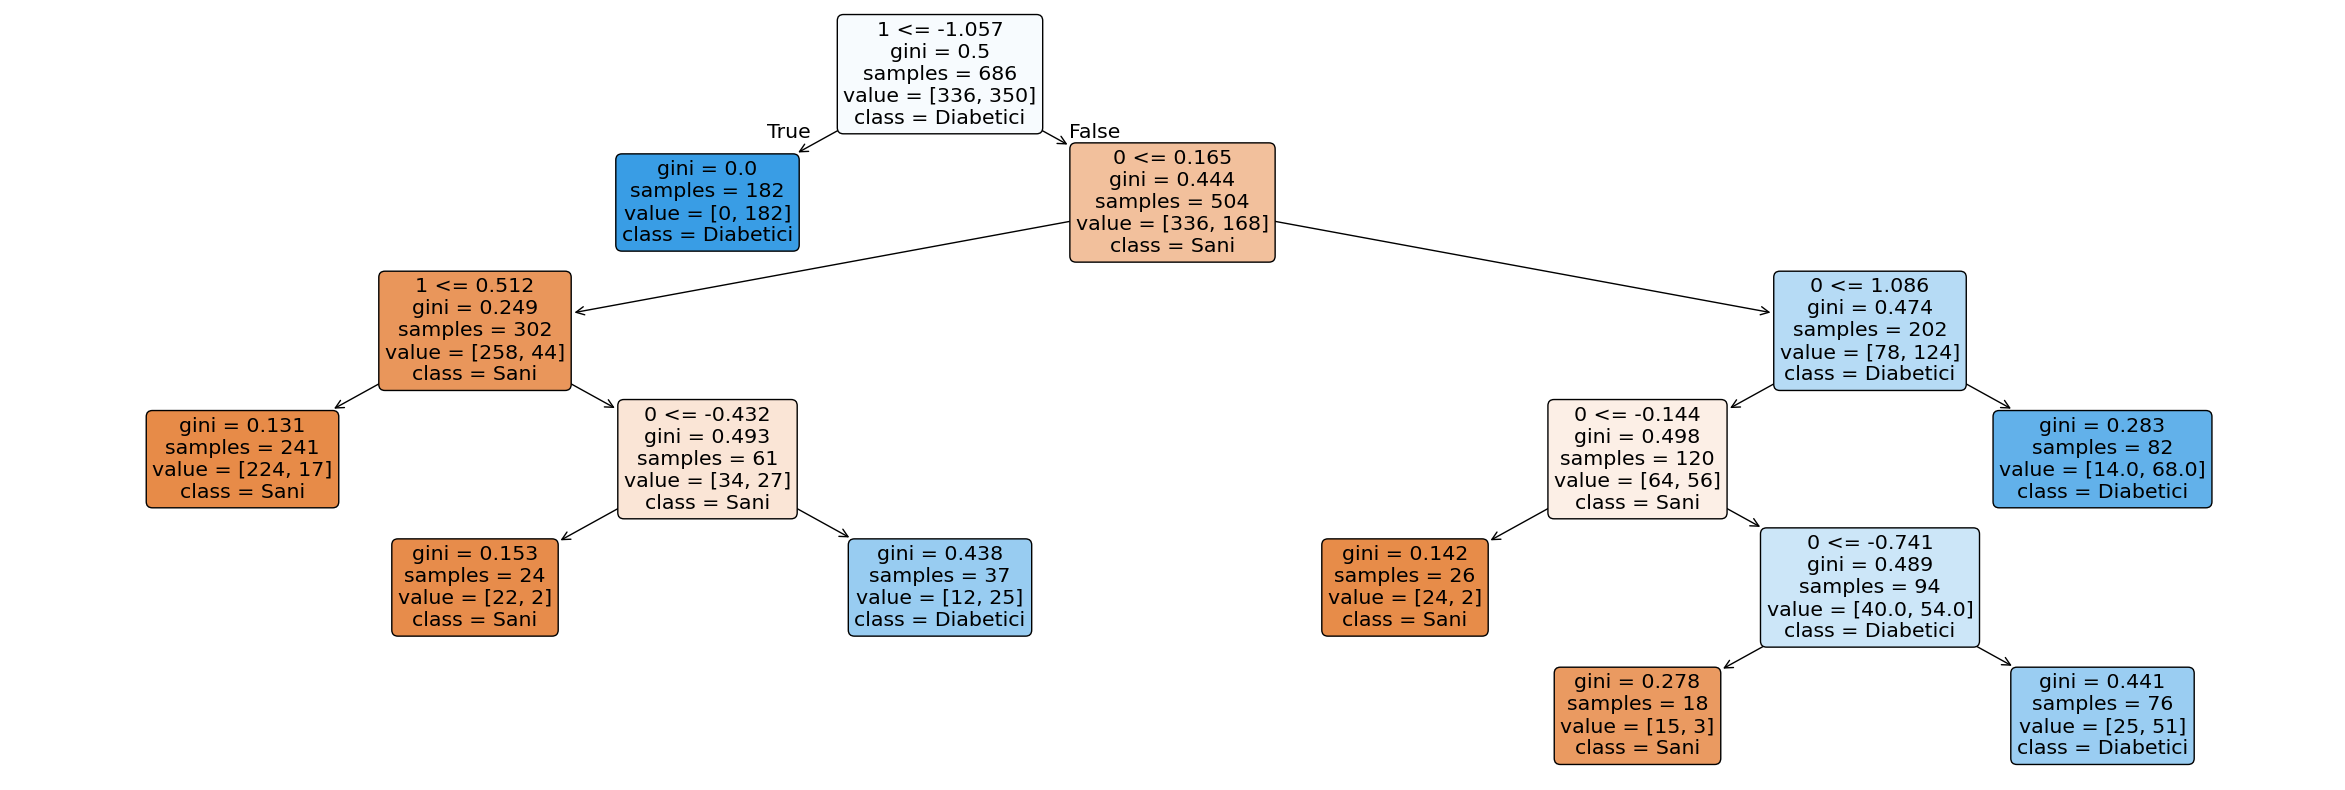

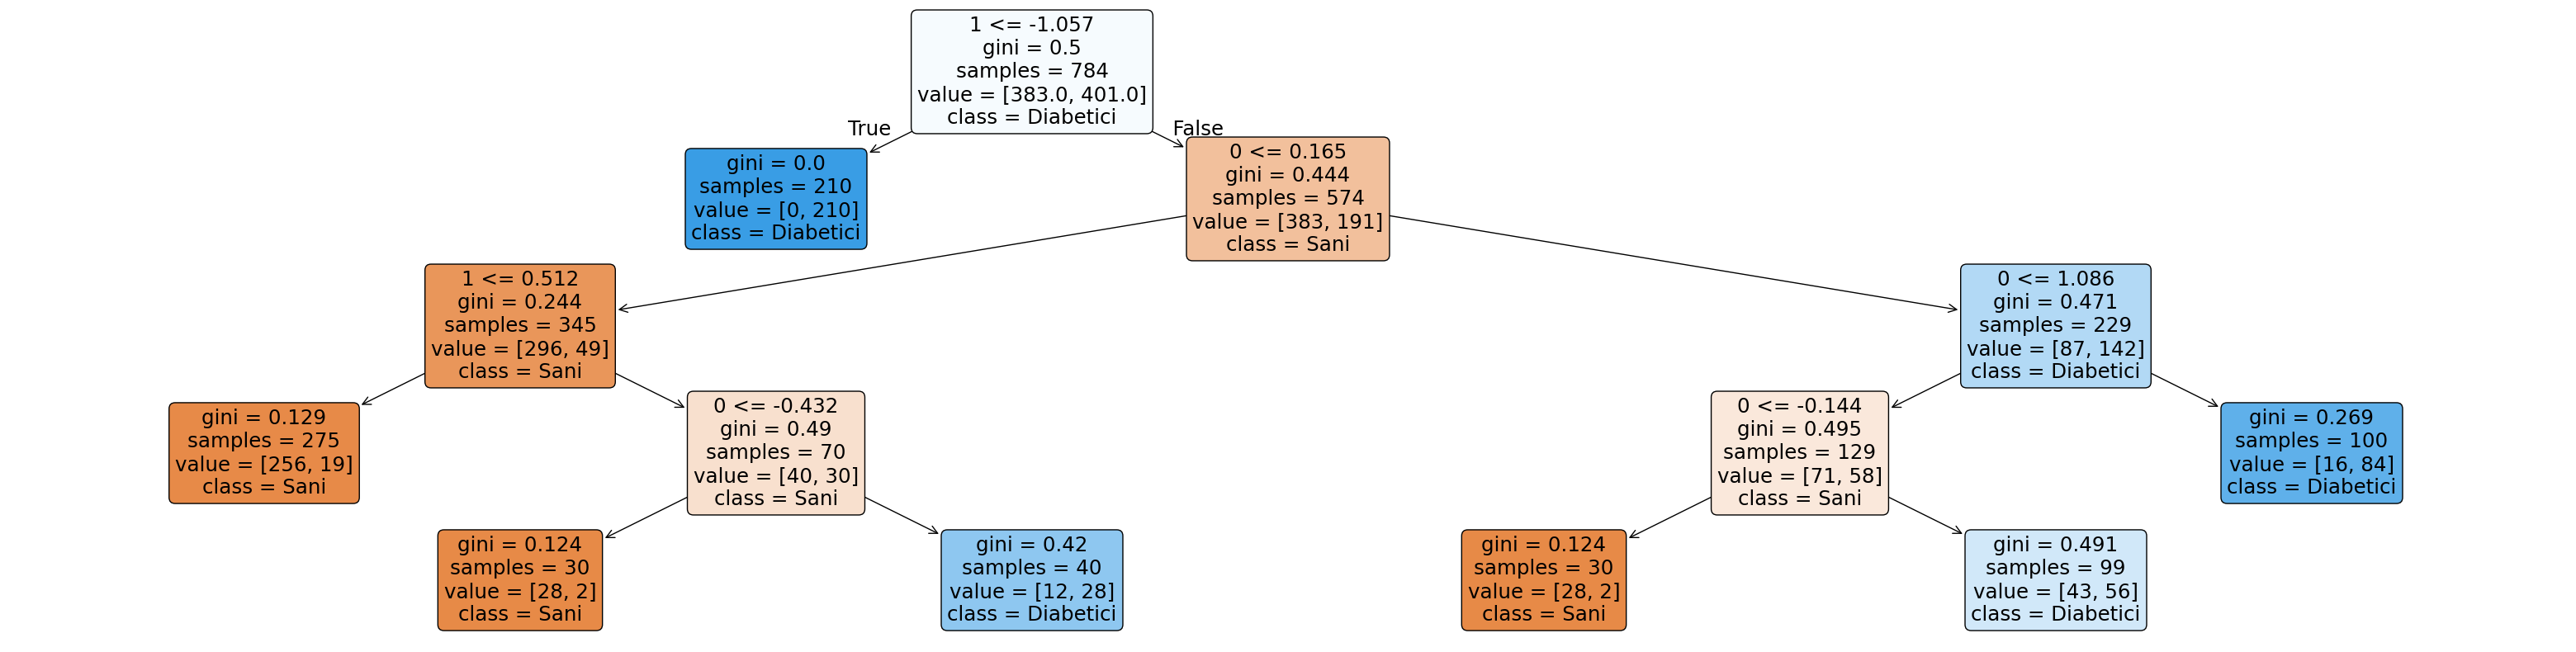

In [413]:
plt.figure(figsize=(30, 10))
plot_tree(dt_model, filled=True, rounded=True, class_names=['Sani', 'Diabetici'], feature_names=y)
plt.show()

plt.figure(figsize=(40, 10))
plot_tree(dt_model2, filled=True, rounded=True, class_names=['Sani', 'Diabetici'], feature_names=y)
plt.show()

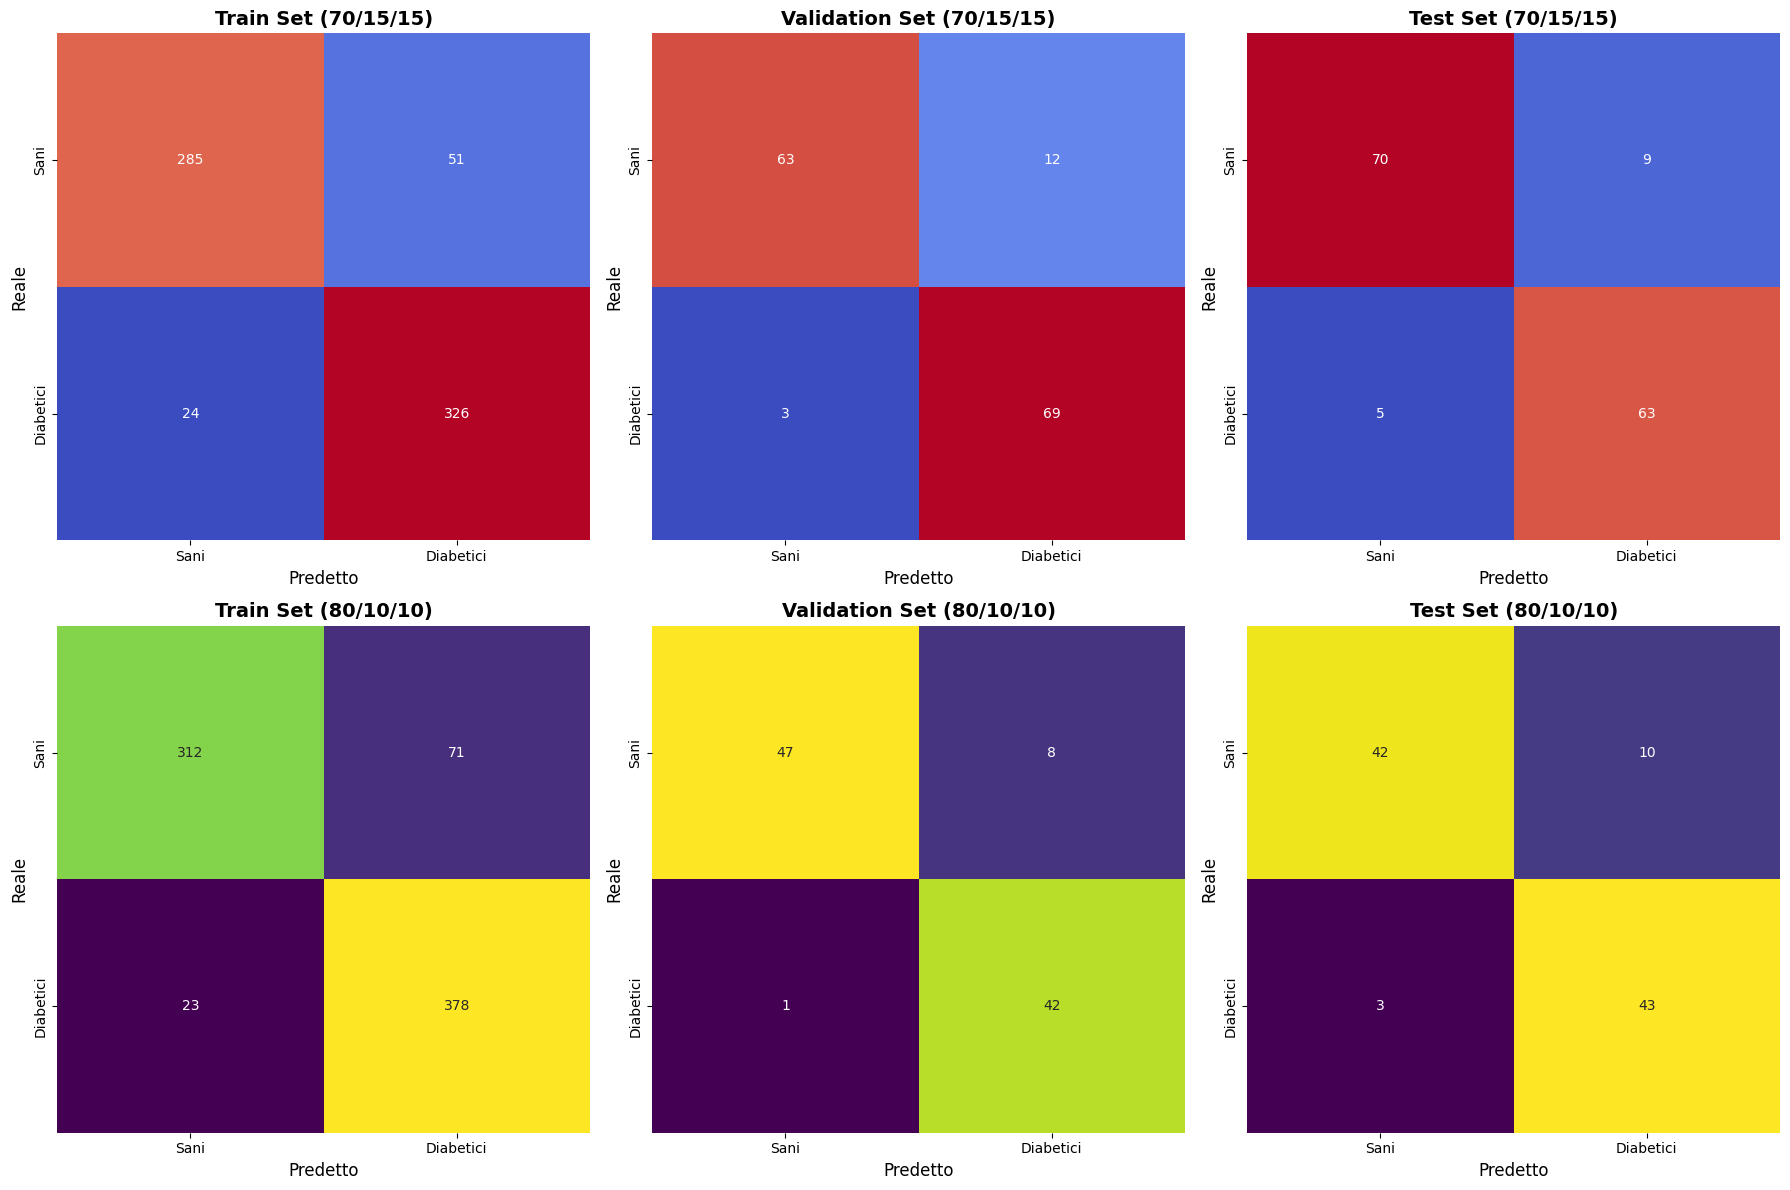

In [414]:
# Definizione delle etichette delle classi
class_labels = ["Sani", "Diabetici"]

# Creazione della figura per le confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Titoli per i grafici
titles = [
    "Train Set (70/15/15)", "Validation Set (70/15/15)", "Test Set (70/15/15)",
    "Train Set (80/10/10)", "Validation Set (80/10/10)", "Test Set (80/10/10)"
]

# Liste delle confusion matrix per ogni set di dati
cm_data = [
    confusion_matrix(y_train, y_pred_train_dt),
    confusion_matrix(y_val, y_pred_val_dt),
    confusion_matrix(y_test, y_pred_test_dt),
    confusion_matrix(y_train2, y_pred_train_dt2),
    confusion_matrix(y_val2, y_pred_val_dt2),
    confusion_matrix(y_test2, y_pred_test_dt2)
]

# Loop per creare ogni subplot con la rispettiva matrice di confusione
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_data[i], annot=True, fmt='d', cmap='coolwarm' if i < 3 else 'viridis', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

# Miglioramento della disposizione dei grafici
plt.tight_layout()
plt.show()


Conclusioni:
- 70/15/15:
  - **Più stabile** e con **meno falsi positivi**, il che è utile se l'obiettivo è evitare falsi allarmi.

- 80/10/10:
  - **Riduce i falsi negativi**, rendendolo preferibile in scenari dove **è cruciale identificare correttamente i diabetici**, anche **a costo di qualche falso positivo**.

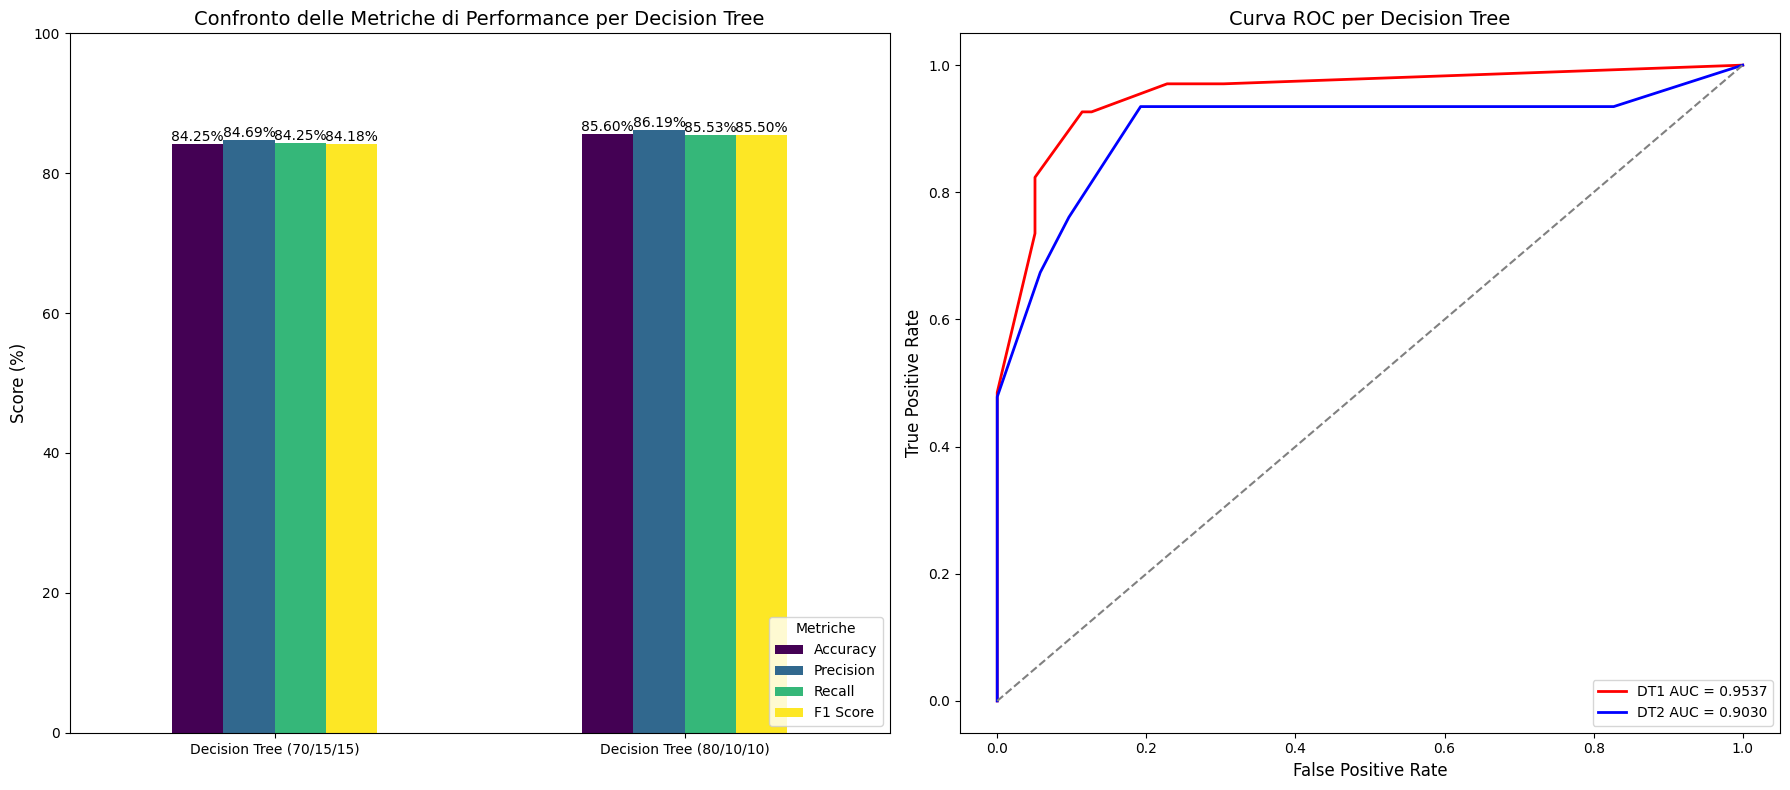

In [415]:
# Risultati della Cross-Validation
accuracy_dt = round(np.mean(cv_scores_70['accuracy']), 6)
precision_dt = round(np.mean(cv_scores_70['precision']), 6)
recall_dt = round(np.mean(cv_scores_70['recall']), 6)
f1_dt = round(np.mean(cv_scores_70['f1-score']), 6)

accuracy_dt2 = round(np.mean(cv_scores_80['accuracy']), 6)
precision_dt2 = round(np.mean(cv_scores_80['precision']), 6)
recall_dt2 = round(np.mean(cv_scores_80['recall']), 6)
f1_dt2 = round(np.mean(cv_scores_80['f1-score']), 6)

# DataFrame con le Metriche di Performance
performance_dt_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree (70/15/15)': [accuracy_dt * 100, precision_dt * 100, recall_dt * 100, f1_dt * 100],
    'Decision Tree (80/10/10)': [accuracy_dt2 * 100, precision_dt2 * 100, recall_dt2 * 100, f1_dt2 * 100]
}).set_index('Metric').T

# Curva ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])  # ROC per Decision Tree (70/15/15)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_dt2, tpr_dt2, _ = roc_curve(y_test2, dt_model2.predict_proba(X_test2)[:, 1])  # ROC per Decision Tree (80/10/10)
roc_auc_dt2 = auc(fpr_dt2, tpr_dt2)

# Creazione della figura
fig, axes = plt.subplots(1, 2, figsize=(18, 8))



### Grafico delle metriche di performance
performance_dt_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per Decision Tree", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni sopra le barre
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)



### Grafico della Curva ROC
axes[1].plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'DT1 AUC = {roc_auc_dt:.4f}')
axes[1].plot(fpr_dt2, tpr_dt2, color='blue', lw=2, label=f'DT2 AUC = {roc_auc_dt2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per Decision Tree", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)



# Miglioramento del layout
plt.tight_layout()
plt.show()

Conclusioni:
- Confronto delle Metriche di Performance per Decision Tree:
  - Modello 70/15/15 ha un **leggero vantaggio in tutte le metriche** rispetto al modello 80/10/10, ma la **differenza è minima** (circa 0.4% - 0.5%).
  - La suddivisione 70/15/15 sembra **leggermente più stabile** in termini di performance globale.

- Curva ROC per Decision Tree:
  - La curva ROC di DT1 è **più vicina all'angolo superiore sinistro**, suggerendo che ha una **sensibilità più alta** per la stessa specificità rispetto a DT2.
  - Il modello 70/15/15 (red) ha una **migliore discriminazione** tra le classi rispetto a 80/10/10 (blue).

##### **Random Forest Classifier**

Il Random Forest Classifier è un modello di machine learning **supervisionato** utilizzato per la classificazione dei dati. Si basa su **un insieme di alberi decisionali** (decision trees) che lavorano in modo collaborativo per migliorare le prestazioni complessive del modello.

**Ogni albero** nella foresta è costruito su **un sottoinsieme casuale dei dati e delle caratteristiche** (tecnica di bagging). La predizione finale viene determinata attraverso un processo di **voto di maggioranza tra gli alberi**, il che rende il modello **robusto contro l’overfitting** e adatto per gestire dataset complessi e sbilanciati.

###### **Addestramento dei modelli**


Si addestrano due Random Forest sui **due differenti split** (70/15/15 e 80/10/10).

Per ottenere i risultati migliori, abbiamo ottimizzato il modello impostando i seguenti **iperparametri**:
- `max_depth`, limitando **la complessità degli alberi individuali** per **evitare che si adattino troppo** ai dati di training.
- `min_samples_split`, specificando **un numero minimo di campioni** richiesti per **dividere un nodo** (facendo cosi, si riduce la probabilità di overfitting).
- `n_estimators`, indicando **un numero elevato di alberi** per **migliorare la stabilità e la precisione**, anche se questo **aumenta i tempi di calcolo**.

In [278]:
# Addestramento del modello sul training set (70/15/15)
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=300,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=0.8,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    class_weight='balanced',
    criterion='gini'
)
rf_model.fit(X_train, y_train)

# Addestramento del modello sul training set (80/10/10)
rf_model2 = RandomForestClassifier(
    random_state=42,
    n_estimators=300,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=0.8,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    class_weight='balanced',
    criterion='gini'
)
rf_model2.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=0.8,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [267]:
# Definiamo il grid dei parametri da esplorare
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.8],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'n_jobs': [-1],  # Usa tutti i core disponibili
    'random_state': [42],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

# Creazione del RandomizedSearchCV per il modello (70/15/15)
random_search_70 = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Numero di combinazioni casuali
    scoring='accuracy',  # Puoi scegliere un altro parametro come precision, recall, etc.
    cv=10,  # 10-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Addestramento del modello con RandomizedSearchCV sul training set (70/15/15)
random_search_70.fit(X_train, y_train)

# Creazione del modello con i migliori parametri
best_rf_model_70 = random_search_70.best_estimator_

# Mostra i migliori parametri trovati per ogni set
print("Migliori parametri per il modello (70/15/15):")
print(random_search_70.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento (sia per il 70/15/15 che per l'80/10/10).

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [279]:
# Creazione della cross-validation con StratifiedKFold (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation su training set (70/15/15)
cv_scores_rf_70 = my_cross_validation(rf_model, X_train, y_train, cv=kfold)

# Esecuzione della cross-validation su training set (80/10/10)
cv_scores_rf_80 = my_cross_validation(rf_model2, X_train2, y_train2, cv=kfold)

# Creazione di un DataFrame per mostrare i risultati della cross-validation
cv_summary_rf_df = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (70/15/15)': [round(np.mean(cv_scores_rf_70['accuracy']), 6),
                         round(np.mean(cv_scores_rf_70['precision']), 6),
                         round(np.mean(cv_scores_rf_70['recall']), 6),
                         round(np.mean(cv_scores_rf_70['f1-score']), 6)],
    '95% CI (70/15/15)': [confidence_interval(cv_scores_rf_70['accuracy']),
                           confidence_interval(cv_scores_rf_70['precision']),
                           confidence_interval(cv_scores_rf_70['recall']),
                           confidence_interval(cv_scores_rf_70['f1-score'])],
    'Media (80/10/10)': [round(np.mean(cv_scores_rf_80['accuracy']), 6),
                         round(np.mean(cv_scores_rf_80['precision']), 6),
                         round(np.mean(cv_scores_rf_80['recall']), 6),
                         round(np.mean(cv_scores_rf_80['f1-score']), 6)],
    '95% CI (80/10/10)': [confidence_interval(cv_scores_rf_80['accuracy']),
                           confidence_interval(cv_scores_rf_80['precision']),
                           confidence_interval(cv_scores_rf_80['recall']),
                           confidence_interval(cv_scores_rf_80['f1-score'])]
})

cv_summary_rf_df.set_index('Metrica', inplace=True)
cv_summary_rf_df.index.name = None
cv_summary_rf_df

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni fold, con media pari a 0.89497016 ---

[0.92753623 0.91304348 0.86956522 0.94202899 0.91304348 0.85507246
 0.85294118 0.89705882 0.92647059 0.85294118]

Intervallo di confidenza 95%: (0.87031, 0.91963)

--- Precision di ogni fold, con media pari a 0.89896959 ---

[0.92773109 0.91808149 0.87204392 0.94318182 0.91923077 0.85641892
 0.86540199 0.89756944 0.92708333 0.86295314]

Intervallo di confidenza 95%: (0.875962, 0.921977)

--- Recall di ogni fold, con media pari a 0.89491469 ---

[0.92773109 0.91386555 0.87016807 0.94243697 0.91218487 0.85462185
 0.85021645 0.8965368  0.92597403 0.85541126]

Intervallo di confidenza 95%: (0.870186, 0.919643)

--- F1-score di ogni fold, con media pari a 0.89457628 ---

[0.92753623 0.91287879 0.86945554 0.94201681 0.91258446 0.85479798
 0.85087719 0.89685807 0.92632719 0.85243056]

Intervallo di confidenza 95%: (0.869671, 0.919481)

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni 

Media (70/15/15)     95% CI (70/15/15)  Media (80/10/10)  \
Accuracy           0.894970    (0.87031, 0.91963)          0.903132   
Precision          0.898970  (0.875962, 0.921977)          0.904262   
Recall             0.894915  (0.870186, 0.919643)          0.903062   
F1 Score           0.894576  (0.869671, 0.919481)          0.902981   

              95% CI (80/10/10)  
Accuracy   (0.877429, 0.928835)  
Precision   (0.878654, 0.92987)  
Recall     (0.877167, 0.928957)  
F1 Score   (0.877204, 0.928757)

Conclusioni:
- Entrambi i modelli (70/15/15 e 80/10/10) mostrano buone performance complessive con valori medi elevati per tutte le metriche (Accuracy, Precision, Recall, F1 Score), indicando che il modello è ben bilanciato e generalizza bene sui dati senza segni evidenti di overfitting.
- La suddivisione 80/10/10 mostra un **leggero miglioramento in tutte le metriche** rispetto alla suddivisione 70/15/15. Questo suggerisce che l'uso di un set di training più ampio contribuisce a un apprendimento migliore. Tuttavia, i miglioramenti sono marginali (circa 0.6% - 0.8% in media), quindi **il vantaggio** ottenuto dall'uso di più dati per l'addestramento **è minimo**.
- La suddivisione 80/10/10 tende ad avere intervalli di confidenza **leggermente più stretti** per Precision e Recall, suggerendo una maggiore stabilità nei risultati.

Dunque, la suddivisione 80/10/10 può essere **preferita** se si **desidera massimizzare l'apprendimento** del modello, data la **leggera superiorità delle metriche**. Tuttavia, se **la stabilità e la riduzione della variabilità** nei risultati sono un obiettivo prioritario, la suddivisione 70/15/15 potrebbe essere **più appropriata**, specialmente in contesti dove il validation set è fondamentale per l'ottimizzazione dell'iperparametro.

###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Decision Tree sui set di training, validation e test, per due diverse suddivisioni dei dati (70/15/15 e 80/10/10).

Per il miglior controllo di overfitting, si calcola la differenza tra Training e Test per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.





In [280]:
# Predizioni sui diversi set per verificare l'overfitting con Random Forest
y_pred_train_rf = rf_model.predict(X_train)
y_pred_val_rf = rf_model.predict(X_val)
y_pred_test_rf = rf_model.predict(X_test)

y_pred_train_rf2 = rf_model2.predict(X_train2)
y_pred_val_rf2 = rf_model2.predict(X_val2)
y_pred_test_rf2 = rf_model2.predict(X_test2)

# Creazione del DataFrame con le metriche per visualizzare l'overfitting
performance_rf_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy (70/15/15)': [accuracy_score(y_train, y_pred_train_rf), accuracy_score(y_val, y_pred_val_rf), accuracy_score(y_test, y_pred_test_rf)],
    'Precision (70/15/15)': [precision_score(y_train, y_pred_train_rf, average='macro'), precision_score(y_val, y_pred_val_rf, average='macro'), precision_score(y_test, y_pred_test_rf, average='macro')],
    'Recall (70/15/15)': [recall_score(y_train, y_pred_train_rf, average='macro'), recall_score(y_val, y_pred_val_rf, average='macro'), recall_score(y_test, y_pred_test_rf, average='macro')],
    'F1 Score (70/15/15)': [f1_score(y_train, y_pred_train_rf, average='macro'), f1_score(y_val, y_pred_val_rf, average='macro'), f1_score(y_test, y_pred_test_rf, average='macro')],
    'Accuracy (80/10/10)': [accuracy_score(y_train2, y_pred_train_rf2), accuracy_score(y_val2, y_pred_val_rf2), accuracy_score(y_test2, y_pred_test_rf2)],
    'Precision (80/10/10)': [precision_score(y_train2, y_pred_train_rf2, average='macro'), precision_score(y_val2, y_pred_val_rf2, average='macro'), precision_score(y_test2, y_pred_test_rf2, average='macro')],
    'Recall (80/10/10)': [recall_score(y_train2, y_pred_train_rf2, average='macro'), recall_score(y_val2, y_pred_val_rf2, average='macro'), recall_score(y_test2, y_pred_test_rf2, average='macro')],
    'F1 Score (80/10/10)': [f1_score(y_train2, y_pred_train_rf2, average='macro'), f1_score(y_val2, y_pred_val_rf2, average='macro'), f1_score(y_test2, y_pred_test_rf2, average='macro')]
})

# Calcolo della differenza tra Train e Test per ogni metrica
performance_rf_df["Accuracy Gap (Train - Test)"] = performance_rf_df["Accuracy (70/15/15)"] - performance_rf_df["Accuracy (80/10/10)"]
performance_rf_df["F1 Score Gap (Train - Test)"] = performance_rf_df["F1 Score (70/15/15)"] - performance_rf_df["F1 Score (80/10/10)"]

print("Random Forest Performance Overfitting Check with Gaps")
performance_rf_df.set_index('Set', inplace=True)
performance_rf_df.index.name = None
performance_rf_df


Random Forest Performance Overfitting Check with Gaps


Accuracy (70/15/15)  Precision (70/15/15)  Recall (70/15/15)  \
Train                  1.000000              1.000000           1.000000   
Validation             0.925170              0.926623           0.925833   
Test                   0.897959              0.897761           0.896873   

            F1 Score (70/15/15)  Accuracy (80/10/10)  Precision (80/10/10)  \
Train                  1.000000             1.000000              1.000000   
Validation             0.925156             0.897959              0.896120   
Test                   0.897275             0.887755              0.887755   

            Recall (80/10/10)  F1 Score (80/10/10)  \
Train                1.000000             1.000000   
Validation           0.901480             0.897275   
Test                 0.889214             0.887650   

            Accuracy Gap (Train - Test)  F1 Score Gap (Train - Test)  
Train                          0.000000                     0.000000  
Validation                     0.027211                     0.027882  
Test                           0.010204                     0.009625

Conclusioni:
  - ..
  - ..

###### **Matrici di correlazione e grafici**

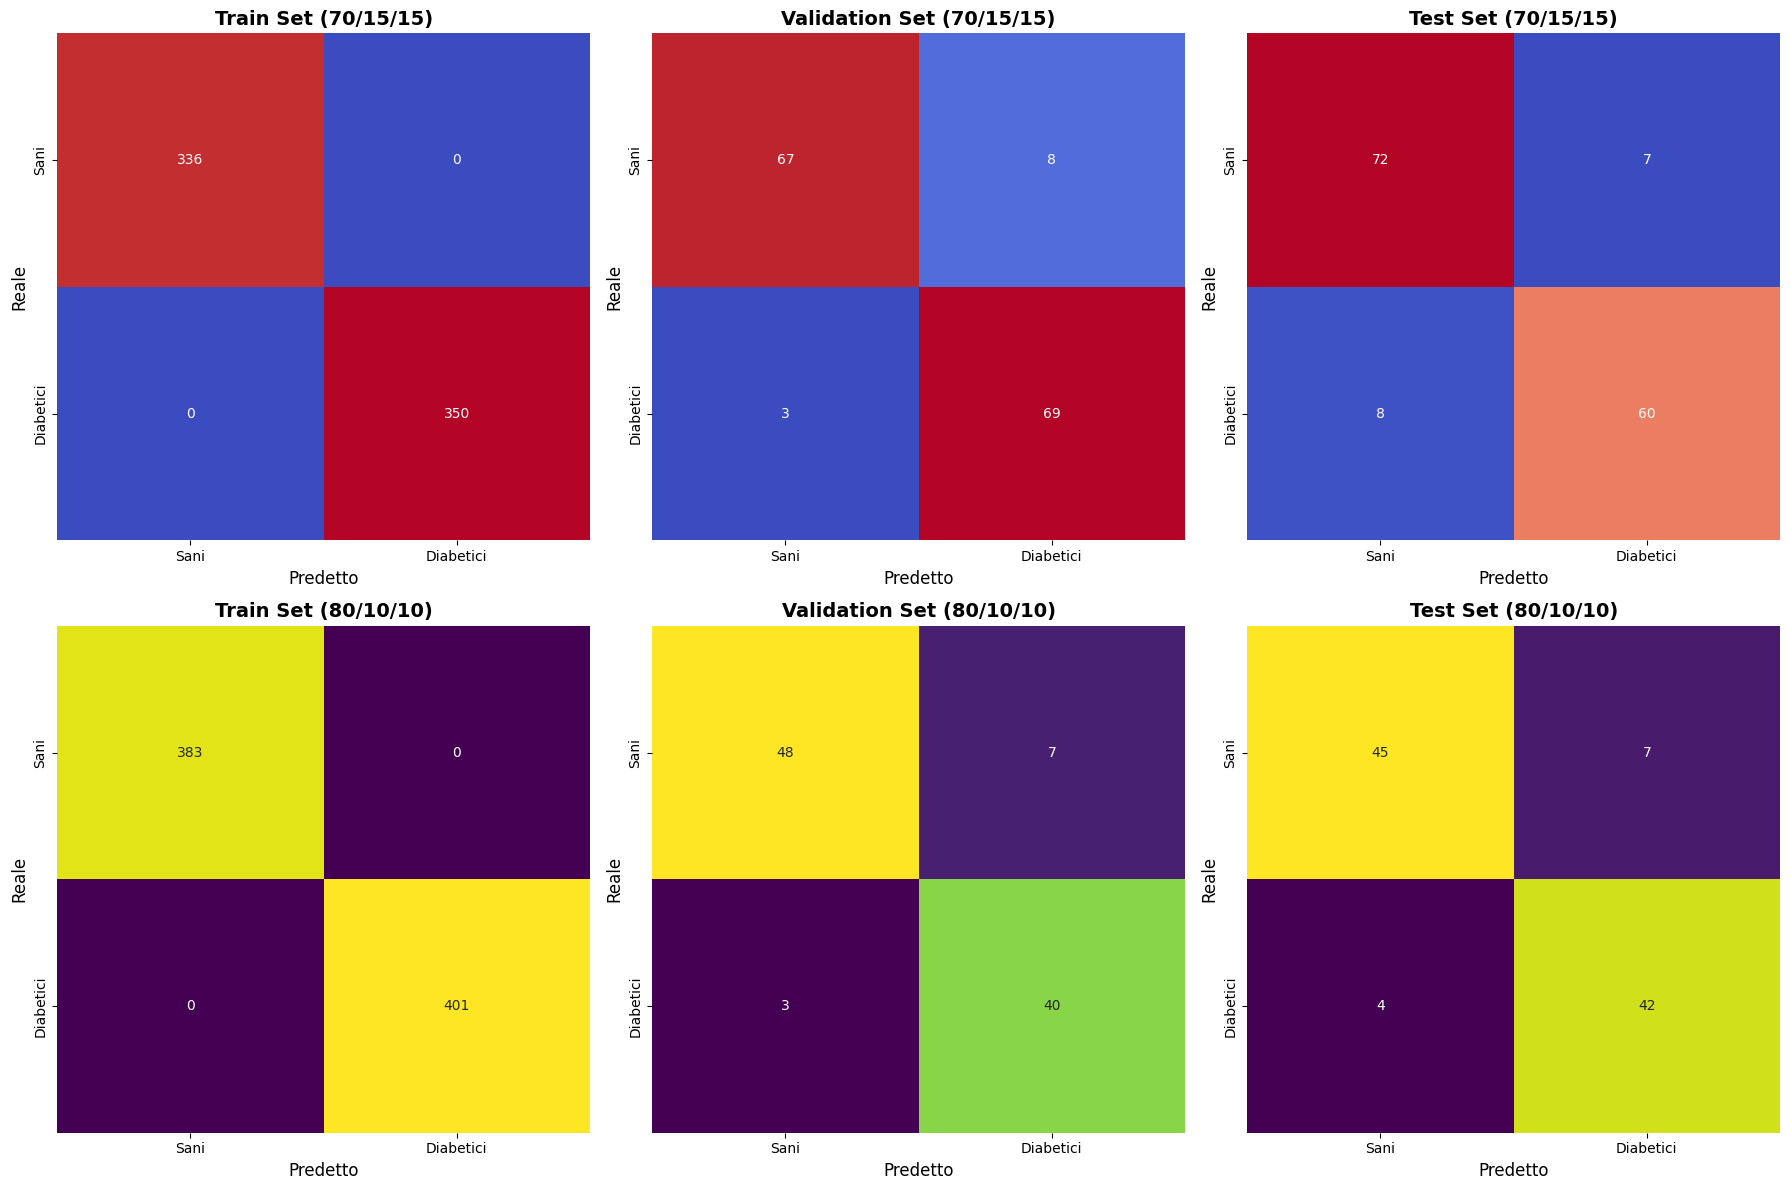

In [281]:
# Definizione delle etichette delle classi
class_labels = ["Sani", "Diabetici"]

# Creazione della figura per le confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Titoli per i grafici
titles = [
    "Train Set (70/15/15)", "Validation Set (70/15/15)", "Test Set (70/15/15)",
    "Train Set (80/10/10)", "Validation Set (80/10/10)", "Test Set (80/10/10)"
]

# Liste delle confusion matrix per ogni set di dati con Random Forest
cm_rf_data = [
    confusion_matrix(y_train, y_pred_train_rf),
    confusion_matrix(y_val, y_pred_val_rf),
    confusion_matrix(y_test, y_pred_test_rf),
    confusion_matrix(y_train2, y_pred_train_rf2),
    confusion_matrix(y_val2, y_pred_val_rf2),
    confusion_matrix(y_test2, y_pred_test_rf2)
]

# Loop per creare ogni subplot con la rispettiva matrice di confusione
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_rf_data[i], annot=True, fmt='d', cmap='coolwarm' if i < 3 else 'viridis', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

# Miglioramento della disposizione dei grafici
plt.tight_layout()
plt.show()


Conclusioni:
  - ..
  - ..

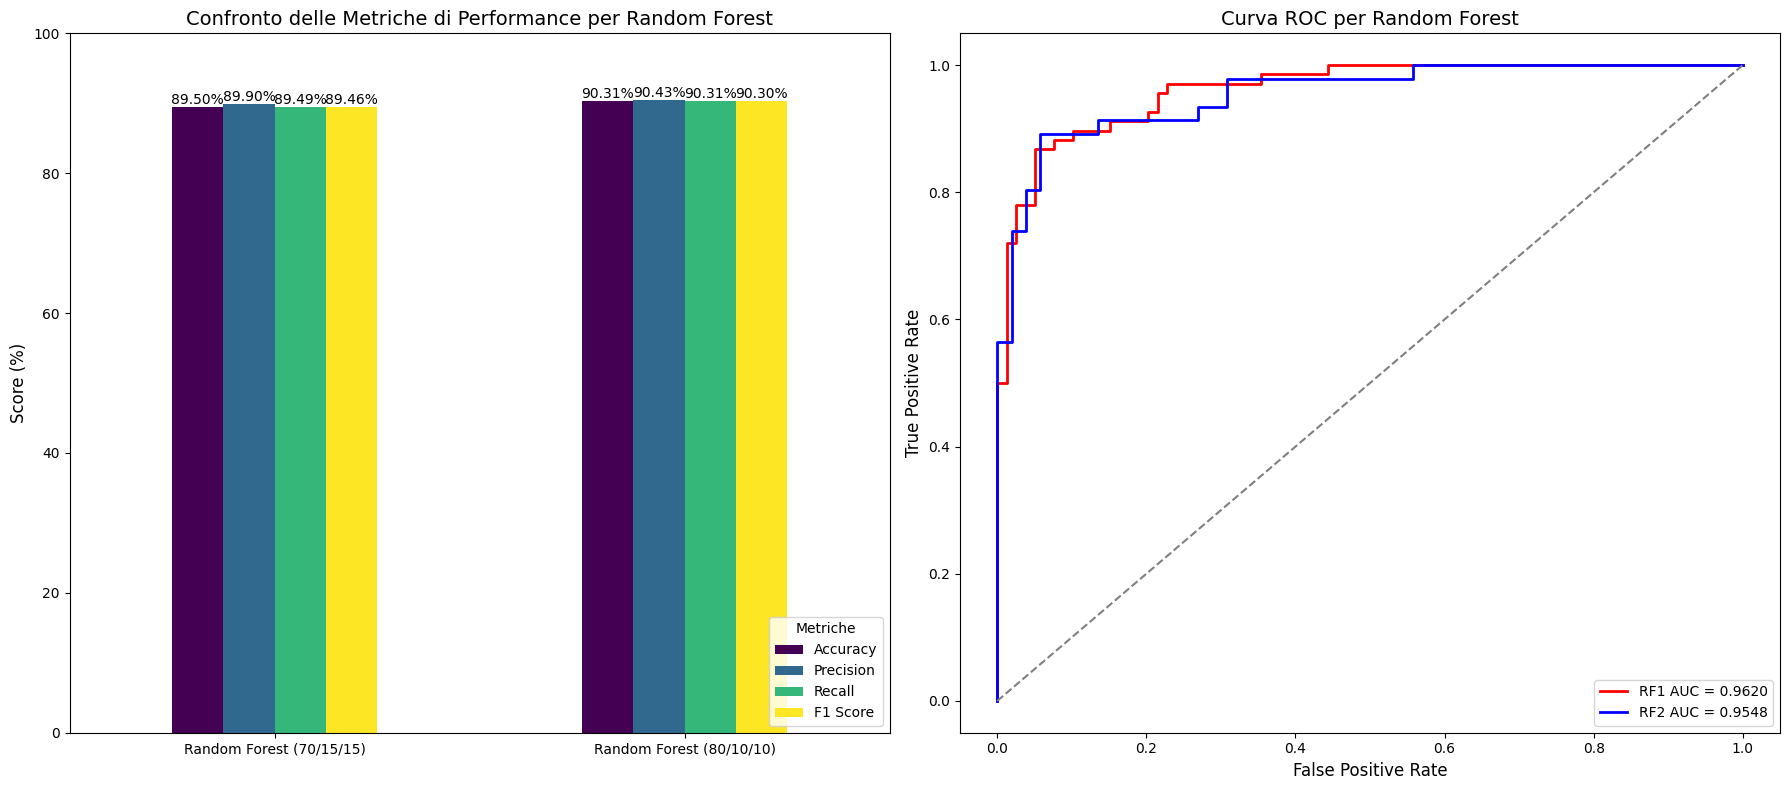

In [282]:
# Risultati della Cross-Validation per Random Forest
accuracy_rf = round(np.mean(cv_scores_rf_70['accuracy']), 6)
precision_rf = round(np.mean(cv_scores_rf_70['precision']), 6)
recall_rf = round(np.mean(cv_scores_rf_70['recall']), 6)
f1_rf = round(np.mean(cv_scores_rf_70['f1-score']), 6)

accuracy_rf2 = round(np.mean(cv_scores_rf_80['accuracy']), 6)
precision_rf2 = round(np.mean(cv_scores_rf_80['precision']), 6)
recall_rf2 = round(np.mean(cv_scores_rf_80['recall']), 6)
f1_rf2 = round(np.mean(cv_scores_rf_80['f1-score']), 6)

# DataFrame con le Metriche di Performance per Random Forest
performance_rf_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest (70/15/15)': [accuracy_rf * 100, precision_rf * 100, recall_rf * 100, f1_rf * 100],
    'Random Forest (80/10/10)': [accuracy_rf2 * 100, precision_rf2 * 100, recall_rf2 * 100, f1_rf2 * 100]
}).set_index('Metric').T

# Curva ROC per Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])  # ROC per Random Forest (70/15/15)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_rf2, tpr_rf2, _ = roc_curve(y_test2, rf_model2.predict_proba(X_test2)[:, 1])  # ROC per Random Forest (80/10/10)
roc_auc_rf2 = auc(fpr_rf2, tpr_rf2)

# Creazione della figura
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### Grafico delle metriche di performance per Random Forest
performance_rf_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per Random Forest", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### Grafico della Curva ROC per Random Forest
axes[1].plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'RF1 AUC = {roc_auc_rf:.4f}')
axes[1].plot(fpr_rf2, tpr_rf2, color='blue', lw=2, label=f'RF2 AUC = {roc_auc_rf2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per Random Forest", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

# Miglioramento del layout
plt.tight_layout()
plt.show()


Conclusioni:
  - ..
  - ..

##### **Support Vector Machine Classifier**

Il Support Vector Machine (SVM) è un modello di machine learning **supervisionato** utilizzato per la classificazione dei dati. Si basa sul concetto di **iperpiano ottimale**, che **separa le classi massimizzando il margine tra i punti dati più vicini** (support vectors).

L'SVM può essere utilizzato con diverse **funzioni di kernel** per adattarsi a distribuzioni di **dati non lineari**:

- Linear Kernel: utile per dati separabili linearmente.

- Polynomial Kernel: applica una trasformazione polinomiale ai dati.

- RBF (Radial Basis Function) Kernel: il più comune, adatto a problemi complessi con separabilità non lineare.

- Sigmoid Kernel: utilizzato in scenari specifici, come il riconoscimento di pattern.

L'SVM è particolarmente efficace nei problemi di **classificazione binaria** ed è noto per la sua **robustezza rispetto agli outlier** e alla **capacità di generalizzazione**.

###### **Addestramento dei modelli**


Si addestrano due modelli Support Vector Machine (SVM) sui due differenti split (70/15/15 e 80/10/10).

Per ottenere i risultati migliori, abbiamo ottimizzato il modello impostando i seguenti iperparametri:

- kernel: specifica **il tipo di funzione** utilizzata per **separare i dati** (lineare, polinomiale, RBF, sigmoid). L'RBF è il più comune per problemi non linearmente separabili.
- C (Regularization Parameter): controlla **la penalizzazione degli errori** di classificazione. Un valore elevato **riduce gli errori**, ma **può portare a overfitting**.
- gamma: **regola l'influenza dei singoli punti di addestramento** nel caso di **kernel non lineari**. Valori alti rendono **il modello più complesso** e **sensibile ai dati** di training.

Da notare che il modello SVM con **kernel RBF** è stato scelto perché offre una buona capacità di generalizzazione anche in scenari con dati non linearmente separabili.

In [237]:
# Creazione del modello SVC
svm_model = SVC(probability=True, random_state=42)

# Parametri da esplorare
param_dist = {
    'C': loguniform(1e-6, 1e3),        # Esplora valori di C tra 1e-3 e 1e3
    'gamma': ['scale', 'auto'],   # Usa 'scale' o 'auto', e esplora un range per float
    'kernel': ['rbf', 'poly', 'sigmoid'],  # Kernel da esplorare
    'degree': [3, 4, 5],                # Grado del polinomio per 'poly'
    'class_weight': [None, 'balanced'], # Per gestire classi sbilanciate
}

# Esegui RandomizedSearchCV con i parametri definiti
random_search_svm = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=20,    # Numero di iterazioni
    cv=10,         # 10-fold cross-validation
    n_jobs=-1,    # Usa tutti i core
    verbose=2,    # Mostra il progresso
    random_state=42,
    scoring='accuracy'
)

# Esegui la ricerca
random_search_svm.fit(X_train, y_train)

# Risultati migliori
print("Migliori parametri trovati:", random_search_svm.best_params_)

# Accedi al miglior modello
best_model_svm = random_search_svm.best_estimator_

# Valutazione finale sul test set
score_svm = best_model_svm.score(X_test, y_test)
print(f"Accuratezza del miglior modello (random search): {score_svm}")


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Migliori parametri trovati: {'C': 1.4391207615728072, 'class_weight': None, 'degree': 5, 'gamma': 'auto', 'kernel': 'rbf'}
Accuratezza del miglior modello (random search): 0.8707482993197279


In [248]:
# Addestramento del modello sul training set (70/15/15)
svm_model = SVC(
    kernel='rbf',       # Kernel Radial Basis Function (RBF)
    C=1.7304250536613737,              # Parametro di regolarizzazione
    gamma='scale',      # Parametro gamma per il kernel
    probability=True,   # Permette di ottenere probabilità per la curva ROC
    random_state=42,
)
svm_model.fit(X_train, y_train)

# Addestramento del modello sul training set (80/10/10)
svm_model2 = SVC(
    kernel='rbf',
    C=1.7304250536613737,
    gamma='scale',
    probability=True,
    random_state=42,
)
svm_model2.fit(X_train2, y_train2)

SVC(C=1.7304250536613737, probability=True, random_state=42)

###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento (sia per il 70/15/15 che per l'80/10/10).

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [249]:
# Creazione della cross-validation con StratifiedKFold (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation su training set (70/15/15)
cv_scores_svm_70 = my_cross_validation(svm_model, X_train, y_train, cv=kfold)

# Esecuzione della cross-validation su training set (80/10/10)
cv_scores_svm_80 = my_cross_validation(svm_model2, X_train2, y_train2, cv=kfold)

# Creazione di un DataFrame per mostrare i risultati della cross-validation
cv_summary_svm_df = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (70/15/15)': [round(np.mean(cv_scores_svm_70['accuracy']), 6),
                         round(np.mean(cv_scores_svm_70['precision']), 6),
                         round(np.mean(cv_scores_svm_70['recall']), 6),
                         round(np.mean(cv_scores_svm_70['f1-score']), 6)],
    '95% CI (70/15/15)': [confidence_interval(cv_scores_svm_70['accuracy']),
                           confidence_interval(cv_scores_svm_70['precision']),
                           confidence_interval(cv_scores_svm_70['recall']),
                           confidence_interval(cv_scores_svm_70['f1-score'])],
    'Media (80/10/10)': [round(np.mean(cv_scores_svm_80['accuracy']), 6),
                         round(np.mean(cv_scores_svm_80['precision']), 6),
                         round(np.mean(cv_scores_svm_80['recall']), 6),
                         round(np.mean(cv_scores_svm_80['f1-score']), 6)],
    '95% CI (80/10/10)': [confidence_interval(cv_scores_svm_80['accuracy']),
                           confidence_interval(cv_scores_svm_80['precision']),
                           confidence_interval(cv_scores_svm_80['recall']),
                           confidence_interval(cv_scores_svm_80['f1-score'])]
})

cv_summary_svm_df.set_index('Metrica', inplace=True)
cv_summary_svm_df.index.name = None
cv_summary_svm_df

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni fold, con media pari a 0.84254049 ---

[0.89855072 0.82608696 0.86956522 0.82608696 0.88405797 0.76811594
 0.85294118 0.83823529 0.86764706 0.79411765]

Intervallo di confidenza 95%: (0.813558, 0.871523)

--- Precision di ogni fold, con media pari a 0.84579420 ---

[0.8989899  0.83577586 0.87204392 0.82605042 0.88974359 0.76900338
 0.85853227 0.84027778 0.86979167 0.79773322]

Intervallo di confidenza 95%: (0.816672, 0.874916)

--- Recall di ogni fold, con media pari a 0.84276674 ---

[0.89831933 0.82731092 0.87016807 0.82605042 0.88319328 0.76764706
 0.85108225 0.83939394 0.86883117 0.795671  ]

Intervallo di confidenza 95%: (0.813944, 0.871589)

--- F1-score di ogni fold, con media pari a 0.84218084 ---

[0.89846542 0.82516892 0.86945554 0.82605042 0.88344595 0.76767677
 0.85178727 0.8382003  0.86761843 0.79393939]

Intervallo di confidenza 95%: (0.813174, 0.871187)

Cross-validation eseguita con 10 fold:
--- Accuracy di ogn

Media (70/15/15)     95% CI (70/15/15)  Media (80/10/10)  \
Accuracy           0.842540  (0.813558, 0.871523)          0.868728   
Precision          0.845794  (0.816672, 0.874916)          0.870368   
Recall             0.842767  (0.813944, 0.871589)          0.869200   
F1 Score           0.842181  (0.813174, 0.871187)          0.868625   

              95% CI (80/10/10)  
Accuracy    (0.841225, 0.89623)  
Precision  (0.842651, 0.898086)  
Recall     (0.841718, 0.896682)  
F1 Score   (0.841109, 0.896141)

Conclusioni:
  - ..
  - ..

###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Decision Tree sui set di training, validation e test, per due diverse suddivisioni dei dati (70/15/15 e 80/10/10).

Per il miglior controllo di overfitting, si calcola la differenza tra Training e Test per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.





In [250]:
# Predizioni sui diversi set per verificare l'overfitting con SVM
y_pred_train_svm = svm_model.predict(X_train)
y_pred_val_svm = svm_model.predict(X_val)
y_pred_test_svm = svm_model.predict(X_test)

y_pred_train_svm2 = svm_model2.predict(X_train2)
y_pred_val_svm2 = svm_model2.predict(X_val2)
y_pred_test_svm2 = svm_model2.predict(X_test2)

# Creazione del DataFrame con le metriche per visualizzare l'overfitting
performance_svm_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy (70/15/15)': [accuracy_score(y_train, y_pred_train_svm), accuracy_score(y_val, y_pred_val_svm), accuracy_score(y_test, y_pred_test_svm)],
    'Precision (70/15/15)': [precision_score(y_train, y_pred_train_svm, average='macro'), precision_score(y_val, y_pred_val_svm, average='macro'), precision_score(y_test, y_pred_test_svm, average='macro')],
    'Recall (70/15/15)': [recall_score(y_train, y_pred_train_svm, average='macro'), recall_score(y_val, y_pred_val_svm, average='macro'), recall_score(y_test, y_pred_test_svm, average='macro')],
    'F1 Score (70/15/15)': [f1_score(y_train, y_pred_train_svm, average='macro'), f1_score(y_val, y_pred_val_svm, average='macro'), f1_score(y_test, y_pred_test_svm, average='macro')],
    'Accuracy (80/10/10)': [accuracy_score(y_train2, y_pred_train_svm2), accuracy_score(y_val2, y_pred_val_svm2), accuracy_score(y_test2, y_pred_test_svm2)],
    'Precision (80/10/10)': [precision_score(y_train2, y_pred_train_svm2, average='macro'), precision_score(y_val2, y_pred_val_svm2, average='macro'), precision_score(y_test2, y_pred_test_svm2, average='macro')],
    'Recall (80/10/10)': [recall_score(y_train2, y_pred_train_svm2, average='macro'), recall_score(y_val2, y_pred_val_svm2, average='macro'), recall_score(y_test2, y_pred_test_svm2, average='macro')],
    'F1 Score (80/10/10)': [f1_score(y_train2, y_pred_train_svm2, average='macro'), f1_score(y_val2, y_pred_val_svm2, average='macro'), f1_score(y_test2, y_pred_test_svm2, average='macro')]
})

# Calcolo della differenza tra Train e Test per ogni metrica
performance_svm_df["Accuracy Gap (Train - Test)"] = performance_svm_df["Accuracy (70/15/15)"] - performance_svm_df["Accuracy (80/10/10)"]
performance_svm_df["F1 Score Gap (Train - Test)"] = performance_svm_df["F1 Score (70/15/15)"] - performance_svm_df["F1 Score (80/10/10)"]

print("SVM Performance Overfitting Check with Gaps")
performance_svm_df.set_index('Set', inplace=True)
performance_svm_df.index.name = None
performance_svm_df


SVM Performance Overfitting Check with Gaps


Accuracy (70/15/15)  Precision (70/15/15)  Recall (70/15/15)  \
Train                  0.908163              0.910153           0.908929   
Validation             0.918367              0.919199           0.918889   
Test                   0.870748              0.869844           0.870532   

            F1 Score (70/15/15)  Accuracy (80/10/10)  Precision (80/10/10)  \
Train                  0.908130             0.910714              0.911756   
Validation             0.918364             0.887755              0.886667   
Test                   0.870147             0.887755              0.887151   

            Recall (80/10/10)  F1 Score (80/10/10)  \
Train                0.911370             0.910709   
Validation           0.892389             0.887179   
Test                 0.887960             0.887462   

            Accuracy Gap (Train - Test)  F1 Score Gap (Train - Test)  
Train                         -0.002551                    -0.002579  
Validation                     0.030612                     0.031184  
Test                          -0.017007                    -0.017315

Conclusioni:
  - ..
  - ..

###### **Matrici di correlazione e grafici**

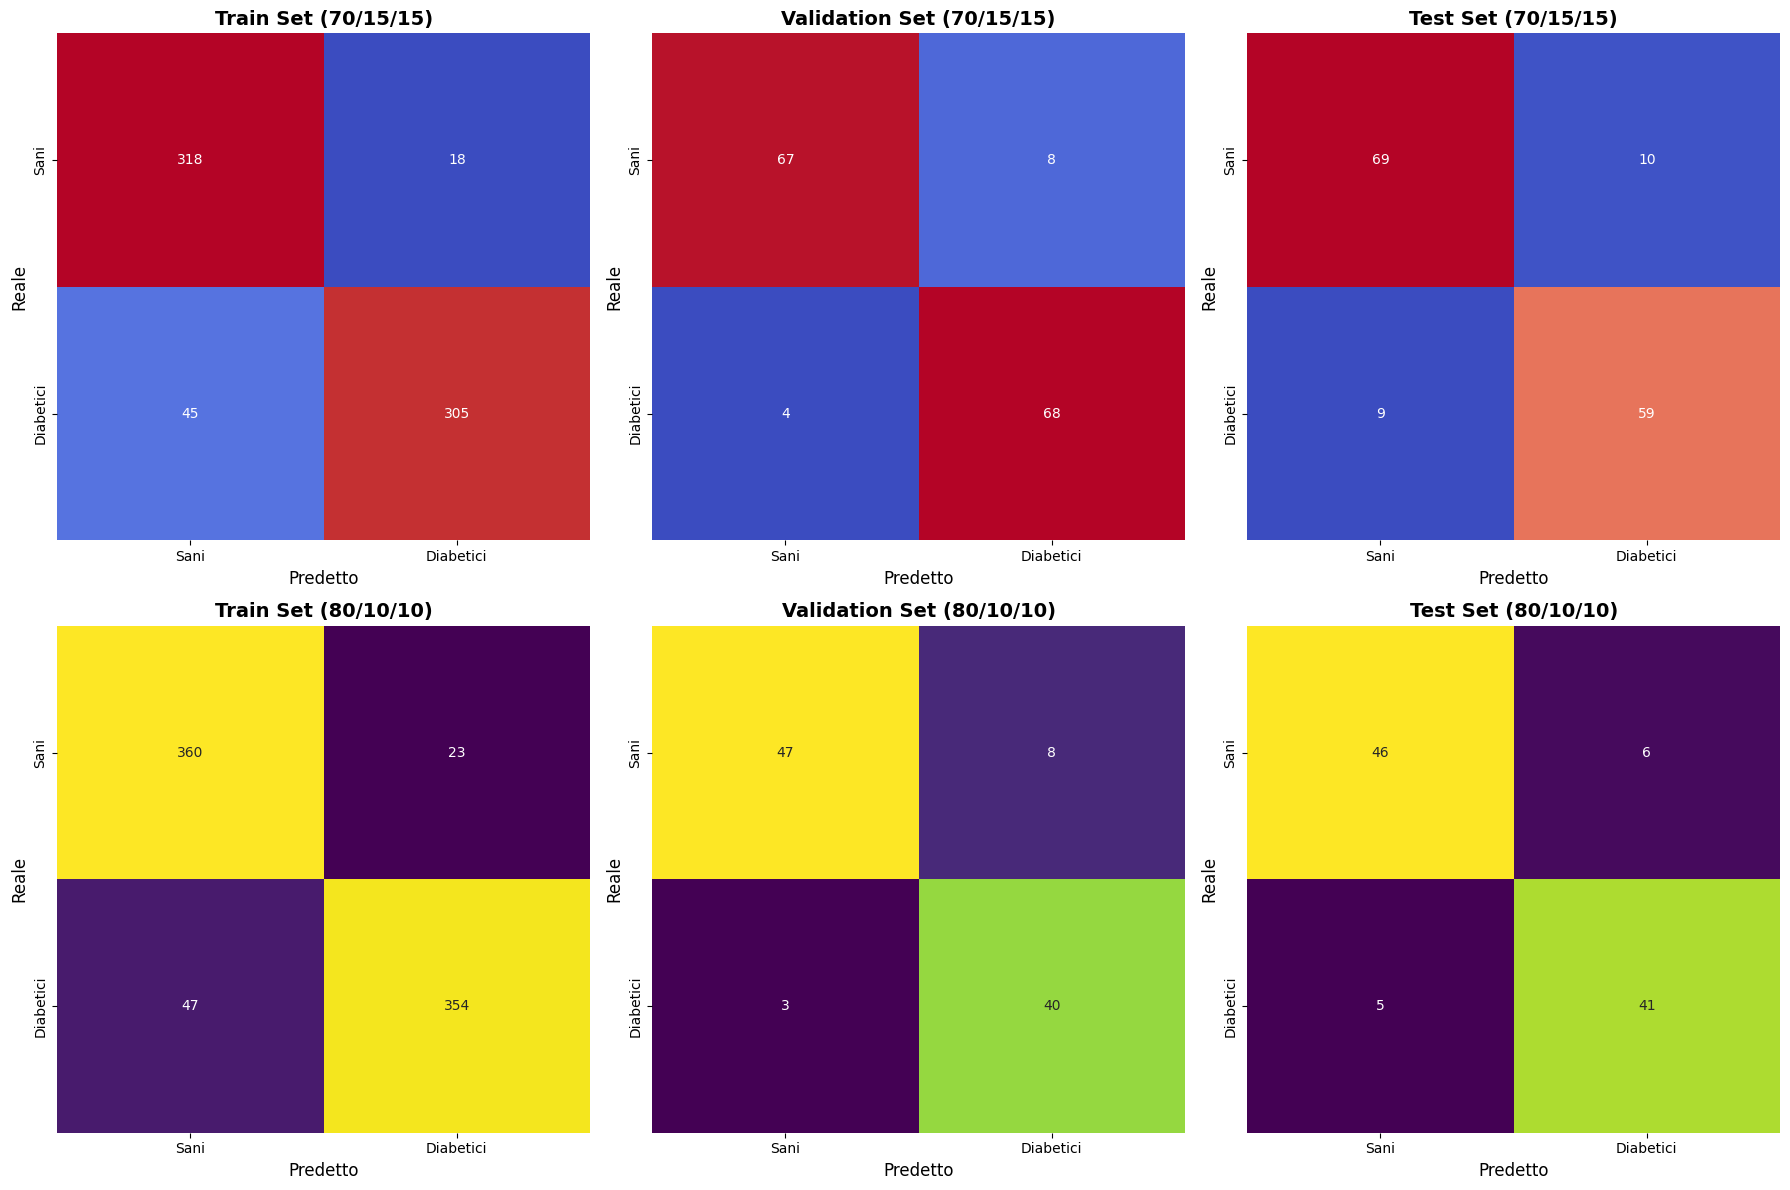

In [251]:
# Definizione delle etichette delle classi
class_labels = ["Sani", "Diabetici"]

# Creazione della figura per le confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Titoli per i grafici
titles = [
    "Train Set (70/15/15)", "Validation Set (70/15/15)", "Test Set (70/15/15)",
    "Train Set (80/10/10)", "Validation Set (80/10/10)", "Test Set (80/10/10)"
]

# Liste delle confusion matrix per ogni set di dati con SVM
cm_svm_data = [
    confusion_matrix(y_train, y_pred_train_svm),
    confusion_matrix(y_val, y_pred_val_svm),
    confusion_matrix(y_test, y_pred_test_svm),
    confusion_matrix(y_train2, y_pred_train_svm2),
    confusion_matrix(y_val2, y_pred_val_svm2),
    confusion_matrix(y_test2, y_pred_test_svm2)
]

# Loop per creare ogni subplot con la rispettiva matrice di confusione
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_svm_data[i], annot=True, fmt='d', cmap='coolwarm' if i < 3 else 'viridis', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

# Miglioramento della disposizione dei grafici
plt.tight_layout()
plt.show()


Conclusioni:
  - ..
  - ..

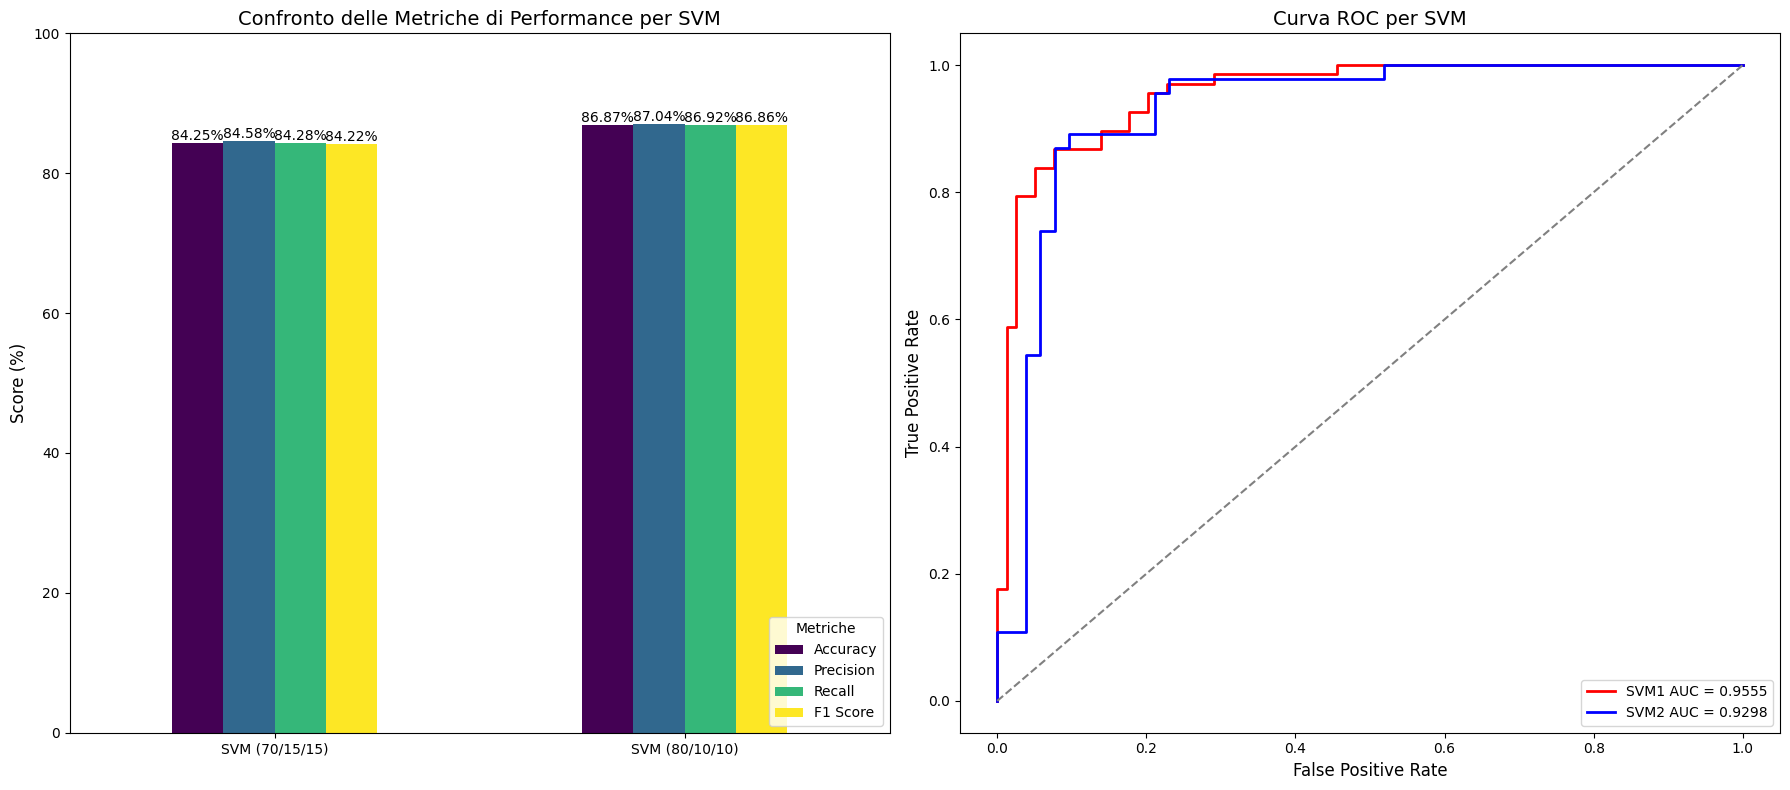

In [252]:
# Risultati della Cross-Validation per SVM
accuracy_svm = round(np.mean(cv_scores_svm_70['accuracy']), 6)
precision_svm = round(np.mean(cv_scores_svm_70['precision']), 6)
recall_svm = round(np.mean(cv_scores_svm_70['recall']), 6)
f1_svm = round(np.mean(cv_scores_svm_70['f1-score']), 6)

accuracy_svm2 = round(np.mean(cv_scores_svm_80['accuracy']), 6)
precision_svm2 = round(np.mean(cv_scores_svm_80['precision']), 6)
recall_svm2 = round(np.mean(cv_scores_svm_80['recall']), 6)
f1_svm2 = round(np.mean(cv_scores_svm_80['f1-score']), 6)

# DataFrame con le Metriche di Performance per SVM
performance_svm_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'SVM (70/15/15)': [accuracy_svm * 100, precision_svm * 100, recall_svm * 100, f1_svm * 100],
    'SVM (80/10/10)': [accuracy_svm2 * 100, precision_svm2 * 100, recall_svm2 * 100, f1_svm2 * 100]
}).set_index('Metric').T

# Curva ROC per SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))  # ROC per SVM (70/15/15)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_svm2, tpr_svm2, _ = roc_curve(y_test2, svm_model2.decision_function(X_test2))  # ROC per SVM (80/10/10)
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)

# Creazione della figura
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### Grafico delle metriche di performance per SVM
performance_svm_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per SVM", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### Grafico della Curva ROC per SVM
axes[1].plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM1 AUC = {roc_auc_svm:.4f}')
axes[1].plot(fpr_svm2, tpr_svm2, color='blue', lw=2, label=f'SVM2 AUC = {roc_auc_svm2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per SVM", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

# Miglioramento del layout
plt.tight_layout()
plt.show()


Conclusioni:
  - ..
  - ..

##### **Naive Bayes Classifier**


Il Naive Bayes Classifier è un modello di machine learning **supervisionato** utilizzato per la classificazione dei dati, basato sul **Teorema di Bayes** e sull’assunzione di **indipendenza condizionale tra le feature**.

Questo modello **calcola la probabilità** che **un’istanza appartenga a una determinata classe**, facendo l’ipotesi (spesso irrealistica, ma efficace in pratica) che **ogni variabile sia indipendente** dalle altre.

Naive Bayes è particolarmente utile per problemi di classificazione con dataset testuali (es. Spam Detection, Sentiment Analysis) o dataset con un numero elevato di feature. Grazie alla sua efficienza computazionale e alla capacità di funzionare bene anche con dataset piccoli, è una scelta popolare per molti problemi di classificazione.

Esistono diverse varianti di Naive Bayes, tra cui:

- Gaussian Naive Bayes (GNB): adatto per **dati continui** che seguono una **distribuzione normale**.
- Multinomial Naive Bayes: utilizzato per dati testuali e conteggi (es. classificazione di documenti).
- Bernoulli Naive Bayes: utile per dati binari (es. presenza o assenza di una parola in un testo).

Grazie alla sua semplicità e alla sua capacità di gestire dataset con molte feature, il Naive Bayes Classifier è spesso utilizzato come modello di riferimento per problemi di classificazione.

###### **Addestramento dei modelli**


Si addestrano due modelli Gaussian Naive Bayes sui due differenti split (70/15/15 e 80/10/10).

Poiché Gaussian Naive Bayes assume che le feature seguano una distribuzione normale (gaussiana), non sono richiesti molti iperparametri da ottimizzare. Tuttavia, possiamo regolare il parametro `var_smoothing`, che **aggiunge un piccolo valore alla varianza** per evitare problemi numerici con feature a varianza molto bassa.

Iperparametri utilizzati:
- `var_smoothing`: un valore piccolo per stabilizzare il calcolo delle probabilità.
  - Un valore più alto può migliorare la robustezza in presenza di varianze molto piccole.
  - Un valore troppo alto può ridurre la capacità del modello di catturare le differenze nei dati.

In [181]:
# Crea il modello di GaussianNB
gnb_model = GaussianNB()

# Definisci i parametri da esplorare
param_dist = {
    'var_smoothing': uniform(1e-9, 1e-1),  # Esplora valori tra 1e-9 e 1e-1
}

# Imposta RandomizedSearchCV
random_search_gnb = RandomizedSearchCV(
    estimator=gnb_model,
    param_distributions=param_dist,
    n_iter=50,   # Numero di iterazioni della ricerca casuale
    cv=10,        # Numero di fold per la cross-validation
    n_jobs=-1,   # Utilizza tutti i core disponibili
    verbose=2,   # Mostra il progresso
    random_state=42,
    scoring='accuracy'
)

# Esegui la ricerca sui parametri
random_search_gnb.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print("Migliori parametri trovati:", random_search_gnb.best_params_)

# Accedi al miglior modello
best_model_gnb = random_search_gnb.best_estimator_

# Valutazione finale sul test set
score_gnb = best_model_gnb.score(X_test, y_test)
print(f"Accuratezza del miglior modello (random search): {score_gnb}")


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Migliori parametri trovati: {'var_smoothing': 0.0731993951811405}
Accuratezza del miglior modello (random search): 0.8571428571428571


In [182]:
# Addestramento del modello sul training set (70/15/15)
gnb_model = GaussianNB(var_smoothing=0.0731993951811405)
gnb_model.fit(X_train, y_train)

# Addestramento del modello sul training set (80/10/10)
gnb_model2 = GaussianNB(var_smoothing=0.0731993951811405)
gnb_model2.fit(X_train2, y_train2)

GaussianNB(var_smoothing=0.0731993951811405)

###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento (sia per il 70/15/15 che per l'80/10/10).

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [183]:
# Creazione della cross-validation con StratifiedKFold (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation su training set (70/15/15)
cv_scores_gnb_70 = my_cross_validation(gnb_model, X_train, y_train, cv=kfold)

# Esecuzione della cross-validation su training set (80/10/10)
cv_scores_gnb_80 = my_cross_validation(gnb_model2, X_train2, y_train2, cv=kfold)

# Creazione di un DataFrame per mostrare i risultati della cross-validation
cv_summary_gnb_df = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (70/15/15)': [round(np.mean(cv_scores_gnb_70['accuracy']), 6),
                         round(np.mean(cv_scores_gnb_70['precision']), 6),
                         round(np.mean(cv_scores_gnb_70['recall']), 6),
                         round(np.mean(cv_scores_gnb_70['f1-score']), 6)],
    '95% CI (70/15/15)': [confidence_interval(cv_scores_gnb_70['accuracy']),
                           confidence_interval(cv_scores_gnb_70['precision']),
                           confidence_interval(cv_scores_gnb_70['recall']),
                           confidence_interval(cv_scores_gnb_70['f1-score'])],
    'Media (80/10/10)': [round(np.mean(cv_scores_gnb_80['accuracy']), 6),
                         round(np.mean(cv_scores_gnb_80['precision']), 6),
                         round(np.mean(cv_scores_gnb_80['recall']), 6),
                         round(np.mean(cv_scores_gnb_80['f1-score']), 6)],
    '95% CI (80/10/10)': [confidence_interval(cv_scores_gnb_80['accuracy']),
                           confidence_interval(cv_scores_gnb_80['precision']),
                           confidence_interval(cv_scores_gnb_80['recall']),
                           confidence_interval(cv_scores_gnb_80['f1-score'])]
})

cv_summary_gnb_df.set_index('Metrica', inplace=True)
cv_summary_gnb_df.index.name = None
cv_summary_gnb_df

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni fold, con media pari a 0.82222933 ---

[0.84057971 0.82608696 0.8115942  0.8115942  0.88405797 0.71014493
 0.86764706 0.82352941 0.82352941 0.82352941]

Intervallo di confidenza 95%: (0.789334, 0.855125)

--- Precision di ogni fold, con media pari a 0.82501442 ---

[0.84090909 0.82605042 0.81794872 0.82447735 0.88403361 0.71008403
 0.86764706 0.82424242 0.82737576 0.82737576]

Intervallo di confidenza 95%: (0.792297, 0.857732)

--- Recall di ogni fold, con media pari a 0.82285587 ---

[0.84033613 0.82605042 0.81260504 0.81302521 0.88403361 0.71008403
 0.86796537 0.82424242 0.82510823 0.82510823]

Intervallo di confidenza 95%: (0.789966, 0.855746)

--- F1-score di ogni fold, con media pari a 0.82196324 ---

[0.84044566 0.82605042 0.8109589  0.81015873 0.88403361 0.71008403
 0.86761843 0.82352941 0.82337662 0.82337662]

Intervallo di confidenza 95%: (0.789026, 0.8549)

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni 

Media (70/15/15)     95% CI (70/15/15)  Media (80/10/10)  \
Accuracy           0.822229  (0.789334, 0.855125)          0.831759   
Precision          0.825014  (0.792297, 0.857732)          0.835918   
Recall             0.822856  (0.789966, 0.855746)          0.832592   
F1 Score           0.821963    (0.789026, 0.8549)          0.831378   

              95% CI (80/10/10)  
Accuracy   (0.798847, 0.864671)  
Precision   (0.80306, 0.868776)  
Recall     (0.799666, 0.865519)  
F1 Score   (0.798372, 0.864385)

Conclusioni:
  - ..
  - ..

###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Decision Tree sui set di training, validation e test, per due diverse suddivisioni dei dati (70/15/15 e 80/10/10).

Per il miglior controllo di overfitting, si calcola la differenza tra Training e Test per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.


In [184]:
# Predizioni sui diversi set per verificare l'overfitting con Naive Bayes
y_pred_train_gnb = gnb_model.predict(X_train)
y_pred_val_gnb = gnb_model.predict(X_val)
y_pred_test_gnb = gnb_model.predict(X_test)

y_pred_train_gnb2 = gnb_model2.predict(X_train2)
y_pred_val_gnb2 = gnb_model2.predict(X_val2)
y_pred_test_gnb2 = gnb_model2.predict(X_test2)

# Creazione del DataFrame con le metriche per visualizzare l'overfitting
performance_gnb_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy (70/15/15)': [accuracy_score(y_train, y_pred_train_gnb), accuracy_score(y_val, y_pred_val_gnb), accuracy_score(y_test, y_pred_test_gnb)],
    'Precision (70/15/15)': [precision_score(y_train, y_pred_train_gnb, average='macro'), precision_score(y_val, y_pred_val_gnb, average='macro'), precision_score(y_test, y_pred_test_gnb, average='macro')],
    'Recall (70/15/15)': [recall_score(y_train, y_pred_train_gnb, average='macro'), recall_score(y_val, y_pred_val_gnb, average='macro'), recall_score(y_test, y_pred_test_gnb, average='macro')],
    'F1 Score (70/15/15)': [f1_score(y_train, y_pred_train_gnb, average='macro'), f1_score(y_val, y_pred_val_gnb, average='macro'), f1_score(y_test, y_pred_test_gnb, average='macro')],
    'Accuracy (80/10/10)': [accuracy_score(y_train2, y_pred_train_gnb2), accuracy_score(y_val2, y_pred_val_gnb2), accuracy_score(y_test2, y_pred_test_gnb2)],
    'Precision (80/10/10)': [precision_score(y_train2, y_pred_train_gnb2, average='macro'), precision_score(y_val2, y_pred_val_gnb2, average='macro'), precision_score(y_test2, y_pred_test_gnb2, average='macro')],
    'Recall (80/10/10)': [recall_score(y_train2, y_pred_train_gnb2, average='macro'), recall_score(y_val2, y_pred_val_gnb2, average='macro'), recall_score(y_test2, y_pred_test_gnb2, average='macro')],
    'F1 Score (80/10/10)': [f1_score(y_train2, y_pred_train_gnb2, average='macro'), f1_score(y_val2, y_pred_val_gnb2, average='macro'), f1_score(y_test2, y_pred_test_gnb2, average='macro')]
})

# Calcolo della differenza tra Train e Test per ogni metrica
performance_gnb_df["Accuracy Gap (Train - Test)"] = performance_gnb_df["Accuracy (70/15/15)"] - performance_gnb_df["Accuracy (80/10/10)"]
performance_gnb_df["F1 Score Gap (Train - Test)"] = performance_gnb_df["F1 Score (70/15/15)"] - performance_gnb_df["F1 Score (80/10/10)"]

print("Naive Bayes Performance Overfitting Check with Gaps")
performance_gnb_df.set_index('Set', inplace=True)
performance_gnb_df.index.name = None
performance_gnb_df


Naive Bayes Performance Overfitting Check with Gaps


Accuracy (70/15/15)  Precision (70/15/15)  Recall (70/15/15)  \
Train                  0.823615              0.824572           0.824167   
Validation             0.877551              0.877922           0.877222   
Test                   0.857143              0.856282           0.857874   

            F1 Score (70/15/15)  Accuracy (80/10/10)  Precision (80/10/10)  \
Train                  0.823597             0.834184              0.835312   
Validation             0.877409             0.857143              0.857143   
Test                   0.856718             0.867347              0.867296   

            Recall (80/10/10)  F1 Score (80/10/10)  \
Train                0.834858             0.834166   
Validation           0.862579             0.856605   
Test                 0.866221             0.866667   

            Accuracy Gap (Train - Test)  F1 Score Gap (Train - Test)  
Train                         -0.010569                    -0.010570  
Validation                     0.020408                     0.020804  
Test                          -0.010204                    -0.009948

Conclusioni:
  - ..
  - ..

###### **Matrici di correlazione e grafici**

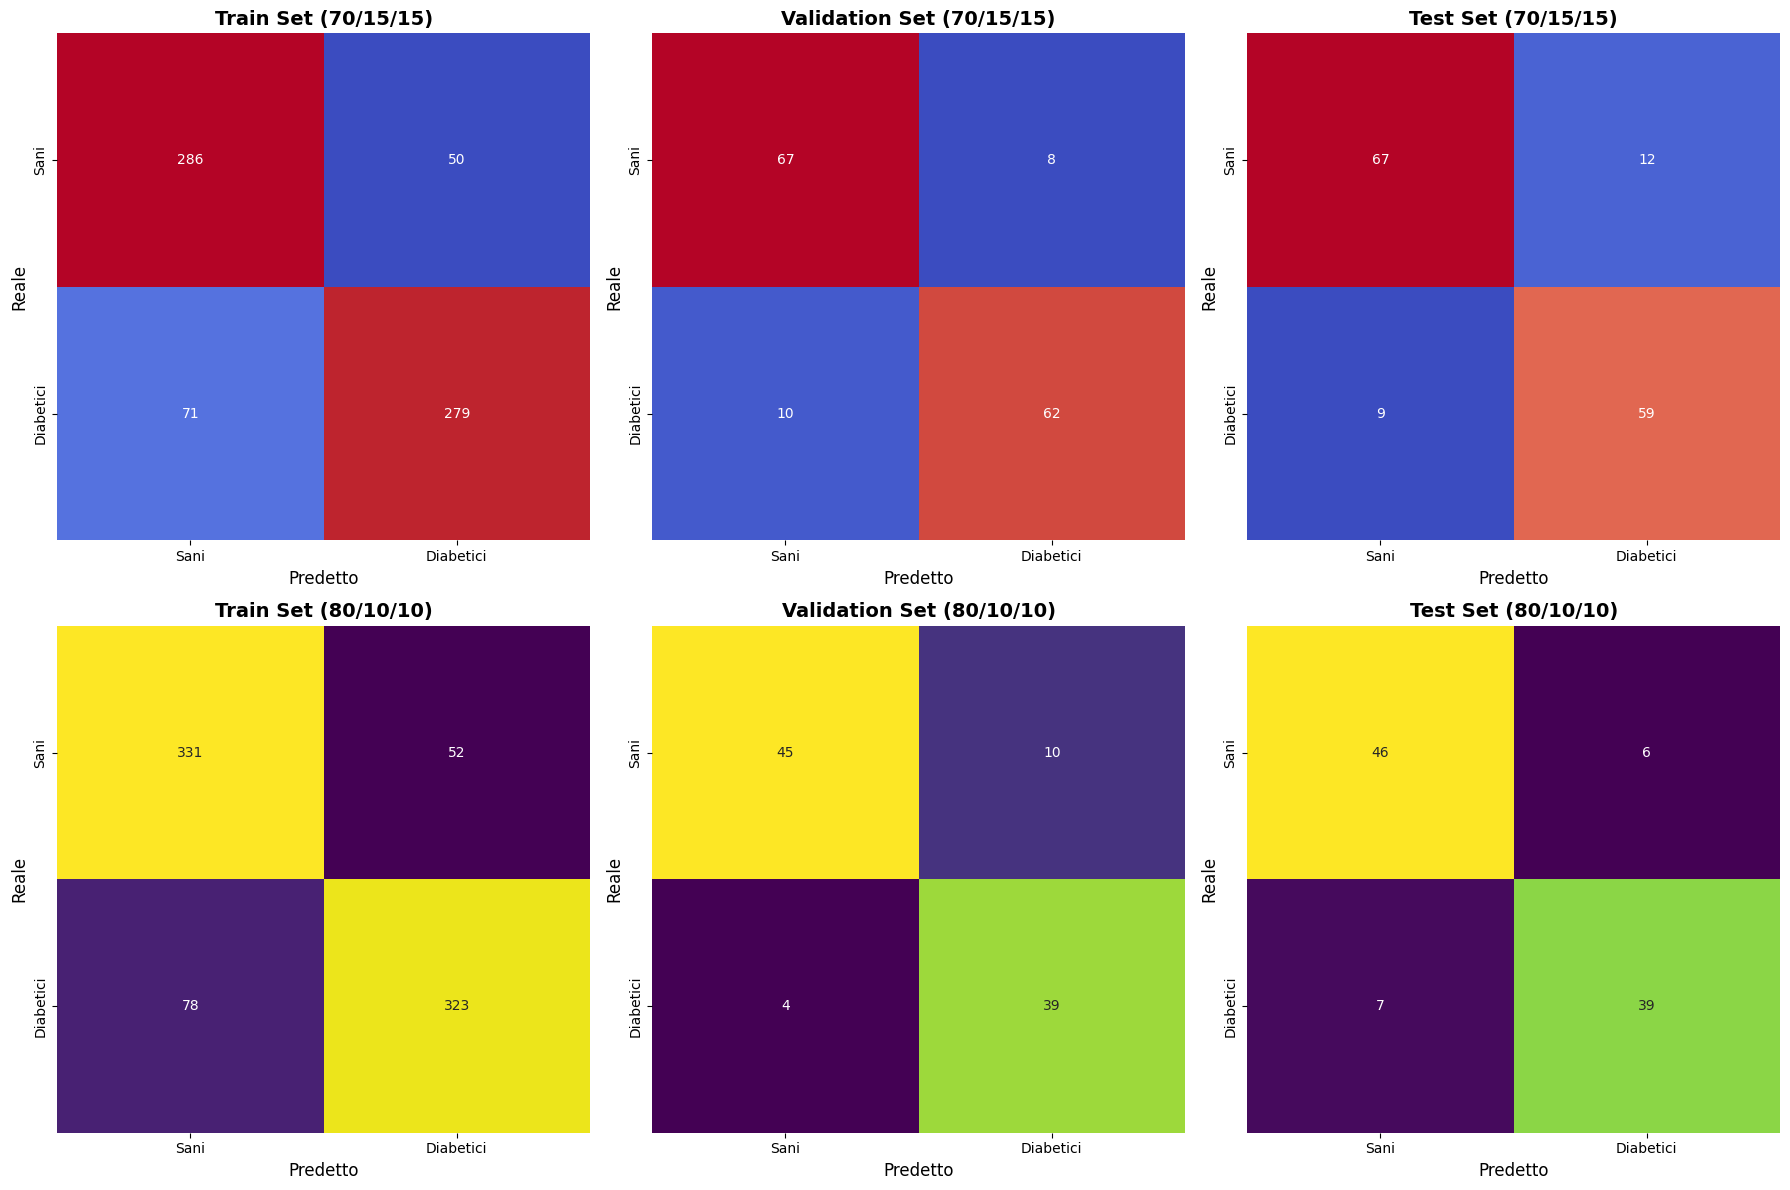

In [185]:
# Definizione delle etichette delle classi
class_labels = ["Sani", "Diabetici"]

# Creazione della figura per le confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Titoli per i grafici
titles = [
    "Train Set (70/15/15)", "Validation Set (70/15/15)", "Test Set (70/15/15)",
    "Train Set (80/10/10)", "Validation Set (80/10/10)", "Test Set (80/10/10)"
]

# Liste delle confusion matrix per ogni set di dati con Naive Bayes
cm_gnb_data = [
    confusion_matrix(y_train, y_pred_train_gnb),
    confusion_matrix(y_val, y_pred_val_gnb),
    confusion_matrix(y_test, y_pred_test_gnb),
    confusion_matrix(y_train2, y_pred_train_gnb2),
    confusion_matrix(y_val2, y_pred_val_gnb2),
    confusion_matrix(y_test2, y_pred_test_gnb2)
]

# Loop per creare ogni subplot con la rispettiva matrice di confusione
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_gnb_data[i], annot=True, fmt='d', cmap='coolwarm' if i < 3 else 'viridis', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

# Miglioramento della disposizione dei grafici
plt.tight_layout()
plt.show()


Conclusioni:
  - ..
  - ..

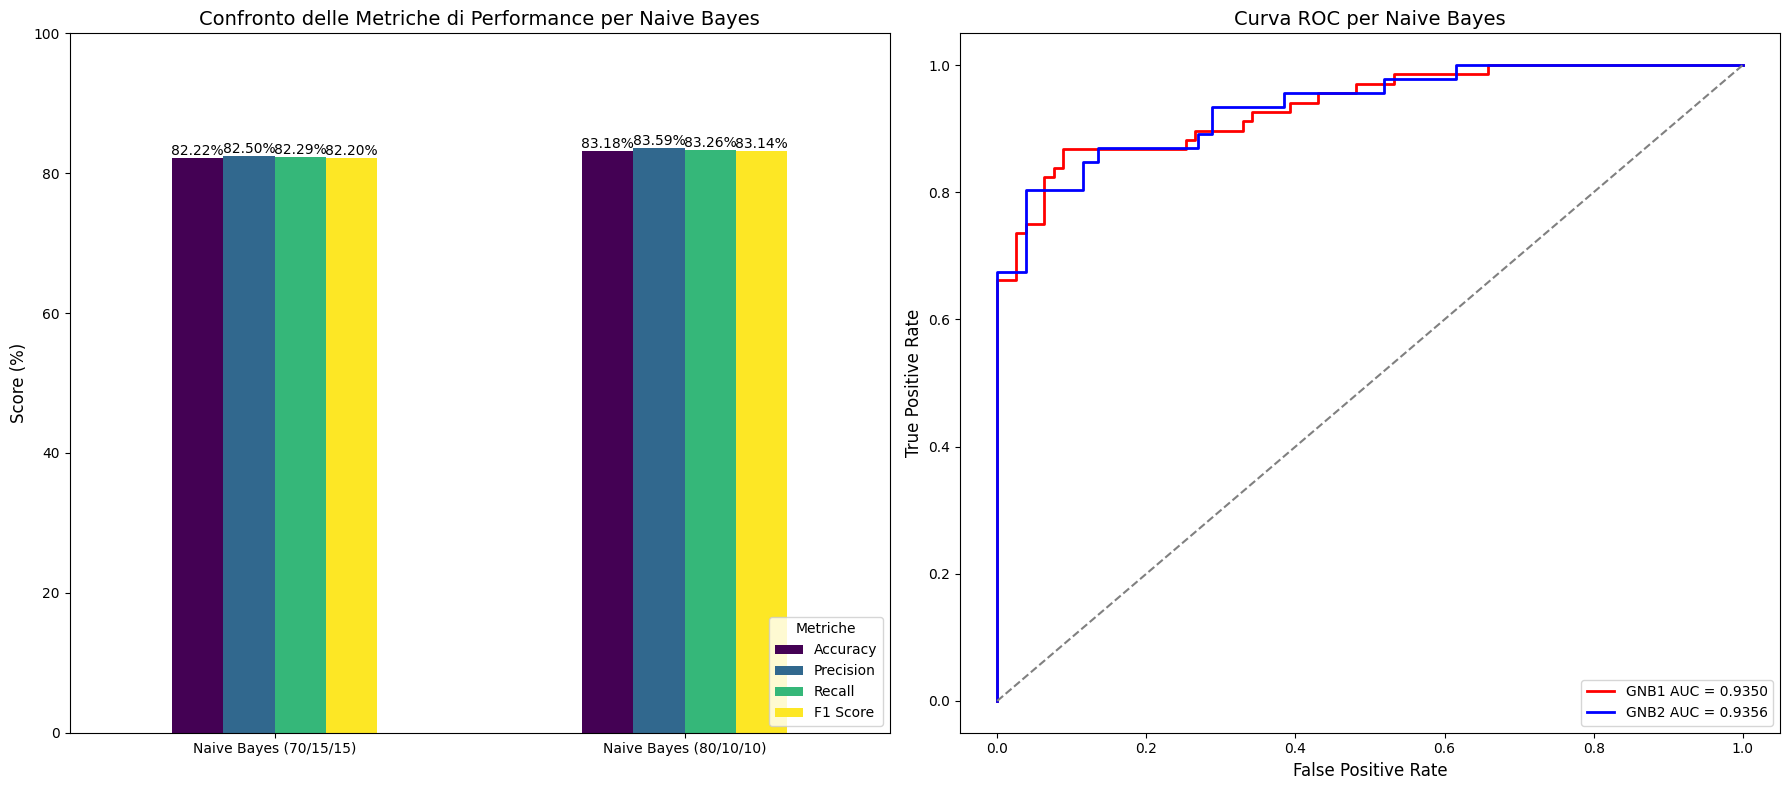

In [186]:
# Risultati della Cross-Validation per Naive Bayes
accuracy_gnb = round(np.mean(cv_scores_gnb_70['accuracy']), 6)
precision_gnb = round(np.mean(cv_scores_gnb_70['precision']), 6)
recall_gnb = round(np.mean(cv_scores_gnb_70['recall']), 6)
f1_gnb = round(np.mean(cv_scores_gnb_70['f1-score']), 6)

accuracy_gnb2 = round(np.mean(cv_scores_gnb_80['accuracy']), 6)
precision_gnb2 = round(np.mean(cv_scores_gnb_80['precision']), 6)
recall_gnb2 = round(np.mean(cv_scores_gnb_80['recall']), 6)
f1_gnb2 = round(np.mean(cv_scores_gnb_80['f1-score']), 6)

# DataFrame con le Metriche di Performance per Naive Bayes
performance_gnb_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Naive Bayes (70/15/15)': [accuracy_gnb * 100, precision_gnb * 100, recall_gnb * 100, f1_gnb * 100],
    'Naive Bayes (80/10/10)': [accuracy_gnb2 * 100, precision_gnb2 * 100, recall_gnb2 * 100, f1_gnb2 * 100]
}).set_index('Metric').T

# Curva ROC per Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_model.predict_proba(X_test)[:, 1])  # ROC per GNB (70/15/15)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

fpr_gnb2, tpr_gnb2, _ = roc_curve(y_test2, gnb_model2.predict_proba(X_test2)[:, 1])  # ROC per GNB (80/10/10)
roc_auc_gnb2 = auc(fpr_gnb2, tpr_gnb2)

# Creazione della figura
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### **Grafico delle metriche di performance per Naive Bayes**
performance_gnb_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per Naive Bayes", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### **Grafico della Curva ROC per Naive Bayes**
axes[1].plot(fpr_gnb, tpr_gnb, color='red', lw=2, label=f'GNB1 AUC = {roc_auc_gnb:.4f}')
axes[1].plot(fpr_gnb2, tpr_gnb2, color='blue', lw=2, label=f'GNB2 AUC = {roc_auc_gnb2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per Naive Bayes", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

# Miglioramento del layout
plt.tight_layout()
plt.show()


Conclusioni:
  - ..
  - ..

##### **Logistic Regression Classifier**

La Logistic Regression Classifier è un modello di machine learning **supervisionato** utilizzato principalmente per **la classificazione binaria**. Si basa sulla **funzione logistica** (sigmoide), che mappa **i valori di input** in una **probabilità** compresa **tra 0 e 1**.

A differenza dei modelli lineari di regressione, la regressione logistica **è ottimizzata per problemi di classificazione** ed è comunemente utilizzata in ambiti come la **medicina** (es. diagnosi di malattie).

###### **Addestramento dei modelli**


Si addestrano due modelli di Logistic Regression sui due differenti split (70/15/15 e 80/10/10).

Per ottenere i migliori risultati, abbiamo ottimizzato il modello impostando i seguenti **iperparametri**:
- `solver`: metodo di ottimizzazione utilizzato per l'addestramento, tra cui '`liblinear`' (per piccoli dataset e regressione L1/L2), '`saga`' (efficiente per dataset più grandi) e '`lbfgs`' (default per regressione L2).
- `C` (Regularization Parameter): controlla l'intensità della regolarizzazione. Un valore più piccolo aumenta la regolarizzazione per evitare overfitting.
- `max_iter`: numero massimo di iterazioni per la convergenza dell'algoritmo di ottimizzazione.
- `penalty`: specifica il tipo di regolarizzazione utilizzata per evitare overfitting. Opzioni comuni sono:
  - '`l1`' (Lasso): seleziona solo le caratteristiche più rilevanti.
  - '`l2`' (Ridge): distribuisce il peso su tutte le caratteristiche.
  - '`elasticnet`': combinazione di L1 e L2.
  - '`none`': nessuna regolarizzazione.

**Per il nostro dataset**, abbiamo scelto la regolarizzazione **L2** con **'lbfgs'**, che è adatto a problemi di **classificazione binaria** con **dati continui**.

In [143]:
# Definisci l'intervallo di valori per i parametri da testare
param_dist = {
    'C': loguniform(1e-3, 1e3),               # Distribuzione logaritmica per 'C' (forza di regolarizzazione)
    'max_iter': [100, 200, 500, 1000, 1500],   # Numero massimo di iterazioni
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Algoritmi di ottimizzazione
    'penalty': ['l2', 'elasticnet'],           # Tipi di regolarizzazione
    'tol': uniform(1e-5, 1e-1),                # Tolleranza per la convergenza
    'fit_intercept': [True, False],            # Se il modello deve includere l'intercetta
    'intercept_scaling': uniform(0.1, 10),     # Fattore di scala per l'intercetta
    'class_weight': ['balanced', None],        # Gestione del bilanciamento delle classi
    'warm_start': [True, False],               # Se utilizzare una soluzione precedente
    'l1_ratio': uniform(0, 1),                 # Solo per 'elasticnet', rapporto tra L1 e L2
}

# Crea il modello Logistic Regression
logreg_model = LogisticRegression(
    random_state=42,
    max_iter=1000,  # Parametro predefinito, ma sarà sostituito nella ricerca
)

# Imposta RandomizedSearchCV per cercare tra le configurazioni definite sopra
random_search = RandomizedSearchCV(
    estimator=logreg_model,
    param_distributions=param_dist,
    n_iter=50,       # Numero di combinazioni da testare
    cv=10,            # Numero di fold per la cross-validation
    n_jobs=-1,       # Utilizza tutti i core disponibili
    verbose=2,       # Dettagli sul progresso
    random_state=42,
    scoring='accuracy'  # Usa l'accuratezza come metrica di valutazione
)

# Esegui la ricerca casuale
random_search.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print("Migliori parametri trovati:", random_search.best_params_)

# Accedi al miglior modello trovato
best_logreg_model = random_search.best_estimator_

# Valutazione finale
score_random = best_logreg_model.score(X_test, y_test)
print(f"Accuratezza del miglior modello (random search): {score_random}")


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Migliori parametri trovati: {'C': 0.1767016940294795, 'class_weight': 'balanced', 'fit_intercept': True, 'intercept_scaling': 7.41993941811405, 'l1_ratio': 0.5986584841970366, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.005818361216819946, 'warm_start': False}
Accuratezza del miglior modello (random search): 0.8027210884353742


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [150]:
# Addestramento del modello sul training set (70/15/15)
logreg_model = LogisticRegression(
    penalty='l2',        # Regolarizzazione Ridge
    C=0.1767016940294795,               # Forza della regolarizzazione
    solver='lbfgs',      # Algoritmo di ottimizzazione
    max_iter=200,       # Numero massimo di iterazioni
    random_state=42,
    tol=0.015818361216819946,
    fit_intercept=True,
    intercept_scaling=7.41993941811405,
    warm_start=False
)
logreg_model.fit(X_train, y_train)

# Addestramento del modello sul training set (80/10/10)
logreg_model2 = LogisticRegression(
    penalty='l2',        # Regolarizzazione Ridge
    C=0.1767016940294795,               # Forza della regolarizzazione
    solver='lbfgs',      # Algoritmo di ottimizzazione
    max_iter=200,       # Numero massimo di iterazioni
    random_state=42,
    tol=0.015818361216819946,
    fit_intercept=True,
    intercept_scaling=7.41993941811405,
    warm_start=False
)
logreg_model2.fit(X_train2, y_train2)


LogisticRegression(C=0.1767016940294795, intercept_scaling=7.41993941811405,
                   max_iter=200, random_state=42, tol=0.015818361216819947)

###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento (sia per il 70/15/15 che per l'80/10/10).

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [151]:
# Creazione della cross-validation con StratifiedKFold (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation su training set (70/15/15)
cv_scores_logreg_70 = my_cross_validation(logreg_model, X_train, y_train, cv=kfold)

# Esecuzione della cross-validation su training set (80/10/10)
cv_scores_logreg_80 = my_cross_validation(logreg_model2, X_train2, y_train2, cv=kfold)

# Creazione di un DataFrame per mostrare i risultati della cross-validation
cv_summary_logreg_df = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (70/15/15)': [round(np.mean(cv_scores_logreg_70['accuracy']), 6),
                         round(np.mean(cv_scores_logreg_70['precision']), 6),
                         round(np.mean(cv_scores_logreg_70['recall']), 6),
                         round(np.mean(cv_scores_logreg_70['f1-score']), 6)],
    '95% CI (70/15/15)': [confidence_interval(cv_scores_logreg_70['accuracy']),
                           confidence_interval(cv_scores_logreg_70['precision']),
                           confidence_interval(cv_scores_logreg_70['recall']),
                           confidence_interval(cv_scores_logreg_70['f1-score'])],
    'Media (80/10/10)': [round(np.mean(cv_scores_logreg_80['accuracy']), 6),
                         round(np.mean(cv_scores_logreg_80['precision']), 6),
                         round(np.mean(cv_scores_logreg_80['recall']), 6),
                         round(np.mean(cv_scores_logreg_80['f1-score']), 6)],
    '95% CI (80/10/10)': [confidence_interval(cv_scores_logreg_80['accuracy']),
                           confidence_interval(cv_scores_logreg_80['precision']),
                           confidence_interval(cv_scores_logreg_80['recall']),
                           confidence_interval(cv_scores_logreg_80['f1-score'])]
})

cv_summary_logreg_df.set_index('Metrica', inplace=True)
cv_summary_logreg_df.index.name = None
cv_summary_logreg_df

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni fold, con media pari a 0.82644928 ---

[0.86956522 0.84057971 0.89855072 0.82608696 0.8115942  0.76811594
 0.80882353 0.83823529 0.82352941 0.77941176]

Intervallo di confidenza 95%: (0.798691, 0.854208)

--- Precision di ogni fold, con media pari a 0.82987359 ---

[0.8697479  0.84290541 0.90118243 0.83022071 0.81376689 0.7762931
 0.80902778 0.84027778 0.82424242 0.79107143]

Intervallo di confidenza 95%: (0.803692, 0.856055)

--- Recall di ogni fold, con media pari a 0.82725999 ---

[0.8697479  0.84117647 0.89915966 0.82689076 0.81218487 0.76932773
 0.80822511 0.83939394 0.82424242 0.78225108]

Intervallo di confidenza 95%: (0.799764, 0.854756)

--- F1-score di ogni fold, con media pari a 0.82609546 ---

[0.86956522 0.84044566 0.89846542 0.82575758 0.81143578 0.76689189
 0.8084507  0.8382003  0.82352941 0.77821265]

Intervallo di confidenza 95%: (0.798073, 0.854118)

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni

Media (70/15/15)     95% CI (70/15/15)  Media (80/10/10)  \
Accuracy           0.826449  (0.798691, 0.854208)          0.835622   
Precision          0.829874  (0.803692, 0.856055)          0.839816   
Recall             0.827260  (0.799764, 0.854756)          0.836572   
F1 Score           0.826095  (0.798073, 0.854118)          0.835323   

              95% CI (80/10/10)  
Accuracy   (0.802955, 0.868288)  
Precision   (0.806493, 0.87314)  
Recall      (0.80378, 0.869364)  
F1 Score   (0.802648, 0.867997)

Conclusioni:
  - ..
  - ..

###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Decision Tree sui set di training, validation e test, per due diverse suddivisioni dei dati (70/15/15 e 80/10/10).

Per il miglior controllo di overfitting, si calcola la differenza tra Training e Test per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.





In [152]:
# Predizioni sui diversi set per verificare l'overfitting con Logistic Regression
y_pred_train_logreg = logreg_model.predict(X_train)
y_pred_val_logreg = logreg_model.predict(X_val)
y_pred_test_logreg = logreg_model.predict(X_test)

y_pred_train_logreg2 = logreg_model2.predict(X_train2)
y_pred_val_logreg2 = logreg_model2.predict(X_val2)
y_pred_test_logreg2 = logreg_model2.predict(X_test2)

# Creazione del DataFrame con le metriche per visualizzare l'overfitting
performance_logreg_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy (70/15/15)': [accuracy_score(y_train, y_pred_train_logreg), accuracy_score(y_val, y_pred_val_logreg), accuracy_score(y_test, y_pred_test_logreg)],
    'Precision (70/15/15)': [precision_score(y_train, y_pred_train_logreg, average='macro'), precision_score(y_val, y_pred_val_logreg, average='macro'), precision_score(y_test, y_pred_test_logreg, average='macro')],
    'Recall (70/15/15)': [recall_score(y_train, y_pred_train_logreg, average='macro'), recall_score(y_val, y_pred_val_logreg, average='macro'), recall_score(y_test, y_pred_test_logreg, average='macro')],
    'F1 Score (70/15/15)': [f1_score(y_train, y_pred_train_logreg, average='macro'), f1_score(y_val, y_pred_val_logreg, average='macro'), f1_score(y_test, y_pred_test_logreg, average='macro')],
    'Accuracy (80/10/10)': [accuracy_score(y_train2, y_pred_train_logreg2), accuracy_score(y_val2, y_pred_val_logreg2), accuracy_score(y_test2, y_pred_test_logreg2)],
    'Precision (80/10/10)': [precision_score(y_train2, y_pred_train_logreg2, average='macro'), precision_score(y_val2, y_pred_val_logreg2, average='macro'), precision_score(y_test2, y_pred_test_logreg2, average='macro')],
    'Recall (80/10/10)': [recall_score(y_train2, y_pred_train_logreg2, average='macro'), recall_score(y_val2, y_pred_val_logreg2, average='macro'), recall_score(y_test2, y_pred_test_logreg2, average='macro')],
    'F1 Score (80/10/10)': [f1_score(y_train2, y_pred_train_logreg2, average='macro'), f1_score(y_val2, y_pred_val_logreg2, average='macro'), f1_score(y_test2, y_pred_test_logreg2, average='macro')]
})

# Calcolo della differenza tra Train e Test per ogni metrica
performance_logreg_df["Accuracy Gap (Train - Test)"] = performance_logreg_df["Accuracy (70/15/15)"] - performance_logreg_df["Accuracy (80/10/10)"]
performance_logreg_df["F1 Score Gap (Train - Test)"] = performance_logreg_df["F1 Score (70/15/15)"] - performance_logreg_df["F1 Score (80/10/10)"]

print("Logistic Regression Performance Overfitting Check with Gaps")
performance_logreg_df.set_index('Set', inplace=True)
performance_logreg_df.index.name = None
performance_logreg_df


Logistic Regression Performance Overfitting Check with Gaps


Accuracy (70/15/15)  Precision (70/15/15)  Recall (70/15/15)  \
Train                  0.833819              0.835414           0.834524   
Validation             0.897959              0.897908           0.898056   
Test                   0.809524              0.808451           0.808451   

            F1 Score (70/15/15)  Accuracy (80/10/10)  Precision (80/10/10)  \
Train                  0.833768             0.840561              0.841809   
Validation             0.897940             0.887755              0.886667   
Test                   0.808451             0.795918              0.795151   

            Recall (80/10/10)  F1 Score (80/10/10)  \
Train                0.841268             0.840540   
Validation           0.892389             0.887179   
Test                 0.795151             0.795151   

            Accuracy Gap (Train - Test)  F1 Score Gap (Train - Test)  
Train                         -0.006742                    -0.006772  
Validation                     0.010204                     0.010761  
Test                           0.013605                     0.013301

Conclusioni:
  - ..
  - ..

###### **Matrici di correlazione e grafici**

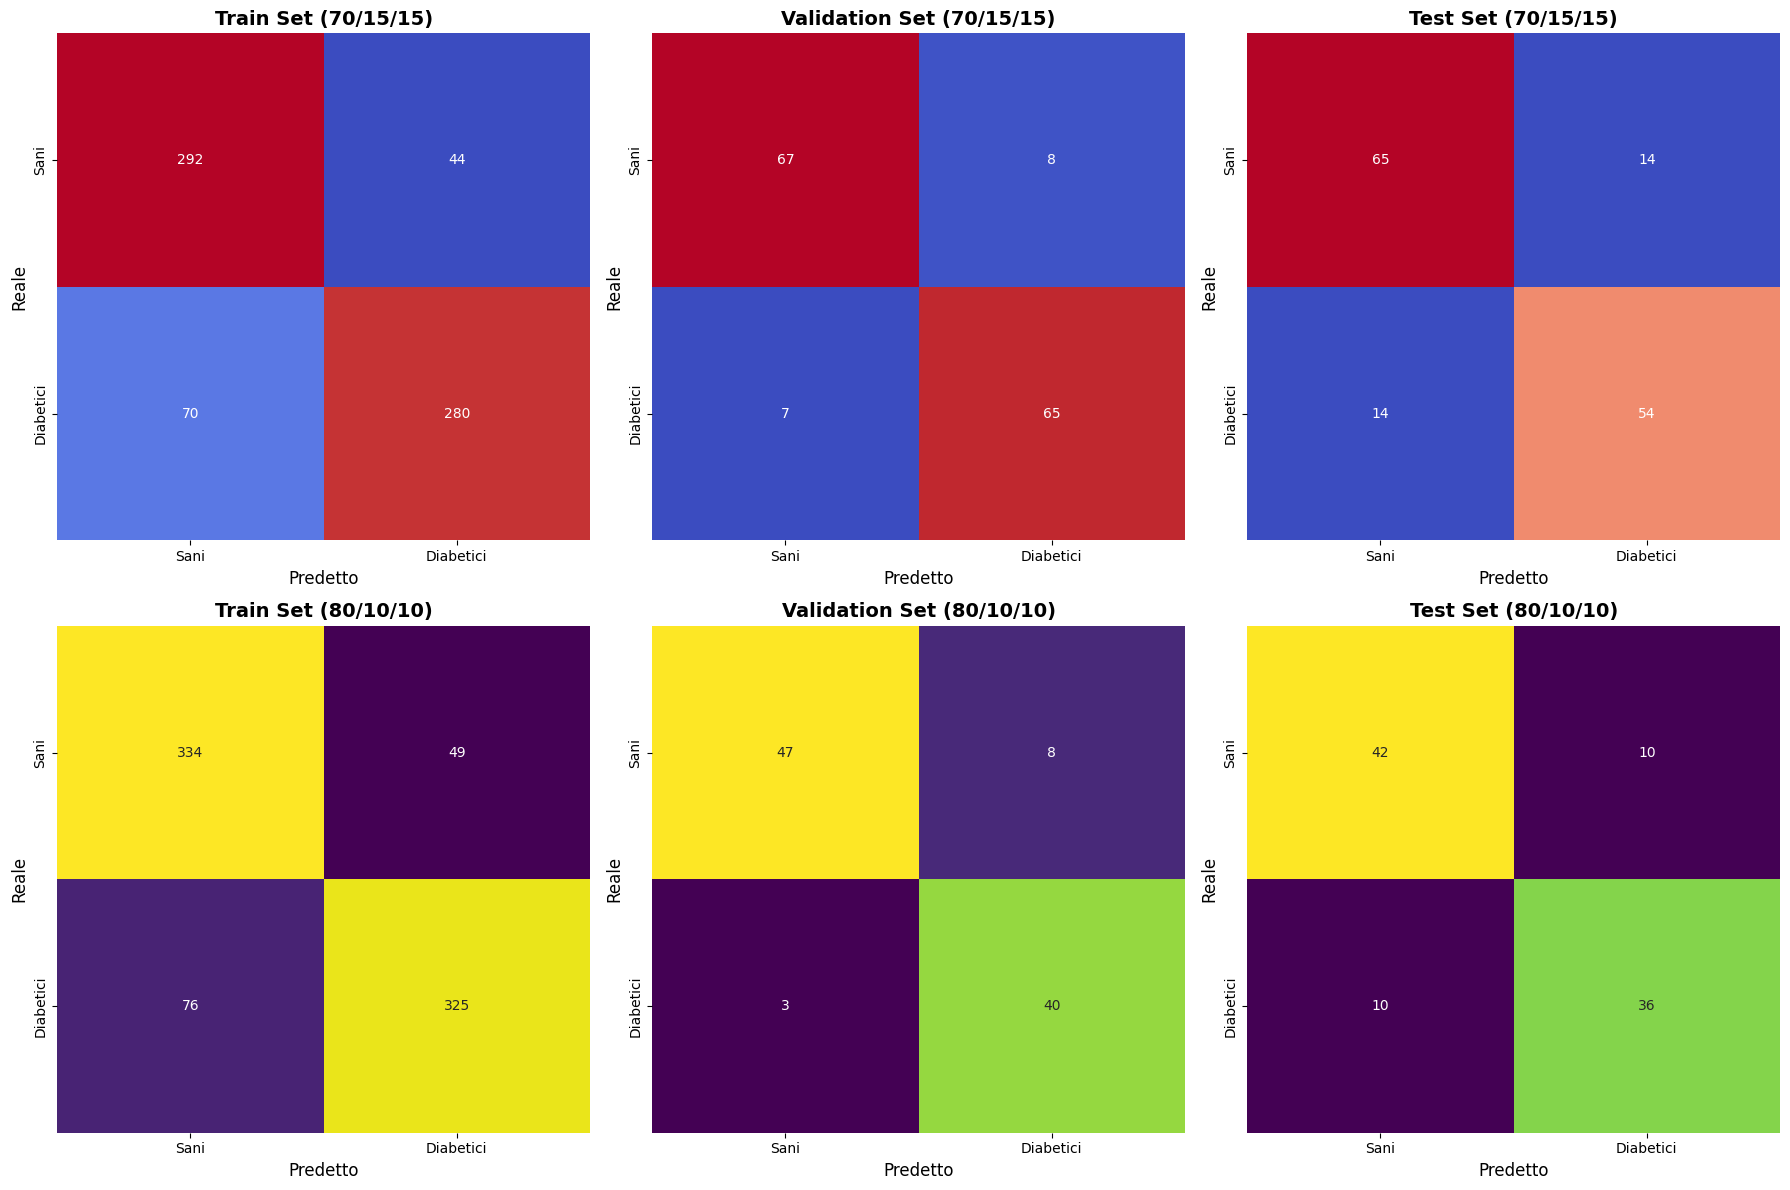

In [153]:
# Definizione delle etichette delle classi
class_labels = ["Sani", "Diabetici"]

# Creazione della figura per le confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Titoli per i grafici
titles = [
    "Train Set (70/15/15)", "Validation Set (70/15/15)", "Test Set (70/15/15)",
    "Train Set (80/10/10)", "Validation Set (80/10/10)", "Test Set (80/10/10)"
]

# Liste delle confusion matrix per ogni set di dati con Logistic Regression
cm_logreg_data = [
    confusion_matrix(y_train, y_pred_train_logreg),
    confusion_matrix(y_val, y_pred_val_logreg),
    confusion_matrix(y_test, y_pred_test_logreg),
    confusion_matrix(y_train2, y_pred_train_logreg2),
    confusion_matrix(y_val2, y_pred_val_logreg2),
    confusion_matrix(y_test2, y_pred_test_logreg2)
]

# Loop per creare ogni subplot con la rispettiva matrice di confusione
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_logreg_data[i], annot=True, fmt='d', cmap='coolwarm' if i < 3 else 'viridis', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

# Miglioramento della disposizione dei grafici
plt.tight_layout()
plt.show()


Conclusioni:
  - ..
  - ..

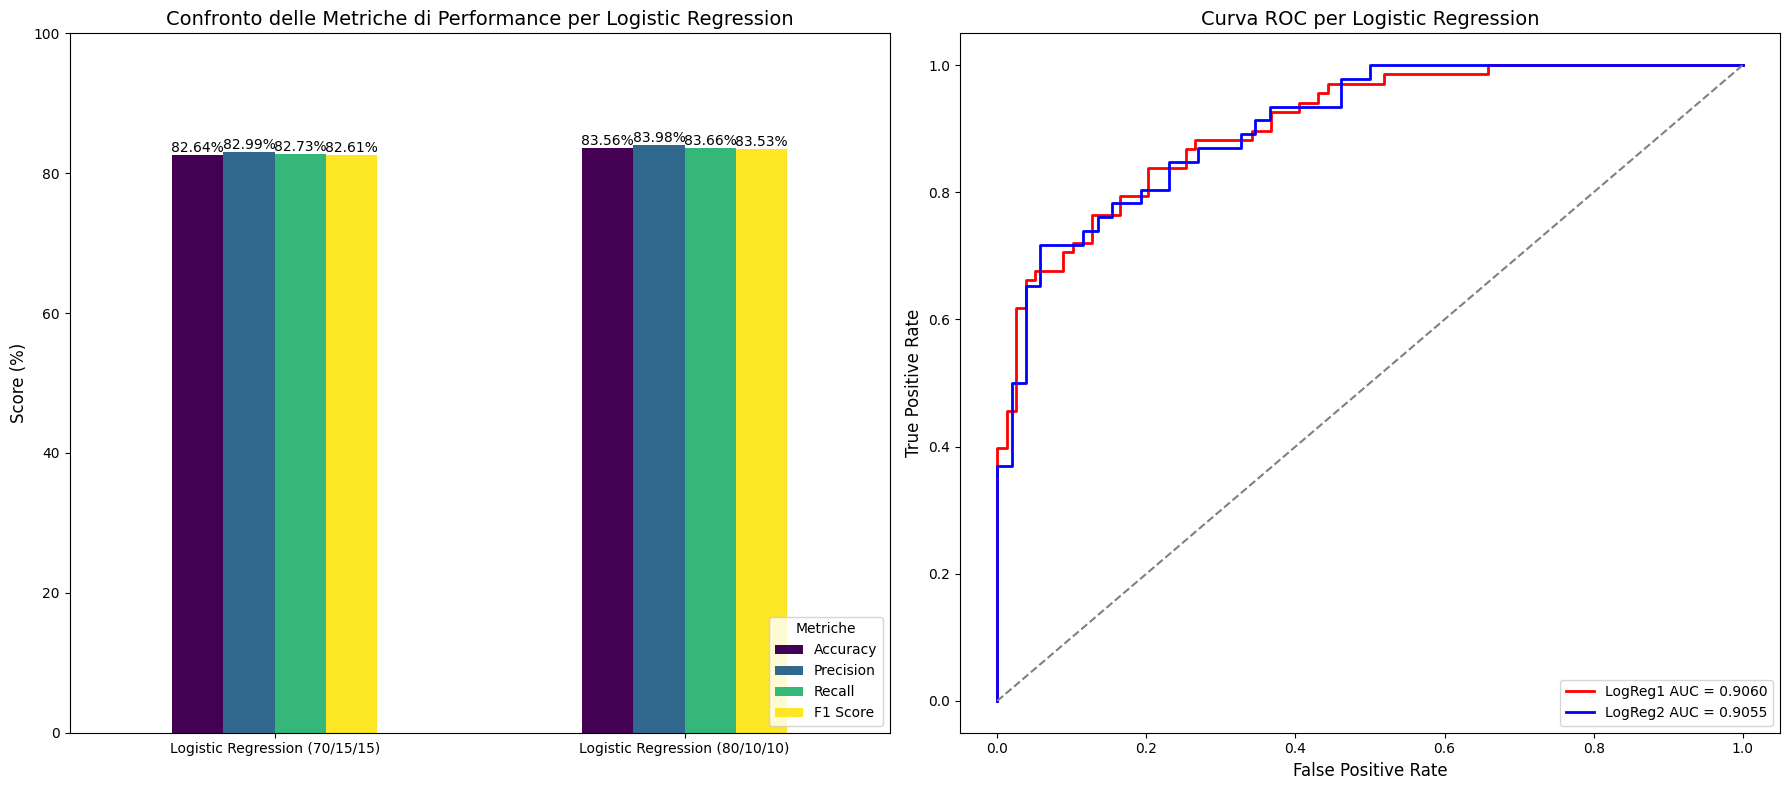

In [154]:
# Risultati della Cross-Validation per Logistic Regression
accuracy_logreg = round(np.mean(cv_scores_logreg_70['accuracy']), 6)
precision_logreg = round(np.mean(cv_scores_logreg_70['precision']), 6)
recall_logreg = round(np.mean(cv_scores_logreg_70['recall']), 6)
f1_logreg = round(np.mean(cv_scores_logreg_70['f1-score']), 6)

accuracy_logreg2 = round(np.mean(cv_scores_logreg_80['accuracy']), 6)
precision_logreg2 = round(np.mean(cv_scores_logreg_80['precision']), 6)
recall_logreg2 = round(np.mean(cv_scores_logreg_80['recall']), 6)
f1_logreg2 = round(np.mean(cv_scores_logreg_80['f1-score']), 6)

# DataFrame con le Metriche di Performance per Logistic Regression
performance_logreg_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression (70/15/15)': [accuracy_logreg * 100, precision_logreg * 100, recall_logreg * 100, f1_logreg * 100],
    'Logistic Regression (80/10/10)': [accuracy_logreg2 * 100, precision_logreg2 * 100, recall_logreg2 * 100, f1_logreg2 * 100]
}).set_index('Metric').T

# Curva ROC per Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])  # ROC per Logistic Regression (70/15/15)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_logreg2, tpr_logreg2, _ = roc_curve(y_test2, logreg_model2.predict_proba(X_test2)[:, 1])  # ROC per Logistic Regression (80/10/10)
roc_auc_logreg2 = auc(fpr_logreg2, tpr_logreg2)

# Creazione della figura
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### **Grafico delle metriche di performance per Logistic Regression**
performance_logreg_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per Logistic Regression", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### **Grafico della Curva ROC per Logistic Regression**
axes[1].plot(fpr_logreg, tpr_logreg, color='red', lw=2, label=f'LogReg1 AUC = {roc_auc_logreg:.4f}')
axes[1].plot(fpr_logreg2, tpr_logreg2, color='blue', lw=2, label=f'LogReg2 AUC = {roc_auc_logreg2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per Logistic Regression", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

# Miglioramento del layout
plt.tight_layout()
plt.show()


Conclusioni:
  - ..
  - ..

##### **Reti Neurali Classifier**

Le Reti Neurali Classifier sono **modelli di machine learning** ispirati al funzionamento del cervello umano, composti da **strati di nodi** (o "neuroni") **interconnessi**. Ogni nodo elabora i dati in ingresso, li trasforma attraverso funzioni di attivazione non lineari e li passa ai nodi successivi, creando **una rete di trasformazioni** che permette al modello di apprendere pattern complessi nei dati.

###### **Addestramento dei modelli**


Il modello di rete neurale Multi-Layer Perceptron (MLP) è un tipo di rete neurale profonda che consiste in più strati di nodi (o neuroni) interconnessi. Per ottimizzare le prestazioni di questo modello sui nostri dataset, abbiamo scelto i seguenti iperparametri:

- `hidden_layer_sizes`: definisce la struttura della rete, cioè il numero e la dimensione degli strati nascosti. In questo caso, la rete ha tre strati con 100, 100 e 50 neuroni rispettivamente.

- `alpha`: parametro di regolarizzazione L2, che aiuta a prevenire l'overfitting. Maggiore è il valore di alpha, maggiore è la regolarizzazione.

- `batch_size`: determina la dimensione del batch per l'aggiornamento dei pesi durante l'addestramento. In questo caso, è impostato a 64.

- `early_stopping`: se attivato, interrompe l'addestramento se non si osservano miglioramenti nelle performance del modello per un numero definito di iterazioni, evitando il sovra-addestramento.

- `n_iter_no_change`: specifica il numero di iterazioni senza miglioramento durante le quali l'addestramento continuerà prima di fermarsi.

- `learning_rate`: metodo di adattamento del tasso di apprendimento durante l'addestramento. Con adaptive, il tasso di apprendimento si adatta automaticamente.

- `learning_rate_init`: definisce il valore iniziale del tasso di apprendimento, che in questo caso è 0.0057.

- `activation`: funzione di attivazione usata per i neuroni, in questo caso relu (Rectified Linear Unit), che aiuta nella non linearità del modello.

- `solver`: metodo utilizzato per ottimizzare i pesi durante l'addestramento. Il solver sgd (Stochastic Gradient Descent) è scelto per il suo equilibrio tra prestazioni e velocità di addestramento.

- `shuffle`: se abilitato, mescola i dati prima di ogni epoca per garantire un addestramento più robusto.

- `max_iter`: il numero massimo di iterazioni per il processo di addestramento, impostato a 2000 per migliorare la convergenza del modello.

- `momentum`: parametro che aiuta a velocizzare la discesa del gradiente, evitando i minimi locali. Il valore scelto è 0.91.

- `nesterovs_momentum`: se disabilitato, non utilizza il momentum di Nesterov.

- `tol`: tolleranza per la convergenza. Se la variazione del loss è inferiore a questo valore, l'addestramento si ferma.

- `validation_fraction`: percentuale dei dati di addestramento utilizzata per la validazione, impostata a circa il 14.83% per monitorare il processo di apprendimento.

Questi parametri sono stati scelti per bilanciare la capacità del modello di imparare dai dati e la prevenzione dell'overfitting, migliorando le prestazioni generali e la capacità di generalizzazione su dati non visti.

In [45]:
# Creazione del modello di rete neurale (MLP) con early stopping
mlp_model = MLPClassifier(
    random_state=42,
    hidden_layer_sizes=(100, 100, 50),
    alpha=0.06247746602583892,
    batch_size=64,
    early_stopping=True,
    n_iter_no_change=15,  # Numero di iterazioni senza miglioramenti per fermarsi
    learning_rate='adaptive',
    learning_rate_init=0.005666566321361543,
    activation='relu',
    solver='sgd',
    shuffle=True,
    max_iter=2000,  # Aumentato max_iter per migliorare la convergenza
    momentum=0.9104629857953324,
    nesterovs_momentum=False,
    tol=0.0003924619912671628,
    validation_fraction=0.14832308858067883
)

# mlp_model = MLPClassifier(
#    random_state=42,
#    hidden_layer_sizes=(100, 100, 50),  # Mantieni la stessa configurazione dei layer nascosti
 #   alpha=0.10218742350231168,  # Nuovo valore per alpha
#    batch_size=128,  # Nuovo valore per batch_size
#   early_stopping=True,  # Rimane True
 #   n_iter_no_change=5,  # Nuovo numero di iterazioni senza miglioramenti
#   learning_rate_init=0.020598286241914524,  # Nuovo valore per learning_rate_init
#    activation='logistic',  # Nuova funzione di attivazione
 #   solver='lbfgs',  # Nuovo solver
 #   shuffle=True,  # Rimane True
#    max_iter=1000,  # Nuovo numero massimo di iterazioni
#    momentum=0.9611720243493491,  # Nuovo valore per momentum
 #   nesterovs_momentum=False,  # Rimane False
#    tol=0.0002813490317738959,  # Nuovo valore per tol
#    validation_fraction=0.13287375091519293  # Nuovo valore per validation_fraction
#)
mlp_model.fit(X_train, y_train)



mlp_model2 = MLPClassifier(
    random_state=42,
    hidden_layer_sizes=(100, 100, 50),
    alpha=0.06247746602583892,
    batch_size=64,
    early_stopping=True,
    n_iter_no_change=15,  # Numero di iterazioni senza miglioramenti per fermarsi
    learning_rate='adaptive',
    learning_rate_init=0.005666566321361543,
    activation='relu',
    solver='sgd',
    shuffle=True,
    max_iter=2000,  # Aumentato max_iter per migliorare la convergenza
    momentum=0.9104629857953324,
    nesterovs_momentum=False,
    tol=0.0003924619912671628,
    validation_fraction=0.14832308858067883
)
mlp_model2.fit(X_train2, y_train2)

MLPClassifier(alpha=0.06247746602583892, batch_size=64, early_stopping=True,
              hidden_layer_sizes=(100, 100, 50), learning_rate='adaptive',
              learning_rate_init=0.005666566321361543, max_iter=2000,
              momentum=0.9104629857953324, n_iter_no_change=15,
              nesterovs_momentum=False, random_state=42, solver='sgd',
              tol=0.0003924619912671628,
              validation_fraction=0.14832308858067883)

Anche se **RandomizedSearchCV** ha suggerito alcune configurazioni di parametri per il modello, abbiamo deciso di apportare alcune modifiche al fine di migliorare ulteriormente le prestazioni. I risultati ottenuti con le nuove configurazioni sono stati migliori in termini di accuracy, precision, recall e F1 score.

Di seguito sono riportate le principali differenze tra la configurazione suggerita da RandomizedSearchCV e quella modificata:

- alpha:
  - RandomizedSearchCV ha suggerito un valore di alpha=0.1022, mentre abbiamo deciso di utilizzare un valore alpha=0.0624, riducendo così la regolarizzazione. Questo ha aiutato a ottenere una migliore adattabilità del modello senza compromettere la generalizzazione.

- batch_size:
  - RandomizedSearchCV suggeriva un batch_size=128, ma abbiamo deciso di ridurlo a batch_size=64 per migliorare la stabilità durante l'allenamento, riducendo il rumore nelle stime del gradiente.
  
- n_iter_no_change:
  - RandomizedSearchCV suggeriva n_iter_no_change=5, ma abbiamo preferito aumentarlo a n_iter_no_change=15. Questo ha permesso al modello di continuare l'allenamento per un numero maggiore di epoche senza fermarsi troppo presto.

- learning_rate_init:
  - RandomizedSearchCV suggeriva il valore di learning_rate_init=0.0206, ma abbiamo deciso di ridurlo a 0.0057 per evitare aggiornamenti troppo rapidi dei pesi e migliorare la stabilità del modello.

- Funzione di attivazione:
  - RandomizedSearchCV suggeriva activation='logistic', ma abbiamo preferito usare activation='relu', che è generalmente più efficace per reti neurali profonde e ha contribuito a migliorare le prestazioni sui dati di test.

- Solver:
  - RandomizedSearchCV suggeriva l'uso di solver='lbfgs', ma abbiamo deciso di utilizzare solver='sgd', che permette l'uso di momentum e può accelerare la convergenza in contesti di ottimizzazione su grandi set di dati.

- Parametro momentum:
  - RandomizedSearchCV suggeriva il valore di momentum=0.9612, ma l'abbiamo ridotto a 0.91 per evitare oscillazioni troppo ampie durante l'allenamento e ottenere una convergenza più stabile.

- Numero massimo di iterazioni:
  - RandomizedSearchCV suggeriva max_iter=1000, ma abbiamo aumentato questo valore a 2000 per dare al modello più tempo per convergere, evitando che si interrompesse prematuramente.

In [52]:
param_dist = {
    'hidden_layer_sizes': [(300, 150, 50), (100, 100, 50), (500, 250, 100), (200, 100)],  # Possibili configurazioni di layer nascosti
    'alpha': uniform(0.01, 0.1),  # Regolarizzazione con distribuzione continua
    'learning_rate_init': uniform(0.001, 0.1),  # Tasso di apprendimento iniziale
    'max_iter': [1000, 1500, 2000],  # Numero di iterazioni massime
    'activation': ['relu', 'tanh', 'logistic'],  # Funzione di attivazione nei layer nascosti
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers da testare
    'batch_size': ['auto', 32, 64],  # Dimensioni del batch da testare
    'momentum': uniform(0.0, 1.0),  # Corretta la distribuzione del momentum
    'nesterovs_momentum': [True, False],  # Usa momentum di Nesterov per 'sgd'
    'tol': uniform(1e-5, 1e-3),  # Tolleranza per fermarsi
    'early_stopping': [True],  # Puoi confermare l'uso di early stopping
    'n_iter_no_change': [5, 10, 15],  # Numero di epoche senza miglioramenti prima di fermarsi
    'validation_fraction': uniform(0.05, 0.1)  # Percentuale di dati per la validazione
}

# Crea il modello MLP
mlp_model = MLPClassifier(random_state=42, learning_rate='adaptive')

# Crea il RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=mlp_model, param_distributions=param_dist, n_iter=10, cv=10, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Esegui la ricerca casuale sugli iperparametri
random_search.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print("Migliori parametri trovati:", random_search.best_params_)

# Accedi al miglior modello
best_model_random = random_search.best_estimator_

# Valutazione finale
score_random = best_model_random.score(X_test, y_test)
print(f"Accuratezza del miglior modello (random search): {score_random}")


Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

###### **Valutazione con cross-validation (10-Fold)**

In questa parte di codice, viene eseguita una **10-Fold Cross-Validation** utilizzando il metodo **StratifiedKFold** per valutare il modello sui dati di addestramento (sia per il 70/15/15 che per l'80/10/10).

Questo metodo suddivide i dati **in 10 parti** (fold), garantendo che ogni classe sia proporzionalmente rappresentata in ciascun fold, e aiuta a ottenere una stima più robusta delle performance del modello **su dati non visti**.

In [46]:
# Creazione della cross-validation con StratifiedKFold (10 folds)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Esecuzione della cross-validation su training set (70/15/15)
cv_scores_70 = my_cross_validation(mlp_model, X_train, y_train, cv=kfold)

# Esecuzione della cross-validation su training set (80/10/10)
cv_scores_80 = my_cross_validation(mlp_model2, X_train2, y_train2, cv=kfold)

# Creazione di un DataFrame per mostrare i risultati della cross-validation
cv_summary_df = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Media (70/15/15)': [round(np.mean(cv_scores_70['accuracy']), 6),
                         round(np.mean(cv_scores_70['precision']), 6),
                         round(np.mean(cv_scores_70['recall']), 6),
                         round(np.mean(cv_scores_70['f1-score']), 6)],
    '95% CI (70/15/15)': [confidence_interval(cv_scores_70['accuracy']),
                           confidence_interval(cv_scores_70['precision']),
                           confidence_interval(cv_scores_70['recall']),
                           confidence_interval(cv_scores_70['f1-score'])],
    'Media (80/10/10)': [round(np.mean(cv_scores_80['accuracy']), 6),
                         round(np.mean(cv_scores_80['precision']), 6),
                         round(np.mean(cv_scores_80['recall']), 6),
                         round(np.mean(cv_scores_80['f1-score']), 6)],
    '95% CI (80/10/10)': [confidence_interval(cv_scores_80['accuracy']),
                           confidence_interval(cv_scores_80['precision']),
                           confidence_interval(cv_scores_80['recall']),
                           confidence_interval(cv_scores_80['f1-score'])],
})

# Impostare l'indice come 'Metrica' e rimuovere il nome dell'indice
cv_summary_df.set_index('Metrica', inplace=True)
cv_summary_df.index.name = None
cv_summary_df

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni fold, con media pari a 0.84104859 ---

[0.88405797 0.84057971 0.85507246 0.88405797 0.8115942  0.8115942
 0.83823529 0.83823529 0.82352941 0.82352941]

Intervallo di confidenza 95%: (0.82218, 0.859917)

--- Precision di ogni fold, con media pari a 0.84449111 ---

[0.88510101 0.84290541 0.85950764 0.89525862 0.81176471 0.81409168
 0.84642857 0.83823529 0.82737576 0.82424242]

Intervallo di confidenza 95%: (0.824264, 0.864718)

--- Recall di ogni fold, con media pari a 0.84133053 ---

[0.88445378 0.84117647 0.85588235 0.88529412 0.81176471 0.81092437
 0.83593074 0.83852814 0.82510823 0.82424242]

Intervallo di confidenza 95%: (0.822262, 0.860399)

--- F1-score di ogni fold, con media pari a 0.84068854 ---

[0.88403361 0.84044566 0.85479798 0.88344595 0.8115942  0.8109589
 0.83650273 0.8382003  0.82337662 0.82352941]

Intervallo di confidenza 95%: (0.821831, 0.859546)

Cross-validation eseguita con 10 fold:
--- Accuracy di ogni f

Media (70/15/15)     95% CI (70/15/15)  Media (80/10/10)  \
Accuracy           0.841049   (0.82218, 0.859917)          0.827978   
Precision          0.844491  (0.824264, 0.864718)          0.828700   
Recall             0.841331  (0.822262, 0.860399)          0.828351   
F1 Score           0.840689  (0.821831, 0.859546)          0.827922   

              95% CI (80/10/10)  
Accuracy    (0.790586, 0.86537)  
Precision  (0.791282, 0.866119)  
Recall      (0.790993, 0.86571)  
F1 Score   (0.790536, 0.865308)

Conclusioni:
  - ..
  - ..

###### **Controllo dell'overfitting**

Questo pezzo di codice esegue una **valutazione dell'overfitting** confrontando le prestazioni del modello Decision Tree sui set di training, validation e test, per due diverse suddivisioni dei dati (70/15/15 e 80/10/10).

Per il miglior controllo di overfitting, si calcola la differenza tra Training e Test per:
- Accuracy Gap > 0.1:
  - Il modello ha **overfitting**, perché la precisione sul training è molto più alta rispetto al test.

- F1 Score Gap > 0.1:
  - Il modello ha **difficoltà a generalizzare**, perché è molto più preciso sul training rispetto ai dati reali.

Quindi, se il valore fosse **vicino a zero o negativo**, significherebbe che il modello **generalizza bene** e **non soffre di overfitting**.

In [47]:
# Predizioni sui diversi set per verificare l'overfitting con MLPClassifier
y_pred_train_mlp = mlp_model.predict(X_train)
y_pred_val_mlp = mlp_model.predict(X_val)
y_pred_test_mlp = mlp_model.predict(X_test)

y_pred_train_mlp2 = mlp_model2.predict(X_train2)
y_pred_val_mlp2 = mlp_model2.predict(X_val2)
y_pred_test_mlp2 = mlp_model2.predict(X_test2)


# Creazione del DataFrame con le metriche per visualizzare l'overfitting
performance_mlp_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'Accuracy (70/15/15)': [accuracy_score(y_train, y_pred_train_mlp), accuracy_score(y_val, y_pred_val_mlp), accuracy_score(y_test, y_pred_test_mlp)],
    'Precision (70/15/15)': [precision_score(y_train, y_pred_train_mlp, average='macro'), precision_score(y_val, y_pred_val_mlp, average='macro'), precision_score(y_test, y_pred_test_mlp, average='macro')],
    'Recall (70/15/15)': [recall_score(y_train, y_pred_train_mlp, average='macro'), recall_score(y_val, y_pred_val_mlp, average='macro'), recall_score(y_test, y_pred_test_mlp, average='macro')],
    'F1 Score (70/15/15)': [f1_score(y_train, y_pred_train_mlp, average='macro'), f1_score(y_val, y_pred_val_mlp, average='macro'), f1_score(y_test, y_pred_test_mlp, average='macro')],
    'Accuracy (80/10/10)': [accuracy_score(y_train2, y_pred_train_mlp2), accuracy_score(y_val2, y_pred_val_mlp2), accuracy_score(y_test2, y_pred_test_mlp2)],
    'Precision (80/10/10)': [precision_score(y_train2, y_pred_train_mlp2, average='macro'), precision_score(y_val2, y_pred_val_mlp2, average='macro'), precision_score(y_test2, y_pred_test_mlp2, average='macro')],
    'Recall (80/10/10)': [recall_score(y_train2, y_pred_train_mlp2, average='macro'), recall_score(y_val2, y_pred_val_mlp2, average='macro'), recall_score(y_test2, y_pred_test_mlp2, average='macro')],
    'F1 Score (80/10/10)': [f1_score(y_train2, y_pred_train_mlp2, average='macro'), f1_score(y_val2, y_pred_val_mlp2, average='macro'), f1_score(y_test2, y_pred_test_mlp2, average='macro')]
})

# Calcolo della differenza tra Train e Test per ogni metrica
performance_mlp_df["Accuracy Gap (Train - Test)"] = performance_mlp_df["Accuracy (70/15/15)"] - performance_mlp_df["Accuracy (80/10/10)"]
performance_mlp_df["F1 Score Gap (Train - Test)"] = performance_mlp_df["F1 Score (70/15/15)"] - performance_mlp_df["F1 Score (80/10/10)"]

# Visualizza le performance e l'overfitting
print("MLP Classifier Performance Overfitting Check with Gaps")
performance_mlp_df.set_index('Set', inplace=True)
performance_mlp_df.index.name = None
performance_mlp_df


MLP Classifier Performance Overfitting Check with Gaps


Accuracy (70/15/15)  Precision (70/15/15)  Recall (70/15/15)  \
Train                  0.919825              0.919884           0.919702   
Validation             0.931973              0.932821           0.932500   
Test                   0.904762              0.903896           0.905249   

            F1 Score (70/15/15)  Accuracy (80/10/10)  Precision (80/10/10)  \
Train                  0.919776             0.850765              0.851146   
Validation             0.931970             0.897959              0.895597   
Test                   0.904404             0.826531              0.827696   

            Recall (80/10/10)  F1 Score (80/10/10)  \
Train                0.851185             0.850765   
Validation           0.898943             0.896886   
Test                 0.823997             0.825055   

            Accuracy Gap (Train - Test)  F1 Score Gap (Train - Test)  
Train                          0.069060                     0.069011  
Validation                     0.034014                     0.035084  
Test                           0.078231                     0.079348

Conclusioni:
  - ..
  - ..

###### **Matrici di correlazione e grafici**

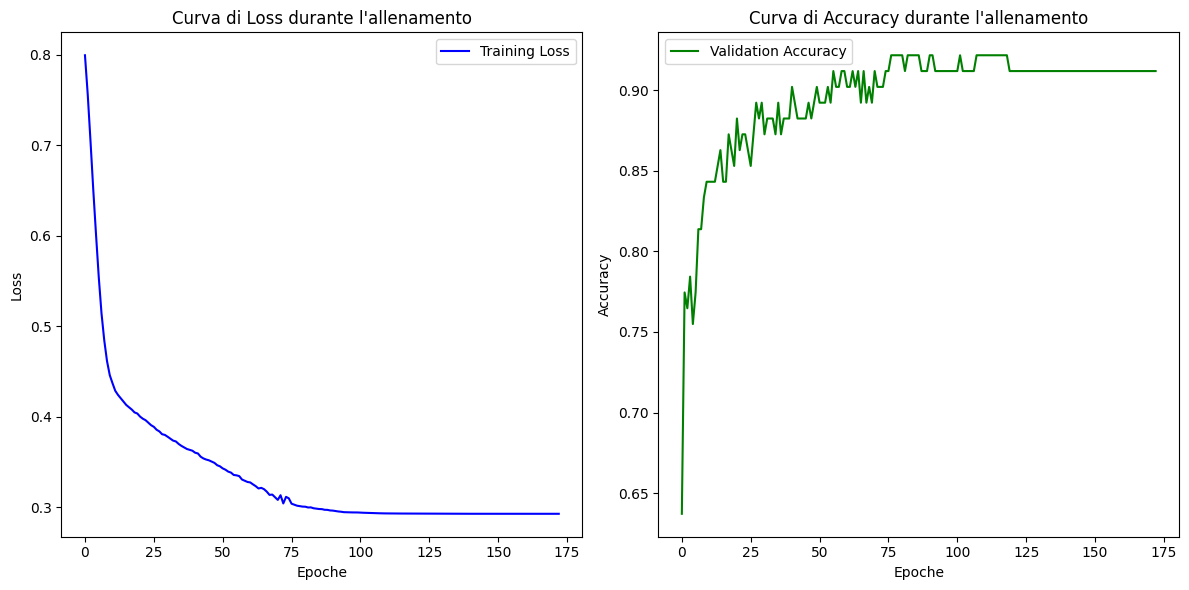

In [48]:
# Accedi ai dati di training (verifica che il modello abbia registrato la storia)
train_accuracy = mlp_model.score(X_train, y_train)
val_accuracy = mlp_model.score(X_val, y_val)

# Traccia le curve di accuracy e loss
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Traccia la curva di Loss
axes[0].plot(mlp_model.loss_curve_, label="Training Loss", color='blue')
axes[0].set_title("Curva di Loss durante l'allenamento")
axes[0].set_xlabel("Epoche")
axes[0].set_ylabel("Loss")
axes[0].legend()

# Traccia la curva di Accuracy
# Questo esempio presuppone che tu stia usando validazione durante l'allenamento
# Se non hai la validazione, puoi fare solo la curva di accuracy del training
axes[1].plot(mlp_model.validation_scores_, label="Validation Accuracy", color='green')
axes[1].set_title("Curva di Accuracy durante l'allenamento")
axes[1].set_xlabel("Epoche")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout()
plt.show()


Conclusioni:
  - ..
  - ..

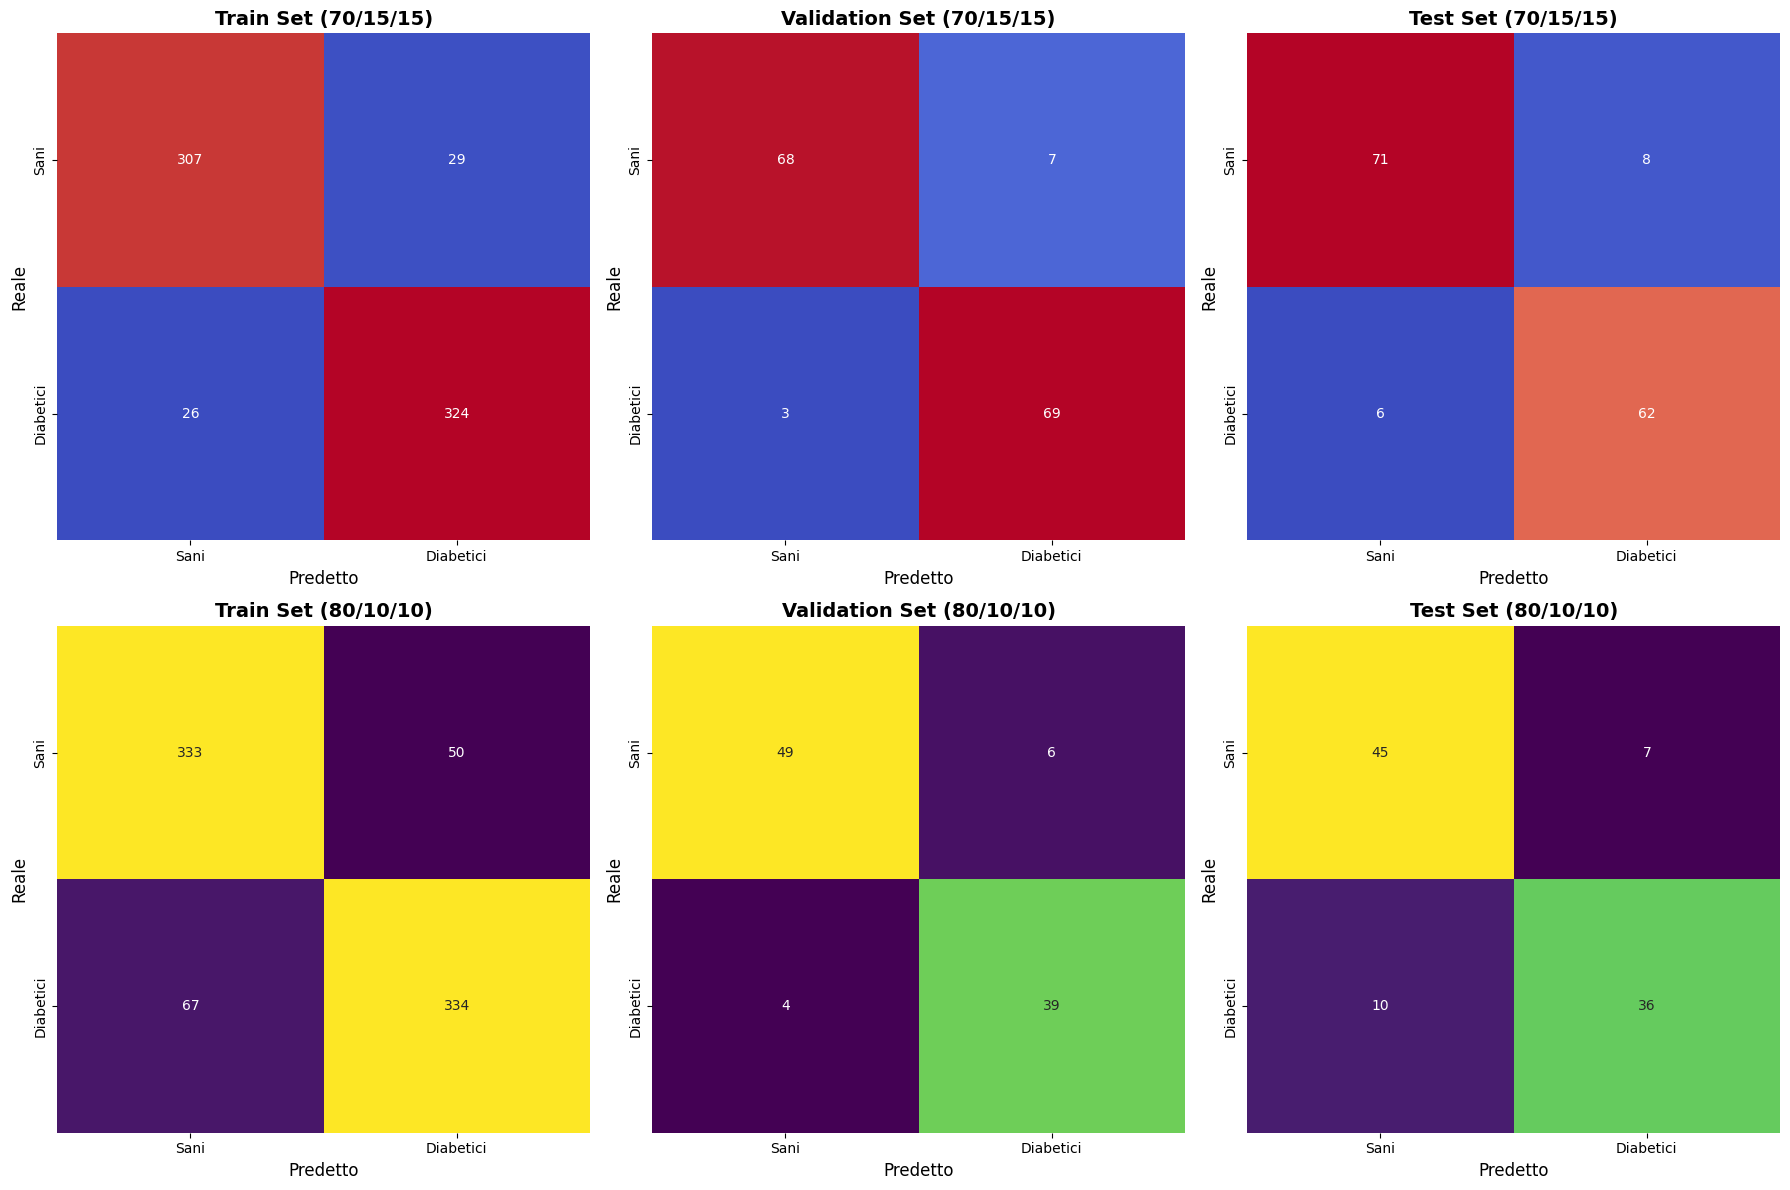

In [49]:
# Creazione della figura per le confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# Definizione delle etichette delle classi
class_labels = ["Sani", "Diabetici"]

# Titoli per i grafici
titles = [
    "Train Set (70/15/15)", "Validation Set (70/15/15)", "Test Set (70/15/15)",
    "Train Set (80/10/10)", "Validation Set (80/10/10)", "Test Set (80/10/10)"
]

# Liste delle confusion matrix per ogni set di dati con MLPClassifier
cm_mlp_data = [
    confusion_matrix(y_train, y_pred_train_mlp),
    confusion_matrix(y_val, y_pred_val_mlp),
    confusion_matrix(y_test, y_pred_test_mlp),
    confusion_matrix(y_train2, y_pred_train_mlp2),
    confusion_matrix(y_val2, y_pred_val_mlp2),
    confusion_matrix(y_test2, y_pred_test_mlp2)
]

# Loop per creare ogni subplot con la rispettiva matrice di confusione
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(cm_mlp_data[i], annot=True, fmt='d', cmap='coolwarm' if i < 3 else 'viridis', ax=ax,
                xticklabels=class_labels, yticklabels=class_labels, cbar=False)
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Predetto", fontsize=12)
    ax.set_ylabel("Reale", fontsize=12)

# Miglioramento della disposizione dei grafici
plt.tight_layout()
plt.show()


Conclusioni:
  - ..
  - ..

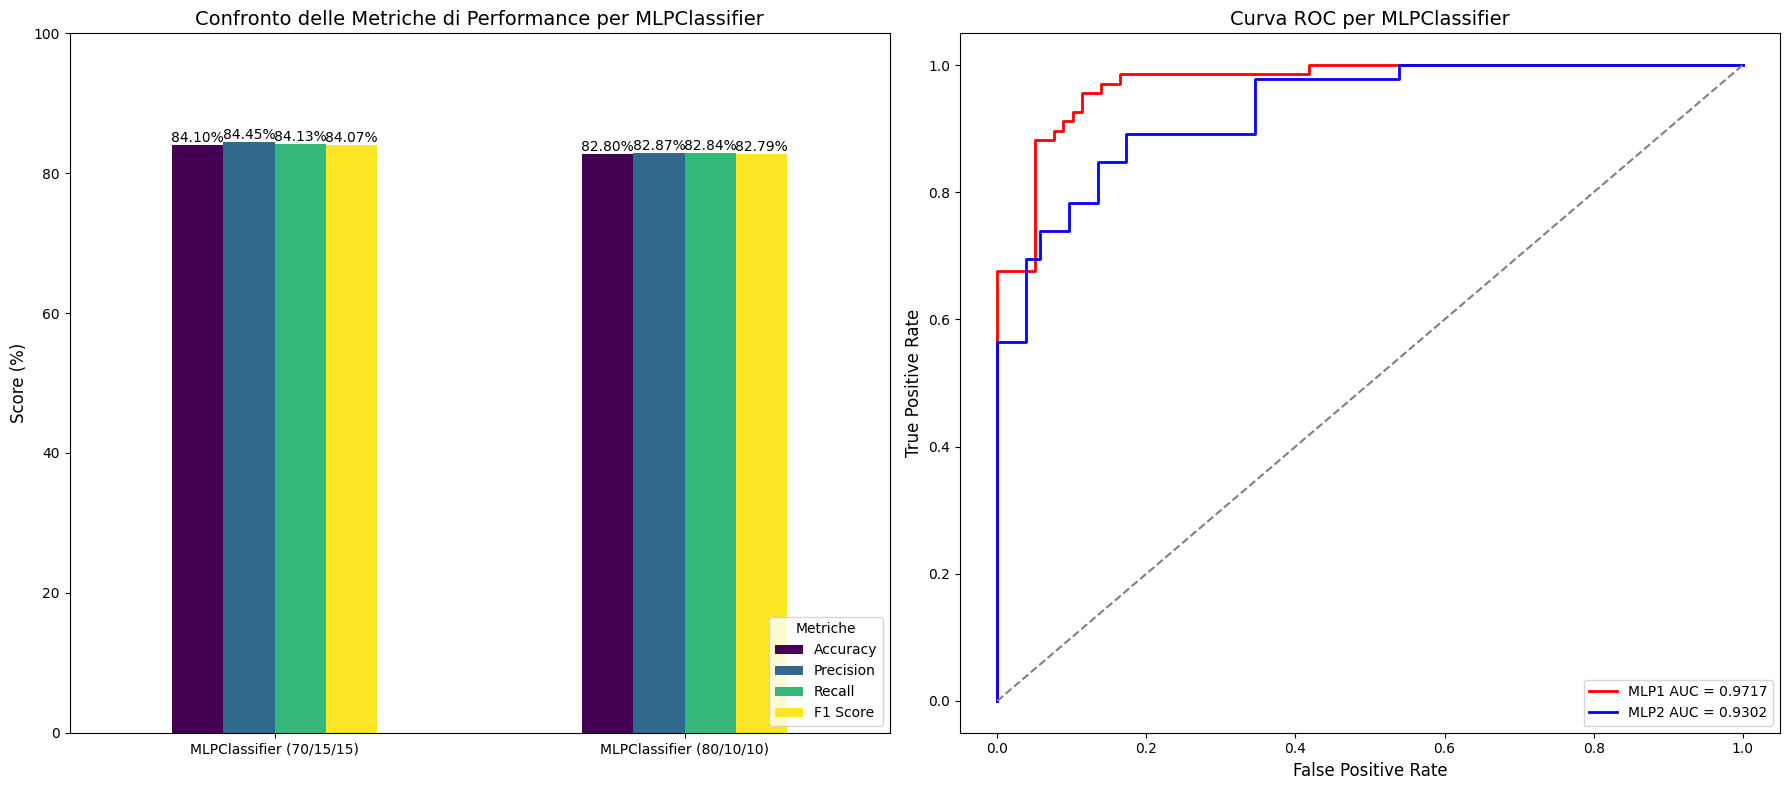

In [50]:
# Risultati della Cross-Validation per MLPClassifier
accuracy_mlp = round(np.mean(cv_scores_70['accuracy']), 6)
precision_mlp = round(np.mean(cv_scores_70['precision']), 6)
recall_mlp = round(np.mean(cv_scores_70['recall']), 6)
f1_mlp = round(np.mean(cv_scores_70['f1-score']), 6)

accuracy_mlp2 = round(np.mean(cv_scores_80['accuracy']), 6)
precision_mlp2 = round(np.mean(cv_scores_80['precision']), 6)
recall_mlp2 = round(np.mean(cv_scores_80['recall']), 6)
f1_mlp2 = round(np.mean(cv_scores_80['f1-score']), 6)

# DataFrame con le Metriche di Performance per MLPClassifier
performance_mlp_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'MLPClassifier (70/15/15)': [accuracy_mlp * 100, precision_mlp * 100, recall_mlp * 100, f1_mlp * 100],
    'MLPClassifier (80/10/10)': [accuracy_mlp2 * 100, precision_mlp2 * 100, recall_mlp2 * 100, f1_mlp2 * 100]
}).set_index('Metric').T

# Curva ROC per MLPClassifier
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:, 1])  # ROC per MLP (70/15/15)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

fpr_mlp2, tpr_mlp2, _ = roc_curve(y_test2, mlp_model2.predict_proba(X_test2)[:, 1])  # ROC per MLP (80/10/10)
roc_auc_mlp2 = auc(fpr_mlp2, tpr_mlp2)

# Creazione della figura per il grafico delle metriche e la curva ROC
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### **Grafico delle metriche di performance per MLPClassifier**
performance_mlp_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Metriche di Performance per MLPClassifier", fontsize=14)
axes[0].set_ylabel("Score (%)", fontsize=12)
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right", fontsize=10)
axes[0].tick_params(axis='x', labelrotation=0)

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### **Grafico della Curva ROC per MLPClassifier**
axes[1].plot(fpr_mlp, tpr_mlp, color='red', lw=2, label=f'MLP1 AUC = {roc_auc_mlp:.4f}')
axes[1].plot(fpr_mlp2, tpr_mlp2, color='blue', lw=2, label=f'MLP2 AUC = {roc_auc_mlp2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

axes[1].set_xlabel("False Positive Rate", fontsize=12)
axes[1].set_ylabel("True Positive Rate", fontsize=12)
axes[1].set_title("Curva ROC per MLPClassifier", fontsize=14)
axes[1].legend(loc="lower right", fontsize=10)

# Miglioramento del layout
plt.tight_layout()
plt.show()


Conclusioni:
  - ..
  - ..

#### **Divisione del dataset in Training e Test Set (vecchio, dopo da eliminare tutto sotto)**

Una volta finita la fase di preprocessing, è necessario dividere i dati in **training set** e **test set** per addestrare e valutare i modelli di Machine Learning.

Utilizziamo la funzione `train_test_split()` di **scikit-learn** per suddividere il dataset in due diverse proporzioni:
- 70% Training – 30% Test:
  - Questo set viene usato per addestrare il modello con una quantità maggiore di dati, mantenendo comunque una porzione significativa per il test.
- 80% Training – 20% Test:
  - In questo caso, il modello viene addestrato con ancora più dati, lasciando meno spazio alla valutazione. Questo può essere utile quando si vuole massimizzare l'apprendimento del modello.

In [ ]:
# Divisione Training e Test set (70% Training, 30% Test)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print("Dimensioni dei dataset dopo SMOTE:")
print(f"Train Set 1: {x_train.shape}, Test Set: {x_test.shape}")

# Divisione Training e Test set (80% Training, 20% Test)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Dimensioni dei dataset dopo SMOTE:")
print(f"Train Set 2: {x_train2.shape}, Test Set: {x_test2.shape}")

Dimensioni dei dataset dopo SMOTE:
Train Set 1: (686, 8), Test Set: (294, 8)
Dimensioni dei dataset dopo SMOTE:
Train Set 2: (784, 8), Test Set: (196, 8)


In [ ]:
# codice di PROVA per vedere che pca con 5 componenti iniziali funziona PEGGIO rispetto all'utilizzo di tutte feature originali

# Selezionare solo le prime 5 componenti principali
X_pca_5 = X_pca[:, :5]

# Suddividere i dati in training e test
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_pca_5, y_resampled, test_size=0.2, random_state=42)

# Controllare le dimensioni dei nuovi set
print(f"Dimensioni X_train_3: {X_train_3.shape}, y_train_3: {y_train_3.shape}")
print(f"Dimensioni X_test_3: {X_test_3.shape}, y_test_3: {y_test_3.shape}")


Dimensioni X_train_3: (784, 5), y_train_3: (784,)
Dimensioni X_test_3: (196, 5), y_test_3: (196,)


#### **Decision Tree Classifier**

In [ ]:
# Decision Tree Classifier (70% Training, 30% Test)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

# Decision Tree Classifier (80% Training, 20% Test)
dt_model2 = DecisionTreeClassifier(random_state=42)
dt_model2.fit(x_train2, y_train2)
y_pred_dt2 = dt_model2.predict(x_test2)

# Decision Tree Classifier PCA
dt_model3 = DecisionTreeClassifier(random_state=42)
dt_model3.fit(X_train_3, y_train_3)
y_pred_dt3 = dt_model3.predict(X_test_3)


In [ ]:
# Decision Tree Evaluation (70% Training, 30% Test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Decision Tree Evaluation (80% Training, 20% Test)
accuracy_dt2 = accuracy_score(y_test2, y_pred_dt2)
precision_dt2 = precision_score(y_test2, y_pred_dt2)
recall_dt2 = recall_score(y_test2, y_pred_dt2)
f1_dt2 = f1_score(y_test2, y_pred_dt2)
cm_dt2 = confusion_matrix(y_test2, y_pred_dt2)

# Decision Tree Evaluation PCA
accuracy_dt3 = accuracy_score(y_test_3, y_pred_dt3)
precision_dt3 = precision_score(y_test_3, y_pred_dt3)
recall_dt3 = recall_score(y_test_3, y_pred_dt3)
f1_dt3 = f1_score(y_test_3, y_pred_dt3)
cm_dt3 = confusion_matrix(y_test_3, y_pred_dt3)

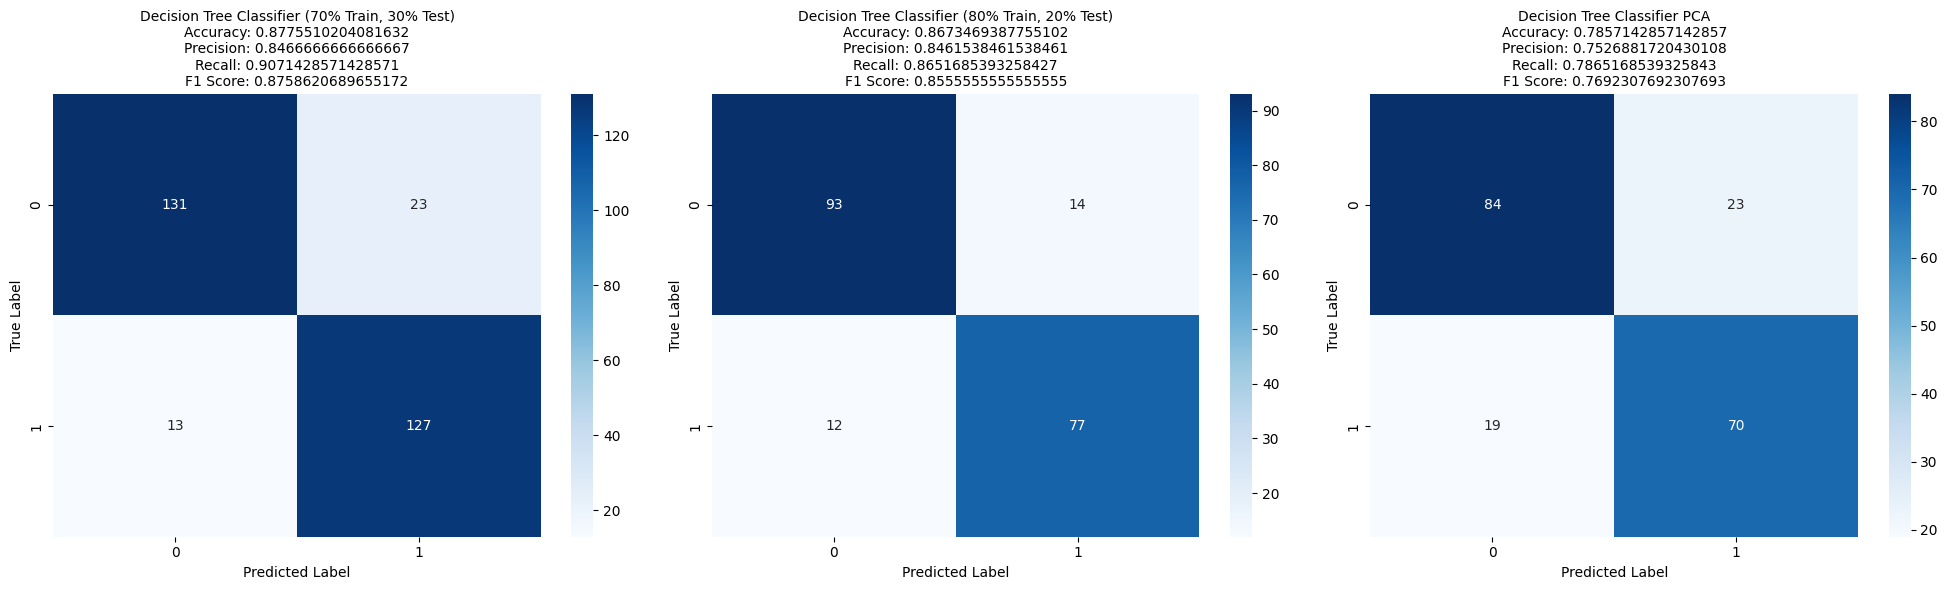

In [ ]:
plt.figure(figsize=(20, 6))

# Decision Tree Classifier (70% Training, 30% Test)
plt.subplot(1, 3, 1)
plt.title(
    f"Decision Tree Classifier (70% Train, 30% Test)\n"
    f"Accuracy: {accuracy_dt:.16f}\n"
    f"Precision: {precision_dt:.16f}\n"
    f"Recall: {recall_dt:.16f}\n"
    f"F1 Score: {f1_dt:.16f}",
    fontsize=10
)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Decision Tree Classifier (80% Training, 20% Test)
plt.subplot(1, 3, 2)
plt.title(
    f"Decision Tree Classifier (80% Train, 20% Test)\n"
    f"Accuracy: {accuracy_dt2:.16f}\n"
    f"Precision: {precision_dt2:.16f}\n"
    f"Recall: {recall_dt2:.16f}\n"
    f"F1 Score: {f1_dt2:.16f}",
    fontsize=10
)
sns.heatmap(cm_dt2, annot=True, fmt='d', cmap='Blues')  # Corretta matrice
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Decision Tree Classifier PCA
plt.subplot(1, 3, 3)
plt.title(
    f"Decision Tree Classifier PCA\n"
    f"Accuracy: {accuracy_dt3:.16f}\n"
    f"Precision: {precision_dt3:.16f}\n"
    f"Recall: {recall_dt3:.16f}\n"
    f"F1 Score: {f1_dt3:.16f}",
    fontsize=10
)
sns.heatmap(cm_dt3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Miglioramento del layout
plt.tight_layout()
plt.show()


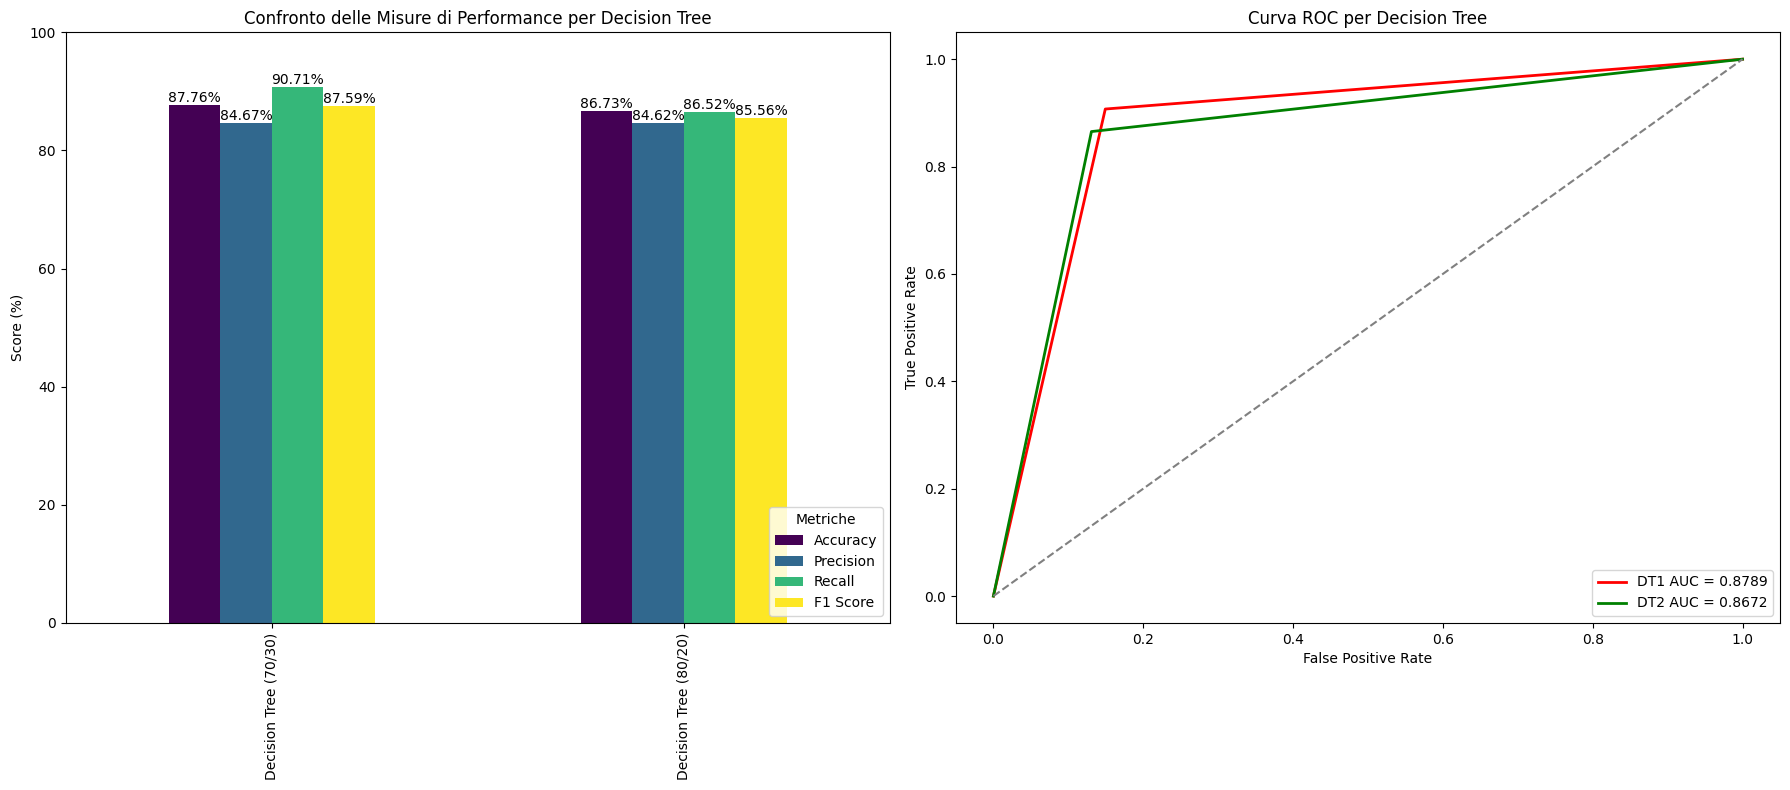

In [ ]:
# Creazione della figura con due sottotrame (una per le metriche, una per la curva ROC)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))


# Creazione del DataFrame con le metriche per Decision Tree 1 e 2 (senza PCA)
performance_dt_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Decision Tree (70/30)': [accuracy_dt * 100, precision_dt * 100, recall_dt * 100, f1_dt * 100],
    'Decision Tree (80/20)': [accuracy_dt2 * 100, precision_dt2 * 100, recall_dt2 * 100, f1_dt2 * 100]
})

# Trasposizione per miglior visualizzazione
performance_dt_df = performance_dt_df.set_index('Metric').T

### Grafico delle Misure di Performance ###
# Plot delle metriche di performance
performance_dt_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Misure di Performance per Decision Tree")
axes[0].set_ylabel("Score (%)")
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right")

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### Grafico della Curva ROC ###
# Calcolo della curva ROC per entrambi i modelli
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(x_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_dt2, tpr_dt2, _ = roc_curve(y_test2, dt_model2.predict_proba(x_test2)[:, 1])
roc_auc_dt2 = auc(fpr_dt2, tpr_dt2)

# Plot della curva ROC per entrambi i modelli
axes[1].plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'DT1 AUC = {roc_auc_dt:.4f}')
axes[1].plot(fpr_dt2, tpr_dt2, color='green', lw=2, label=f'DT2 AUC = {roc_auc_dt2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

# Impostazioni del grafico
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("Curva ROC per Decision Tree")
axes[1].legend(loc="lower right")

# Ottimizzazione del layout
plt.tight_layout()
plt.show()

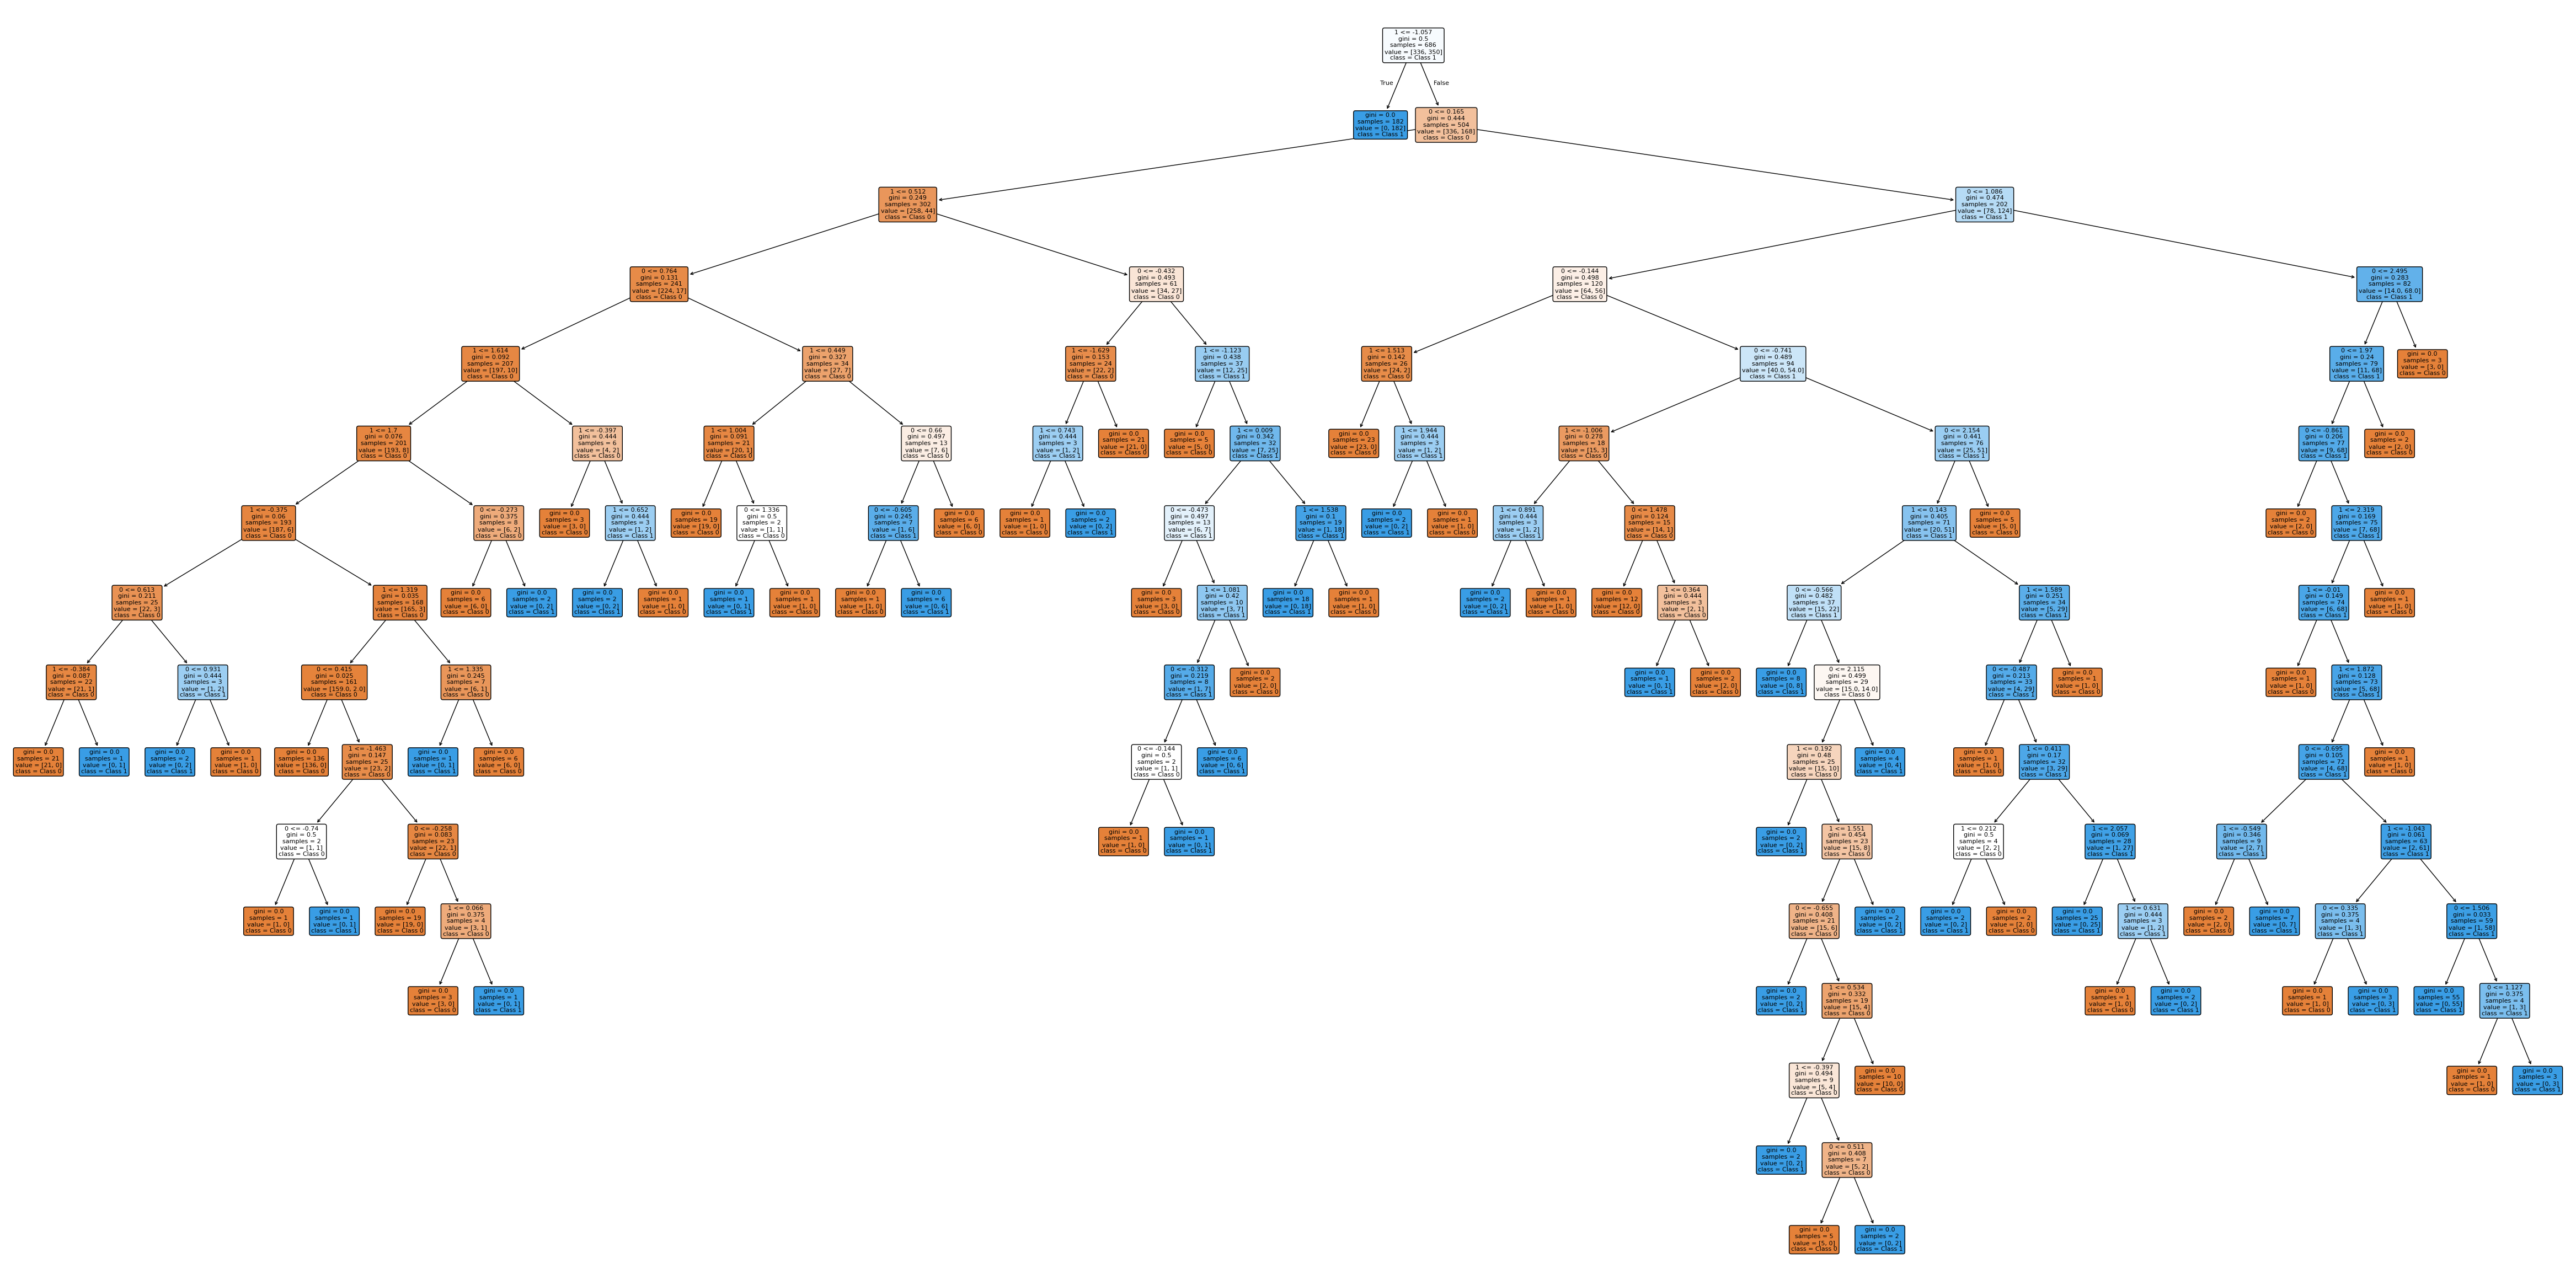

In [ ]:
plt.figure(figsize=(60, 30))
plot_tree(dt_model, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=y)
plt.show()

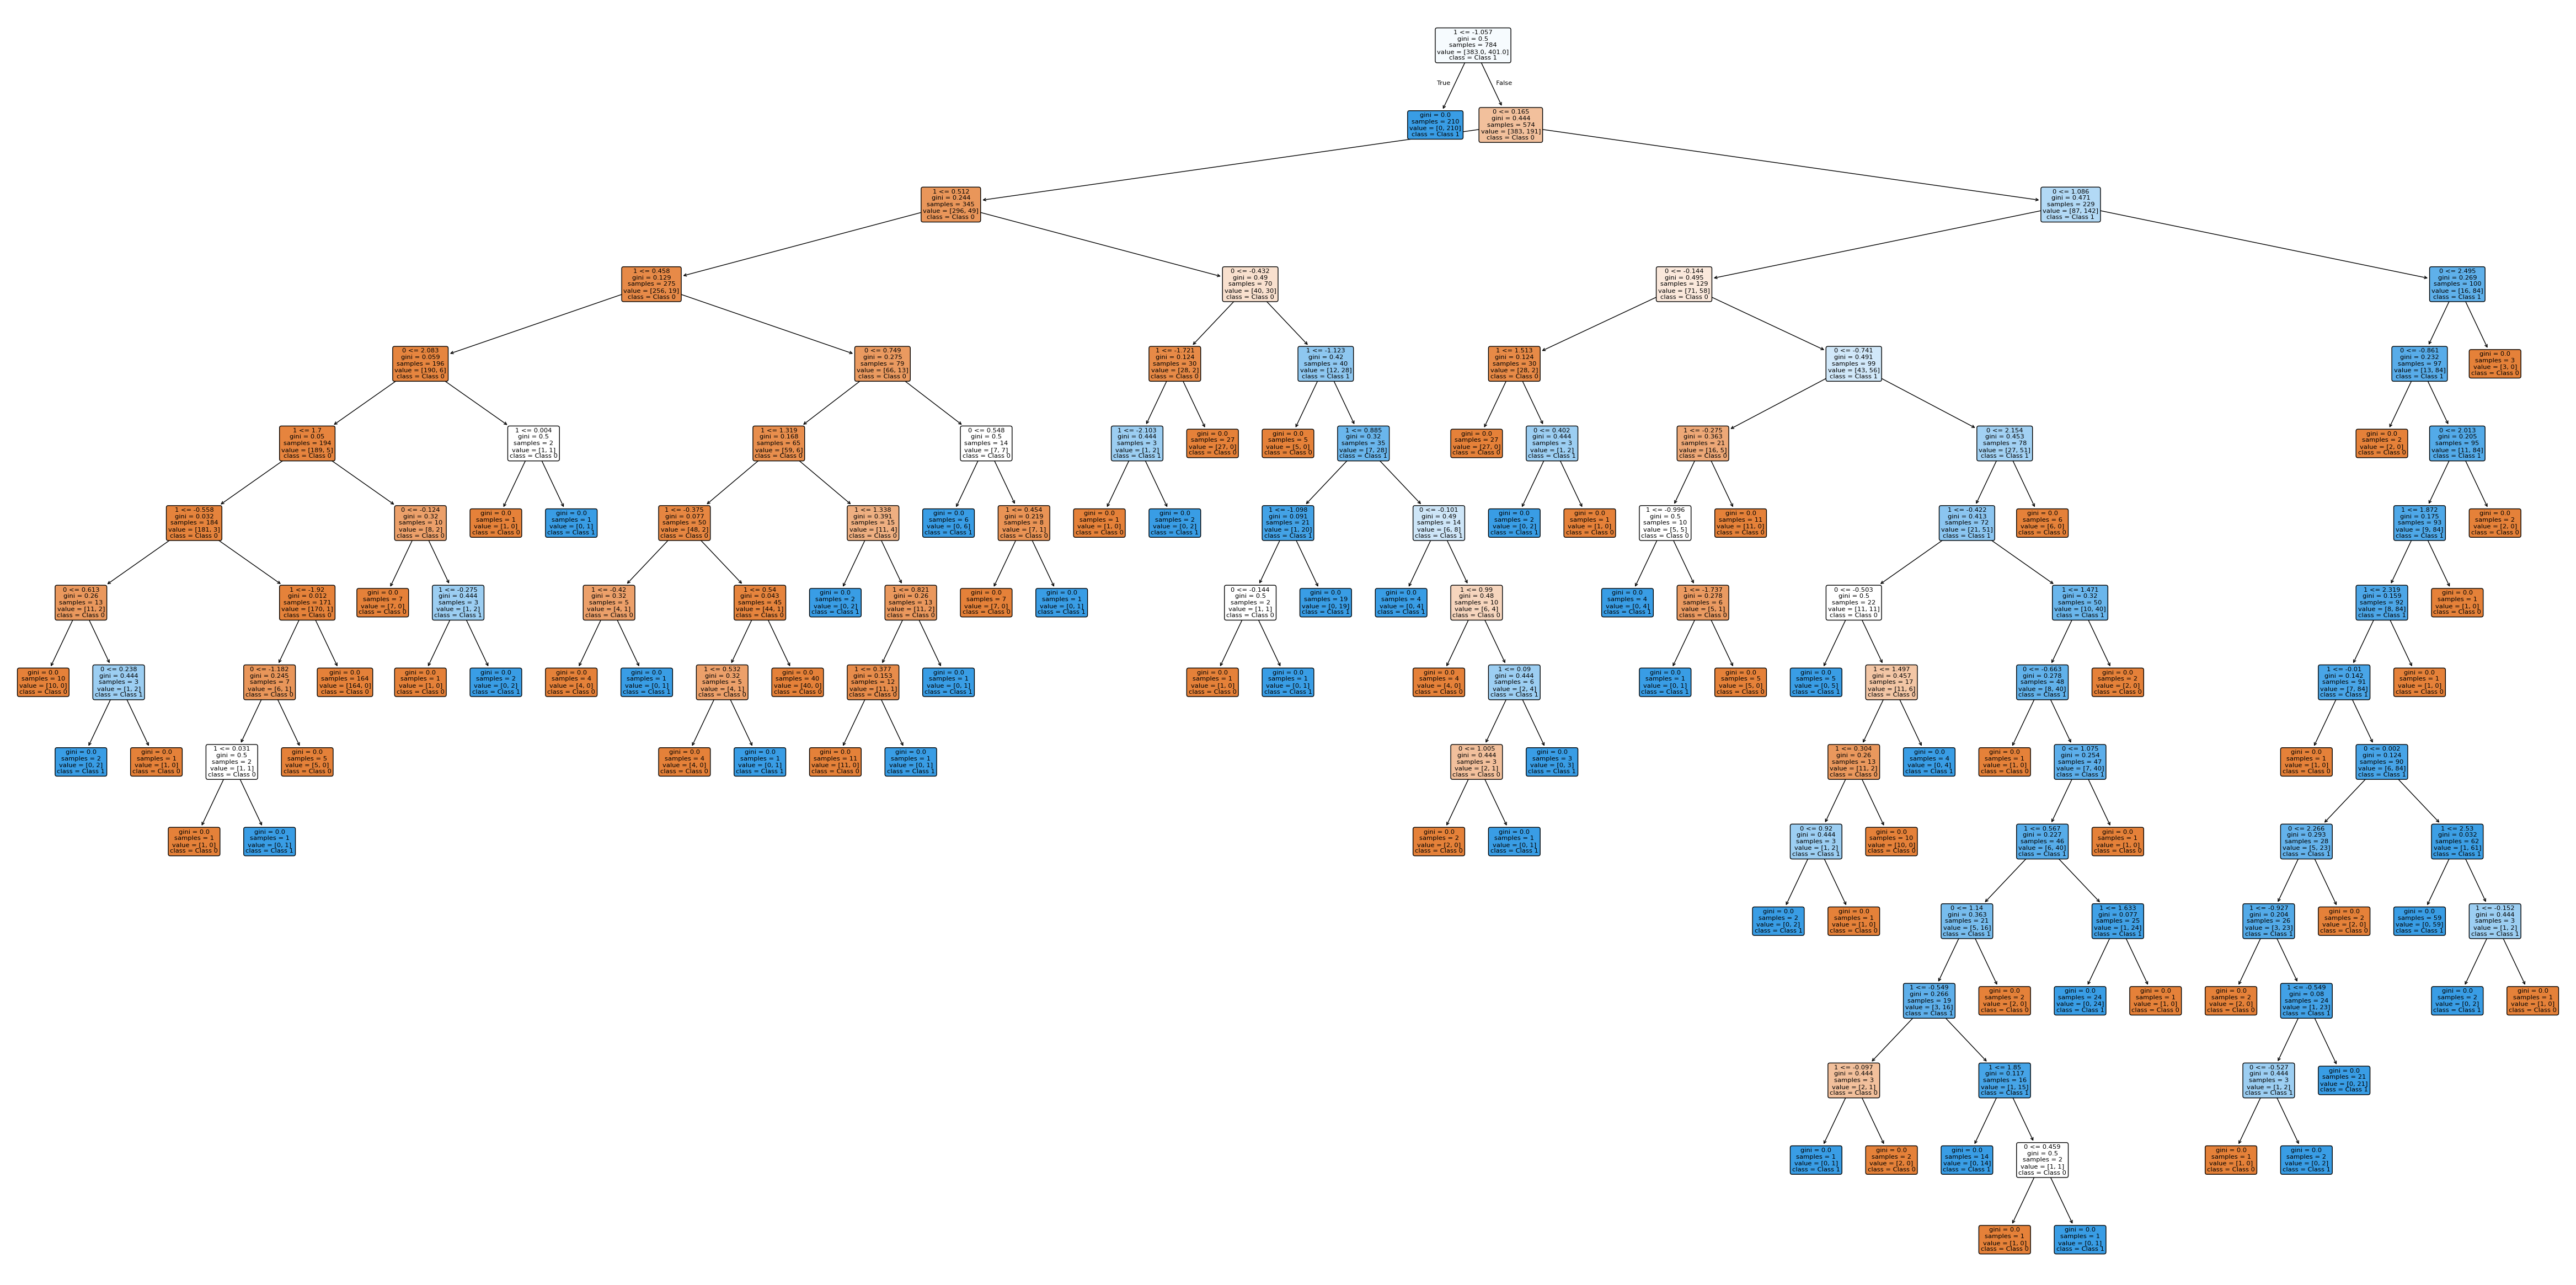

In [ ]:
plt.figure(figsize=(60, 30))
plot_tree(dt_model2, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=y)
plt.show()

#### Logistic Regression

In [ ]:
# Logistic Regression (70% Training, 30% Test)
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

# Logistic Regression (80% Training, 20% Test)
lr_model2 = LogisticRegression(random_state=42)
lr_model2.fit(x_train2, y_train2)
y_pred_lr2 = lr_model2.predict(x_test2)

In [ ]:
# Logistic regression (70% Training, 30% Test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Logistic regression (80% Training, 20% Test)
accuracy_lr2 = accuracy_score(y_test2, y_pred_lr2)
precision_lr2 = precision_score(y_test2, y_pred_lr2)
recall_lr2 = recall_score(y_test2, y_pred_lr2)
f1_lr2 = f1_score(y_test2, y_pred_lr2)
cm_lr2 = confusion_matrix(y_test2, y_pred_lr2)

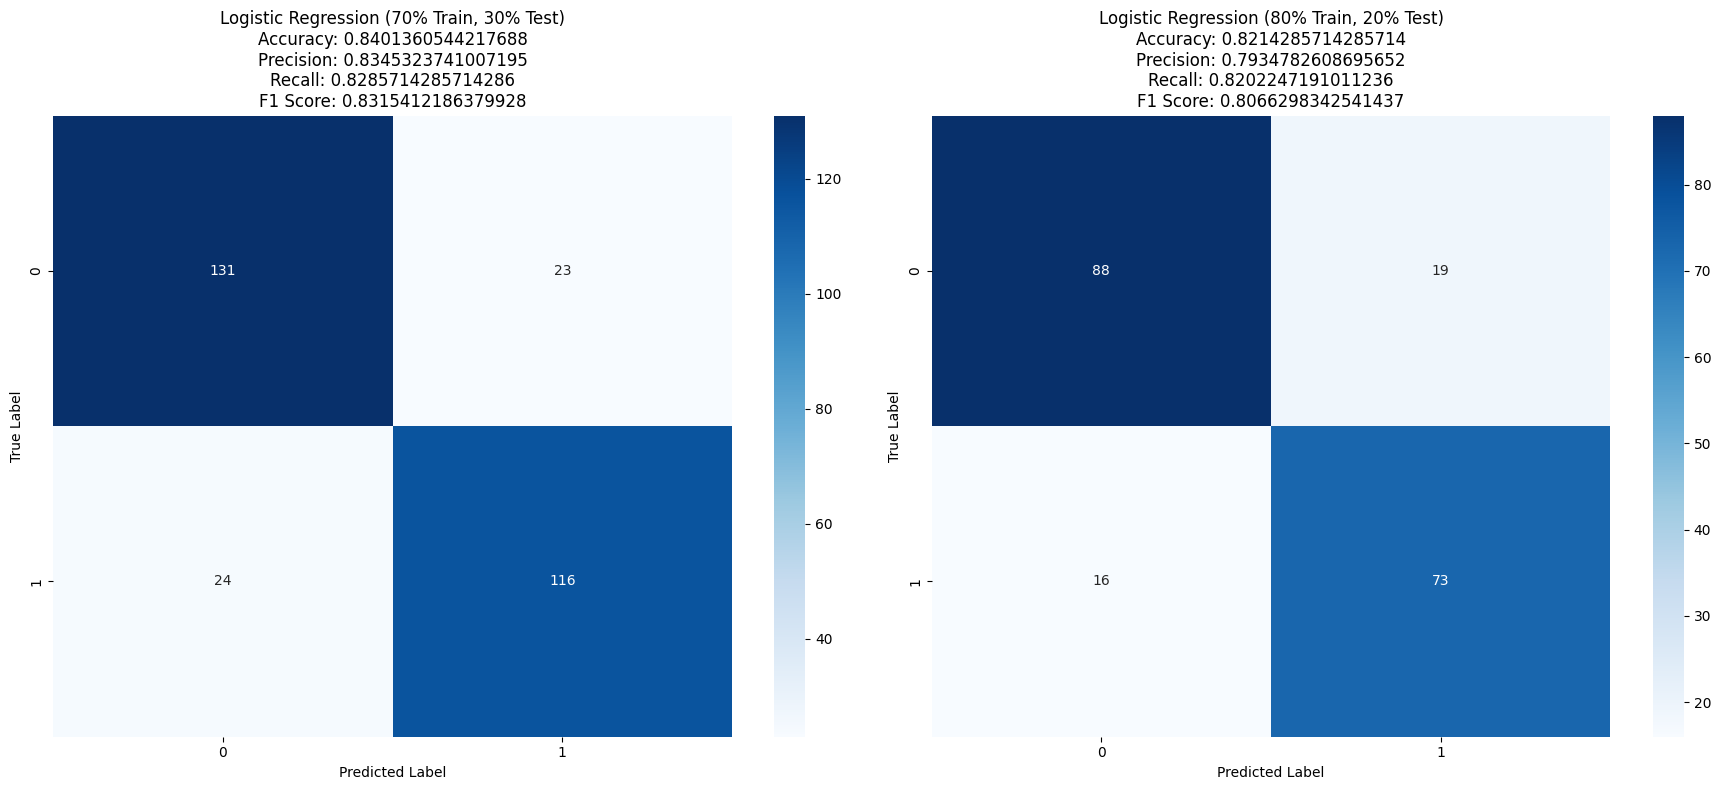

In [ ]:
# Creazione della figura con due sottotrame in una riga
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Logistic Regression (70% Training, 30% Test)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(
    f"Logistic Regression (70% Train, 30% Test)\n"
    f"Accuracy: {accuracy_lr:.16f}\n"
    f"Precision: {precision_lr:.16f}\n"
    f"Recall: {recall_lr:.16f}\n"
    f"F1 Score: {f1_lr:.16f}",
    fontsize=12
)
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Logistic Regression (80% Training, 20% Test)
sns.heatmap(cm_lr2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(
    f"Logistic Regression (80% Train, 20% Test)\n"
    f"Accuracy: {accuracy_lr2:.16f}\n"
    f"Precision: {precision_lr2:.16f}\n"
    f"Recall: {recall_lr2:.16f}\n"
    f"F1 Score: {f1_lr2:.16f}",
    fontsize=12
)
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Miglioramento del layout
plt.tight_layout()
plt.show()


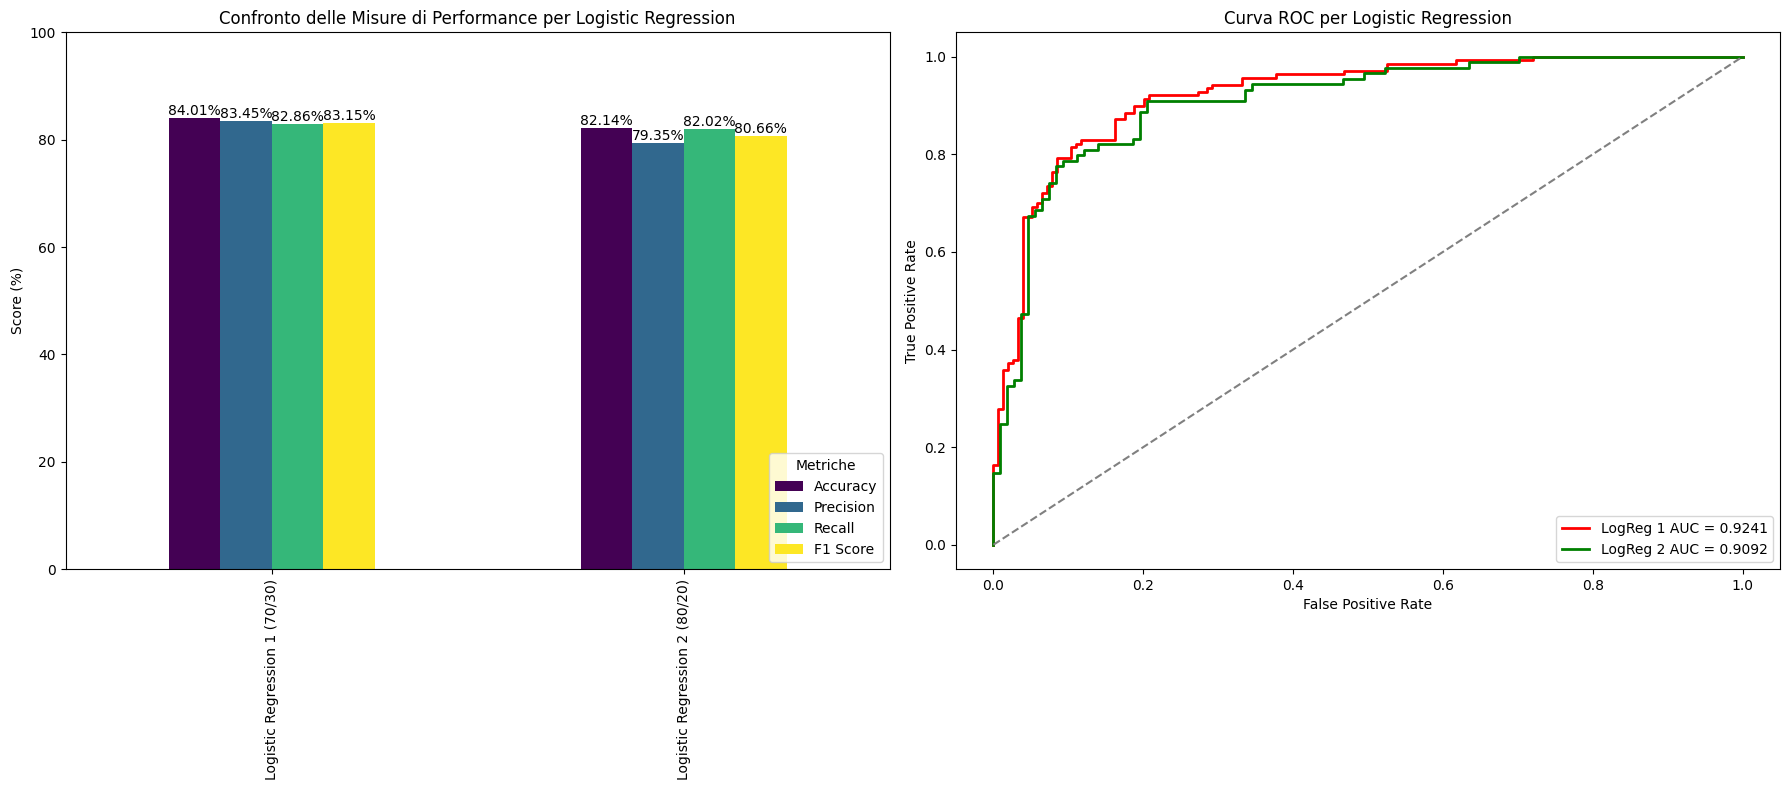

In [ ]:
# Creazione della figura con due sottotrame (una per le metriche, una per la curva ROC)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### 📌 1️⃣ Grafico delle Misure di Performance ###
# Creazione del DataFrame con le metriche per Logistic Regression 1 e 2
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression 1 (70/30)': [accuracy_lr * 100, precision_lr * 100, recall_lr * 100, f1_lr * 100],
    'Logistic Regression 2 (80/20)': [accuracy_lr2 * 100, precision_lr2 * 100, recall_lr2 * 100, f1_lr2 * 100]
})

# Trasposizione per miglior visualizzazione
performance_df = performance_df.set_index('Metric').T

# Plot delle metriche di performance
performance_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Misure di Performance per Logistic Regression")
axes[0].set_ylabel("Score (%)")
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right")

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### 📌 2️⃣ Grafico della Curva ROC ###
# Calcolo della curva ROC per entrambi i modelli
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(x_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_lr2, tpr_lr2, _ = roc_curve(y_test2, lr_model2.predict_proba(x_test2)[:, 1])
roc_auc_lr2 = auc(fpr_lr2, tpr_lr2)

# Plot della curva ROC per entrambi i modelli
axes[1].plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'LogReg 1 AUC = {roc_auc_lr:.4f}')
axes[1].plot(fpr_lr2, tpr_lr2, color='green', lw=2, label=f'LogReg 2 AUC = {roc_auc_lr2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

# Impostazioni del grafico
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("Curva ROC per Logistic Regression")
axes[1].legend(loc="lower right")

# Ottimizzazione del layout
plt.tight_layout()
plt.show()


#### Support Vector Machine

In [ ]:
# Support Vector Machine (70% Training, 30% Test)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

# Support Vector Machine (80% Training, 20% Test)
svm_model2 = SVC(probability=True, random_state=42)
svm_model2.fit(x_train2, y_train2)
y_pred_svm2 = svm_model2.predict(x_test2)

# Support Vector Machine PCA
svm_model3 = SVC(probability=True, random_state=42)
svm_model3.fit(X_train_3, y_train_3)
y_pred_svm3 = svm_model3.predict(X_test_3)

In [ ]:
# SVM Evaluation (70% Training, 30% Test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# SVM Evaluation (80% Training, 20% Test)
accuracy_svm2 = accuracy_score(y_test2, y_pred_svm2)
precision_svm2 = precision_score(y_test2, y_pred_svm2)
recall_svm2 = recall_score(y_test2, y_pred_svm2)
f1_svm2 = f1_score(y_test2, y_pred_svm2)
cm_svm2 = confusion_matrix(y_test2, y_pred_svm2)

# SVM Evaluation PCA
accuracy_svm3 = accuracy_score(y_test_3, y_pred_svm3)
precision_svm3 = precision_score(y_test_3, y_pred_svm3)
recall_svm3 = recall_score(y_test_3, y_pred_svm3)
f1_svm3 = f1_score(y_test_3, y_pred_svm3)
cm_svm3 = confusion_matrix(y_test_3, y_pred_svm3)


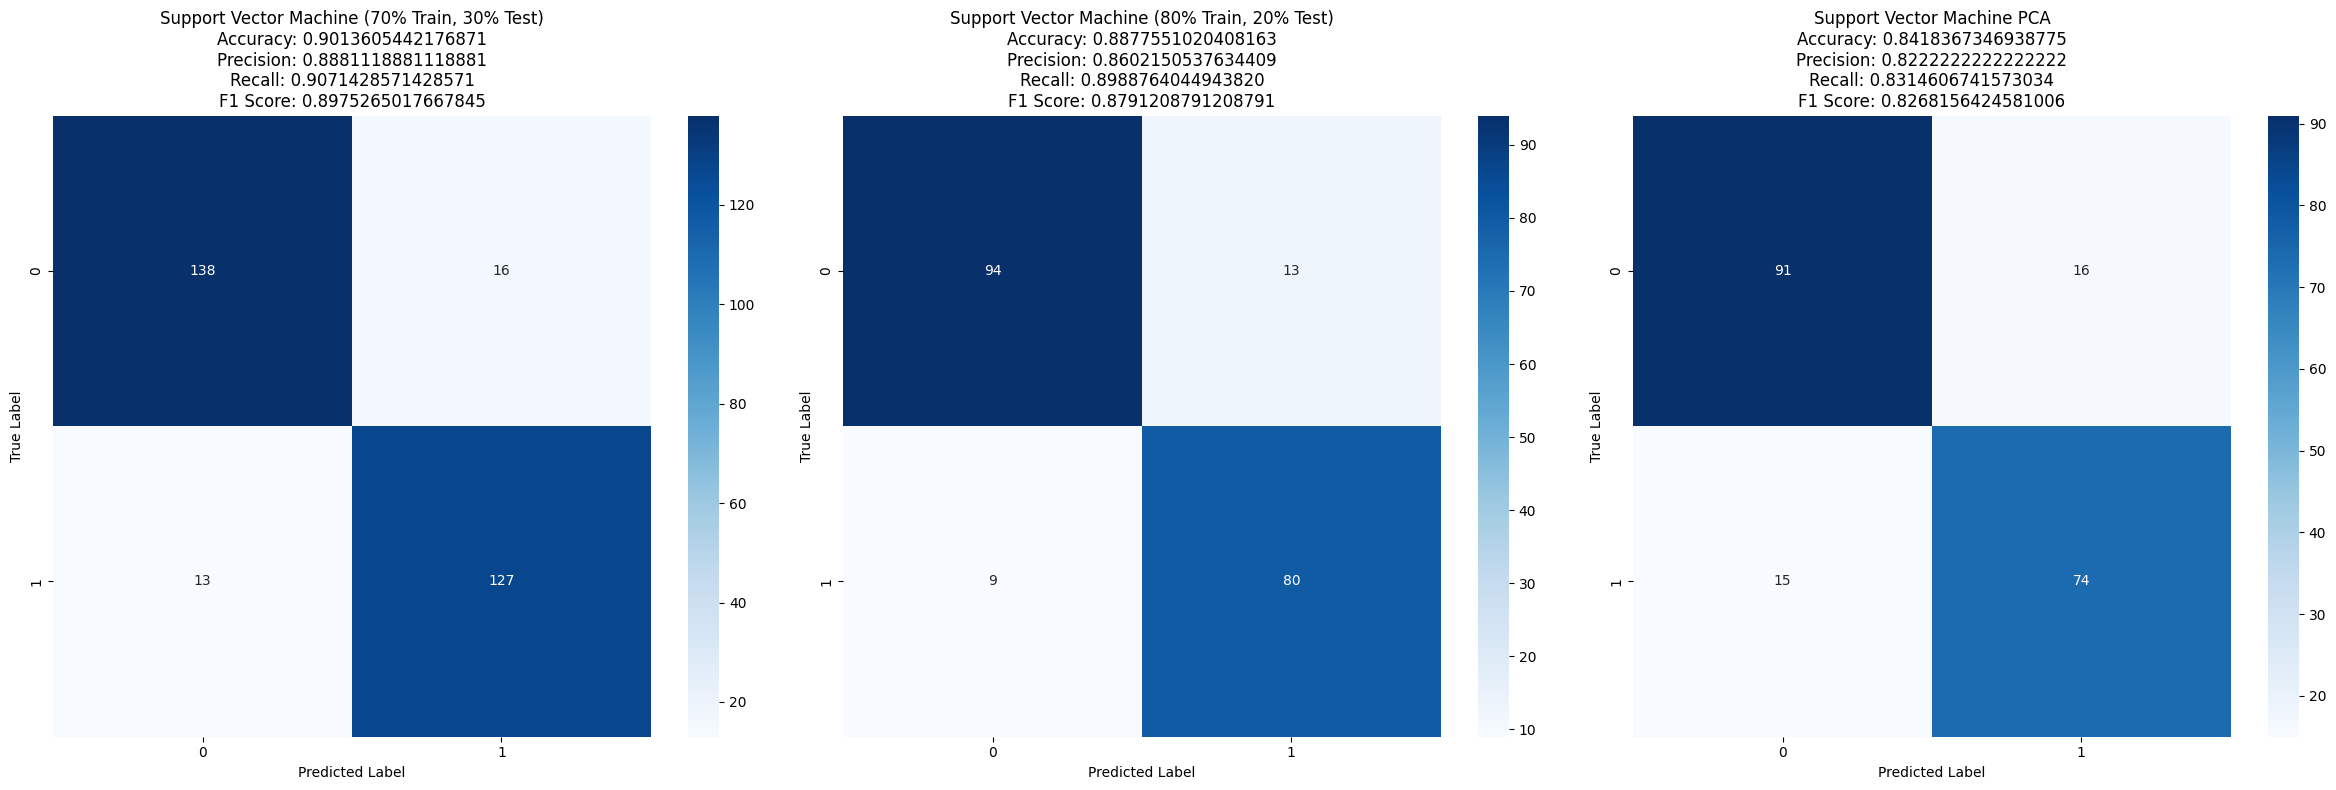

In [ ]:
# Creazione della figura con tre sottotrame in una riga
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Support Vector Machine (70% Training, 30% Test)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(
    f"Support Vector Machine (70% Train, 30% Test)\n"
    f"Accuracy: {accuracy_svm:.16f}\n"
    f"Precision: {precision_svm:.16f}\n"
    f"Recall: {recall_svm:.16f}\n"
    f"F1 Score: {f1_svm:.16f}",
    fontsize=12
)
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Support Vector Machine (80% Training, 20% Test)
sns.heatmap(cm_svm2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(
    f"Support Vector Machine (80% Train, 20% Test)\n"
    f"Accuracy: {accuracy_svm2:.16f}\n"
    f"Precision: {precision_svm2:.16f}\n"
    f"Recall: {recall_svm2:.16f}\n"
    f"F1 Score: {f1_svm2:.16f}",
    fontsize=12
)
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Support Vector Machine PCA
sns.heatmap(cm_svm3, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title(
    f"Support Vector Machine PCA\n"
    f"Accuracy: {accuracy_svm3:.16f}\n"
    f"Precision: {precision_svm3:.16f}\n"
    f"Recall: {recall_svm3:.16f}\n"
    f"F1 Score: {f1_svm3:.16f}",
    fontsize=12
)
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

# Miglioramento del layout
plt.tight_layout()
plt.show()


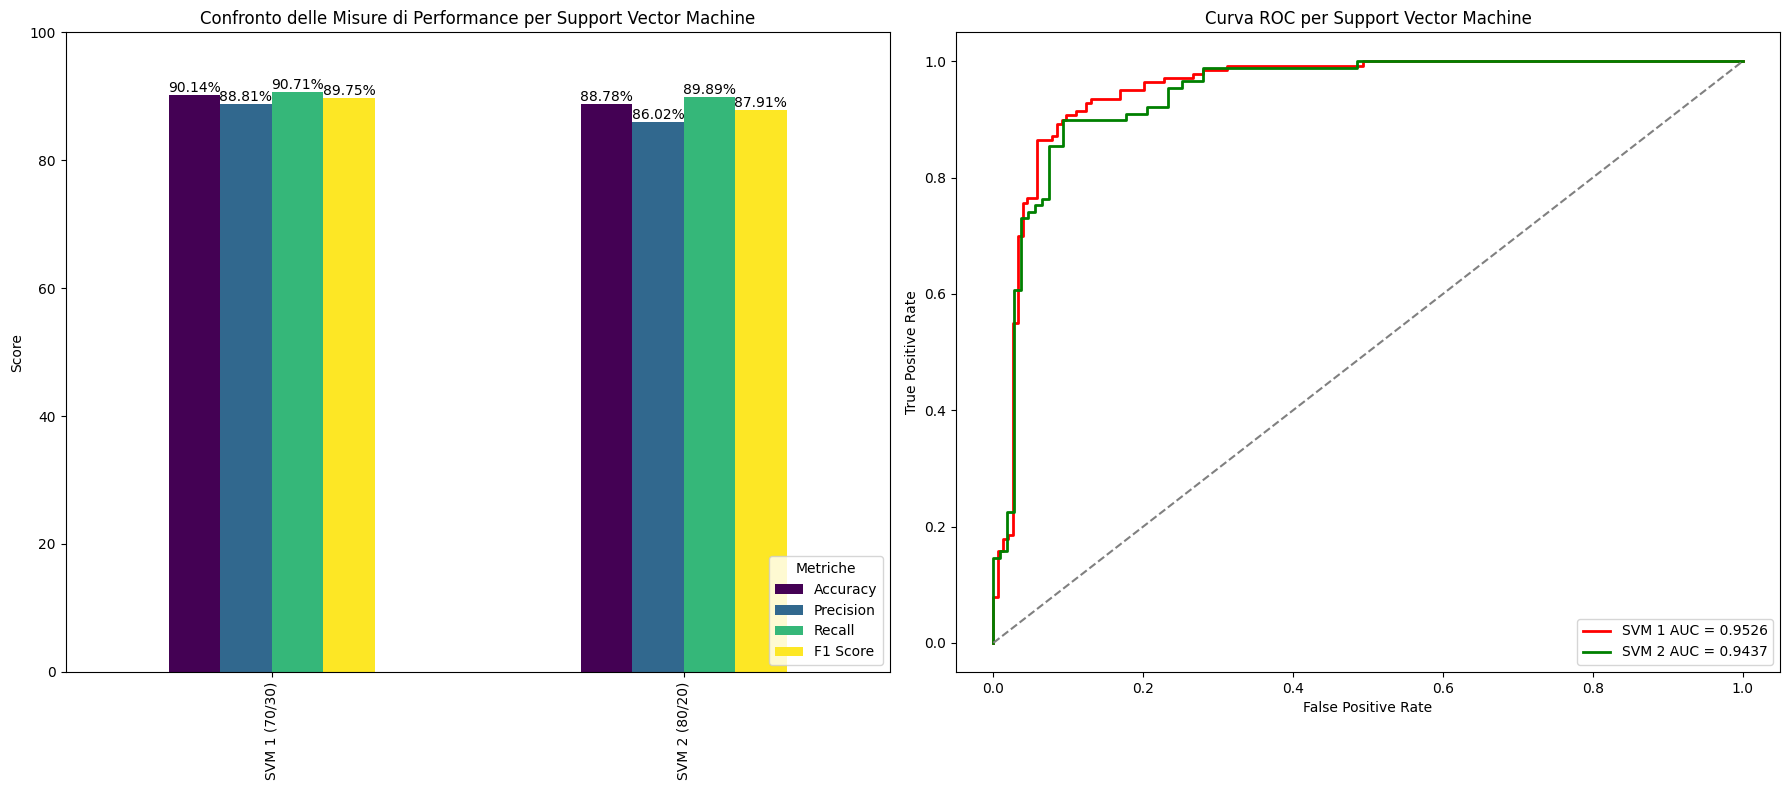

In [ ]:
# Creazione della figura con due sottotrame (una per le metriche, una per la curva ROC)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### Grafico delle Misure di Performance ###
# Creazione del DataFrame con le metriche per SVM 1 e 2
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'SVM 1 (70/30)': [accuracy_svm * 100, precision_svm * 100, recall_svm * 100, f1_svm * 100],
    'SVM 2 (80/20)': [accuracy_svm2 * 100, precision_svm2 * 100, recall_svm2 * 100, f1_svm2 * 100]
})

# Trasposizione per miglior visualizzazione
performance_df = performance_df.set_index('Metric').T

# Plot delle metriche di performance
performance_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Misure di Performance per Support Vector Machine")
axes[0].set_ylabel("Score")
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right")

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)


### Grafico della Curva ROC ###
# Calcolo della curva ROC per entrambi i modelli
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(x_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_svm2, tpr_svm2, _ = roc_curve(y_test2, svm_model2.predict_proba(x_test2)[:, 1])
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)

# Plot della curva ROC per entrambi i modelli
axes[1].plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM 1 AUC = {roc_auc_svm:.4f}')
axes[1].plot(fpr_svm2, tpr_svm2, color='green', lw=2, label=f'SVM 2 AUC = {roc_auc_svm2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

# Impostazioni del grafico
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("Curva ROC per Support Vector Machine")
axes[1].legend(loc="lower right")

# Ottimizzazione del layout
plt.tight_layout()
plt.show()


#### Naive Bayes

In [ ]:
# Naive Bayes (70% Training, 30% Test)
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

# Naive Bayes (80% Training, 20% Test)
nb_model2 = GaussianNB()
nb_model2.fit(x_train2, y_train2)
y_pred_nb2 = nb_model2.predict(x_test2)

In [ ]:
# Naive Bayes Evaluation (70% Training, 30% Test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Naive Bayes Evaluation (80% Training, 20% Test)
accuracy_nb2 = accuracy_score(y_test2, y_pred_nb2)
precision_nb2 = precision_score(y_test2, y_pred_nb2)
recall_nb2 = recall_score(y_test2, y_pred_nb2)
f1_nb2 = f1_score(y_test2, y_pred_nb2)
cm_nb2 = confusion_matrix(y_test2, y_pred_nb2)

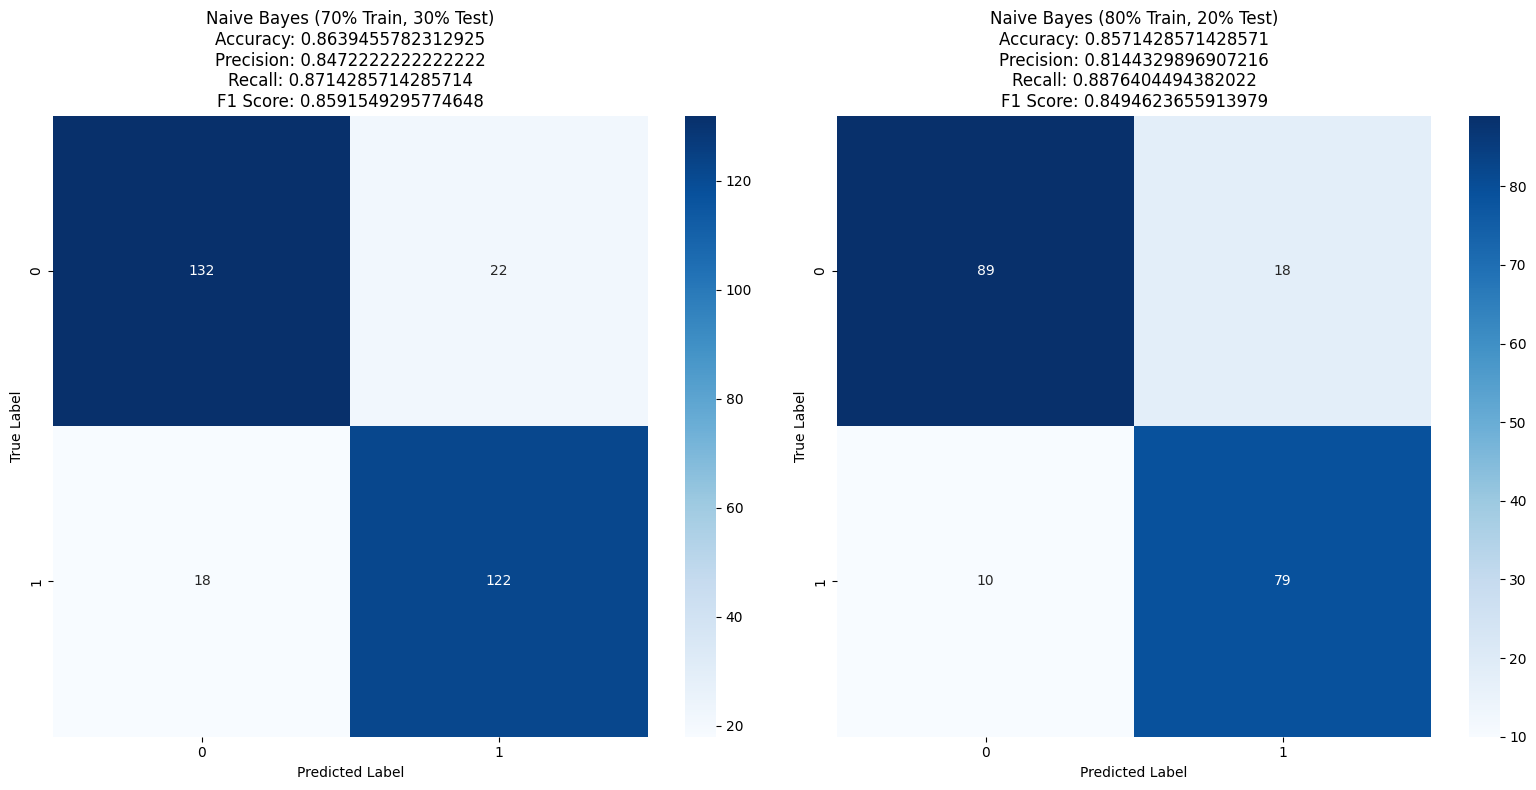

In [ ]:
# Creazione della figura con due sottotrame in una riga
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Naive Bayes (70% Training, 30% Test)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(
    f"Naive Bayes (70% Train, 30% Test)\n"
    f"Accuracy: {accuracy_nb:.16f}\n"
    f"Precision: {precision_nb:.16f}\n"
    f"Recall: {recall_nb:.16f}\n"
    f"F1 Score: {f1_nb:.16f}",
    fontsize=12
)
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Naive Bayes (80% Training, 20% Test)
sns.heatmap(cm_nb2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(
    f"Naive Bayes (80% Train, 20% Test)\n"
    f"Accuracy: {accuracy_nb2:.16f}\n"
    f"Precision: {precision_nb2:.16f}\n"
    f"Recall: {recall_nb2:.16f}\n"
    f"F1 Score: {f1_nb2:.16f}",
    fontsize=12
)
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Miglioramento del layout
plt.tight_layout()
plt.show()


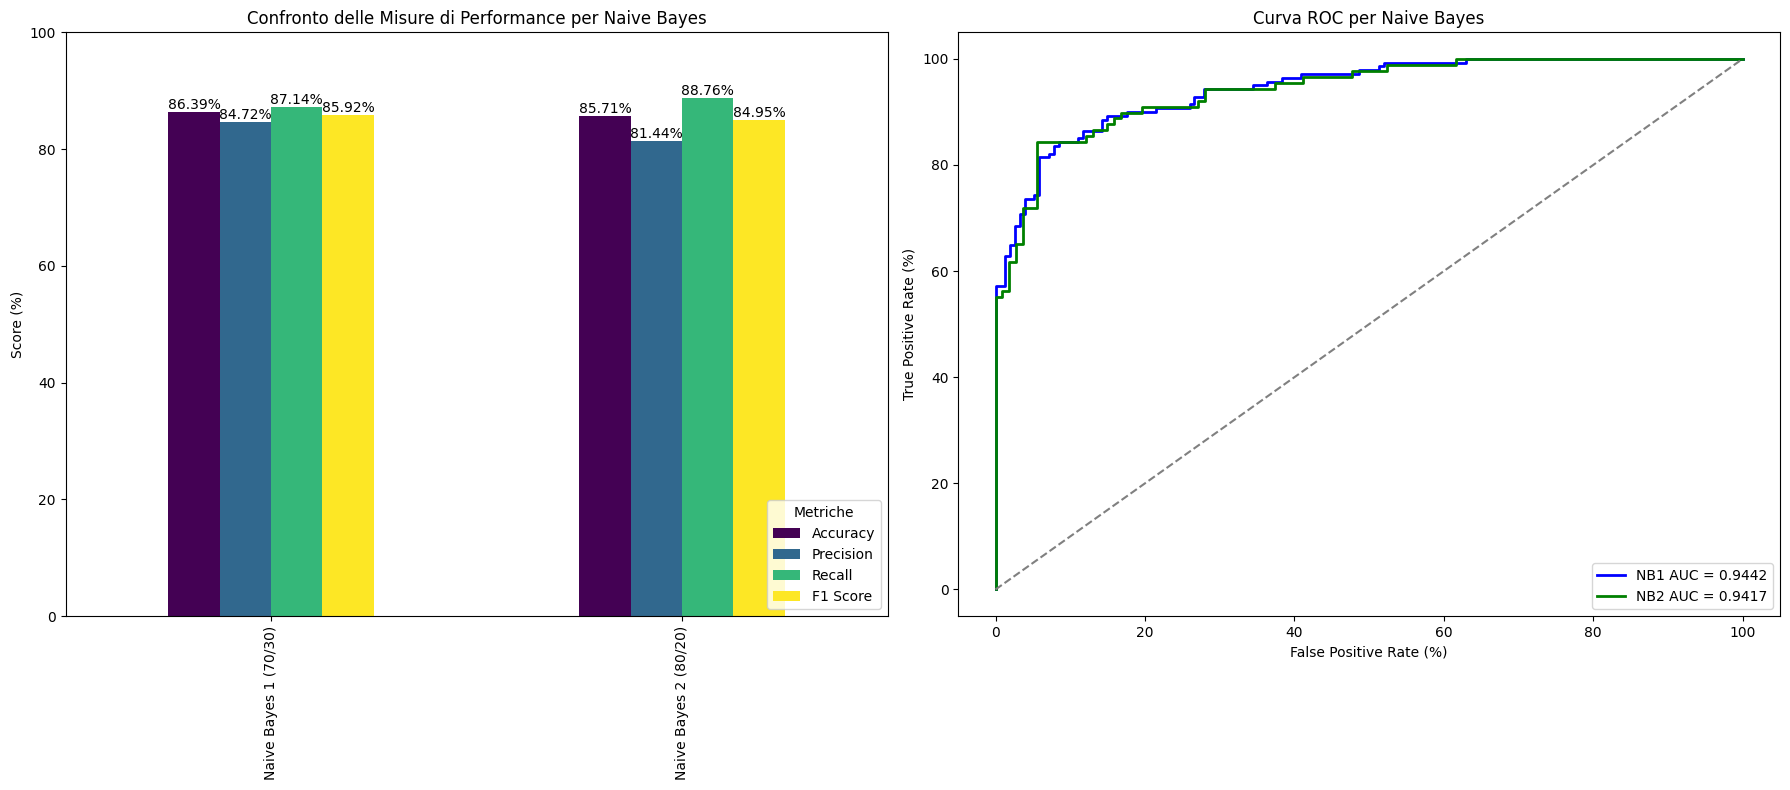

In [ ]:
# Creazione della figura con due sottotrame (una per le metriche, una per la curva ROC)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### Grafico delle Misure di Performance con Percentuali ###
# Creazione del DataFrame con le metriche per Naive Bayes 1 e 2
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Naive Bayes 1 (70/30)': [accuracy_nb * 100, precision_nb * 100, recall_nb * 100, f1_nb * 100],
    'Naive Bayes 2 (80/20)': [accuracy_nb2 * 100, precision_nb2 * 100, recall_nb2 * 100, f1_nb2 * 100]
})

# Trasposizione per miglior visualizzazione
performance_df = performance_df.set_index('Metric').T

# Plot delle metriche di performance
performance_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Misure di Performance per Naive Bayes")
axes[0].set_ylabel("Score (%)")  # Percentuali
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right")

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)

### Grafico della Curva ROC con Percentuali ###
# Calcolo della curva ROC per entrambi i modelli
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_model.predict_proba(x_test)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_nb2, tpr_nb2, _ = roc_curve(y_test2, nb_model2.predict_proba(x_test2)[:, 1])
roc_auc_nb2 = auc(fpr_nb2, tpr_nb2)

# Plot della curva ROC per entrambi i modelli
axes[1].plot(fpr_nb * 100, tpr_nb * 100, color='blue', lw=2, label=f'NB1 AUC = {roc_auc_nb:.4f}')
axes[1].plot(fpr_nb2 * 100, tpr_nb2 * 100, color='green', lw=2, label=f'NB2 AUC = {roc_auc_nb2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 100], [0, 100], color='grey', linestyle='--')

# Impostazioni del grafico con percentuali
axes[1].set_xlabel("False Positive Rate (%)")
axes[1].set_ylabel("True Positive Rate (%)")
axes[1].set_title("Curva ROC per Naive Bayes")
axes[1].legend(loc="lower right")

# Ottimizzazione del layout
plt.tight_layout()
plt.show()


#### Random Forest

In [ ]:
# Random Forest (70% Training, 30% Test)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Random Forest (80% Training, 20% Test)
rf_model2 = RandomForestClassifier(random_state=42)
rf_model2.fit(x_train2, y_train2)
y_pred_rf2 = rf_model2.predict(x_test2)

In [ ]:
# Random Forest Evaluation (70% Training, 30% Test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Random Forest Evaluation (80% Training, 20% Test)
accuracy_rf2 = accuracy_score(y_test2, y_pred_rf2)
precision_rf2 = precision_score(y_test2, y_pred_rf2)
recall_rf2 = recall_score(y_test2, y_pred_rf2)
f1_rf2 = f1_score(y_test2, y_pred_rf2)
cm_rf2 = confusion_matrix(y_test2, y_pred_rf2)

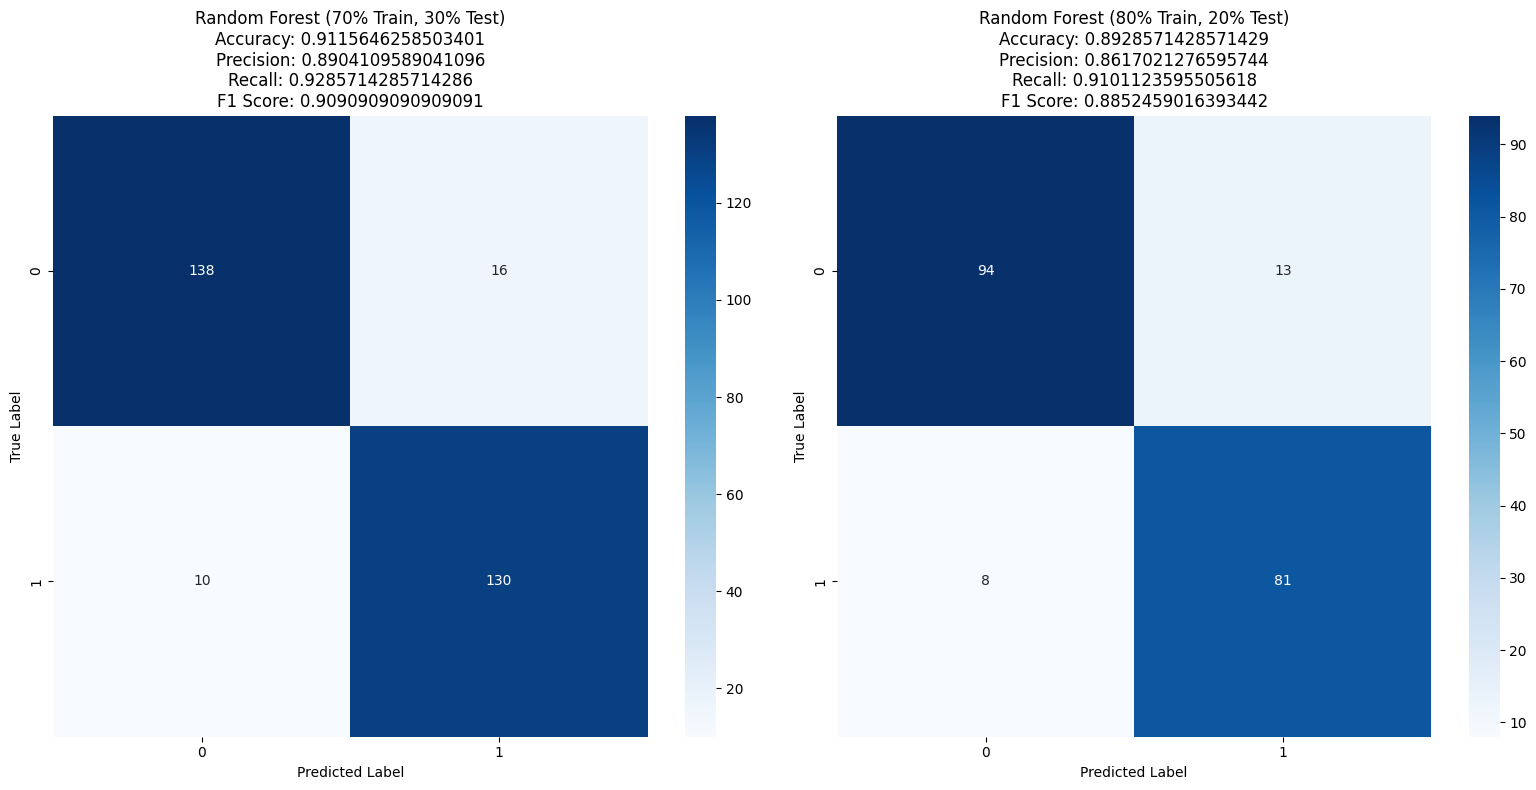

In [ ]:
# Creazione della figura con due sottotrame in una riga
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Random Forest (70% Training, 30% Test)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(
    f"Random Forest (70% Train, 30% Test)\n"
    f"Accuracy: {accuracy_rf:.16f}\n"
    f"Precision: {precision_rf:.16f}\n"
    f"Recall: {recall_rf:.16f}\n"
    f"F1 Score: {f1_rf:.16f}",
    fontsize=12
)
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Random Forest (80% Training, 20% Test)
sns.heatmap(cm_rf2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(
    f"Random Forest (80% Train, 20% Test)\n"
    f"Accuracy: {accuracy_rf2:.16f}\n"
    f"Precision: {precision_rf2:.16f}\n"
    f"Recall: {recall_rf2:.16f}\n"
    f"F1 Score: {f1_rf2:.16f}",
    fontsize=12
)
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Miglioramento del layout
plt.tight_layout()
plt.show()


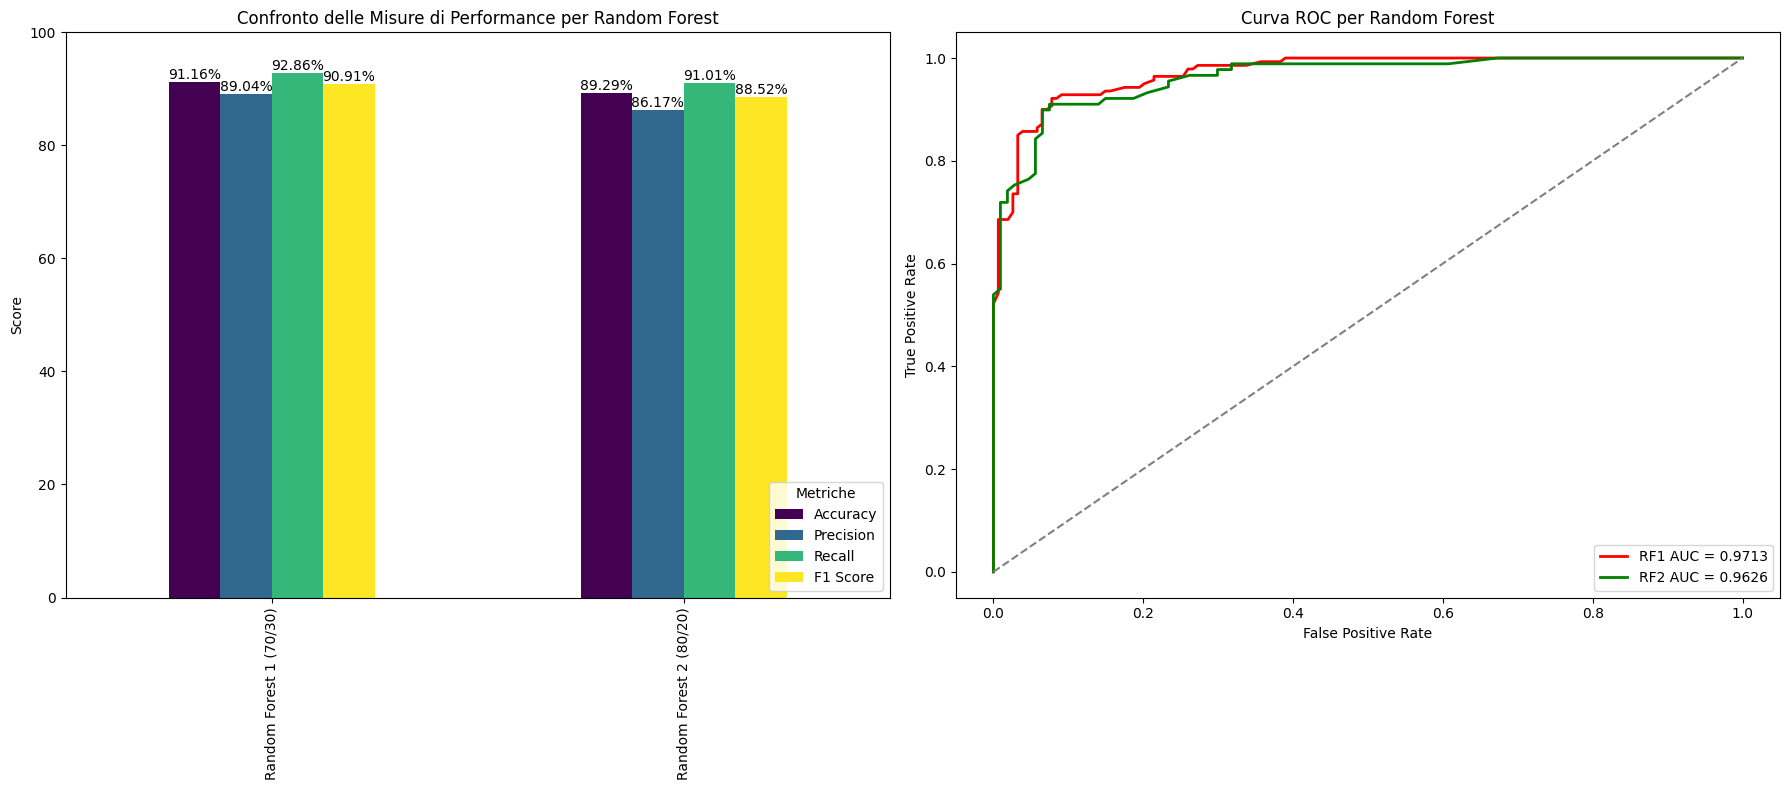

In [ ]:
# Creazione della figura con due sottotrame (una per le metriche, una per la curva ROC)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

### Grafico delle Misure di Performance ###
# Creazione del DataFrame con le metriche per Random Forest 1 e 2
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest 1 (70/30)': [accuracy_rf * 100, precision_rf * 100, recall_rf * 100, f1_rf * 100],
    'Random Forest 2 (80/20)': [accuracy_rf2 * 100, precision_rf2 * 100, recall_rf2 * 100, f1_rf2 * 100]
})

# Trasposizione per miglior visualizzazione
performance_df = performance_df.set_index('Metric').T

# Plot delle metriche di performance
performance_df.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title("Confronto delle Misure di Performance per Random Forest")
axes[0].set_ylabel("Score")
axes[0].set_ylim(0, 100)  # Scala 0-100%
axes[0].legend(title="Metriche", loc="lower right")

# Annotazioni sopra le barre con i valori percentuali
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%', fontsize=10)


### Grafico della Curva ROC ###
# Calcolo della curva ROC per entrambi i modelli
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_rf2, tpr_rf2, _ = roc_curve(y_test2, rf_model2.predict_proba(x_test2)[:, 1])
roc_auc_rf2 = auc(fpr_rf2, tpr_rf2)

# Plot della curva ROC per entrambi i modelli
axes[1].plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'RF1 AUC = {roc_auc_rf:.4f}')
axes[1].plot(fpr_rf2, tpr_rf2, color='green', lw=2, label=f'RF2 AUC = {roc_auc_rf2:.4f}')

# Linea di riferimento per il caso casuale
axes[1].plot([0, 1], [0, 1], color='grey', linestyle='--')

# Impostazioni del grafico
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("Curva ROC per Random Forest")
axes[1].legend(loc="lower right")

# Ottimizzazione del layout
plt.tight_layout()
plt.show()


Note:
AUC (Area Under Curve) misura l'area sotto la curva ROC:
- AUC = 1 → Modello perfetto.
- AUC > 0.9 → Modello eccellente.
- AUC tra 0.7 e 0.9 → Modello accettabile.
- AUC = 0.5 → Modello casuale (inutile).
- AUC < 0.5 → Il modello è peggiore di una scelta casuale.

Interpretazione della Curva ROC
- Se la curva ROC è vicina all'angolo in alto a sinistra, il modello è molto buono.
- Se la curva segue la diagonale (y = x), il modello è casuale (AUC ≈ 0.5).
- Se la curva è sotto la diagonale, il modello sta facendo previsioni peggiori di un caso casuale.

Significato della Curva ROC
- La curva ROC mostra la relazione tra:
  - True Positive Rate (TPR) = Sensibilità = Recall → Quanto bene il modello identifica i veri positivi.
  - False Positive Rate (FPR) → Quanto spesso il modello classifica erroneamente un negativo come positivo.

L'asse X rappresenta il False Positive Rate (FPR), mentre l'asse Y rappresenta il True Positive Rate (TPR).

Un modello ideale si avvicina all'angolo in alto a sinistra della curva, indicando alta sensibilità e pochi falsi positivi.



